In [3]:
from tensorflow.keras import models, layers, optimizers
from ngdlm import models as ngdlmodels
from ngdlm import utils as ngdlutils
from tensorflow.keras.datasets import mnist
import numpy as np

In [4]:
# Some parameters.
latent_dim = 100
input_shape = (28, 28, 1)
        
# Generator.
generator = models.Sequential()
generator.add(layers.Dense(256, input_dim=latent_dim))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(512))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(1024))
generator.add(layers.LeakyReLU(alpha=0.2))
generator.add(layers.BatchNormalization(momentum=0.8))
generator.add(layers.Dense(np.prod(input_shape), activation='tanh'))
generator.add(layers.Reshape(input_shape))

# Discriminator.
discriminator = models.Sequential()
discriminator.add(layers.Flatten(input_shape=input_shape))
discriminator.add(layers.Dense(512))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dense(256))
discriminator.add(layers.LeakyReLU(alpha=0.2))
discriminator.add(layers.Dense(1, activation='sigmoid'))
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=optimizers.Adam(0.0002, 0.5),
    metrics=["accuracy"])
        
# Load and transform the dataset.
(x_input_train, _), (_, _) = mnist.load_data()
x_input_train = x_input_train / 127.5 - 1.
x_input_train = np.expand_dims(x_input_train, axis=3)
x_input_train = x_input_train.astype("float")

print(x_input_train.shape, x_input_train.dtype)

(60000, 28, 28, 1) float64


W0212 21:39:14.681138 4409781696 training.py:2031] Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?


Generator:
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               25856     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 256)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 256)               1024      
_________________________________________________________________
dense_1 (Dense)              (None, 512)               131584    
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_2 (Dense)              (None, 1024)    

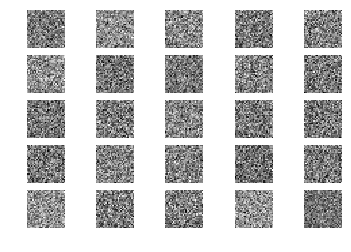

(32, 1) float64
(32, 1) float641395, acc.: 75.00%] [G loss: 0.768188]
(32, 1) float648882, acc.: 87.50%] [G loss: 0.940475]
(32, 1) float642510, acc.: 98.44%] [G loss: 0.971439]
(32, 1) float648770, acc.: 90.62%] [G loss: 1.096891]
(32, 1) float648636, acc.: 98.44%] [G loss: 1.238001]
(32, 1) float648042, acc.: 96.88%] [G loss: 1.303892]
(32, 1) float645823, acc.: 100.00%] [G loss: 1.593796]
(32, 1) float642920, acc.: 100.00%] [G loss: 1.704613]
(32, 1) float645839, acc.: 100.00%] [G loss: 1.810407]
(32, 1) float6419159, acc.: 100.00%] [G loss: 1.942606]
(32, 1) float6493322, acc.: 100.00%] [G loss: 2.106157]
(32, 1) float6493166, acc.: 100.00%] [G loss: 2.235492]
(32, 1) float6482964, acc.: 100.00%] [G loss: 2.395114]
(32, 1) float6460929, acc.: 100.00%] [G loss: 2.568469]
(32, 1) float6452132, acc.: 100.00%] [G loss: 2.686869]
(32, 1) float6448471, acc.: 100.00%] [G loss: 2.634929]
(32, 1) float6446679, acc.: 100.00%] [G loss: 2.788338]
(32, 1) float6439470, acc.: 100.00%] [G loss: 2

(32, 1) float64032035, acc.: 100.00%] [G loss: 5.384758]
(32, 1) float64055564, acc.: 100.00%] [G loss: 5.441846]
(32, 1) float64010195, acc.: 100.00%] [G loss: 5.492963]
(32, 1) float64099358, acc.: 96.88%] [G loss: 5.710820]
(32, 1) float64013752, acc.: 100.00%] [G loss: 5.747419]
(32, 1) float64400090, acc.: 87.50%] [G loss: 4.795883]
(32, 1) float64029734, acc.: 100.00%] [G loss: 4.961789]
(32, 1) float64012054, acc.: 100.00%] [G loss: 5.553598]
(32, 1) float64013100, acc.: 100.00%] [G loss: 5.153212]
(32, 1) float64012248, acc.: 100.00%] [G loss: 4.912841]
(32, 1) float64048877, acc.: 96.88%] [G loss: 5.272964]
(32, 1) float64110983, acc.: 95.31%] [G loss: 4.758937]
(32, 1) float64068638, acc.: 96.88%] [G loss: 5.233305]
(32, 1) float64107517, acc.: 95.31%] [G loss: 4.551030]
(32, 1) float64054060, acc.: 98.44%] [G loss: 5.112790]
(32, 1) float64025334, acc.: 100.00%] [G loss: 4.724750]
(32, 1) float64054133, acc.: 96.88%] [G loss: 5.100994]
(32, 1) float64057277, acc.: 98.44%] [G

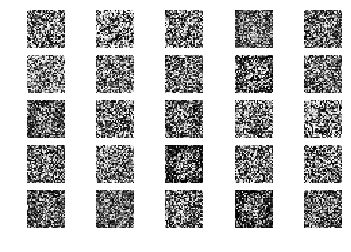

(32, 1) float64
(32, 1) float64047998, acc.: 100.00%] [G loss: 3.478918]
(32, 1) float64048527, acc.: 100.00%] [G loss: 3.577847]
(32, 1) float64067180, acc.: 98.44%] [G loss: 3.649195]
(32, 1) float64073890, acc.: 96.88%] [G loss: 3.512616]
(32, 1) float64048962, acc.: 100.00%] [G loss: 3.443810]
(32, 1) float64039675, acc.: 100.00%] [G loss: 3.539883]
(32, 1) float64034384, acc.: 100.00%] [G loss: 3.387317]
(32, 1) float64047730, acc.: 98.44%] [G loss: 3.430163]
(32, 1) float64053754, acc.: 100.00%] [G loss: 3.500086]
(32, 1) float64055931, acc.: 100.00%] [G loss: 3.394003]
(32, 1) float64048961, acc.: 100.00%] [G loss: 3.237276]
(32, 1) float64051186, acc.: 100.00%] [G loss: 3.381685]
(32, 1) float64038224, acc.: 100.00%] [G loss: 3.592746]
(32, 1) float64075890, acc.: 100.00%] [G loss: 3.482482]
(32, 1) float64098515, acc.: 95.31%] [G loss: 3.230189]
(32, 1) float64044596, acc.: 100.00%] [G loss: 3.298186]
(32, 1) float64037941, acc.: 100.00%] [G loss: 3.555063]
(32, 1) float640420

(32, 1) float64080278, acc.: 98.44%] [G loss: 3.484612]
(32, 1) float64215775, acc.: 89.06%] [G loss: 3.440526]
(32, 1) float64235214, acc.: 92.19%] [G loss: 3.733653]
(32, 1) float64370757, acc.: 81.25%] [G loss: 4.149470]
(32, 1) float64446117, acc.: 76.56%] [G loss: 3.215648]
(32, 1) float64158219, acc.: 98.44%] [G loss: 3.279270]
(32, 1) float64392593, acc.: 82.81%] [G loss: 4.060818]
(32, 1) float64137180, acc.: 96.88%] [G loss: 3.980205]
(32, 1) float64191723, acc.: 93.75%] [G loss: 3.718340]
(32, 1) float64131246, acc.: 96.88%] [G loss: 4.302800]
(32, 1) float64338755, acc.: 85.94%] [G loss: 3.779428]
(32, 1) float64186770, acc.: 96.88%] [G loss: 2.746881]
(32, 1) float64118089, acc.: 98.44%] [G loss: 3.770596]
(32, 1) float64119488, acc.: 95.31%] [G loss: 3.595115]
(32, 1) float64105890, acc.: 96.88%] [G loss: 3.278529]
(32, 1) float64146198, acc.: 95.31%] [G loss: 3.355930]
(32, 1) float64119630, acc.: 98.44%] [G loss: 3.680435]
(32, 1) float64185573, acc.: 93.75%] [G loss: 4.

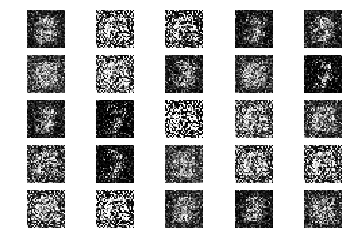

(32, 1) float64
(32, 1) float64256353, acc.: 89.06%] [G loss: 3.695636]
(32, 1) float64439308, acc.: 75.00%] [G loss: 2.735347]
(32, 1) float64237775, acc.: 92.19%] [G loss: 3.608268]
(32, 1) float64353341, acc.: 89.06%] [G loss: 3.174060]
(32, 1) float64355191, acc.: 85.94%] [G loss: 3.157285]
(32, 1) float64308038, acc.: 85.94%] [G loss: 3.779831]
(32, 1) float64865258, acc.: 60.94%] [G loss: 1.140889]
(32, 1) float64393135, acc.: 75.00%] [G loss: 3.554788]
(32, 1) float64107423, acc.: 98.44%] [G loss: 4.493734]
(32, 1) float64784793, acc.: 53.12%] [G loss: 1.512880]
(32, 1) float64178432, acc.: 93.75%] [G loss: 2.847767]
(32, 1) float64135770, acc.: 95.31%] [G loss: 3.611717]
(32, 1) float64498568, acc.: 70.31%] [G loss: 3.181036]
(32, 1) float64231098, acc.: 89.06%] [G loss: 2.948541]
(32, 1) float64242878, acc.: 92.19%] [G loss: 3.130394]
(32, 1) float64377425, acc.: 79.69%] [G loss: 2.387967]
(32, 1) float64223362, acc.: 95.31%] [G loss: 3.439488]
(32, 1) float64781558, acc.: 54.

(32, 1) float64674602, acc.: 50.00%] [G loss: 0.733960]
(32, 1) float64689464, acc.: 43.75%] [G loss: 0.718900]
(32, 1) float64669348, acc.: 45.31%] [G loss: 0.728658]
(32, 1) float64684515, acc.: 42.19%] [G loss: 0.716225]
(32, 1) float64651065, acc.: 54.69%] [G loss: 0.710079]
(32, 1) float64695586, acc.: 46.88%] [G loss: 0.731215]
(32, 1) float64654107, acc.: 54.69%] [G loss: 0.710227]
(32, 1) float64715851, acc.: 37.50%] [G loss: 0.707465]
(32, 1) float64702429, acc.: 45.31%] [G loss: 0.692967]
(32, 1) float64682238, acc.: 45.31%] [G loss: 0.684969]
(32, 1) float64707050, acc.: 40.62%] [G loss: 0.676092]
(32, 1) float64694965, acc.: 42.19%] [G loss: 0.658402]
(32, 1) float64688249, acc.: 46.88%] [G loss: 0.674497]
(32, 1) float64602453, acc.: 57.81%] [G loss: 0.738730]
(32, 1) float64728091, acc.: 39.06%] [G loss: 0.692470]
(32, 1) float64687100, acc.: 42.19%] [G loss: 0.688478]
(32, 1) float64683224, acc.: 42.19%] [G loss: 0.662122]
(32, 1) float64666602, acc.: 48.44%] [G loss: 0.

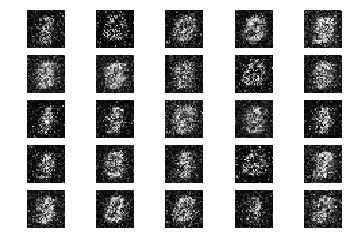

(32, 1) float64
(32, 1) float64600676, acc.: 51.56%] [G loss: 0.725385]
(32, 1) float64671242, acc.: 51.56%] [G loss: 0.728734]
(32, 1) float64685387, acc.: 37.50%] [G loss: 0.739117]
(32, 1) float64645424, acc.: 60.94%] [G loss: 0.770783]
(32, 1) float64686189, acc.: 40.62%] [G loss: 0.709926]
(32, 1) float64656976, acc.: 51.56%] [G loss: 0.745965]
(32, 1) float64653964, acc.: 56.25%] [G loss: 0.768125]
(32, 1) float64650022, acc.: 57.81%] [G loss: 0.818436]
(32, 1) float64674649, acc.: 50.00%] [G loss: 0.755314]
(32, 1) float64710779, acc.: 40.62%] [G loss: 0.678595]
(32, 1) float64640675, acc.: 54.69%] [G loss: 0.704340]
(32, 1) float64669995, acc.: 48.44%] [G loss: 0.698566]
(32, 1) float64686585, acc.: 45.31%] [G loss: 0.699711]
(32, 1) float64651398, acc.: 54.69%] [G loss: 0.742132]
(32, 1) float64639510, acc.: 56.25%] [G loss: 0.746160]
(32, 1) float64672781, acc.: 53.12%] [G loss: 0.759422]
(32, 1) float64646739, acc.: 59.38%] [G loss: 0.728114]
(32, 1) float64654590, acc.: 57.

(32, 1) float64603801, acc.: 71.88%] [G loss: 0.725525]
(32, 1) float64589063, acc.: 68.75%] [G loss: 0.759636]
(32, 1) float64624997, acc.: 65.62%] [G loss: 0.748049]
(32, 1) float64612918, acc.: 71.88%] [G loss: 0.727974]
(32, 1) float64645531, acc.: 59.38%] [G loss: 0.759565]
(32, 1) float64620109, acc.: 70.31%] [G loss: 0.739476]
(32, 1) float64611689, acc.: 68.75%] [G loss: 0.746691]
(32, 1) float64602502, acc.: 65.62%] [G loss: 0.758503]
(32, 1) float64608382, acc.: 67.19%] [G loss: 0.754815]
(32, 1) float64583033, acc.: 68.75%] [G loss: 0.776401]
(32, 1) float64645953, acc.: 59.38%] [G loss: 0.763499]
(32, 1) float64605728, acc.: 68.75%] [G loss: 0.797585]
(32, 1) float64613747, acc.: 62.50%] [G loss: 0.796696]
(32, 1) float64613570, acc.: 70.31%] [G loss: 0.773965]
(32, 1) float64625224, acc.: 60.94%] [G loss: 0.760456]
(32, 1) float64635406, acc.: 59.38%] [G loss: 0.796091]
(32, 1) float64608518, acc.: 70.31%] [G loss: 0.754473]
(32, 1) float64632334, acc.: 59.38%] [G loss: 0.

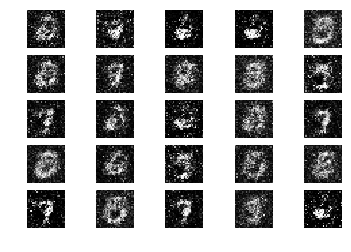

(32, 1) float64
(32, 1) float64622188, acc.: 64.06%] [G loss: 0.791933]
(32, 1) float64617871, acc.: 54.69%] [G loss: 0.833923]
(32, 1) float64600780, acc.: 71.88%] [G loss: 0.836372]
(32, 1) float64608506, acc.: 68.75%] [G loss: 0.849738]
(32, 1) float64606065, acc.: 67.19%] [G loss: 0.847953]
(32, 1) float64615794, acc.: 65.62%] [G loss: 0.860180]
(32, 1) float64611320, acc.: 68.75%] [G loss: 0.854239]
(32, 1) float64591060, acc.: 70.31%] [G loss: 0.821582]
(32, 1) float64573811, acc.: 75.00%] [G loss: 0.849027]
(32, 1) float64600537, acc.: 73.44%] [G loss: 0.797087]
(32, 1) float64619665, acc.: 68.75%] [G loss: 0.826898]
(32, 1) float64635894, acc.: 62.50%] [G loss: 0.822798]
(32, 1) float64644600, acc.: 64.06%] [G loss: 0.802426]
(32, 1) float64615918, acc.: 68.75%] [G loss: 0.814835]
(32, 1) float64601414, acc.: 71.88%] [G loss: 0.794967]
(32, 1) float64579457, acc.: 78.12%] [G loss: 0.806889]
(32, 1) float64603451, acc.: 76.56%] [G loss: 0.803379]
(32, 1) float64614623, acc.: 62.

(32, 1) float64577929, acc.: 78.12%] [G loss: 0.885374]
(32, 1) float64601030, acc.: 71.88%] [G loss: 0.794175]
(32, 1) float64580987, acc.: 71.88%] [G loss: 0.836960]
(32, 1) float64621858, acc.: 60.94%] [G loss: 0.843392]
(32, 1) float64571725, acc.: 73.44%] [G loss: 0.835433]
(32, 1) float64608737, acc.: 73.44%] [G loss: 0.831869]
(32, 1) float64619305, acc.: 65.62%] [G loss: 0.821686]
(32, 1) float64591526, acc.: 71.88%] [G loss: 0.840793]
(32, 1) float64646817, acc.: 57.81%] [G loss: 0.836534]
(32, 1) float64577432, acc.: 79.69%] [G loss: 0.863757]
(32, 1) float64603750, acc.: 70.31%] [G loss: 0.853880]
(32, 1) float64589103, acc.: 68.75%] [G loss: 0.853483]
(32, 1) float64606626, acc.: 68.75%] [G loss: 0.881090]
(32, 1) float64621028, acc.: 75.00%] [G loss: 0.852009]
(32, 1) float64682019, acc.: 56.25%] [G loss: 0.839733]
(32, 1) float64638028, acc.: 57.81%] [G loss: 0.821611]
(32, 1) float64619773, acc.: 67.19%] [G loss: 0.851414]
(32, 1) float64597080, acc.: 71.88%] [G loss: 0.

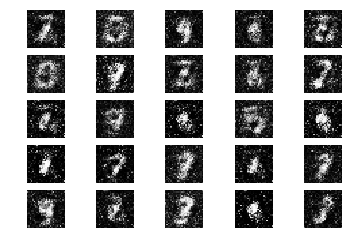

(32, 1) float64
(32, 1) float64.601270, acc.: 68.75%] [G loss: 0.784970]
(32, 1) float64.619548, acc.: 70.31%] [G loss: 0.805167]
(32, 1) float64.630864, acc.: 67.19%] [G loss: 0.806135]
(32, 1) float64.662478, acc.: 54.69%] [G loss: 0.790654]
(32, 1) float64.637559, acc.: 56.25%] [G loss: 0.764742]
(32, 1) float64.607411, acc.: 71.88%] [G loss: 0.794995]
(32, 1) float64.632254, acc.: 64.06%] [G loss: 0.850629]
(32, 1) float64.589578, acc.: 71.88%] [G loss: 0.853015]
(32, 1) float64.668743, acc.: 59.38%] [G loss: 0.766347]
(32, 1) float64.586869, acc.: 68.75%] [G loss: 0.863521]
(32, 1) float64.626926, acc.: 62.50%] [G loss: 0.834536]
(32, 1) float64.595942, acc.: 76.56%] [G loss: 0.775340]
(32, 1) float64.558040, acc.: 71.88%] [G loss: 0.831533]
(32, 1) float64.602747, acc.: 67.19%] [G loss: 0.900966]
(32, 1) float64.620937, acc.: 67.19%] [G loss: 0.894862]
(32, 1) float64.612902, acc.: 57.81%] [G loss: 0.864913]
(32, 1) float64.578132, acc.: 70.31%] [G loss: 0.892686]
(32, 1) float64

(32, 1) float64.579236, acc.: 70.31%] [G loss: 0.909253]
(32, 1) float64.668211, acc.: 64.06%] [G loss: 0.896833]
(32, 1) float64.632774, acc.: 62.50%] [G loss: 0.869217]
(32, 1) float64.603367, acc.: 64.06%] [G loss: 0.877686]
(32, 1) float64.614386, acc.: 68.75%] [G loss: 0.808040]
(32, 1) float64.618973, acc.: 68.75%] [G loss: 0.830531]
(32, 1) float64.623640, acc.: 64.06%] [G loss: 0.839229]
(32, 1) float64.637914, acc.: 57.81%] [G loss: 0.779071]
(32, 1) float64.657035, acc.: 54.69%] [G loss: 0.815540]
(32, 1) float64.554574, acc.: 79.69%] [G loss: 0.806129]
(32, 1) float64.624368, acc.: 59.38%] [G loss: 0.786744]
(32, 1) float64.621903, acc.: 68.75%] [G loss: 0.749081]
(32, 1) float64.616173, acc.: 62.50%] [G loss: 0.847596]
(32, 1) float64.650144, acc.: 56.25%] [G loss: 0.799190]
(32, 1) float64.552606, acc.: 78.12%] [G loss: 0.916591]
(32, 1) float64.640854, acc.: 62.50%] [G loss: 0.888425]
(32, 1) float64.617235, acc.: 73.44%] [G loss: 0.853728]
(32, 1) float64.622646, acc.: 6

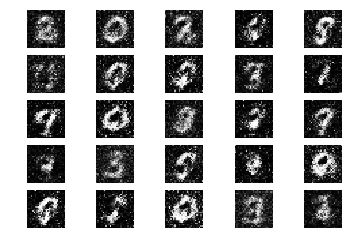

(32, 1) float64
(32, 1) float64.631475, acc.: 62.50%] [G loss: 0.830670]
(32, 1) float64.597977, acc.: 71.88%] [G loss: 0.838068]
(32, 1) float64.631465, acc.: 65.62%] [G loss: 0.838701]
(32, 1) float64.626441, acc.: 62.50%] [G loss: 0.835027]
(32, 1) float64.626771, acc.: 59.38%] [G loss: 0.900605]
(32, 1) float64.632382, acc.: 64.06%] [G loss: 0.833376]
(32, 1) float64.632804, acc.: 71.88%] [G loss: 0.834510]
(32, 1) float64.580885, acc.: 76.56%] [G loss: 0.823025]
(32, 1) float64.591232, acc.: 76.56%] [G loss: 0.857098]
(32, 1) float64.626467, acc.: 64.06%] [G loss: 0.802030]
(32, 1) float64.600884, acc.: 75.00%] [G loss: 0.849710]
(32, 1) float64.613028, acc.: 65.62%] [G loss: 0.870955]
(32, 1) float64.604416, acc.: 81.25%] [G loss: 0.869591]
(32, 1) float64.579514, acc.: 76.56%] [G loss: 0.896563]
(32, 1) float64.586642, acc.: 75.00%] [G loss: 0.871722]
(32, 1) float64.599132, acc.: 73.44%] [G loss: 0.851079]
(32, 1) float64.631047, acc.: 60.94%] [G loss: 0.883938]
(32, 1) float64

(32, 1) float64.589866, acc.: 71.88%] [G loss: 0.912499]
(32, 1) float64.612889, acc.: 67.19%] [G loss: 0.910322]
(32, 1) float64.549349, acc.: 84.38%] [G loss: 0.874091]
(32, 1) float64.585779, acc.: 71.88%] [G loss: 0.890540]
(32, 1) float64.596100, acc.: 70.31%] [G loss: 0.911947]
(32, 1) float64.558617, acc.: 79.69%] [G loss: 1.006740]
(32, 1) float64.637062, acc.: 64.06%] [G loss: 0.969444]
(32, 1) float64.592611, acc.: 78.12%] [G loss: 0.918870]
(32, 1) float64.621783, acc.: 65.62%] [G loss: 0.847432]
(32, 1) float64.542332, acc.: 76.56%] [G loss: 0.882558]
(32, 1) float64.555474, acc.: 75.00%] [G loss: 0.916457]
(32, 1) float64.643969, acc.: 65.62%] [G loss: 0.865818]
(32, 1) float64.580247, acc.: 76.56%] [G loss: 0.896720]
(32, 1) float64.617200, acc.: 68.75%] [G loss: 0.881999]
(32, 1) float64.587377, acc.: 81.25%] [G loss: 0.822896]
(32, 1) float64.604462, acc.: 71.88%] [G loss: 0.808457]
(32, 1) float64.558223, acc.: 76.56%] [G loss: 0.831427]
(32, 1) float64.590835, acc.: 6

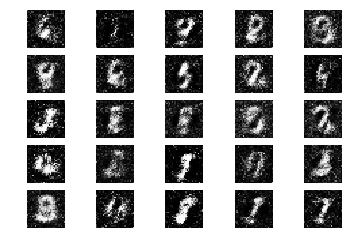

(32, 1) float64
(32, 1) float64.544631, acc.: 81.25%] [G loss: 0.926638]
(32, 1) float64.592811, acc.: 71.88%] [G loss: 0.873951]
(32, 1) float64.576811, acc.: 73.44%] [G loss: 0.888098]
(32, 1) float64.573344, acc.: 73.44%] [G loss: 0.876028]
(32, 1) float64.581669, acc.: 70.31%] [G loss: 0.935183]
(32, 1) float64.581369, acc.: 70.31%] [G loss: 0.875384]
(32, 1) float64.577417, acc.: 71.88%] [G loss: 0.908408]
(32, 1) float64.592323, acc.: 71.88%] [G loss: 0.880479]
(32, 1) float64.578335, acc.: 70.31%] [G loss: 0.940721]
(32, 1) float64.562344, acc.: 70.31%] [G loss: 0.937521]
(32, 1) float64.563890, acc.: 76.56%] [G loss: 0.967356]
(32, 1) float64.613144, acc.: 68.75%] [G loss: 0.857849]
(32, 1) float64.554723, acc.: 76.56%] [G loss: 1.012923]
(32, 1) float64.603865, acc.: 64.06%] [G loss: 0.949436]
(32, 1) float64.603251, acc.: 73.44%] [G loss: 0.903043]
(32, 1) float64.612122, acc.: 65.62%] [G loss: 0.925005]
(32, 1) float64.518056, acc.: 84.38%] [G loss: 0.916910]
(32, 1) float64

(32, 1) float64.555282, acc.: 78.12%] [G loss: 0.941901]
(32, 1) float64.576299, acc.: 75.00%] [G loss: 0.912554]
(32, 1) float64.557188, acc.: 71.88%] [G loss: 0.920593]
(32, 1) float64.624962, acc.: 68.75%] [G loss: 0.937377]
(32, 1) float64.593148, acc.: 65.62%] [G loss: 0.935692]
(32, 1) float64.600522, acc.: 62.50%] [G loss: 1.007502]
(32, 1) float64.632476, acc.: 68.75%] [G loss: 0.928703]
(32, 1) float64.552095, acc.: 78.12%] [G loss: 0.923857]
(32, 1) float64.554124, acc.: 76.56%] [G loss: 0.955566]
(32, 1) float64.549965, acc.: 73.44%] [G loss: 0.797033]
(32, 1) float64.563170, acc.: 75.00%] [G loss: 0.925032]
(32, 1) float64.558182, acc.: 73.44%] [G loss: 0.971976]
(32, 1) float64.638276, acc.: 59.38%] [G loss: 0.918601]
(32, 1) float64.553113, acc.: 78.12%] [G loss: 0.927881]
(32, 1) float64.515707, acc.: 78.12%] [G loss: 0.954976]
(32, 1) float64.574239, acc.: 70.31%] [G loss: 0.978223]
(32, 1) float64.533058, acc.: 78.12%] [G loss: 0.954179]
(32, 1) float64.577005, acc.: 7

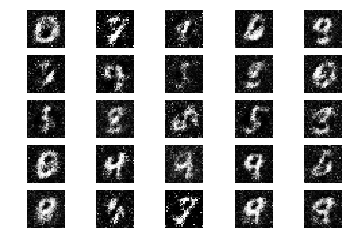

(32, 1) float64
(32, 1) float64.553636, acc.: 81.25%] [G loss: 1.001482]
(32, 1) float64.573652, acc.: 75.00%] [G loss: 0.927824]
(32, 1) float64.568631, acc.: 68.75%] [G loss: 0.949717]
(32, 1) float64.540864, acc.: 84.38%] [G loss: 0.926342]
(32, 1) float64.586563, acc.: 76.56%] [G loss: 0.944031]
(32, 1) float64.508841, acc.: 82.81%] [G loss: 0.960793]
(32, 1) float64.570552, acc.: 78.12%] [G loss: 0.966267]
(32, 1) float64.560789, acc.: 70.31%] [G loss: 0.993669]
(32, 1) float64.615417, acc.: 71.88%] [G loss: 0.994840]
(32, 1) float64.575299, acc.: 70.31%] [G loss: 0.984757]
(32, 1) float64.642127, acc.: 70.31%] [G loss: 1.016375]
(32, 1) float64.562854, acc.: 81.25%] [G loss: 0.915842]
(32, 1) float64.546414, acc.: 82.81%] [G loss: 0.980985]
(32, 1) float64.550770, acc.: 79.69%] [G loss: 0.918454]
(32, 1) float64.560915, acc.: 78.12%] [G loss: 0.902282]
(32, 1) float64.596013, acc.: 68.75%] [G loss: 0.936970]
(32, 1) float64.552226, acc.: 84.38%] [G loss: 0.957219]
(32, 1) float64

(32, 1) float64.626770, acc.: 67.19%] [G loss: 0.891703]
(32, 1) float64.534887, acc.: 78.12%] [G loss: 0.967758]
(32, 1) float64.503237, acc.: 78.12%] [G loss: 1.027919]
(32, 1) float64.553346, acc.: 75.00%] [G loss: 0.968699]
(32, 1) float64.527157, acc.: 82.81%] [G loss: 1.038224]
(32, 1) float64.572814, acc.: 71.88%] [G loss: 1.127681]
(32, 1) float64.557260, acc.: 71.88%] [G loss: 1.060590]
(32, 1) float64.536788, acc.: 73.44%] [G loss: 0.986730]
(32, 1) float64.536079, acc.: 76.56%] [G loss: 0.953268]
(32, 1) float64.566703, acc.: 75.00%] [G loss: 0.963774]
(32, 1) float64.542849, acc.: 76.56%] [G loss: 0.986713]
(32, 1) float64.538040, acc.: 84.38%] [G loss: 0.984938]
(32, 1) float64.534737, acc.: 79.69%] [G loss: 0.987498]
(32, 1) float64.508168, acc.: 76.56%] [G loss: 0.985517]
(32, 1) float64.600032, acc.: 71.88%] [G loss: 0.962897]
(32, 1) float64.593584, acc.: 65.62%] [G loss: 0.940224]
(32, 1) float64.578861, acc.: 73.44%] [G loss: 0.945517]
(32, 1) float64.553740, acc.: 7

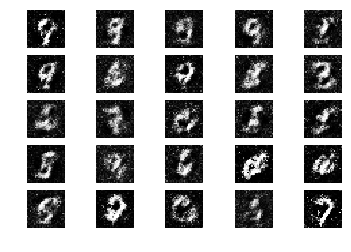

(32, 1) float64
(32, 1) float64.554899, acc.: 76.56%] [G loss: 0.950967]
(32, 1) float64.601486, acc.: 70.31%] [G loss: 0.914312]
(32, 1) float64.637204, acc.: 67.19%] [G loss: 0.940395]
(32, 1) float64.511636, acc.: 75.00%] [G loss: 0.930188]
(32, 1) float64.547005, acc.: 75.00%] [G loss: 1.052563]
(32, 1) float64.517358, acc.: 78.12%] [G loss: 1.187931]
(32, 1) float64.635503, acc.: 65.62%] [G loss: 0.961453]
(32, 1) float64.541396, acc.: 71.88%] [G loss: 0.945827]
(32, 1) float64.451265, acc.: 87.50%] [G loss: 1.008842]
(32, 1) float64.520793, acc.: 78.12%] [G loss: 0.971677]
(32, 1) float64.501620, acc.: 81.25%] [G loss: 0.974383]
(32, 1) float64.570951, acc.: 75.00%] [G loss: 1.033306]
(32, 1) float64.498698, acc.: 82.81%] [G loss: 1.027971]
(32, 1) float64.526137, acc.: 73.44%] [G loss: 1.044569]
(32, 1) float64.541131, acc.: 75.00%] [G loss: 1.112474]
(32, 1) float64.550240, acc.: 73.44%] [G loss: 1.080321]
(32, 1) float64.548275, acc.: 76.56%] [G loss: 0.966096]
(32, 1) float64

(32, 1) float64.473134, acc.: 85.94%] [G loss: 1.075997]
(32, 1) float64.538049, acc.: 76.56%] [G loss: 1.058078]
(32, 1) float64.530970, acc.: 73.44%] [G loss: 1.060990]
(32, 1) float64.536262, acc.: 67.19%] [G loss: 1.153240]
(32, 1) float64.575855, acc.: 70.31%] [G loss: 1.043256]
(32, 1) float64.538879, acc.: 73.44%] [G loss: 1.016540]
(32, 1) float64.547822, acc.: 78.12%] [G loss: 1.068510]
(32, 1) float64.545395, acc.: 75.00%] [G loss: 1.090365]
(32, 1) float64.576078, acc.: 76.56%] [G loss: 0.944074]
(32, 1) float64.514913, acc.: 79.69%] [G loss: 0.995459]
(32, 1) float64.492937, acc.: 81.25%] [G loss: 1.072760]
(32, 1) float64.511138, acc.: 82.81%] [G loss: 1.041968]
(32, 1) float64.474511, acc.: 85.94%] [G loss: 1.021322]
(32, 1) float64.599500, acc.: 70.31%] [G loss: 1.068616]
(32, 1) float64.621305, acc.: 64.06%] [G loss: 1.094054]
(32, 1) float64.530062, acc.: 73.44%] [G loss: 1.046327]
(32, 1) float64.518806, acc.: 76.56%] [G loss: 1.061323]
(32, 1) float64.559653, acc.: 7

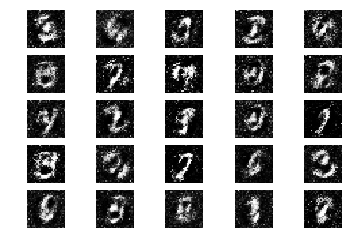

(32, 1) float64
(32, 1) float64.617745, acc.: 70.31%] [G loss: 1.002898]
(32, 1) float64.558767, acc.: 71.88%] [G loss: 1.012662]
(32, 1) float64.546286, acc.: 75.00%] [G loss: 1.035893]
(32, 1) float64.598558, acc.: 67.19%] [G loss: 1.093696]
(32, 1) float64.471741, acc.: 87.50%] [G loss: 1.090082]
(32, 1) float64.537012, acc.: 75.00%] [G loss: 0.992331]
(32, 1) float64.575351, acc.: 73.44%] [G loss: 1.045787]
(32, 1) float64.565168, acc.: 65.62%] [G loss: 1.023512]
(32, 1) float64.544913, acc.: 81.25%] [G loss: 1.011096]
(32, 1) float64.558631, acc.: 70.31%] [G loss: 0.994313]
(32, 1) float64.586690, acc.: 65.62%] [G loss: 1.007014]
(32, 1) float64.565174, acc.: 76.56%] [G loss: 1.000027]
(32, 1) float64.553404, acc.: 76.56%] [G loss: 0.979292]
(32, 1) float64.519974, acc.: 75.00%] [G loss: 1.150110]
(32, 1) float64.560781, acc.: 75.00%] [G loss: 0.996441]
(32, 1) float64.538118, acc.: 78.12%] [G loss: 1.020867]
(32, 1) float64.520977, acc.: 79.69%] [G loss: 0.965482]
(32, 1) float64

(32, 1) float64.560033, acc.: 68.75%] [G loss: 1.052022]
(32, 1) float64.508551, acc.: 84.38%] [G loss: 1.071605]
(32, 1) float64.491712, acc.: 81.25%] [G loss: 0.986856]
(32, 1) float64.630534, acc.: 60.94%] [G loss: 1.008670]
(32, 1) float64.574798, acc.: 73.44%] [G loss: 1.013843]
(32, 1) float64.583504, acc.: 71.88%] [G loss: 1.124895]
(32, 1) float64.572095, acc.: 65.62%] [G loss: 1.033811]
(32, 1) float64.531996, acc.: 79.69%] [G loss: 1.062043]
(32, 1) float64.565343, acc.: 71.88%] [G loss: 1.070522]
(32, 1) float64.559820, acc.: 76.56%] [G loss: 1.156719]
(32, 1) float64.570589, acc.: 67.19%] [G loss: 1.021803]
(32, 1) float64.536008, acc.: 73.44%] [G loss: 1.006294]
(32, 1) float64.553378, acc.: 70.31%] [G loss: 1.033223]
(32, 1) float64.508446, acc.: 79.69%] [G loss: 1.075203]
(32, 1) float64.546484, acc.: 73.44%] [G loss: 1.028663]
(32, 1) float64.553658, acc.: 70.31%] [G loss: 1.084864]
(32, 1) float64.518724, acc.: 81.25%] [G loss: 1.164076]
(32, 1) float64.602276, acc.: 5

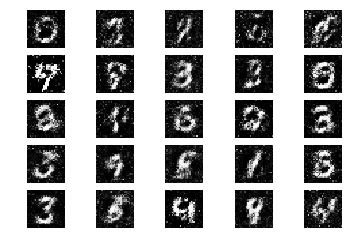

(32, 1) float64
(32, 1) float64.531172, acc.: 79.69%] [G loss: 1.021521]
(32, 1) float64.543642, acc.: 75.00%] [G loss: 1.092729]
(32, 1) float64.561400, acc.: 75.00%] [G loss: 1.016953]
(32, 1) float64.517045, acc.: 78.12%] [G loss: 1.078681]
(32, 1) float64.570378, acc.: 71.88%] [G loss: 1.004026]
(32, 1) float64.601637, acc.: 70.31%] [G loss: 1.014791]
(32, 1) float64.621982, acc.: 67.19%] [G loss: 0.994878]
(32, 1) float64.509442, acc.: 81.25%] [G loss: 1.094400]
(32, 1) float64.535875, acc.: 81.25%] [G loss: 1.049762]
(32, 1) float64.474828, acc.: 85.94%] [G loss: 1.169276]
(32, 1) float64.552672, acc.: 78.12%] [G loss: 1.117135]
(32, 1) float64.574554, acc.: 71.88%] [G loss: 1.086431]
(32, 1) float64.543298, acc.: 71.88%] [G loss: 1.137226]
(32, 1) float64.510247, acc.: 78.12%] [G loss: 1.071034]
(32, 1) float64.500302, acc.: 75.00%] [G loss: 1.026991]
(32, 1) float64.504684, acc.: 78.12%] [G loss: 0.987775]
(32, 1) float64.493798, acc.: 79.69%] [G loss: 1.097989]
(32, 1) float64

(32, 1) float64.604375, acc.: 68.75%] [G loss: 1.007147]
(32, 1) float64.540271, acc.: 76.56%] [G loss: 1.096760]
(32, 1) float64.537492, acc.: 75.00%] [G loss: 1.011586]
(32, 1) float64.589311, acc.: 71.88%] [G loss: 1.067775]
(32, 1) float64.550525, acc.: 82.81%] [G loss: 1.048208]
(32, 1) float64.492303, acc.: 87.50%] [G loss: 1.110468]
(32, 1) float64.579507, acc.: 71.88%] [G loss: 1.055908]
(32, 1) float64.532232, acc.: 78.12%] [G loss: 1.116348]
(32, 1) float64.529648, acc.: 82.81%] [G loss: 1.111369]
(32, 1) float64.553756, acc.: 71.88%] [G loss: 1.032362]
(32, 1) float64.524853, acc.: 71.88%] [G loss: 0.985177]
(32, 1) float64.598623, acc.: 71.88%] [G loss: 0.997434]
(32, 1) float64.572913, acc.: 73.44%] [G loss: 0.985892]
(32, 1) float64.570098, acc.: 65.62%] [G loss: 1.091062]
(32, 1) float64.619240, acc.: 67.19%] [G loss: 0.940118]
(32, 1) float64.611318, acc.: 62.50%] [G loss: 0.986045]
(32, 1) float64.514692, acc.: 79.69%] [G loss: 1.120782]
(32, 1) float64.536810, acc.: 8

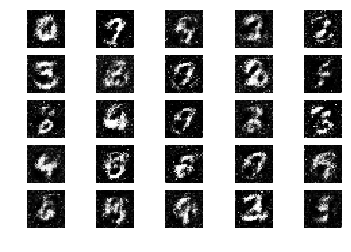

(32, 1) float64
(32, 1) float64.561101, acc.: 73.44%] [G loss: 1.044965]
(32, 1) float64.579668, acc.: 71.88%] [G loss: 1.109455]
(32, 1) float64.547015, acc.: 76.56%] [G loss: 1.162668]
(32, 1) float64.488186, acc.: 78.12%] [G loss: 1.105056]
(32, 1) float64.513424, acc.: 78.12%] [G loss: 1.054391]
(32, 1) float64.503260, acc.: 79.69%] [G loss: 1.011400]
(32, 1) float64.484160, acc.: 82.81%] [G loss: 1.064790]
(32, 1) float64.578929, acc.: 75.00%] [G loss: 1.046259]
(32, 1) float64.532551, acc.: 79.69%] [G loss: 1.024497]
(32, 1) float64.521528, acc.: 79.69%] [G loss: 1.113909]
(32, 1) float64.506887, acc.: 78.12%] [G loss: 1.095101]
(32, 1) float64.517519, acc.: 82.81%] [G loss: 1.167329]
(32, 1) float64.558710, acc.: 76.56%] [G loss: 1.127977]
(32, 1) float64.573769, acc.: 71.88%] [G loss: 1.034142]
(32, 1) float64.509953, acc.: 71.88%] [G loss: 1.122816]
(32, 1) float64.581063, acc.: 65.62%] [G loss: 1.077410]
(32, 1) float64.511509, acc.: 75.00%] [G loss: 1.062102]
(32, 1) float64

(32, 1) float64.630798, acc.: 75.00%] [G loss: 1.043305]
(32, 1) float64.535796, acc.: 75.00%] [G loss: 1.078518]
(32, 1) float64.597948, acc.: 68.75%] [G loss: 1.029912]
(32, 1) float64.576513, acc.: 71.88%] [G loss: 0.945310]
(32, 1) float64.553422, acc.: 76.56%] [G loss: 0.957834]
(32, 1) float64.564364, acc.: 71.88%] [G loss: 1.045805]
(32, 1) float64.595829, acc.: 71.88%] [G loss: 1.137327]
(32, 1) float64.578073, acc.: 68.75%] [G loss: 1.074276]
(32, 1) float64.602183, acc.: 64.06%] [G loss: 1.081707]
(32, 1) float64.572288, acc.: 70.31%] [G loss: 1.052414]
(32, 1) float64.642832, acc.: 65.62%] [G loss: 1.098448]
(32, 1) float64.530440, acc.: 73.44%] [G loss: 1.074082]
(32, 1) float64.549571, acc.: 76.56%] [G loss: 0.946866]
(32, 1) float64.603048, acc.: 67.19%] [G loss: 1.073884]
(32, 1) float64.555730, acc.: 76.56%] [G loss: 1.034439]
(32, 1) float64.525878, acc.: 76.56%] [G loss: 1.082641]
(32, 1) float64.518015, acc.: 78.12%] [G loss: 1.112309]
(32, 1) float64.602778, acc.: 7

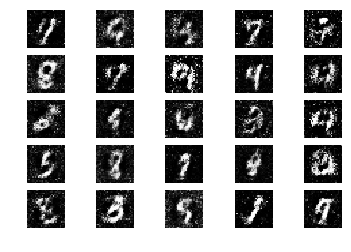

(32, 1) float64
(32, 1) float64.571160, acc.: 71.88%] [G loss: 1.008914]
(32, 1) float64.572385, acc.: 68.75%] [G loss: 0.993453]
(32, 1) float64.570420, acc.: 76.56%] [G loss: 1.092226]
(32, 1) float64.500887, acc.: 78.12%] [G loss: 1.120735]
(32, 1) float64.625924, acc.: 64.06%] [G loss: 1.065986]
(32, 1) float64.600785, acc.: 68.75%] [G loss: 1.112226]
(32, 1) float64.557057, acc.: 76.56%] [G loss: 0.984600]
(32, 1) float64.540534, acc.: 73.44%] [G loss: 1.139355]
(32, 1) float64.685412, acc.: 62.50%] [G loss: 0.945556]
(32, 1) float64.562709, acc.: 68.75%] [G loss: 1.012194]
(32, 1) float64.590242, acc.: 60.94%] [G loss: 1.013429]
(32, 1) float64.583155, acc.: 67.19%] [G loss: 1.077550]
(32, 1) float64.555343, acc.: 78.12%] [G loss: 1.111118]
(32, 1) float64.598831, acc.: 70.31%] [G loss: 1.127970]
(32, 1) float64.586889, acc.: 75.00%] [G loss: 1.037201]
(32, 1) float64.531320, acc.: 82.81%] [G loss: 0.985499]
(32, 1) float64.547924, acc.: 68.75%] [G loss: 1.102419]
(32, 1) float64

(32, 1) float64.525678, acc.: 76.56%] [G loss: 1.025977]
(32, 1) float64.597867, acc.: 68.75%] [G loss: 0.984107]
(32, 1) float64.617098, acc.: 60.94%] [G loss: 1.066172]
(32, 1) float64.485736, acc.: 81.25%] [G loss: 1.022136]
(32, 1) float64.559122, acc.: 75.00%] [G loss: 0.970311]
(32, 1) float64.526172, acc.: 79.69%] [G loss: 1.051466]
(32, 1) float64.595949, acc.: 68.75%] [G loss: 0.913367]
(32, 1) float64.591374, acc.: 70.31%] [G loss: 0.906635]
(32, 1) float64.557207, acc.: 78.12%] [G loss: 1.036125]
(32, 1) float64.630235, acc.: 64.06%] [G loss: 0.975840]
(32, 1) float64.590164, acc.: 70.31%] [G loss: 0.926050]
(32, 1) float64.616202, acc.: 65.62%] [G loss: 1.001271]
(32, 1) float64.601641, acc.: 70.31%] [G loss: 1.018333]
(32, 1) float64.570066, acc.: 68.75%] [G loss: 0.965414]
(32, 1) float64.572230, acc.: 70.31%] [G loss: 1.031526]
(32, 1) float64.522698, acc.: 85.94%] [G loss: 0.963875]
(32, 1) float64.587835, acc.: 68.75%] [G loss: 1.028347]
(32, 1) float64.511405, acc.: 8

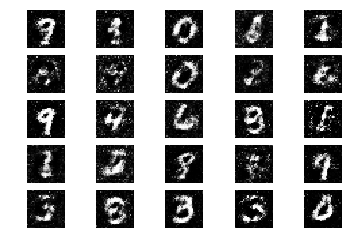

(32, 1) float64
(32, 1) float64.669903, acc.: 57.81%] [G loss: 0.967661]
(32, 1) float64.549112, acc.: 75.00%] [G loss: 1.053084]
(32, 1) float64.525407, acc.: 81.25%] [G loss: 0.981743]
(32, 1) float64.581182, acc.: 71.88%] [G loss: 0.979923]
(32, 1) float64.608701, acc.: 70.31%] [G loss: 1.004563]
(32, 1) float64.532673, acc.: 76.56%] [G loss: 1.052641]
(32, 1) float64.559292, acc.: 67.19%] [G loss: 1.033063]
(32, 1) float64.603195, acc.: 67.19%] [G loss: 1.066968]
(32, 1) float64.576964, acc.: 75.00%] [G loss: 1.088636]
(32, 1) float64.550228, acc.: 73.44%] [G loss: 1.098025]
(32, 1) float64.557174, acc.: 70.31%] [G loss: 0.975851]
(32, 1) float64.558882, acc.: 76.56%] [G loss: 1.093049]
(32, 1) float64.647862, acc.: 59.38%] [G loss: 1.038541]
(32, 1) float64.497216, acc.: 79.69%] [G loss: 1.122118]
(32, 1) float64.540628, acc.: 70.31%] [G loss: 1.087809]
(32, 1) float64.564021, acc.: 78.12%] [G loss: 1.058187]
(32, 1) float64.552716, acc.: 70.31%] [G loss: 1.033893]
(32, 1) float64

(32, 1) float64.513045, acc.: 79.69%] [G loss: 1.203498]
(32, 1) float64.555391, acc.: 64.06%] [G loss: 1.032667]
(32, 1) float64.558741, acc.: 78.12%] [G loss: 1.017293]
(32, 1) float64.565707, acc.: 68.75%] [G loss: 1.055864]
(32, 1) float64.648594, acc.: 68.75%] [G loss: 0.971705]
(32, 1) float64.559579, acc.: 78.12%] [G loss: 0.919060]
(32, 1) float64.586295, acc.: 68.75%] [G loss: 1.077965]
(32, 1) float64.604053, acc.: 73.44%] [G loss: 0.916363]
(32, 1) float64.566291, acc.: 76.56%] [G loss: 1.013430]
(32, 1) float64.536932, acc.: 81.25%] [G loss: 0.932844]
(32, 1) float64.570464, acc.: 75.00%] [G loss: 1.010269]
(32, 1) float64.569605, acc.: 68.75%] [G loss: 1.034962]
(32, 1) float64.535598, acc.: 75.00%] [G loss: 0.942726]
(32, 1) float64.636297, acc.: 60.94%] [G loss: 1.051853]
(32, 1) float64.517766, acc.: 76.56%] [G loss: 1.001332]
(32, 1) float64.546860, acc.: 71.88%] [G loss: 1.179339]
(32, 1) float64.603992, acc.: 60.94%] [G loss: 1.059426]
(32, 1) float64.588080, acc.: 6

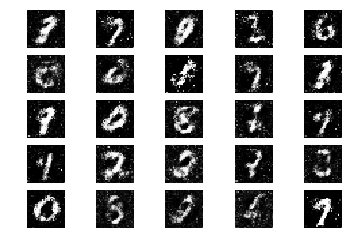

(32, 1) float64
(32, 1) float64.564964, acc.: 71.88%] [G loss: 1.011537]
(32, 1) float64.593371, acc.: 67.19%] [G loss: 0.997876]
(32, 1) float64.524254, acc.: 76.56%] [G loss: 1.031764]
(32, 1) float64.557193, acc.: 78.12%] [G loss: 1.000533]
(32, 1) float64.653577, acc.: 57.81%] [G loss: 0.985498]
(32, 1) float64.556980, acc.: 78.12%] [G loss: 1.030161]
(32, 1) float64.527635, acc.: 76.56%] [G loss: 1.079617]
(32, 1) float64.601971, acc.: 65.62%] [G loss: 0.964746]
(32, 1) float64.568962, acc.: 75.00%] [G loss: 0.973620]
(32, 1) float64.558779, acc.: 75.00%] [G loss: 0.953673]
(32, 1) float64.581357, acc.: 71.88%] [G loss: 0.997801]
(32, 1) float64.483564, acc.: 90.62%] [G loss: 1.015824]
(32, 1) float64.505545, acc.: 79.69%] [G loss: 1.019003]
(32, 1) float64.526053, acc.: 76.56%] [G loss: 1.058241]
(32, 1) float64.636886, acc.: 64.06%] [G loss: 0.992079]
(32, 1) float64.512681, acc.: 76.56%] [G loss: 1.042122]
(32, 1) float64.553931, acc.: 73.44%] [G loss: 1.060153]
(32, 1) float64

(32, 1) float64.596396, acc.: 67.19%] [G loss: 1.001096]
(32, 1) float64.544369, acc.: 75.00%] [G loss: 1.009596]
(32, 1) float64.584713, acc.: 68.75%] [G loss: 1.051609]
(32, 1) float64.582596, acc.: 65.62%] [G loss: 1.037069]
(32, 1) float64.590882, acc.: 64.06%] [G loss: 1.032200]
(32, 1) float64.576125, acc.: 67.19%] [G loss: 1.090219]
(32, 1) float64.538767, acc.: 78.12%] [G loss: 1.014836]
(32, 1) float64.531159, acc.: 73.44%] [G loss: 0.966407]
(32, 1) float64.525751, acc.: 78.12%] [G loss: 1.085385]
(32, 1) float64.553282, acc.: 75.00%] [G loss: 0.978224]
(32, 1) float64.596872, acc.: 62.50%] [G loss: 0.850067]
(32, 1) float64.648037, acc.: 64.06%] [G loss: 0.964728]
(32, 1) float64.570657, acc.: 70.31%] [G loss: 1.059282]
(32, 1) float64.547193, acc.: 78.12%] [G loss: 1.042437]
(32, 1) float64.621888, acc.: 67.19%] [G loss: 1.074309]
(32, 1) float64.594459, acc.: 70.31%] [G loss: 0.876636]
(32, 1) float64.616051, acc.: 67.19%] [G loss: 1.040615]
(32, 1) float64.532691, acc.: 7

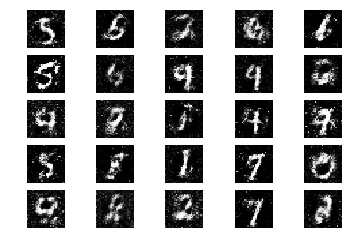

(32, 1) float64
(32, 1) float64.572757, acc.: 76.56%] [G loss: 1.001900]
(32, 1) float64.617243, acc.: 70.31%] [G loss: 0.987465]
(32, 1) float64.534542, acc.: 75.00%] [G loss: 0.970721]
(32, 1) float64.608269, acc.: 67.19%] [G loss: 1.023538]
(32, 1) float64.564267, acc.: 71.88%] [G loss: 1.029103]
(32, 1) float64.563388, acc.: 71.88%] [G loss: 1.066870]
(32, 1) float64.525275, acc.: 73.44%] [G loss: 0.995246]
(32, 1) float64.516307, acc.: 81.25%] [G loss: 1.076757]
(32, 1) float64.506805, acc.: 81.25%] [G loss: 1.055465]
(32, 1) float64.510944, acc.: 81.25%] [G loss: 0.960707]
(32, 1) float64.637306, acc.: 67.19%] [G loss: 0.942175]
(32, 1) float64.579927, acc.: 60.94%] [G loss: 1.073523]
(32, 1) float64.577864, acc.: 68.75%] [G loss: 1.050829]
(32, 1) float64.618590, acc.: 67.19%] [G loss: 1.026348]
(32, 1) float64.632662, acc.: 67.19%] [G loss: 1.103090]
(32, 1) float64.605617, acc.: 65.62%] [G loss: 1.091479]
(32, 1) float64.605045, acc.: 75.00%] [G loss: 1.083292]
(32, 1) float64

(32, 1) float64.690856, acc.: 60.94%] [G loss: 1.051533]
(32, 1) float64.583845, acc.: 67.19%] [G loss: 0.996175]
(32, 1) float64.674298, acc.: 59.38%] [G loss: 1.089836]
(32, 1) float64.523850, acc.: 71.88%] [G loss: 0.990504]
(32, 1) float64.580673, acc.: 68.75%] [G loss: 1.047303]
(32, 1) float64.614080, acc.: 65.62%] [G loss: 0.991659]
(32, 1) float64.619655, acc.: 65.62%] [G loss: 1.082706]
(32, 1) float64.547766, acc.: 71.88%] [G loss: 1.071897]
(32, 1) float64.567213, acc.: 70.31%] [G loss: 0.990727]
(32, 1) float64.579821, acc.: 65.62%] [G loss: 1.062044]
(32, 1) float64.595925, acc.: 76.56%] [G loss: 1.064616]
(32, 1) float64.567972, acc.: 68.75%] [G loss: 1.069585]
(32, 1) float64.590242, acc.: 75.00%] [G loss: 1.086006]
(32, 1) float64.638574, acc.: 67.19%] [G loss: 0.911521]
(32, 1) float64.539531, acc.: 75.00%] [G loss: 1.003056]
(32, 1) float64.532613, acc.: 71.88%] [G loss: 1.015142]
(32, 1) float64.528887, acc.: 78.12%] [G loss: 1.104437]
(32, 1) float64.579784, acc.: 6

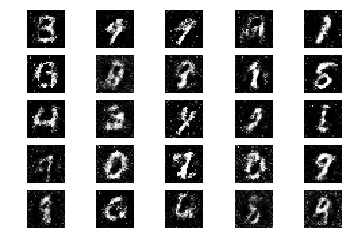

(32, 1) float64
(32, 1) float64.667797, acc.: 59.38%] [G loss: 1.077357]
(32, 1) float64.509633, acc.: 81.25%] [G loss: 1.012994]
(32, 1) float64.505975, acc.: 82.81%] [G loss: 1.012596]
(32, 1) float64.513951, acc.: 76.56%] [G loss: 1.138144]
(32, 1) float64.590742, acc.: 70.31%] [G loss: 1.035085]
(32, 1) float64.596767, acc.: 76.56%] [G loss: 1.058585]
(32, 1) float64.583900, acc.: 76.56%] [G loss: 1.110080]
(32, 1) float64.495462, acc.: 81.25%] [G loss: 0.996729]
(32, 1) float64.586148, acc.: 67.19%] [G loss: 1.012811]
(32, 1) float64.574992, acc.: 76.56%] [G loss: 1.021015]
(32, 1) float64.510219, acc.: 79.69%] [G loss: 1.099096]
(32, 1) float64.555858, acc.: 75.00%] [G loss: 1.086970]
(32, 1) float64.587543, acc.: 59.38%] [G loss: 1.068369]
(32, 1) float64.567088, acc.: 67.19%] [G loss: 1.177578]
(32, 1) float64.623145, acc.: 70.31%] [G loss: 1.051619]
(32, 1) float64.483180, acc.: 79.69%] [G loss: 1.081762]
(32, 1) float64.565095, acc.: 68.75%] [G loss: 1.027745]
(32, 1) float64

(32, 1) float64.528902, acc.: 78.12%] [G loss: 0.950130]
(32, 1) float64.568876, acc.: 71.88%] [G loss: 1.022692]
(32, 1) float64.670856, acc.: 64.06%] [G loss: 1.125726]
(32, 1) float64.522767, acc.: 81.25%] [G loss: 1.088147]
(32, 1) float64.608750, acc.: 68.75%] [G loss: 0.994900]
(32, 1) float64.584033, acc.: 68.75%] [G loss: 1.108687]
(32, 1) float64.542966, acc.: 78.12%] [G loss: 1.106108]
(32, 1) float64.546698, acc.: 73.44%] [G loss: 1.068088]
(32, 1) float64.551469, acc.: 70.31%] [G loss: 1.153760]
(32, 1) float64.546387, acc.: 79.69%] [G loss: 1.040992]
(32, 1) float64.547286, acc.: 73.44%] [G loss: 1.105568]
(32, 1) float64.519616, acc.: 79.69%] [G loss: 1.090504]
(32, 1) float64.566002, acc.: 71.88%] [G loss: 1.104315]
(32, 1) float64.590392, acc.: 64.06%] [G loss: 1.016056]
(32, 1) float64.547065, acc.: 71.88%] [G loss: 1.171191]
(32, 1) float64.545287, acc.: 78.12%] [G loss: 1.005854]
(32, 1) float64.623150, acc.: 64.06%] [G loss: 0.915344]
(32, 1) float64.539590, acc.: 7

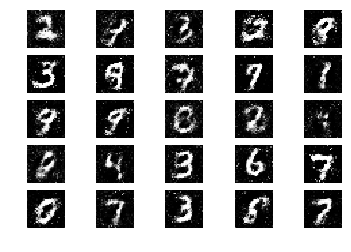

(32, 1) float64
(32, 1) float64.530025, acc.: 70.31%] [G loss: 1.008370]
(32, 1) float64.544190, acc.: 68.75%] [G loss: 1.059663]
(32, 1) float64.610912, acc.: 64.06%] [G loss: 1.041584]
(32, 1) float64.573969, acc.: 70.31%] [G loss: 1.076111]
(32, 1) float64.598606, acc.: 70.31%] [G loss: 1.165127]
(32, 1) float64.636441, acc.: 67.19%] [G loss: 1.101864]
(32, 1) float64.557235, acc.: 73.44%] [G loss: 1.062947]
(32, 1) float64.599513, acc.: 67.19%] [G loss: 1.056566]
(32, 1) float64.664547, acc.: 60.94%] [G loss: 1.091771]
(32, 1) float64.601407, acc.: 65.62%] [G loss: 1.021189]
(32, 1) float64.570632, acc.: 70.31%] [G loss: 0.939337]
(32, 1) float64.537740, acc.: 73.44%] [G loss: 1.151582]
(32, 1) float64.551136, acc.: 71.88%] [G loss: 1.126914]
(32, 1) float64.558772, acc.: 70.31%] [G loss: 1.011833]
(32, 1) float64.626078, acc.: 62.50%] [G loss: 1.012518]
(32, 1) float64.580802, acc.: 67.19%] [G loss: 1.006188]
(32, 1) float64.539949, acc.: 75.00%] [G loss: 0.916986]
(32, 1) float64

(32, 1) float64.544744, acc.: 71.88%] [G loss: 0.978352]
(32, 1) float64.543034, acc.: 75.00%] [G loss: 0.954861]
(32, 1) float64.617437, acc.: 64.06%] [G loss: 0.999843]
(32, 1) float64.596823, acc.: 65.62%] [G loss: 1.150463]
(32, 1) float64.554169, acc.: 78.12%] [G loss: 1.049678]
(32, 1) float64.572336, acc.: 70.31%] [G loss: 1.009563]
(32, 1) float64.613427, acc.: 64.06%] [G loss: 0.970569]
(32, 1) float64.589691, acc.: 76.56%] [G loss: 1.138222]
(32, 1) float64.528503, acc.: 76.56%] [G loss: 1.023054]
(32, 1) float64.666770, acc.: 62.50%] [G loss: 1.026490]
(32, 1) float64.702804, acc.: 53.12%] [G loss: 0.960903]
(32, 1) float64.519890, acc.: 76.56%] [G loss: 1.030093]
(32, 1) float64.510299, acc.: 78.12%] [G loss: 1.118308]
(32, 1) float64.605865, acc.: 68.75%] [G loss: 0.867385]
(32, 1) float64.534572, acc.: 76.56%] [G loss: 0.997681]
(32, 1) float64.572182, acc.: 71.88%] [G loss: 1.056418]
(32, 1) float64.598366, acc.: 68.75%] [G loss: 1.035938]
(32, 1) float64.627831, acc.: 6

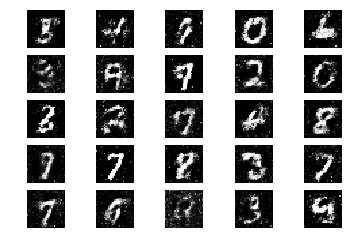

(32, 1) float64
(32, 1) float64.571405, acc.: 70.31%] [G loss: 0.951860]
(32, 1) float64.639550, acc.: 65.62%] [G loss: 0.977798]
(32, 1) float64.624353, acc.: 60.94%] [G loss: 0.946570]
(32, 1) float64.592759, acc.: 67.19%] [G loss: 1.010436]
(32, 1) float64.583752, acc.: 71.88%] [G loss: 0.997064]
(32, 1) float64.595238, acc.: 65.62%] [G loss: 0.911801]
(32, 1) float64.747973, acc.: 56.25%] [G loss: 0.967870]
(32, 1) float64.514870, acc.: 78.12%] [G loss: 0.970135]
(32, 1) float64.616019, acc.: 64.06%] [G loss: 1.009175]
(32, 1) float64.583788, acc.: 67.19%] [G loss: 0.966745]
(32, 1) float64.552891, acc.: 73.44%] [G loss: 1.019749]
(32, 1) float64.613067, acc.: 67.19%] [G loss: 0.980359]
(32, 1) float64.500433, acc.: 85.94%] [G loss: 1.105830]
(32, 1) float64.594369, acc.: 73.44%] [G loss: 0.980205]
(32, 1) float64.540762, acc.: 76.56%] [G loss: 1.045465]
(32, 1) float64.569779, acc.: 68.75%] [G loss: 0.993864]
(32, 1) float64.568417, acc.: 71.88%] [G loss: 1.074307]
(32, 1) float64

(32, 1) float64.574407, acc.: 71.88%] [G loss: 1.028564]
(32, 1) float64.583797, acc.: 67.19%] [G loss: 1.056296]
(32, 1) float64.549544, acc.: 78.12%] [G loss: 0.919577]
(32, 1) float64.576172, acc.: 71.88%] [G loss: 0.961337]
(32, 1) float64.671686, acc.: 68.75%] [G loss: 0.950325]
(32, 1) float64.593235, acc.: 70.31%] [G loss: 1.010041]
(32, 1) float64.669047, acc.: 56.25%] [G loss: 0.994852]
(32, 1) float64.565463, acc.: 75.00%] [G loss: 0.980678]
(32, 1) float64.603033, acc.: 62.50%] [G loss: 1.016726]
(32, 1) float64.664196, acc.: 57.81%] [G loss: 0.898032]
(32, 1) float64.586325, acc.: 65.62%] [G loss: 1.104004]
(32, 1) float64.513434, acc.: 78.12%] [G loss: 1.067040]
(32, 1) float64.594205, acc.: 68.75%] [G loss: 1.060912]
(32, 1) float64.643566, acc.: 60.94%] [G loss: 0.938430]
(32, 1) float64.585114, acc.: 68.75%] [G loss: 1.065009]
(32, 1) float64.666756, acc.: 59.38%] [G loss: 0.978957]
(32, 1) float64.509020, acc.: 81.25%] [G loss: 0.921618]
(32, 1) float64.631290, acc.: 6

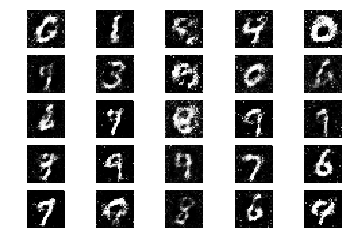

(32, 1) float64
(32, 1) float64.619916, acc.: 67.19%] [G loss: 1.069623]
(32, 1) float64.583019, acc.: 65.62%] [G loss: 0.967034]
(32, 1) float64.606232, acc.: 64.06%] [G loss: 0.937219]
(32, 1) float64.558995, acc.: 78.12%] [G loss: 0.983198]
(32, 1) float64.508333, acc.: 73.44%] [G loss: 1.159086]
(32, 1) float64.503166, acc.: 73.44%] [G loss: 1.054656]
(32, 1) float64.526046, acc.: 75.00%] [G loss: 1.036872]
(32, 1) float64.597716, acc.: 70.31%] [G loss: 1.153179]
(32, 1) float64.644668, acc.: 65.62%] [G loss: 0.954025]
(32, 1) float64.623049, acc.: 60.94%] [G loss: 0.938363]
(32, 1) float64.605107, acc.: 64.06%] [G loss: 1.145464]
(32, 1) float64.650290, acc.: 56.25%] [G loss: 1.096007]
(32, 1) float64.651390, acc.: 59.38%] [G loss: 1.132804]
(32, 1) float64.624584, acc.: 64.06%] [G loss: 1.107543]
(32, 1) float64.596211, acc.: 68.75%] [G loss: 1.078712]
(32, 1) float64.638378, acc.: 70.31%] [G loss: 1.116666]
(32, 1) float64.595171, acc.: 67.19%] [G loss: 1.017893]
(32, 1) float64

(32, 1) float64.666445, acc.: 64.06%] [G loss: 1.051533]
(32, 1) float64.511590, acc.: 78.12%] [G loss: 0.990060]
(32, 1) float64.580437, acc.: 75.00%] [G loss: 1.048597]
(32, 1) float64.654031, acc.: 65.62%] [G loss: 1.042929]
(32, 1) float64.534637, acc.: 73.44%] [G loss: 1.025084]
(32, 1) float64.574759, acc.: 68.75%] [G loss: 0.986349]
(32, 1) float64.626755, acc.: 64.06%] [G loss: 1.125158]
(32, 1) float64.698669, acc.: 60.94%] [G loss: 1.091266]
(32, 1) float64.565437, acc.: 73.44%] [G loss: 1.115116]
(32, 1) float64.559891, acc.: 73.44%] [G loss: 1.040287]
(32, 1) float64.593027, acc.: 68.75%] [G loss: 1.049484]
(32, 1) float64.625783, acc.: 62.50%] [G loss: 0.893552]
(32, 1) float64.665114, acc.: 65.62%] [G loss: 0.883153]
(32, 1) float64.566788, acc.: 76.56%] [G loss: 1.048479]
(32, 1) float64.556953, acc.: 76.56%] [G loss: 1.068357]
(32, 1) float64.630374, acc.: 62.50%] [G loss: 1.099524]
(32, 1) float64.582523, acc.: 70.31%] [G loss: 1.000493]
(32, 1) float64.532498, acc.: 7

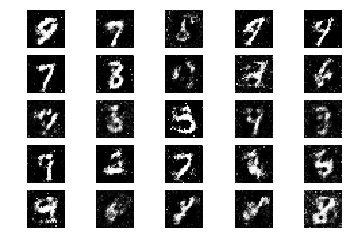

(32, 1) float64
(32, 1) float64.646752, acc.: 67.19%] [G loss: 1.015305]
(32, 1) float64.587672, acc.: 65.62%] [G loss: 1.093586]
(32, 1) float64.622905, acc.: 65.62%] [G loss: 1.056298]
(32, 1) float64.576712, acc.: 79.69%] [G loss: 1.048618]
(32, 1) float64.673198, acc.: 62.50%] [G loss: 0.962644]
(32, 1) float64.617106, acc.: 67.19%] [G loss: 1.063705]
(32, 1) float64.610438, acc.: 68.75%] [G loss: 1.119943]
(32, 1) float64.505636, acc.: 79.69%] [G loss: 1.112763]
(32, 1) float64.590821, acc.: 71.88%] [G loss: 1.059678]
(32, 1) float64.650864, acc.: 65.62%] [G loss: 1.044065]
(32, 1) float64.628630, acc.: 59.38%] [G loss: 1.082864]
(32, 1) float64.567270, acc.: 71.88%] [G loss: 1.112240]
(32, 1) float64.586653, acc.: 68.75%] [G loss: 1.132219]
(32, 1) float64.555344, acc.: 76.56%] [G loss: 0.998104]
(32, 1) float64.540220, acc.: 73.44%] [G loss: 1.052784]
(32, 1) float64.519325, acc.: 70.31%] [G loss: 1.057414]
(32, 1) float64.623780, acc.: 64.06%] [G loss: 1.013070]
(32, 1) float64

(32, 1) float64.523511, acc.: 79.69%] [G loss: 1.079943]
(32, 1) float64.632879, acc.: 60.94%] [G loss: 1.017704]
(32, 1) float64.586017, acc.: 68.75%] [G loss: 0.968302]
(32, 1) float64.665100, acc.: 59.38%] [G loss: 0.957384]
(32, 1) float64.634563, acc.: 57.81%] [G loss: 1.021136]
(32, 1) float64.523804, acc.: 70.31%] [G loss: 0.986571]
(32, 1) float64.598800, acc.: 60.94%] [G loss: 1.112237]
(32, 1) float64.645416, acc.: 59.38%] [G loss: 1.051747]
(32, 1) float64.626830, acc.: 60.94%] [G loss: 1.012968]
(32, 1) float64.572007, acc.: 76.56%] [G loss: 1.083747]
(32, 1) float64.552432, acc.: 71.88%] [G loss: 1.119560]
(32, 1) float64.583807, acc.: 71.88%] [G loss: 0.969091]
(32, 1) float64.679366, acc.: 56.25%] [G loss: 1.085279]
(32, 1) float64.669217, acc.: 62.50%] [G loss: 1.036686]
(32, 1) float64.587742, acc.: 67.19%] [G loss: 1.094746]
(32, 1) float64.617543, acc.: 67.19%] [G loss: 1.034571]
(32, 1) float64.620937, acc.: 68.75%] [G loss: 1.054045]
(32, 1) float64.575412, acc.: 7

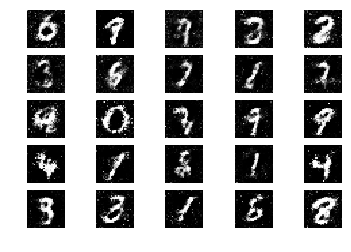

(32, 1) float64
(32, 1) float64.570019, acc.: 73.44%] [G loss: 0.984169]
(32, 1) float64.713181, acc.: 53.12%] [G loss: 1.117732]
(32, 1) float64.553171, acc.: 71.88%] [G loss: 1.052717]
(32, 1) float64.649294, acc.: 62.50%] [G loss: 0.874222]
(32, 1) float64.575619, acc.: 75.00%] [G loss: 0.908553]
(32, 1) float64.601523, acc.: 71.88%] [G loss: 1.042222]
(32, 1) float64.597806, acc.: 65.62%] [G loss: 1.011525]
(32, 1) float64.568320, acc.: 67.19%] [G loss: 1.104181]
(32, 1) float64.540547, acc.: 73.44%] [G loss: 0.929578]
(32, 1) float64.591756, acc.: 70.31%] [G loss: 1.064671]
(32, 1) float64.552822, acc.: 71.88%] [G loss: 1.051517]
(32, 1) float64.637336, acc.: 59.38%] [G loss: 1.043280]
(32, 1) float64.553230, acc.: 79.69%] [G loss: 1.098212]
(32, 1) float64.623871, acc.: 67.19%] [G loss: 0.946985]
(32, 1) float64.596839, acc.: 65.62%] [G loss: 1.043466]
(32, 1) float64.694185, acc.: 53.12%] [G loss: 1.022536]
(32, 1) float64.552210, acc.: 78.12%] [G loss: 1.026479]
(32, 1) float64

(32, 1) float64.617398, acc.: 68.75%] [G loss: 1.084735]
(32, 1) float64.609427, acc.: 65.62%] [G loss: 1.022766]
(32, 1) float64.546482, acc.: 81.25%] [G loss: 0.973479]
(32, 1) float64.648232, acc.: 62.50%] [G loss: 0.923044]
(32, 1) float64.595080, acc.: 67.19%] [G loss: 0.973415]
(32, 1) float64.618252, acc.: 65.62%] [G loss: 0.944250]
(32, 1) float64.573052, acc.: 71.88%] [G loss: 0.981634]
(32, 1) float64.627787, acc.: 71.88%] [G loss: 1.051022]
(32, 1) float64.620922, acc.: 65.62%] [G loss: 1.117794]
(32, 1) float64.580040, acc.: 71.88%] [G loss: 1.111219]
(32, 1) float64.572209, acc.: 68.75%] [G loss: 1.093870]
(32, 1) float64.645652, acc.: 65.62%] [G loss: 1.108992]
(32, 1) float64.652768, acc.: 64.06%] [G loss: 1.093617]
(32, 1) float64.617067, acc.: 68.75%] [G loss: 1.019860]
(32, 1) float64.610927, acc.: 73.44%] [G loss: 1.051047]
(32, 1) float64.606733, acc.: 67.19%] [G loss: 1.132052]
(32, 1) float64.698644, acc.: 53.12%] [G loss: 1.073867]
(32, 1) float64.503075, acc.: 7

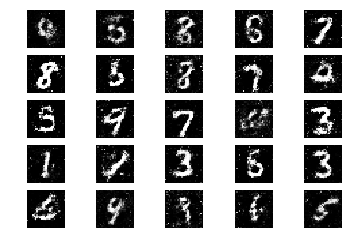

(32, 1) float64
(32, 1) float64.592463, acc.: 68.75%] [G loss: 0.904556]
(32, 1) float64.604194, acc.: 70.31%] [G loss: 1.026736]
(32, 1) float64.631439, acc.: 60.94%] [G loss: 0.949764]
(32, 1) float64.565436, acc.: 64.06%] [G loss: 1.092213]
(32, 1) float64.559351, acc.: 75.00%] [G loss: 0.932068]
(32, 1) float64.617484, acc.: 73.44%] [G loss: 0.878901]
(32, 1) float64.546992, acc.: 68.75%] [G loss: 1.005895]
(32, 1) float64.571522, acc.: 73.44%] [G loss: 1.059692]
(32, 1) float64.554464, acc.: 78.12%] [G loss: 1.024661]
(32, 1) float64.611002, acc.: 65.62%] [G loss: 0.936397]
(32, 1) float64.521456, acc.: 84.38%] [G loss: 1.201323]
(32, 1) float64.608178, acc.: 68.75%] [G loss: 1.080678]
(32, 1) float64.555828, acc.: 68.75%] [G loss: 1.079074]
(32, 1) float64.505357, acc.: 79.69%] [G loss: 1.091962]
(32, 1) float64.612516, acc.: 71.88%] [G loss: 1.055102]
(32, 1) float64.622065, acc.: 65.62%] [G loss: 1.004740]
(32, 1) float64.683888, acc.: 57.81%] [G loss: 0.975534]
(32, 1) float64

(32, 1) float64.556551, acc.: 71.88%] [G loss: 1.080958]
(32, 1) float64.587531, acc.: 60.94%] [G loss: 1.041710]
(32, 1) float64.631615, acc.: 64.06%] [G loss: 0.987614]
(32, 1) float64.579020, acc.: 67.19%] [G loss: 1.088297]
(32, 1) float64.576151, acc.: 71.88%] [G loss: 1.060201]
(32, 1) float64.548844, acc.: 75.00%] [G loss: 1.000443]
(32, 1) float64.546235, acc.: 70.31%] [G loss: 1.075662]
(32, 1) float64.681417, acc.: 67.19%] [G loss: 0.991008]
(32, 1) float64.638854, acc.: 64.06%] [G loss: 1.018489]
(32, 1) float64.575199, acc.: 75.00%] [G loss: 0.977301]
(32, 1) float64.589794, acc.: 68.75%] [G loss: 0.940364]
(32, 1) float64.558529, acc.: 73.44%] [G loss: 0.966467]
(32, 1) float64.596712, acc.: 65.62%] [G loss: 0.989223]
(32, 1) float64.554425, acc.: 60.94%] [G loss: 1.076786]
(32, 1) float64.569305, acc.: 65.62%] [G loss: 1.136065]
(32, 1) float64.562469, acc.: 75.00%] [G loss: 1.151554]
(32, 1) float64.584691, acc.: 68.75%] [G loss: 1.113794]
(32, 1) float64.553328, acc.: 7

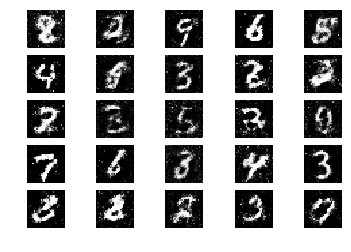

(32, 1) float64
(32, 1) float64.632065, acc.: 62.50%] [G loss: 0.965572]
(32, 1) float64.532510, acc.: 81.25%] [G loss: 0.998429]
(32, 1) float64.607122, acc.: 65.62%] [G loss: 1.047019]
(32, 1) float64.620155, acc.: 64.06%] [G loss: 0.943625]
(32, 1) float64.568444, acc.: 65.62%] [G loss: 1.033273]
(32, 1) float64.598969, acc.: 70.31%] [G loss: 0.999475]
(32, 1) float64.609882, acc.: 67.19%] [G loss: 0.984150]
(32, 1) float64.528902, acc.: 67.19%] [G loss: 1.101366]
(32, 1) float64.610469, acc.: 73.44%] [G loss: 1.117511]
(32, 1) float64.629106, acc.: 62.50%] [G loss: 1.045219]
(32, 1) float64.612457, acc.: 64.06%] [G loss: 0.955985]
(32, 1) float64.609011, acc.: 64.06%] [G loss: 1.096918]
(32, 1) float64.624593, acc.: 65.62%] [G loss: 1.002731]
(32, 1) float64.593196, acc.: 68.75%] [G loss: 1.070803]
(32, 1) float64.673262, acc.: 60.94%] [G loss: 1.075081]
(32, 1) float64.612470, acc.: 71.88%] [G loss: 1.109452]
(32, 1) float64.613913, acc.: 65.62%] [G loss: 1.030232]
(32, 1) float64

(32, 1) float64.536655, acc.: 78.12%] [G loss: 1.004781]
(32, 1) float64.567619, acc.: 73.44%] [G loss: 0.937445]
(32, 1) float64.541301, acc.: 76.56%] [G loss: 0.972128]
(32, 1) float64.547459, acc.: 73.44%] [G loss: 1.143535]
(32, 1) float64.692101, acc.: 56.25%] [G loss: 1.026178]
(32, 1) float64.611946, acc.: 64.06%] [G loss: 1.166381]
(32, 1) float64.647926, acc.: 59.38%] [G loss: 1.170616]
(32, 1) float64.539023, acc.: 75.00%] [G loss: 1.163908]
(32, 1) float64.657780, acc.: 68.75%] [G loss: 1.004896]
(32, 1) float64.579940, acc.: 71.88%] [G loss: 1.039541]
(32, 1) float64.663888, acc.: 62.50%] [G loss: 1.033579]
(32, 1) float64.589098, acc.: 67.19%] [G loss: 0.904710]
(32, 1) float64.604608, acc.: 70.31%] [G loss: 1.044388]
(32, 1) float64.642367, acc.: 70.31%] [G loss: 1.045678]
(32, 1) float64.562374, acc.: 70.31%] [G loss: 0.952948]
(32, 1) float64.654358, acc.: 60.94%] [G loss: 0.983550]
(32, 1) float64.546081, acc.: 68.75%] [G loss: 1.057336]
(32, 1) float64.575637, acc.: 7

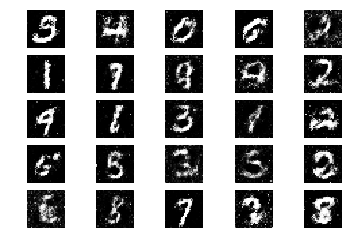

(32, 1) float64
(32, 1) float64.592643, acc.: 65.62%] [G loss: 1.117532]
(32, 1) float64.597870, acc.: 73.44%] [G loss: 1.044605]
(32, 1) float64.663449, acc.: 62.50%] [G loss: 1.114299]
(32, 1) float64.585332, acc.: 67.19%] [G loss: 0.976426]
(32, 1) float64.578490, acc.: 68.75%] [G loss: 1.080538]
(32, 1) float64.523124, acc.: 76.56%] [G loss: 1.063189]
(32, 1) float64.640291, acc.: 70.31%] [G loss: 1.080044]
(32, 1) float64.560069, acc.: 70.31%] [G loss: 1.044139]
(32, 1) float64.558890, acc.: 73.44%] [G loss: 1.111139]
(32, 1) float64.665382, acc.: 60.94%] [G loss: 1.051402]
(32, 1) float64.593167, acc.: 68.75%] [G loss: 1.027389]
(32, 1) float64.597738, acc.: 64.06%] [G loss: 1.094335]
(32, 1) float64.564816, acc.: 68.75%] [G loss: 1.106049]
(32, 1) float64.636778, acc.: 67.19%] [G loss: 1.081593]
(32, 1) float64.637371, acc.: 59.38%] [G loss: 1.086593]
(32, 1) float64.629162, acc.: 65.62%] [G loss: 1.075004]
(32, 1) float64.612134, acc.: 71.88%] [G loss: 1.135850]
(32, 1) float64

(32, 1) float64.573049, acc.: 71.88%] [G loss: 0.996016]
(32, 1) float64.677081, acc.: 54.69%] [G loss: 0.981489]
(32, 1) float64.578363, acc.: 71.88%] [G loss: 1.006946]
(32, 1) float64.523201, acc.: 81.25%] [G loss: 0.987598]
(32, 1) float64.663436, acc.: 59.38%] [G loss: 0.969609]
(32, 1) float64.587503, acc.: 68.75%] [G loss: 1.061577]
(32, 1) float64.591344, acc.: 65.62%] [G loss: 1.064163]
(32, 1) float64.600845, acc.: 65.62%] [G loss: 1.047636]
(32, 1) float64.602317, acc.: 67.19%] [G loss: 1.116284]
(32, 1) float64.691153, acc.: 51.56%] [G loss: 1.088254]
(32, 1) float64.594046, acc.: 71.88%] [G loss: 1.159543]
(32, 1) float64.621593, acc.: 70.31%] [G loss: 1.062211]
(32, 1) float64.614605, acc.: 64.06%] [G loss: 1.098921]
(32, 1) float64.578372, acc.: 70.31%] [G loss: 1.078169]
(32, 1) float64.672588, acc.: 59.38%] [G loss: 0.995664]
(32, 1) float64.669177, acc.: 62.50%] [G loss: 1.020303]
(32, 1) float64.612181, acc.: 67.19%] [G loss: 1.018646]
(32, 1) float64.600003, acc.: 7

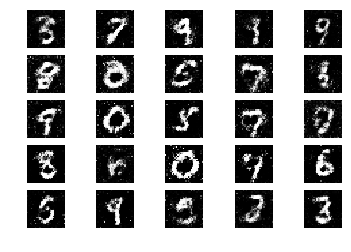

(32, 1) float64
(32, 1) float64.556767, acc.: 70.31%] [G loss: 1.103488]
(32, 1) float64.688733, acc.: 67.19%] [G loss: 1.014290]
(32, 1) float64.590470, acc.: 67.19%] [G loss: 1.041034]
(32, 1) float64.570191, acc.: 64.06%] [G loss: 1.104422]
(32, 1) float64.500192, acc.: 79.69%] [G loss: 1.021302]
(32, 1) float64.622727, acc.: 67.19%] [G loss: 1.104546]
(32, 1) float64.548822, acc.: 71.88%] [G loss: 1.127319]
(32, 1) float64.568657, acc.: 70.31%] [G loss: 1.039519]
(32, 1) float64.668420, acc.: 64.06%] [G loss: 1.136937]
(32, 1) float64.596354, acc.: 70.31%] [G loss: 1.026891]
(32, 1) float64.621006, acc.: 67.19%] [G loss: 0.989499]
(32, 1) float64.566837, acc.: 73.44%] [G loss: 0.979219]
(32, 1) float64.555937, acc.: 68.75%] [G loss: 0.904483]
(32, 1) float64.580712, acc.: 70.31%] [G loss: 0.984463]
(32, 1) float64.585980, acc.: 65.62%] [G loss: 0.940055]
(32, 1) float64.655903, acc.: 62.50%] [G loss: 0.965630]
(32, 1) float64.630198, acc.: 67.19%] [G loss: 0.948759]
(32, 1) float64

(32, 1) float64.601393, acc.: 64.06%] [G loss: 0.981931]
(32, 1) float64.668350, acc.: 53.12%] [G loss: 1.083423]
(32, 1) float64.561327, acc.: 71.88%] [G loss: 1.129287]
(32, 1) float64.650964, acc.: 59.38%] [G loss: 1.073724]
(32, 1) float64.710895, acc.: 53.12%] [G loss: 1.031250]
(32, 1) float64.656792, acc.: 62.50%] [G loss: 0.954776]
(32, 1) float64.624669, acc.: 59.38%] [G loss: 1.006629]
(32, 1) float64.666046, acc.: 57.81%] [G loss: 1.003076]
(32, 1) float64.594503, acc.: 67.19%] [G loss: 1.086176]
(32, 1) float64.626132, acc.: 60.94%] [G loss: 1.107636]
(32, 1) float64.716015, acc.: 56.25%] [G loss: 1.041831]
(32, 1) float64.544090, acc.: 76.56%] [G loss: 1.109267]
(32, 1) float64.557145, acc.: 70.31%] [G loss: 1.184398]
(32, 1) float64.499355, acc.: 76.56%] [G loss: 1.069163]
(32, 1) float64.709505, acc.: 51.56%] [G loss: 0.994656]
(32, 1) float64.639228, acc.: 64.06%] [G loss: 1.018893]
(32, 1) float64.661098, acc.: 65.62%] [G loss: 0.992471]
(32, 1) float64.565631, acc.: 7

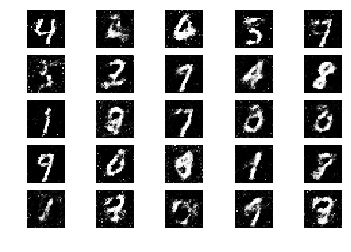

(32, 1) float64
(32, 1) float64.643549, acc.: 62.50%] [G loss: 0.977710]
(32, 1) float64.610712, acc.: 67.19%] [G loss: 1.021846]
(32, 1) float64.623765, acc.: 64.06%] [G loss: 1.022834]
(32, 1) float64.601557, acc.: 62.50%] [G loss: 1.011039]
(32, 1) float64.601711, acc.: 70.31%] [G loss: 0.923130]
(32, 1) float64.579274, acc.: 71.88%] [G loss: 0.895148]
(32, 1) float64.544251, acc.: 75.00%] [G loss: 1.036095]
(32, 1) float64.655008, acc.: 59.38%] [G loss: 1.059421]
(32, 1) float64.661094, acc.: 60.94%] [G loss: 0.960505]
(32, 1) float64.612384, acc.: 65.62%] [G loss: 0.956106]
(32, 1) float64.555886, acc.: 70.31%] [G loss: 1.071883]
(32, 1) float64.562179, acc.: 67.19%] [G loss: 0.985608]
(32, 1) float64.636657, acc.: 59.38%] [G loss: 0.976738]
(32, 1) float64.597930, acc.: 68.75%] [G loss: 0.880817]
(32, 1) float64.660869, acc.: 56.25%] [G loss: 0.964734]
(32, 1) float64.567924, acc.: 73.44%] [G loss: 1.021559]
(32, 1) float64.655225, acc.: 56.25%] [G loss: 0.962083]
(32, 1) float64

(32, 1) float64.659800, acc.: 59.38%] [G loss: 1.009184]
(32, 1) float64.563695, acc.: 68.75%] [G loss: 1.052169]
(32, 1) float64.626595, acc.: 68.75%] [G loss: 1.101999]
(32, 1) float64.574032, acc.: 70.31%] [G loss: 0.952698]
(32, 1) float64.602140, acc.: 64.06%] [G loss: 1.004716]
(32, 1) float64.637995, acc.: 65.62%] [G loss: 1.092422]
(32, 1) float64.606454, acc.: 64.06%] [G loss: 1.031030]
(32, 1) float64.555127, acc.: 75.00%] [G loss: 0.890071]
(32, 1) float64.576956, acc.: 67.19%] [G loss: 0.934340]
(32, 1) float64.576315, acc.: 67.19%] [G loss: 1.050042]
(32, 1) float64.708691, acc.: 50.00%] [G loss: 1.078600]
(32, 1) float64.570089, acc.: 71.88%] [G loss: 1.037966]
(32, 1) float64.616231, acc.: 70.31%] [G loss: 1.094270]
(32, 1) float64.526879, acc.: 73.44%] [G loss: 1.178422]
(32, 1) float64.634688, acc.: 64.06%] [G loss: 1.110225]
(32, 1) float64.625714, acc.: 70.31%] [G loss: 0.950568]
(32, 1) float64.594014, acc.: 71.88%] [G loss: 0.990748]
(32, 1) float64.616606, acc.: 5

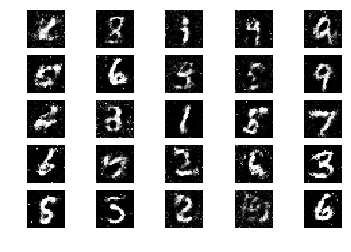

(32, 1) float64
(32, 1) float64.602655, acc.: 75.00%] [G loss: 1.042107]
(32, 1) float64.514852, acc.: 78.12%] [G loss: 1.074591]
(32, 1) float64.586940, acc.: 78.12%] [G loss: 1.022805]
(32, 1) float64.563304, acc.: 68.75%] [G loss: 0.912969]
(32, 1) float64.642316, acc.: 60.94%] [G loss: 1.038177]
(32, 1) float64.677599, acc.: 56.25%] [G loss: 0.932106]
(32, 1) float64.627463, acc.: 60.94%] [G loss: 1.065601]
(32, 1) float64.502126, acc.: 73.44%] [G loss: 1.028650]
(32, 1) float64.616993, acc.: 60.94%] [G loss: 1.054390]
(32, 1) float64.546831, acc.: 73.44%] [G loss: 1.048038]
(32, 1) float64.651172, acc.: 64.06%] [G loss: 1.041065]
(32, 1) float64.591925, acc.: 65.62%] [G loss: 1.130952]
(32, 1) float64.672035, acc.: 67.19%] [G loss: 0.990741]
(32, 1) float64.622185, acc.: 60.94%] [G loss: 1.078050]
(32, 1) float64.575350, acc.: 68.75%] [G loss: 0.924413]
(32, 1) float64.599466, acc.: 62.50%] [G loss: 1.021076]
(32, 1) float64.600277, acc.: 71.88%] [G loss: 1.032331]
(32, 1) float64

(32, 1) float64.616918, acc.: 65.62%] [G loss: 1.089888]
(32, 1) float64.538529, acc.: 71.88%] [G loss: 1.014108]
(32, 1) float64.624888, acc.: 64.06%] [G loss: 1.012321]
(32, 1) float64.547157, acc.: 70.31%] [G loss: 0.954994]
(32, 1) float64.562492, acc.: 70.31%] [G loss: 1.049397]
(32, 1) float64.675462, acc.: 60.94%] [G loss: 0.979009]
(32, 1) float64.600569, acc.: 68.75%] [G loss: 0.964486]
(32, 1) float64.676938, acc.: 64.06%] [G loss: 0.967712]
(32, 1) float64.684837, acc.: 53.12%] [G loss: 0.995902]
(32, 1) float64.661305, acc.: 67.19%] [G loss: 0.927557]
(32, 1) float64.541815, acc.: 76.56%] [G loss: 0.991139]
(32, 1) float64.598424, acc.: 70.31%] [G loss: 1.130789]
(32, 1) float64.596593, acc.: 71.88%] [G loss: 0.917902]
(32, 1) float64.619806, acc.: 65.62%] [G loss: 1.108867]
(32, 1) float64.585244, acc.: 68.75%] [G loss: 1.115814]
(32, 1) float64.573162, acc.: 65.62%] [G loss: 1.050202]
(32, 1) float64.677713, acc.: 62.50%] [G loss: 1.051921]
(32, 1) float64.686558, acc.: 5

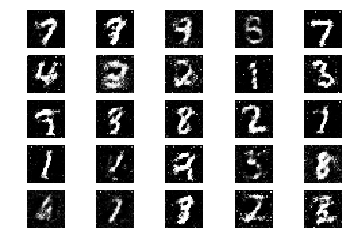

(32, 1) float64
(32, 1) float64.571223, acc.: 75.00%] [G loss: 1.021876]
(32, 1) float64.628625, acc.: 65.62%] [G loss: 1.136922]
(32, 1) float64.652651, acc.: 62.50%] [G loss: 0.982751]
(32, 1) float64.528790, acc.: 78.12%] [G loss: 0.975496]
(32, 1) float64.598921, acc.: 68.75%] [G loss: 0.936667]
(32, 1) float64.611041, acc.: 68.75%] [G loss: 1.026563]
(32, 1) float64.567208, acc.: 73.44%] [G loss: 0.955493]
(32, 1) float64.561196, acc.: 79.69%] [G loss: 0.978716]
(32, 1) float64.692229, acc.: 57.81%] [G loss: 0.873035]
(32, 1) float64.566541, acc.: 75.00%] [G loss: 0.936512]
(32, 1) float64.604226, acc.: 62.50%] [G loss: 1.022843]
(32, 1) float64.655297, acc.: 59.38%] [G loss: 1.032415]
(32, 1) float64.595372, acc.: 70.31%] [G loss: 1.003660]
(32, 1) float64.623305, acc.: 65.62%] [G loss: 1.008171]
(32, 1) float64.601775, acc.: 68.75%] [G loss: 0.975212]
(32, 1) float64.678811, acc.: 65.62%] [G loss: 1.006322]
(32, 1) float64.690613, acc.: 59.38%] [G loss: 0.974297]
(32, 1) float64

(32, 1) float64.555478, acc.: 70.31%] [G loss: 1.168730]
(32, 1) float64.624165, acc.: 67.19%] [G loss: 1.066301]
(32, 1) float64.634296, acc.: 67.19%] [G loss: 1.075143]
(32, 1) float64.584706, acc.: 71.88%] [G loss: 1.066380]
(32, 1) float64.499142, acc.: 84.38%] [G loss: 1.079939]
(32, 1) float64.645889, acc.: 67.19%] [G loss: 0.996469]
(32, 1) float64.583528, acc.: 68.75%] [G loss: 0.946677]
(32, 1) float64.735293, acc.: 54.69%] [G loss: 1.078941]
(32, 1) float64.678404, acc.: 57.81%] [G loss: 1.132321]
(32, 1) float64.634581, acc.: 65.62%] [G loss: 0.948498]
(32, 1) float64.597407, acc.: 68.75%] [G loss: 0.960449]
(32, 1) float64.604844, acc.: 70.31%] [G loss: 1.055827]
(32, 1) float64.631814, acc.: 60.94%] [G loss: 1.108116]
(32, 1) float64.646005, acc.: 64.06%] [G loss: 1.008712]
(32, 1) float64.614273, acc.: 68.75%] [G loss: 1.111809]
(32, 1) float64.678133, acc.: 54.69%] [G loss: 1.090198]
(32, 1) float64.716240, acc.: 60.94%] [G loss: 1.039325]
(32, 1) float64.637074, acc.: 6

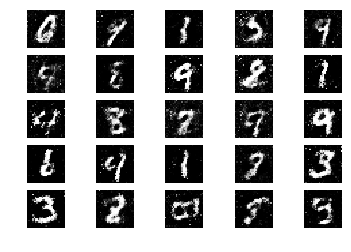

(32, 1) float64
(32, 1) float64.550633, acc.: 75.00%] [G loss: 1.095310]
(32, 1) float64.595652, acc.: 75.00%] [G loss: 1.152698]
(32, 1) float64.728139, acc.: 56.25%] [G loss: 0.991069]
(32, 1) float64.627661, acc.: 64.06%] [G loss: 0.913880]
(32, 1) float64.571938, acc.: 75.00%] [G loss: 1.047737]
(32, 1) float64.632193, acc.: 64.06%] [G loss: 1.024502]
(32, 1) float64.609859, acc.: 60.94%] [G loss: 0.970595]
(32, 1) float64.681476, acc.: 57.81%] [G loss: 1.020079]
(32, 1) float64.613391, acc.: 68.75%] [G loss: 1.045182]
(32, 1) float64.643857, acc.: 60.94%] [G loss: 0.978905]
(32, 1) float64.574558, acc.: 76.56%] [G loss: 1.089630]
(32, 1) float64.533673, acc.: 75.00%] [G loss: 1.003170]
(32, 1) float64.595303, acc.: 67.19%] [G loss: 0.921627]
(32, 1) float64.651936, acc.: 67.19%] [G loss: 0.891049]
(32, 1) float64.607826, acc.: 67.19%] [G loss: 1.058590]
(32, 1) float64.575298, acc.: 75.00%] [G loss: 1.070236]
(32, 1) float64.575339, acc.: 71.88%] [G loss: 0.953923]
(32, 1) float64

(32, 1) float64.765831, acc.: 50.00%] [G loss: 0.981934]
(32, 1) float64.597903, acc.: 70.31%] [G loss: 1.023547]
(32, 1) float64.546320, acc.: 76.56%] [G loss: 1.051747]
(32, 1) float64.708650, acc.: 56.25%] [G loss: 0.963159]
(32, 1) float64.500915, acc.: 81.25%] [G loss: 1.064110]
(32, 1) float64.597372, acc.: 65.62%] [G loss: 1.038107]
(32, 1) float64.579524, acc.: 68.75%] [G loss: 1.084752]
(32, 1) float64.671323, acc.: 64.06%] [G loss: 1.063581]
(32, 1) float64.638258, acc.: 59.38%] [G loss: 1.026705]
(32, 1) float64.612058, acc.: 68.75%] [G loss: 0.924659]
(32, 1) float64.585958, acc.: 68.75%] [G loss: 0.983342]
(32, 1) float64.556160, acc.: 73.44%] [G loss: 0.928004]
(32, 1) float64.655534, acc.: 65.62%] [G loss: 0.893550]
(32, 1) float64.594311, acc.: 62.50%] [G loss: 0.913358]
(32, 1) float64.492154, acc.: 79.69%] [G loss: 1.148563]
(32, 1) float64.770321, acc.: 45.31%] [G loss: 0.991356]
(32, 1) float64.681322, acc.: 59.38%] [G loss: 0.978778]
(32, 1) float64.616624, acc.: 6

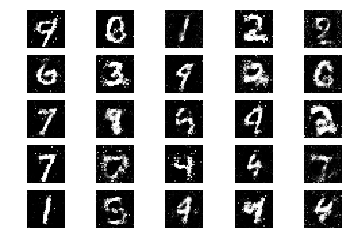

(32, 1) float64
(32, 1) float64.623242, acc.: 65.62%] [G loss: 0.967754]
(32, 1) float64.633008, acc.: 64.06%] [G loss: 1.115184]
(32, 1) float64.681358, acc.: 60.94%] [G loss: 1.005646]
(32, 1) float64.674765, acc.: 59.38%] [G loss: 1.072178]
(32, 1) float64.638174, acc.: 57.81%] [G loss: 1.109670]
(32, 1) float64.595351, acc.: 70.31%] [G loss: 1.053483]
(32, 1) float64.638566, acc.: 56.25%] [G loss: 1.154576]
(32, 1) float64.594961, acc.: 67.19%] [G loss: 1.068462]
(32, 1) float64.605724, acc.: 70.31%] [G loss: 1.022848]
(32, 1) float64.637807, acc.: 59.38%] [G loss: 0.963743]
(32, 1) float64.574164, acc.: 68.75%] [G loss: 1.073897]
(32, 1) float64.695446, acc.: 59.38%] [G loss: 1.035808]
(32, 1) float64.631830, acc.: 64.06%] [G loss: 0.968072]
(32, 1) float64.601867, acc.: 71.88%] [G loss: 0.948898]
(32, 1) float64.669902, acc.: 67.19%] [G loss: 0.960295]
(32, 1) float64.562416, acc.: 75.00%] [G loss: 1.062252]
(32, 1) float64.648641, acc.: 65.62%] [G loss: 1.031080]
(32, 1) float64

(32, 1) float64.698865, acc.: 54.69%] [G loss: 0.839830]
(32, 1) float64.551973, acc.: 79.69%] [G loss: 1.009193]
(32, 1) float64.625739, acc.: 71.88%] [G loss: 1.029794]
(32, 1) float64.675144, acc.: 60.94%] [G loss: 1.019353]
(32, 1) float64.687674, acc.: 59.38%] [G loss: 1.019274]
(32, 1) float64.680218, acc.: 51.56%] [G loss: 0.998335]
(32, 1) float64.673465, acc.: 59.38%] [G loss: 1.003447]
(32, 1) float64.658124, acc.: 57.81%] [G loss: 0.983655]
(32, 1) float64.603567, acc.: 70.31%] [G loss: 0.931106]
(32, 1) float64.629732, acc.: 68.75%] [G loss: 1.101864]
(32, 1) float64.618167, acc.: 67.19%] [G loss: 1.096047]
(32, 1) float64.668468, acc.: 64.06%] [G loss: 1.010358]
(32, 1) float64.747482, acc.: 51.56%] [G loss: 1.012921]
(32, 1) float64.638622, acc.: 64.06%] [G loss: 1.022834]
(32, 1) float64.674024, acc.: 60.94%] [G loss: 1.001644]
(32, 1) float64.508797, acc.: 76.56%] [G loss: 0.974244]
(32, 1) float64.592203, acc.: 75.00%] [G loss: 1.060048]
(32, 1) float64.634555, acc.: 6

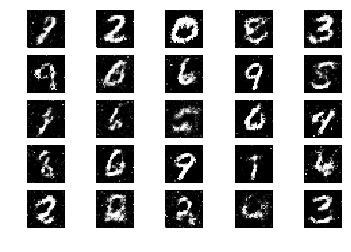

(32, 1) float64
(32, 1) float64.553177, acc.: 71.88%] [G loss: 1.096631]
(32, 1) float64.591240, acc.: 67.19%] [G loss: 1.043765]
(32, 1) float64.626911, acc.: 65.62%] [G loss: 0.981811]
(32, 1) float64.587205, acc.: 67.19%] [G loss: 1.061998]
(32, 1) float64.615340, acc.: 64.06%] [G loss: 1.014429]
(32, 1) float64.576187, acc.: 75.00%] [G loss: 1.150345]
(32, 1) float64.588140, acc.: 73.44%] [G loss: 0.921755]
(32, 1) float64.723492, acc.: 56.25%] [G loss: 0.956738]
(32, 1) float64.637627, acc.: 60.94%] [G loss: 1.021654]
(32, 1) float64.652897, acc.: 64.06%] [G loss: 1.083174]
(32, 1) float64.615226, acc.: 76.56%] [G loss: 0.973995]
(32, 1) float64.570910, acc.: 68.75%] [G loss: 0.983480]
(32, 1) float64.662138, acc.: 62.50%] [G loss: 1.033986]
(32, 1) float64.690149, acc.: 50.00%] [G loss: 1.010064]
(32, 1) float64.598407, acc.: 67.19%] [G loss: 0.999561]
(32, 1) float64.620477, acc.: 60.94%] [G loss: 0.977550]
(32, 1) float64.585905, acc.: 71.88%] [G loss: 0.988954]
(32, 1) float64

(32, 1) float64.630499, acc.: 65.62%] [G loss: 1.042241]
(32, 1) float64.652298, acc.: 64.06%] [G loss: 0.900343]
(32, 1) float64.666200, acc.: 59.38%] [G loss: 1.180855]
(32, 1) float64.596897, acc.: 64.06%] [G loss: 1.010885]
(32, 1) float64.644477, acc.: 60.94%] [G loss: 1.124669]
(32, 1) float64.578400, acc.: 75.00%] [G loss: 1.035685]
(32, 1) float64.667169, acc.: 64.06%] [G loss: 1.088387]
(32, 1) float64.639429, acc.: 59.38%] [G loss: 0.982108]
(32, 1) float64.646913, acc.: 62.50%] [G loss: 0.994885]
(32, 1) float64.625242, acc.: 65.62%] [G loss: 1.132954]
(32, 1) float64.570668, acc.: 78.12%] [G loss: 1.051868]
(32, 1) float64.672488, acc.: 62.50%] [G loss: 0.997040]
(32, 1) float64.595564, acc.: 70.31%] [G loss: 0.952345]
(32, 1) float64.577946, acc.: 70.31%] [G loss: 0.886741]
(32, 1) float64.578995, acc.: 65.62%] [G loss: 1.016454]
(32, 1) float64.575200, acc.: 73.44%] [G loss: 0.965891]
(32, 1) float64.590900, acc.: 68.75%] [G loss: 1.022855]
(32, 1) float64.605928, acc.: 6

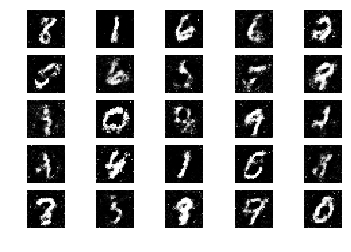

(32, 1) float64
(32, 1) float64.563698, acc.: 71.88%] [G loss: 1.023933]
(32, 1) float64.661811, acc.: 54.69%] [G loss: 1.019471]
(32, 1) float64.647057, acc.: 68.75%] [G loss: 0.998114]
(32, 1) float64.569015, acc.: 71.88%] [G loss: 0.996824]
(32, 1) float64.584743, acc.: 65.62%] [G loss: 0.928445]
(32, 1) float64.609304, acc.: 67.19%] [G loss: 0.945918]
(32, 1) float64.708410, acc.: 59.38%] [G loss: 1.032406]
(32, 1) float64.580789, acc.: 68.75%] [G loss: 1.063256]
(32, 1) float64.610731, acc.: 68.75%] [G loss: 1.076245]
(32, 1) float64.661340, acc.: 59.38%] [G loss: 1.043685]
(32, 1) float64.628325, acc.: 65.62%] [G loss: 0.954956]
(32, 1) float64.628807, acc.: 56.25%] [G loss: 1.123661]
(32, 1) float64.541124, acc.: 71.88%] [G loss: 1.068820]
(32, 1) float64.545675, acc.: 75.00%] [G loss: 1.088903]
(32, 1) float64.492039, acc.: 78.12%] [G loss: 1.086083]
(32, 1) float64.669356, acc.: 62.50%] [G loss: 1.006197]
(32, 1) float64.745810, acc.: 53.12%] [G loss: 1.021159]
(32, 1) float64

(32, 1) float64.619830, acc.: 62.50%] [G loss: 1.026467]
(32, 1) float64.620825, acc.: 64.06%] [G loss: 1.004869]
(32, 1) float64.594777, acc.: 73.44%] [G loss: 1.071638]
(32, 1) float64.658772, acc.: 56.25%] [G loss: 1.079595]
(32, 1) float64.662427, acc.: 62.50%] [G loss: 1.118000]
(32, 1) float64.590718, acc.: 60.94%] [G loss: 0.921059]
(32, 1) float64.616568, acc.: 64.06%] [G loss: 0.991731]
(32, 1) float64.680162, acc.: 64.06%] [G loss: 1.019939]
(32, 1) float64.612094, acc.: 68.75%] [G loss: 1.079330]
(32, 1) float64.648121, acc.: 59.38%] [G loss: 0.945370]
(32, 1) float64.644959, acc.: 60.94%] [G loss: 0.986377]
(32, 1) float64.677914, acc.: 65.62%] [G loss: 0.994684]
(32, 1) float64.656165, acc.: 64.06%] [G loss: 0.840132]
(32, 1) float64.644934, acc.: 65.62%] [G loss: 1.048772]
(32, 1) float64.657300, acc.: 54.69%] [G loss: 0.922841]
(32, 1) float64.529626, acc.: 76.56%] [G loss: 1.026474]
(32, 1) float64.623333, acc.: 70.31%] [G loss: 1.092112]
(32, 1) float64.584218, acc.: 7

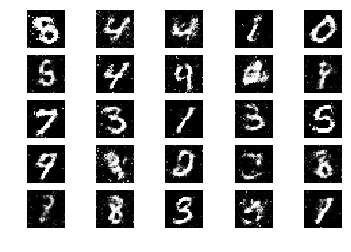

(32, 1) float64
(32, 1) float64.667004, acc.: 51.56%] [G loss: 0.988526]
(32, 1) float64.637489, acc.: 57.81%] [G loss: 0.995614]
(32, 1) float64.555927, acc.: 68.75%] [G loss: 1.040888]
(32, 1) float64.576486, acc.: 73.44%] [G loss: 0.914883]
(32, 1) float64.673472, acc.: 62.50%] [G loss: 0.941094]
(32, 1) float64.545179, acc.: 70.31%] [G loss: 0.883078]
(32, 1) float64.590388, acc.: 68.75%] [G loss: 0.999770]
(32, 1) float64.633516, acc.: 65.62%] [G loss: 1.070314]
(32, 1) float64.652372, acc.: 57.81%] [G loss: 1.063891]
(32, 1) float64.627738, acc.: 65.62%] [G loss: 0.984254]
(32, 1) float64.709912, acc.: 54.69%] [G loss: 0.972455]
(32, 1) float64.556562, acc.: 75.00%] [G loss: 0.980919]
(32, 1) float64.653834, acc.: 65.62%] [G loss: 0.967183]
(32, 1) float64.662732, acc.: 54.69%] [G loss: 0.968049]
(32, 1) float64.679843, acc.: 57.81%] [G loss: 0.983184]
(32, 1) float64.595701, acc.: 65.62%] [G loss: 0.980720]
(32, 1) float64.653705, acc.: 62.50%] [G loss: 0.928017]
(32, 1) float64

(32, 1) float64.624778, acc.: 64.06%] [G loss: 1.044194]
(32, 1) float64.689043, acc.: 53.12%] [G loss: 1.002672]
(32, 1) float64.597200, acc.: 76.56%] [G loss: 1.021788]
(32, 1) float64.640564, acc.: 68.75%] [G loss: 1.041498]
(32, 1) float64.612948, acc.: 70.31%] [G loss: 0.944076]
(32, 1) float64.634426, acc.: 59.38%] [G loss: 0.889717]
(32, 1) float64.587916, acc.: 65.62%] [G loss: 0.873026]
(32, 1) float64.672363, acc.: 62.50%] [G loss: 0.876110]
(32, 1) float64.587134, acc.: 65.62%] [G loss: 0.926622]
(32, 1) float64.599729, acc.: 65.62%] [G loss: 0.886972]
(32, 1) float64.544492, acc.: 75.00%] [G loss: 0.975429]
(32, 1) float64.497946, acc.: 76.56%] [G loss: 0.962701]
(32, 1) float64.649422, acc.: 57.81%] [G loss: 0.947705]
(32, 1) float64.675933, acc.: 54.69%] [G loss: 1.134207]
(32, 1) float64.576349, acc.: 68.75%] [G loss: 0.991823]
(32, 1) float64.628129, acc.: 59.38%] [G loss: 1.072708]
(32, 1) float64.649735, acc.: 60.94%] [G loss: 1.047046]
(32, 1) float64.624670, acc.: 5

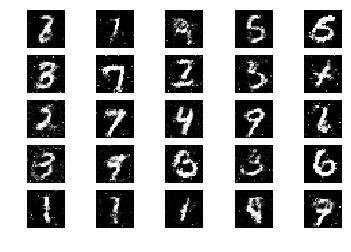

(32, 1) float64
(32, 1) float64.606836, acc.: 64.06%] [G loss: 1.060561]
(32, 1) float64.599286, acc.: 67.19%] [G loss: 1.107741]
(32, 1) float64.644112, acc.: 62.50%] [G loss: 1.017430]
(32, 1) float64.635947, acc.: 64.06%] [G loss: 1.031673]
(32, 1) float64.648565, acc.: 65.62%] [G loss: 0.952729]
(32, 1) float64.683629, acc.: 57.81%] [G loss: 1.068890]
(32, 1) float64.569422, acc.: 71.88%] [G loss: 1.064872]
(32, 1) float64.581048, acc.: 71.88%] [G loss: 0.982874]
(32, 1) float64.641429, acc.: 62.50%] [G loss: 0.921170]
(32, 1) float64.565368, acc.: 71.88%] [G loss: 0.933456]
(32, 1) float64.699484, acc.: 54.69%] [G loss: 1.112593]
(32, 1) float64.618964, acc.: 68.75%] [G loss: 1.162002]
(32, 1) float64.653955, acc.: 65.62%] [G loss: 1.184345]
(32, 1) float64.651858, acc.: 64.06%] [G loss: 1.017962]
(32, 1) float64.627037, acc.: 64.06%] [G loss: 0.973208]
(32, 1) float64.662938, acc.: 62.50%] [G loss: 0.965723]
(32, 1) float64.628210, acc.: 59.38%] [G loss: 0.967054]
(32, 1) float64

(32, 1) float64.631740, acc.: 62.50%] [G loss: 1.017037]
(32, 1) float64.566808, acc.: 68.75%] [G loss: 0.999029]
(32, 1) float64.633838, acc.: 57.81%] [G loss: 1.060625]
(32, 1) float64.611236, acc.: 68.75%] [G loss: 0.974063]
(32, 1) float64.693101, acc.: 67.19%] [G loss: 0.915073]
(32, 1) float64.608345, acc.: 68.75%] [G loss: 1.034549]
(32, 1) float64.661101, acc.: 54.69%] [G loss: 1.014572]
(32, 1) float64.613479, acc.: 70.31%] [G loss: 1.094924]
(32, 1) float64.692995, acc.: 56.25%] [G loss: 0.986003]
(32, 1) float64.636040, acc.: 60.94%] [G loss: 0.991078]
(32, 1) float64.614178, acc.: 65.62%] [G loss: 0.970474]
(32, 1) float64.602545, acc.: 71.88%] [G loss: 0.917136]
(32, 1) float64.648340, acc.: 60.94%] [G loss: 0.948129]
(32, 1) float64.639678, acc.: 62.50%] [G loss: 1.025040]
(32, 1) float64.622813, acc.: 60.94%] [G loss: 0.900017]
(32, 1) float64.570906, acc.: 70.31%] [G loss: 0.976626]
(32, 1) float64.627885, acc.: 62.50%] [G loss: 0.907396]
(32, 1) float64.604964, acc.: 5

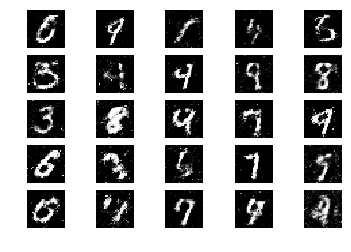

(32, 1) float64
(32, 1) float64.622088, acc.: 60.94%] [G loss: 0.952087]
(32, 1) float64.625376, acc.: 64.06%] [G loss: 1.079203]
(32, 1) float64.552899, acc.: 71.88%] [G loss: 1.012774]
(32, 1) float64.668731, acc.: 59.38%] [G loss: 1.063135]
(32, 1) float64.601670, acc.: 71.88%] [G loss: 1.080861]
(32, 1) float64.667563, acc.: 59.38%] [G loss: 0.954826]
(32, 1) float64.670766, acc.: 54.69%] [G loss: 0.938188]
(32, 1) float64.651540, acc.: 64.06%] [G loss: 0.840368]
(32, 1) float64.659719, acc.: 54.69%] [G loss: 0.958361]
(32, 1) float64.644352, acc.: 62.50%] [G loss: 1.003695]
(32, 1) float64.614782, acc.: 68.75%] [G loss: 0.958269]
(32, 1) float64.552645, acc.: 76.56%] [G loss: 0.992230]
(32, 1) float64.723005, acc.: 54.69%] [G loss: 0.920120]
(32, 1) float64.654009, acc.: 57.81%] [G loss: 1.165960]
(32, 1) float64.566762, acc.: 73.44%] [G loss: 0.992774]
(32, 1) float64.651447, acc.: 62.50%] [G loss: 0.998410]
(32, 1) float64.760509, acc.: 48.44%] [G loss: 0.953433]
(32, 1) float64

(32, 1) float64.611409, acc.: 65.62%] [G loss: 1.017112]
(32, 1) float64.659758, acc.: 62.50%] [G loss: 1.017379]
(32, 1) float64.669134, acc.: 54.69%] [G loss: 0.984521]
(32, 1) float64.616553, acc.: 67.19%] [G loss: 1.079988]
(32, 1) float64.611370, acc.: 68.75%] [G loss: 1.018958]
(32, 1) float64.659678, acc.: 64.06%] [G loss: 1.068097]
(32, 1) float64.631897, acc.: 64.06%] [G loss: 0.927265]
(32, 1) float64.586575, acc.: 71.88%] [G loss: 1.060761]
(32, 1) float64.596811, acc.: 64.06%] [G loss: 1.041746]
(32, 1) float64.580913, acc.: 71.88%] [G loss: 1.013273]
(32, 1) float64.553728, acc.: 73.44%] [G loss: 1.100909]
(32, 1) float64.575103, acc.: 67.19%] [G loss: 1.164831]
(32, 1) float64.612526, acc.: 65.62%] [G loss: 0.974963]
(32, 1) float64.630332, acc.: 68.75%] [G loss: 1.065591]
(32, 1) float64.633836, acc.: 68.75%] [G loss: 0.930687]
(32, 1) float64.712134, acc.: 60.94%] [G loss: 0.942690]
(32, 1) float64.532514, acc.: 82.81%] [G loss: 0.961759]
(32, 1) float64.611095, acc.: 6

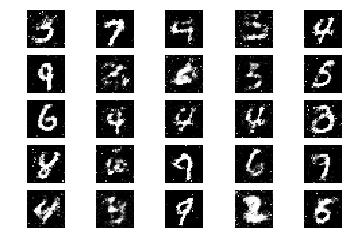

(32, 1) float64
(32, 1) float64.600450, acc.: 68.75%] [G loss: 0.924648]
(32, 1) float64.700272, acc.: 64.06%] [G loss: 0.922561]
(32, 1) float64.608839, acc.: 67.19%] [G loss: 1.002942]
(32, 1) float64.564500, acc.: 73.44%] [G loss: 0.995735]
(32, 1) float64.609737, acc.: 70.31%] [G loss: 0.950709]
(32, 1) float64.603702, acc.: 62.50%] [G loss: 1.045552]
(32, 1) float64.569125, acc.: 65.62%] [G loss: 1.043663]
(32, 1) float64.611144, acc.: 65.62%] [G loss: 1.000441]
(32, 1) float64.530401, acc.: 73.44%] [G loss: 0.964051]
(32, 1) float64.599364, acc.: 67.19%] [G loss: 0.986593]
(32, 1) float64.688974, acc.: 56.25%] [G loss: 0.958201]
(32, 1) float64.635382, acc.: 64.06%] [G loss: 0.988253]
(32, 1) float64.616574, acc.: 65.62%] [G loss: 0.953955]
(32, 1) float64.648555, acc.: 59.38%] [G loss: 1.028843]
(32, 1) float64.580653, acc.: 75.00%] [G loss: 1.079411]
(32, 1) float64.621324, acc.: 60.94%] [G loss: 1.058160]
(32, 1) float64.651832, acc.: 60.94%] [G loss: 1.002266]
(32, 1) float64

(32, 1) float64.695479, acc.: 62.50%] [G loss: 1.081338]
(32, 1) float64.634914, acc.: 62.50%] [G loss: 1.061618]
(32, 1) float64.706676, acc.: 56.25%] [G loss: 0.990446]
(32, 1) float64.555286, acc.: 76.56%] [G loss: 1.018863]
(32, 1) float64.665128, acc.: 57.81%] [G loss: 1.006385]
(32, 1) float64.647156, acc.: 60.94%] [G loss: 1.000287]
(32, 1) float64.661930, acc.: 59.38%] [G loss: 0.993182]
(32, 1) float64.603863, acc.: 65.62%] [G loss: 1.002153]
(32, 1) float64.696395, acc.: 56.25%] [G loss: 0.968371]
(32, 1) float64.617976, acc.: 67.19%] [G loss: 1.044014]
(32, 1) float64.646868, acc.: 65.62%] [G loss: 0.963196]
(32, 1) float64.634756, acc.: 62.50%] [G loss: 0.979330]
(32, 1) float64.613528, acc.: 62.50%] [G loss: 0.938244]
(32, 1) float64.662651, acc.: 53.12%] [G loss: 1.026749]
(32, 1) float64.646598, acc.: 59.38%] [G loss: 1.135308]
(32, 1) float64.619125, acc.: 65.62%] [G loss: 1.133624]
(32, 1) float64.656615, acc.: 57.81%] [G loss: 0.937954]
(32, 1) float64.568505, acc.: 7

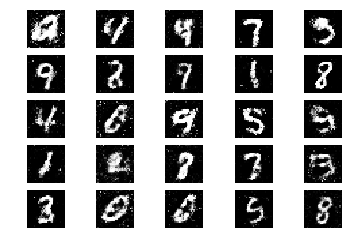

(32, 1) float64
(32, 1) float64.628022, acc.: 68.75%] [G loss: 1.025699]
(32, 1) float64.719861, acc.: 53.12%] [G loss: 0.859044]
(32, 1) float64.628359, acc.: 65.62%] [G loss: 0.842732]
(32, 1) float64.629276, acc.: 67.19%] [G loss: 0.841613]
(32, 1) float64.662038, acc.: 68.75%] [G loss: 1.010831]
(32, 1) float64.614297, acc.: 67.19%] [G loss: 0.983723]
(32, 1) float64.614588, acc.: 65.62%] [G loss: 0.840536]
(32, 1) float64.628725, acc.: 60.94%] [G loss: 0.889528]
(32, 1) float64.567442, acc.: 70.31%] [G loss: 0.948699]
(32, 1) float64.639527, acc.: 64.06%] [G loss: 1.018356]
(32, 1) float64.594865, acc.: 64.06%] [G loss: 1.002898]
(32, 1) float64.692015, acc.: 57.81%] [G loss: 0.899356]
(32, 1) float64.629486, acc.: 60.94%] [G loss: 1.008699]
(32, 1) float64.661553, acc.: 60.94%] [G loss: 0.796100]
(32, 1) float64.688390, acc.: 62.50%] [G loss: 0.928070]
(32, 1) float64.640838, acc.: 65.62%] [G loss: 1.072957]
(32, 1) float64.605867, acc.: 68.75%] [G loss: 1.038187]
(32, 1) float64

(32, 1) float64.606891, acc.: 65.62%] [G loss: 1.084331]
(32, 1) float64.660436, acc.: 60.94%] [G loss: 0.998720]
(32, 1) float64.678157, acc.: 53.12%] [G loss: 0.921389]
(32, 1) float64.591952, acc.: 67.19%] [G loss: 0.957510]
(32, 1) float64.637839, acc.: 64.06%] [G loss: 0.882190]
(32, 1) float64.621547, acc.: 68.75%] [G loss: 0.998263]
(32, 1) float64.650182, acc.: 60.94%] [G loss: 0.974424]
(32, 1) float64.589724, acc.: 71.88%] [G loss: 0.993040]
(32, 1) float64.649407, acc.: 54.69%] [G loss: 1.065780]
(32, 1) float64.571787, acc.: 65.62%] [G loss: 1.058990]
(32, 1) float64.663330, acc.: 62.50%] [G loss: 0.996489]
(32, 1) float64.608109, acc.: 71.88%] [G loss: 0.983286]
(32, 1) float64.668246, acc.: 60.94%] [G loss: 0.890312]
(32, 1) float64.635782, acc.: 62.50%] [G loss: 0.886197]
(32, 1) float64.675729, acc.: 56.25%] [G loss: 1.029584]
(32, 1) float64.563694, acc.: 70.31%] [G loss: 1.011219]
(32, 1) float64.587731, acc.: 68.75%] [G loss: 1.113877]
(32, 1) float64.672274, acc.: 6

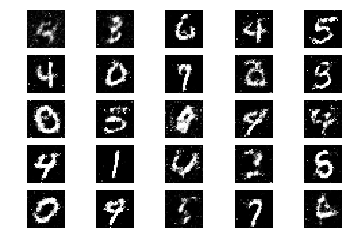

(32, 1) float64
(32, 1) float64.643501, acc.: 71.88%] [G loss: 1.081475]
(32, 1) float64.657287, acc.: 73.44%] [G loss: 1.076413]
(32, 1) float64.662573, acc.: 60.94%] [G loss: 1.037495]
(32, 1) float64.608090, acc.: 65.62%] [G loss: 1.125018]
(32, 1) float64.600058, acc.: 68.75%] [G loss: 0.977019]
(32, 1) float64.558068, acc.: 71.88%] [G loss: 1.064133]
(32, 1) float64.684016, acc.: 57.81%] [G loss: 0.999643]
(32, 1) float64.659656, acc.: 62.50%] [G loss: 0.966681]
(32, 1) float64.643422, acc.: 60.94%] [G loss: 0.929435]
(32, 1) float64.569975, acc.: 70.31%] [G loss: 0.847742]
(32, 1) float64.688749, acc.: 53.12%] [G loss: 0.978229]
(32, 1) float64.636661, acc.: 62.50%] [G loss: 0.964825]
(32, 1) float64.704897, acc.: 48.44%] [G loss: 1.085710]
(32, 1) float64.640654, acc.: 62.50%] [G loss: 1.091265]
(32, 1) float64.658182, acc.: 56.25%] [G loss: 0.974572]
(32, 1) float64.583929, acc.: 71.88%] [G loss: 0.906706]
(32, 1) float64.655989, acc.: 57.81%] [G loss: 1.033409]
(32, 1) float64

(32, 1) float64.619268, acc.: 59.38%] [G loss: 0.950680]
(32, 1) float64.598419, acc.: 65.62%] [G loss: 0.951488]
(32, 1) float64.705511, acc.: 50.00%] [G loss: 0.910807]
(32, 1) float64.625062, acc.: 56.25%] [G loss: 1.144527]
(32, 1) float64.617543, acc.: 62.50%] [G loss: 0.895383]
(32, 1) float64.635568, acc.: 62.50%] [G loss: 0.892942]
(32, 1) float64.655974, acc.: 64.06%] [G loss: 0.932325]
(32, 1) float64.796391, acc.: 43.75%] [G loss: 0.902841]
(32, 1) float64.623777, acc.: 64.06%] [G loss: 1.029117]
(32, 1) float64.630689, acc.: 67.19%] [G loss: 1.048926]
(32, 1) float64.682252, acc.: 53.12%] [G loss: 0.951003]
(32, 1) float64.591264, acc.: 67.19%] [G loss: 0.977249]
(32, 1) float64.653720, acc.: 53.12%] [G loss: 0.915313]
(32, 1) float64.580712, acc.: 68.75%] [G loss: 0.985219]
(32, 1) float64.658867, acc.: 56.25%] [G loss: 0.968988]
(32, 1) float64.642434, acc.: 62.50%] [G loss: 0.859426]
(32, 1) float64.597081, acc.: 70.31%] [G loss: 0.960819]
(32, 1) float64.604103, acc.: 6

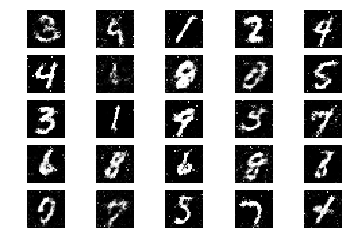

(32, 1) float64
(32, 1) float64.597629, acc.: 67.19%] [G loss: 0.994913]
(32, 1) float64.587372, acc.: 67.19%] [G loss: 1.019860]
(32, 1) float64.678903, acc.: 54.69%] [G loss: 1.044019]
(32, 1) float64.620606, acc.: 71.88%] [G loss: 1.080281]
(32, 1) float64.645286, acc.: 60.94%] [G loss: 1.061899]
(32, 1) float64.629070, acc.: 70.31%] [G loss: 0.993903]
(32, 1) float64.564822, acc.: 73.44%] [G loss: 0.936596]
(32, 1) float64.568472, acc.: 71.88%] [G loss: 0.971451]
(32, 1) float64.680577, acc.: 56.25%] [G loss: 1.029012]
(32, 1) float64.579642, acc.: 73.44%] [G loss: 0.911984]
(32, 1) float64.554393, acc.: 73.44%] [G loss: 0.924622]
(32, 1) float64.607477, acc.: 65.62%] [G loss: 1.000072]
(32, 1) float64.639717, acc.: 62.50%] [G loss: 1.018242]
(32, 1) float64.582980, acc.: 71.88%] [G loss: 1.092426]
(32, 1) float64.648278, acc.: 57.81%] [G loss: 1.021107]
(32, 1) float64.617850, acc.: 71.88%] [G loss: 1.016108]
(32, 1) float64.597655, acc.: 68.75%] [G loss: 0.891020]
(32, 1) float64

(32, 1) float64.682619, acc.: 57.81%] [G loss: 0.949721]
(32, 1) float64.691951, acc.: 59.38%] [G loss: 1.065638]
(32, 1) float64.713390, acc.: 54.69%] [G loss: 0.988605]
(32, 1) float64.617104, acc.: 68.75%] [G loss: 0.865089]
(32, 1) float64.675784, acc.: 54.69%] [G loss: 0.991000]
(32, 1) float64.724278, acc.: 59.38%] [G loss: 1.028524]
(32, 1) float64.645110, acc.: 65.62%] [G loss: 1.000810]
(32, 1) float64.661522, acc.: 53.12%] [G loss: 0.990591]
(32, 1) float64.590883, acc.: 71.88%] [G loss: 0.986123]
(32, 1) float64.686076, acc.: 54.69%] [G loss: 0.979917]
(32, 1) float64.629331, acc.: 64.06%] [G loss: 1.018112]
(32, 1) float64.604831, acc.: 67.19%] [G loss: 1.025936]
(32, 1) float64.645494, acc.: 64.06%] [G loss: 1.016526]
(32, 1) float64.696262, acc.: 48.44%] [G loss: 1.043077]
(32, 1) float64.597630, acc.: 68.75%] [G loss: 1.041381]
(32, 1) float64.612896, acc.: 57.81%] [G loss: 0.897201]
(32, 1) float64.667804, acc.: 67.19%] [G loss: 1.105923]
(32, 1) float64.563429, acc.: 6

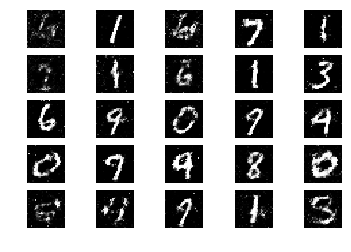

(32, 1) float64
(32, 1) float64.675652, acc.: 57.81%] [G loss: 0.950447]
(32, 1) float64.608207, acc.: 70.31%] [G loss: 0.906680]
(32, 1) float64.656389, acc.: 59.38%] [G loss: 0.925248]
(32, 1) float64.690329, acc.: 56.25%] [G loss: 0.919691]
(32, 1) float64.615745, acc.: 64.06%] [G loss: 0.920711]
(32, 1) float64.623995, acc.: 68.75%] [G loss: 1.043902]
(32, 1) float64.602887, acc.: 70.31%] [G loss: 0.953018]
(32, 1) float64.755562, acc.: 50.00%] [G loss: 1.015044]
(32, 1) float64.626988, acc.: 64.06%] [G loss: 0.914039]
(32, 1) float64.615885, acc.: 65.62%] [G loss: 0.979888]
(32, 1) float64.617057, acc.: 64.06%] [G loss: 1.003816]
(32, 1) float64.724932, acc.: 51.56%] [G loss: 0.886743]
(32, 1) float64.607412, acc.: 64.06%] [G loss: 0.971796]
(32, 1) float64.659370, acc.: 60.94%] [G loss: 1.042548]
(32, 1) float64.626549, acc.: 62.50%] [G loss: 0.925523]
(32, 1) float64.640413, acc.: 60.94%] [G loss: 0.919449]
(32, 1) float64.620122, acc.: 67.19%] [G loss: 0.964702]
(32, 1) float64

(32, 1) float64.577167, acc.: 67.19%] [G loss: 1.097361]
(32, 1) float64.611618, acc.: 65.62%] [G loss: 1.110848]
(32, 1) float64.639026, acc.: 62.50%] [G loss: 1.072140]
(32, 1) float64.673858, acc.: 56.25%] [G loss: 0.933493]
(32, 1) float64.654585, acc.: 62.50%] [G loss: 1.008579]
(32, 1) float64.586127, acc.: 71.88%] [G loss: 0.980611]
(32, 1) float64.709882, acc.: 56.25%] [G loss: 0.949993]
(32, 1) float64.631639, acc.: 60.94%] [G loss: 0.996282]
(32, 1) float64.662331, acc.: 60.94%] [G loss: 0.981334]
(32, 1) float64.629303, acc.: 64.06%] [G loss: 0.977292]
(32, 1) float64.635806, acc.: 59.38%] [G loss: 0.892418]
(32, 1) float64.622365, acc.: 62.50%] [G loss: 1.033240]
(32, 1) float64.599240, acc.: 64.06%] [G loss: 1.033021]
(32, 1) float64.627721, acc.: 67.19%] [G loss: 0.915298]
(32, 1) float64.639449, acc.: 64.06%] [G loss: 0.865764]
(32, 1) float64.638360, acc.: 68.75%] [G loss: 0.936604]
(32, 1) float64.575553, acc.: 71.88%] [G loss: 0.942912]
(32, 1) float64.653827, acc.: 6

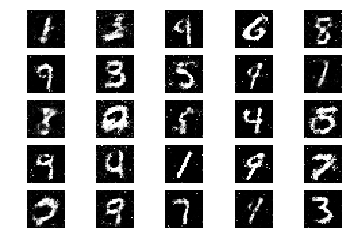

(32, 1) float64
(32, 1) float64.688205, acc.: 64.06%] [G loss: 0.930025]
(32, 1) float64.688527, acc.: 46.88%] [G loss: 0.919157]
(32, 1) float64.702829, acc.: 59.38%] [G loss: 0.928091]
(32, 1) float64.626474, acc.: 57.81%] [G loss: 0.839962]
(32, 1) float64.670492, acc.: 57.81%] [G loss: 1.044040]
(32, 1) float64.648121, acc.: 60.94%] [G loss: 0.962754]
(32, 1) float64.689650, acc.: 51.56%] [G loss: 0.959809]
(32, 1) float64.695769, acc.: 65.62%] [G loss: 0.885184]
(32, 1) float64.602456, acc.: 71.88%] [G loss: 1.051105]
(32, 1) float64.635802, acc.: 64.06%] [G loss: 0.957354]
(32, 1) float64.690265, acc.: 57.81%] [G loss: 1.115256]
(32, 1) float64.695833, acc.: 54.69%] [G loss: 1.021070]
(32, 1) float64.668177, acc.: 54.69%] [G loss: 1.001816]
(32, 1) float64.648814, acc.: 62.50%] [G loss: 0.948221]
(32, 1) float64.585051, acc.: 76.56%] [G loss: 1.050705]
(32, 1) float64.687859, acc.: 59.38%] [G loss: 0.952235]
(32, 1) float64.588784, acc.: 64.06%] [G loss: 1.030293]
(32, 1) float64

(32, 1) float64.622904, acc.: 64.06%] [G loss: 0.927590]
(32, 1) float64.689556, acc.: 57.81%] [G loss: 0.882687]
(32, 1) float64.603523, acc.: 67.19%] [G loss: 0.999485]
(32, 1) float64.588782, acc.: 67.19%] [G loss: 0.912641]
(32, 1) float64.630144, acc.: 65.62%] [G loss: 0.954089]
(32, 1) float64.649290, acc.: 68.75%] [G loss: 1.064756]
(32, 1) float64.640903, acc.: 60.94%] [G loss: 1.154698]
(32, 1) float64.559981, acc.: 71.88%] [G loss: 0.973995]
(32, 1) float64.663206, acc.: 57.81%] [G loss: 1.007740]
(32, 1) float64.652615, acc.: 57.81%] [G loss: 0.974378]
(32, 1) float64.684947, acc.: 59.38%] [G loss: 0.978557]
(32, 1) float64.609375, acc.: 60.94%] [G loss: 0.982058]
(32, 1) float64.704455, acc.: 53.12%] [G loss: 0.821099]
(32, 1) float64.563866, acc.: 76.56%] [G loss: 0.917882]
(32, 1) float64.642184, acc.: 67.19%] [G loss: 1.072686]
(32, 1) float64.653911, acc.: 64.06%] [G loss: 0.985346]
(32, 1) float64.634401, acc.: 73.44%] [G loss: 0.987240]
(32, 1) float64.641610, acc.: 6

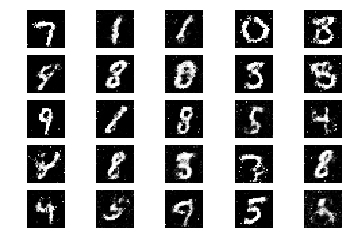

(32, 1) float64
(32, 1) float64.651843, acc.: 62.50%] [G loss: 0.943169]
(32, 1) float64.619191, acc.: 59.38%] [G loss: 0.928475]
(32, 1) float64.673952, acc.: 64.06%] [G loss: 0.887545]
(32, 1) float64.691744, acc.: 53.12%] [G loss: 0.975824]
(32, 1) float64.633956, acc.: 60.94%] [G loss: 1.023272]
(32, 1) float64.713145, acc.: 54.69%] [G loss: 0.933943]
(32, 1) float64.647208, acc.: 67.19%] [G loss: 0.960075]
(32, 1) float64.682975, acc.: 57.81%] [G loss: 0.874480]
(32, 1) float64.640488, acc.: 67.19%] [G loss: 1.021437]
(32, 1) float64.693013, acc.: 59.38%] [G loss: 1.013779]
(32, 1) float64.660496, acc.: 68.75%] [G loss: 0.897568]
(32, 1) float64.692984, acc.: 60.94%] [G loss: 0.918631]
(32, 1) float64.607993, acc.: 64.06%] [G loss: 1.038613]
(32, 1) float64.648589, acc.: 60.94%] [G loss: 0.919270]
(32, 1) float64.631331, acc.: 62.50%] [G loss: 1.077437]
(32, 1) float64.620207, acc.: 68.75%] [G loss: 1.068448]
(32, 1) float64.586380, acc.: 65.62%] [G loss: 1.030576]
(32, 1) float64

(32, 1) float64.569822, acc.: 71.88%] [G loss: 0.953537]
(32, 1) float64.672050, acc.: 62.50%] [G loss: 0.982987]
(32, 1) float64.635011, acc.: 60.94%] [G loss: 0.867862]
(32, 1) float64.709108, acc.: 57.81%] [G loss: 0.982710]
(32, 1) float64.561111, acc.: 73.44%] [G loss: 0.909714]
(32, 1) float64.585240, acc.: 73.44%] [G loss: 0.933965]
(32, 1) float64.669240, acc.: 68.75%] [G loss: 0.895306]
(32, 1) float64.586565, acc.: 71.88%] [G loss: 0.973490]
(32, 1) float64.565173, acc.: 67.19%] [G loss: 1.004843]
(32, 1) float64.638536, acc.: 60.94%] [G loss: 0.987754]
(32, 1) float64.651696, acc.: 60.94%] [G loss: 1.015027]
(32, 1) float64.606977, acc.: 64.06%] [G loss: 0.941223]
(32, 1) float64.700958, acc.: 46.88%] [G loss: 1.022177]
(32, 1) float64.674812, acc.: 50.00%] [G loss: 1.021633]
(32, 1) float64.622373, acc.: 65.62%] [G loss: 0.937020]
(32, 1) float64.576180, acc.: 70.31%] [G loss: 0.938435]
(32, 1) float64.699513, acc.: 54.69%] [G loss: 1.036105]
(32, 1) float64.654800, acc.: 5

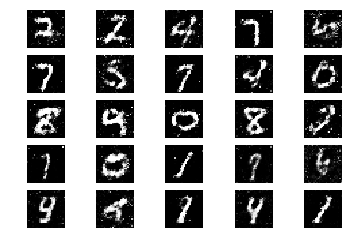

(32, 1) float64
(32, 1) float64.685868, acc.: 57.81%] [G loss: 0.940318]
(32, 1) float64.523819, acc.: 81.25%] [G loss: 0.947123]
(32, 1) float64.646994, acc.: 65.62%] [G loss: 0.982493]
(32, 1) float64.587817, acc.: 73.44%] [G loss: 1.063683]
(32, 1) float64.714492, acc.: 54.69%] [G loss: 1.000699]
(32, 1) float64.644953, acc.: 62.50%] [G loss: 0.856253]
(32, 1) float64.602662, acc.: 64.06%] [G loss: 0.988312]
(32, 1) float64.639167, acc.: 64.06%] [G loss: 0.873763]
(32, 1) float64.665323, acc.: 64.06%] [G loss: 1.025066]
(32, 1) float64.704577, acc.: 54.69%] [G loss: 1.017778]
(32, 1) float64.632514, acc.: 59.38%] [G loss: 0.943245]
(32, 1) float64.671997, acc.: 62.50%] [G loss: 0.937154]
(32, 1) float64.656332, acc.: 57.81%] [G loss: 0.970254]
(32, 1) float64.656708, acc.: 60.94%] [G loss: 0.955498]
(32, 1) float64.614385, acc.: 62.50%] [G loss: 1.008319]
(32, 1) float64.565907, acc.: 71.88%] [G loss: 1.037065]
(32, 1) float64.693083, acc.: 51.56%] [G loss: 1.117368]
(32, 1) float64

(32, 1) float64.626854, acc.: 64.06%] [G loss: 0.965887]
(32, 1) float64.624137, acc.: 70.31%] [G loss: 0.993244]
(32, 1) float64.669424, acc.: 54.69%] [G loss: 1.168437]
(32, 1) float64.645963, acc.: 64.06%] [G loss: 1.073102]
(32, 1) float64.690617, acc.: 59.38%] [G loss: 1.023790]
(32, 1) float64.704289, acc.: 57.81%] [G loss: 1.071573]
(32, 1) float64.636174, acc.: 60.94%] [G loss: 1.011324]
(32, 1) float64.574128, acc.: 75.00%] [G loss: 1.043464]
(32, 1) float64.648315, acc.: 56.25%] [G loss: 0.930654]
(32, 1) float64.606907, acc.: 68.75%] [G loss: 0.967162]
(32, 1) float64.553231, acc.: 75.00%] [G loss: 1.028734]
(32, 1) float64.690304, acc.: 62.50%] [G loss: 1.054024]
(32, 1) float64.658092, acc.: 64.06%] [G loss: 0.952371]
(32, 1) float64.623005, acc.: 64.06%] [G loss: 0.957395]
(32, 1) float64.638064, acc.: 65.62%] [G loss: 1.005731]
(32, 1) float64.641081, acc.: 68.75%] [G loss: 1.013126]
(32, 1) float64.676339, acc.: 56.25%] [G loss: 0.993802]
(32, 1) float64.669953, acc.: 6

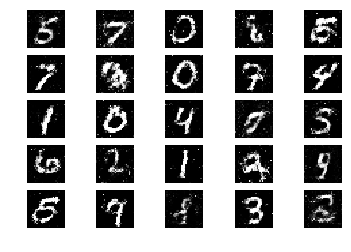

(32, 1) float64
(32, 1) float64.663969, acc.: 60.94%] [G loss: 0.997433]
(32, 1) float64.653603, acc.: 65.62%] [G loss: 0.978217]
(32, 1) float64.597350, acc.: 67.19%] [G loss: 0.962118]
(32, 1) float64.642852, acc.: 53.12%] [G loss: 0.911266]
(32, 1) float64.623749, acc.: 64.06%] [G loss: 0.965932]
(32, 1) float64.606466, acc.: 67.19%] [G loss: 1.048686]
(32, 1) float64.643451, acc.: 62.50%] [G loss: 0.970273]
(32, 1) float64.635944, acc.: 56.25%] [G loss: 0.978442]
(32, 1) float64.579388, acc.: 68.75%] [G loss: 1.015552]
(32, 1) float64.695064, acc.: 60.94%] [G loss: 0.973608]
(32, 1) float64.586590, acc.: 65.62%] [G loss: 1.028193]
(32, 1) float64.609829, acc.: 73.44%] [G loss: 1.047705]
(32, 1) float64.610975, acc.: 76.56%] [G loss: 1.065845]
(32, 1) float64.599177, acc.: 71.88%] [G loss: 1.068149]
(32, 1) float64.593746, acc.: 70.31%] [G loss: 1.124079]
(32, 1) float64.652333, acc.: 62.50%] [G loss: 0.992433]
(32, 1) float64.554248, acc.: 71.88%] [G loss: 1.003176]
(32, 1) float64

(32, 1) float64.603310, acc.: 68.75%] [G loss: 0.891491]
(32, 1) float64.692089, acc.: 53.12%] [G loss: 0.833814]
(32, 1) float64.609397, acc.: 67.19%] [G loss: 0.928528]
(32, 1) float64.612473, acc.: 62.50%] [G loss: 1.090563]
(32, 1) float64.677814, acc.: 57.81%] [G loss: 1.062460]
(32, 1) float64.663043, acc.: 64.06%] [G loss: 1.096405]
(32, 1) float64.629993, acc.: 60.94%] [G loss: 0.929296]
(32, 1) float64.619712, acc.: 68.75%] [G loss: 0.999067]
(32, 1) float64.600322, acc.: 68.75%] [G loss: 0.910809]
(32, 1) float64.743851, acc.: 54.69%] [G loss: 1.060970]
(32, 1) float64.608943, acc.: 67.19%] [G loss: 1.024351]
(32, 1) float64.678667, acc.: 60.94%] [G loss: 1.019372]
(32, 1) float64.586820, acc.: 71.88%] [G loss: 0.996617]
(32, 1) float64.679066, acc.: 56.25%] [G loss: 1.012587]
(32, 1) float64.605476, acc.: 73.44%] [G loss: 0.949020]
(32, 1) float64.757902, acc.: 42.19%] [G loss: 0.898370]
(32, 1) float64.609532, acc.: 68.75%] [G loss: 0.954444]
(32, 1) float64.586268, acc.: 7

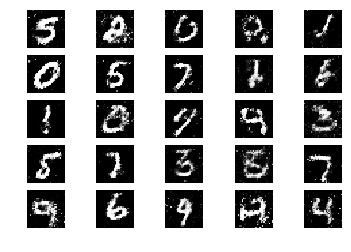

(32, 1) float64
(32, 1) float64.618665, acc.: 70.31%] [G loss: 1.055015]
(32, 1) float64.651919, acc.: 59.38%] [G loss: 0.969965]
(32, 1) float64.656516, acc.: 64.06%] [G loss: 1.001859]
(32, 1) float64.646194, acc.: 57.81%] [G loss: 0.958252]
(32, 1) float64.659479, acc.: 54.69%] [G loss: 1.034552]
(32, 1) float64.659469, acc.: 54.69%] [G loss: 0.949250]
(32, 1) float64.676673, acc.: 54.69%] [G loss: 0.829360]
(32, 1) float64.697424, acc.: 60.94%] [G loss: 1.020863]
(32, 1) float64.576981, acc.: 75.00%] [G loss: 0.971406]
(32, 1) float64.587429, acc.: 71.88%] [G loss: 1.000316]
(32, 1) float64.660462, acc.: 65.62%] [G loss: 0.943599]
(32, 1) float64.658255, acc.: 64.06%] [G loss: 0.942169]
(32, 1) float64.584250, acc.: 71.88%] [G loss: 1.069860]
(32, 1) float64.666963, acc.: 59.38%] [G loss: 1.053859]
(32, 1) float64.616850, acc.: 65.62%] [G loss: 0.998121]
(32, 1) float64.581174, acc.: 71.88%] [G loss: 0.880489]
(32, 1) float64.625861, acc.: 64.06%] [G loss: 0.913341]
(32, 1) float64

(32, 1) float64.649419, acc.: 68.75%] [G loss: 0.947046]
(32, 1) float64.610496, acc.: 70.31%] [G loss: 0.856618]
(32, 1) float64.596098, acc.: 71.88%] [G loss: 1.003454]
(32, 1) float64.614742, acc.: 59.38%] [G loss: 0.992117]
(32, 1) float64.684234, acc.: 60.94%] [G loss: 1.051335]
(32, 1) float64.572116, acc.: 71.88%] [G loss: 0.919775]
(32, 1) float64.697570, acc.: 48.44%] [G loss: 0.909107]
(32, 1) float64.590816, acc.: 67.19%] [G loss: 0.911049]
(32, 1) float64.635450, acc.: 62.50%] [G loss: 0.908569]
(32, 1) float64.566141, acc.: 73.44%] [G loss: 0.945562]
(32, 1) float64.626794, acc.: 57.81%] [G loss: 1.012578]
(32, 1) float64.534758, acc.: 79.69%] [G loss: 1.008539]
(32, 1) float64.663891, acc.: 67.19%] [G loss: 0.905165]
(32, 1) float64.687298, acc.: 60.94%] [G loss: 0.996150]
(32, 1) float64.588053, acc.: 71.88%] [G loss: 0.959998]
(32, 1) float64.540601, acc.: 73.44%] [G loss: 1.119193]
(32, 1) float64.695555, acc.: 59.38%] [G loss: 0.937409]
(32, 1) float64.699510, acc.: 6

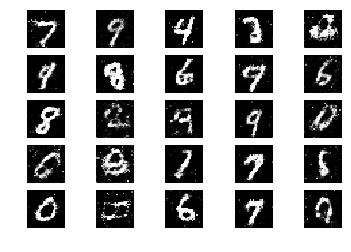

(32, 1) float64
(32, 1) float64.645850, acc.: 65.62%] [G loss: 1.037183]
(32, 1) float64.668839, acc.: 57.81%] [G loss: 1.019491]
(32, 1) float64.639820, acc.: 56.25%] [G loss: 0.931329]
(32, 1) float64.683982, acc.: 57.81%] [G loss: 0.907846]
(32, 1) float64.607093, acc.: 68.75%] [G loss: 0.993640]
(32, 1) float64.570173, acc.: 68.75%] [G loss: 0.921745]
(32, 1) float64.590594, acc.: 70.31%] [G loss: 0.944999]
(32, 1) float64.601108, acc.: 68.75%] [G loss: 1.006833]
(32, 1) float64.625332, acc.: 62.50%] [G loss: 0.957206]
(32, 1) float64.674153, acc.: 56.25%] [G loss: 0.945016]
(32, 1) float64.627848, acc.: 64.06%] [G loss: 0.968482]
(32, 1) float64.579592, acc.: 65.62%] [G loss: 0.928205]
(32, 1) float64.637085, acc.: 65.62%] [G loss: 0.968420]
(32, 1) float64.649459, acc.: 64.06%] [G loss: 0.918666]
(32, 1) float64.592386, acc.: 70.31%] [G loss: 0.859947]
(32, 1) float64.607277, acc.: 67.19%] [G loss: 0.869981]
(32, 1) float64.538602, acc.: 75.00%] [G loss: 0.856230]
(32, 1) float64

(32, 1) float64.666789, acc.: 65.62%] [G loss: 0.958256]
(32, 1) float64.627286, acc.: 64.06%] [G loss: 0.899711]
(32, 1) float64.668370, acc.: 60.94%] [G loss: 0.915167]
(32, 1) float64.588090, acc.: 71.88%] [G loss: 0.980515]
(32, 1) float64.693985, acc.: 60.94%] [G loss: 1.067374]
(32, 1) float64.680833, acc.: 57.81%] [G loss: 1.082155]
(32, 1) float64.657785, acc.: 53.12%] [G loss: 0.961998]
(32, 1) float64.641352, acc.: 59.38%] [G loss: 1.006665]
(32, 1) float64.566782, acc.: 75.00%] [G loss: 1.075666]
(32, 1) float64.616297, acc.: 65.62%] [G loss: 1.022210]
(32, 1) float64.552976, acc.: 75.00%] [G loss: 1.055024]
(32, 1) float64.647237, acc.: 60.94%] [G loss: 1.007365]
(32, 1) float64.603944, acc.: 71.88%] [G loss: 1.031571]
(32, 1) float64.649848, acc.: 57.81%] [G loss: 0.907543]
(32, 1) float64.645278, acc.: 62.50%] [G loss: 0.979815]
(32, 1) float64.610375, acc.: 62.50%] [G loss: 0.895006]
(32, 1) float64.718343, acc.: 48.44%] [G loss: 0.857445]
(32, 1) float64.638326, acc.: 6

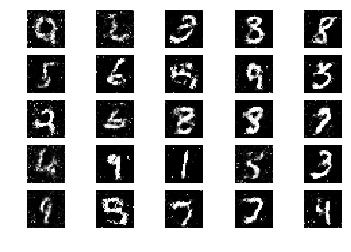

(32, 1) float64
(32, 1) float64.692355, acc.: 51.56%] [G loss: 1.035221]
(32, 1) float64.715601, acc.: 51.56%] [G loss: 0.989815]
(32, 1) float64.566745, acc.: 68.75%] [G loss: 1.019955]
(32, 1) float64.584004, acc.: 67.19%] [G loss: 1.021226]
(32, 1) float64.609716, acc.: 68.75%] [G loss: 1.087011]
(32, 1) float64.636500, acc.: 65.62%] [G loss: 1.016752]
(32, 1) float64.698598, acc.: 57.81%] [G loss: 0.993843]
(32, 1) float64.607391, acc.: 70.31%] [G loss: 0.970184]
(32, 1) float64.684487, acc.: 57.81%] [G loss: 0.878478]
(32, 1) float64.598644, acc.: 67.19%] [G loss: 0.939853]
(32, 1) float64.687081, acc.: 53.12%] [G loss: 0.994528]
(32, 1) float64.521535, acc.: 75.00%] [G loss: 1.011906]
(32, 1) float64.626230, acc.: 67.19%] [G loss: 1.179593]
(32, 1) float64.655117, acc.: 60.94%] [G loss: 1.046560]
(32, 1) float64.643533, acc.: 64.06%] [G loss: 0.965885]
(32, 1) float64.643265, acc.: 65.62%] [G loss: 0.859968]
(32, 1) float64.587107, acc.: 71.88%] [G loss: 0.980100]
(32, 1) float64

(32, 1) float64.733571, acc.: 46.88%] [G loss: 0.938705]
(32, 1) float64.667700, acc.: 59.38%] [G loss: 1.022757]
(32, 1) float64.594200, acc.: 70.31%] [G loss: 1.032629]
(32, 1) float64.586221, acc.: 68.75%] [G loss: 0.970641]
(32, 1) float64.528425, acc.: 76.56%] [G loss: 1.033173]
(32, 1) float64.573946, acc.: 68.75%] [G loss: 0.989959]
(32, 1) float64.629789, acc.: 64.06%] [G loss: 0.959779]
(32, 1) float64.708083, acc.: 59.38%] [G loss: 0.938784]
(32, 1) float64.645694, acc.: 62.50%] [G loss: 0.951110]
(32, 1) float64.658176, acc.: 60.94%] [G loss: 0.921283]
(32, 1) float64.612087, acc.: 67.19%] [G loss: 0.968963]
(32, 1) float64.653460, acc.: 60.94%] [G loss: 1.091632]
(32, 1) float64.653581, acc.: 60.94%] [G loss: 0.926498]
(32, 1) float64.665907, acc.: 54.69%] [G loss: 0.869391]
(32, 1) float64.624803, acc.: 62.50%] [G loss: 0.954857]
(32, 1) float64.742731, acc.: 51.56%] [G loss: 0.889591]
(32, 1) float64.612677, acc.: 68.75%] [G loss: 0.939108]
(32, 1) float64.638323, acc.: 6

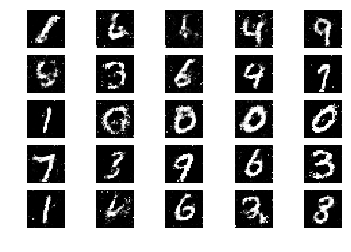

(32, 1) float64
(32, 1) float64.581375, acc.: 68.75%] [G loss: 1.022211]
(32, 1) float64.596441, acc.: 68.75%] [G loss: 0.946679]
(32, 1) float64.649934, acc.: 60.94%] [G loss: 0.998981]
(32, 1) float64.646526, acc.: 64.06%] [G loss: 0.984387]
(32, 1) float64.594753, acc.: 70.31%] [G loss: 0.892977]
(32, 1) float64.634258, acc.: 67.19%] [G loss: 0.925540]
(32, 1) float64.609361, acc.: 68.75%] [G loss: 0.944684]
(32, 1) float64.646432, acc.: 62.50%] [G loss: 0.975492]
(32, 1) float64.615108, acc.: 68.75%] [G loss: 0.977657]
(32, 1) float64.629930, acc.: 67.19%] [G loss: 0.958157]
(32, 1) float64.623812, acc.: 57.81%] [G loss: 1.000127]
(32, 1) float64.613330, acc.: 64.06%] [G loss: 1.075626]
(32, 1) float64.591589, acc.: 73.44%] [G loss: 0.999100]
(32, 1) float64.693578, acc.: 59.38%] [G loss: 1.030670]
(32, 1) float64.607725, acc.: 62.50%] [G loss: 1.030696]
(32, 1) float64.661599, acc.: 59.38%] [G loss: 1.055395]
(32, 1) float64.611849, acc.: 65.62%] [G loss: 0.973164]
(32, 1) float64

(32, 1) float64.745176, acc.: 53.12%] [G loss: 0.961145]
(32, 1) float64.577296, acc.: 68.75%] [G loss: 0.970307]
(32, 1) float64.602217, acc.: 67.19%] [G loss: 0.942559]
(32, 1) float64.620229, acc.: 59.38%] [G loss: 0.971712]
(32, 1) float64.617082, acc.: 70.31%] [G loss: 0.980383]
(32, 1) float64.677357, acc.: 53.12%] [G loss: 0.911373]
(32, 1) float64.622759, acc.: 68.75%] [G loss: 0.902576]
(32, 1) float64.625626, acc.: 64.06%] [G loss: 0.934667]
(32, 1) float64.613667, acc.: 68.75%] [G loss: 0.932852]
(32, 1) float64.578988, acc.: 67.19%] [G loss: 0.987801]
(32, 1) float64.598897, acc.: 62.50%] [G loss: 1.014995]
(32, 1) float64.624624, acc.: 65.62%] [G loss: 1.006721]
(32, 1) float64.622860, acc.: 65.62%] [G loss: 0.967260]
(32, 1) float64.686094, acc.: 57.81%] [G loss: 1.053907]
(32, 1) float64.639870, acc.: 65.62%] [G loss: 0.922805]
(32, 1) float64.680900, acc.: 62.50%] [G loss: 1.056355]
(32, 1) float64.607443, acc.: 65.62%] [G loss: 0.968590]
(32, 1) float64.626545, acc.: 6

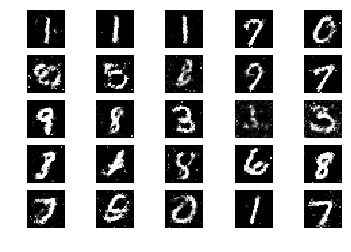

(32, 1) float64
(32, 1) float640.563516, acc.: 73.44%] [G loss: 0.982349]
(32, 1) float640.740414, acc.: 56.25%] [G loss: 0.951717]
(32, 1) float640.677095, acc.: 57.81%] [G loss: 0.939736]
(32, 1) float640.626055, acc.: 57.81%] [G loss: 0.953659]
(32, 1) float640.612261, acc.: 71.88%] [G loss: 0.981536]
(32, 1) float640.670187, acc.: 64.06%] [G loss: 0.969341]
(32, 1) float640.592956, acc.: 70.31%] [G loss: 1.018707]
(32, 1) float640.544237, acc.: 70.31%] [G loss: 0.944799]
(32, 1) float640.713531, acc.: 57.81%] [G loss: 0.969230]
(32, 1) float640.581080, acc.: 62.50%] [G loss: 1.045229]
(32, 1) float640.747099, acc.: 51.56%] [G loss: 0.974231]
(32, 1) float640.565108, acc.: 68.75%] [G loss: 1.108318]
(32, 1) float640.618204, acc.: 67.19%] [G loss: 1.006371]
(32, 1) float640.674383, acc.: 53.12%] [G loss: 1.178162]
(32, 1) float640.625752, acc.: 57.81%] [G loss: 1.002198]
(32, 1) float640.629300, acc.: 65.62%] [G loss: 0.982361]
(32, 1) float640.680505, acc.: 54.69%] [G loss: 0.895317

(32, 1) float640.701952, acc.: 57.81%] [G loss: 1.003657]
(32, 1) float640.622429, acc.: 62.50%] [G loss: 1.023109]
(32, 1) float640.638286, acc.: 65.62%] [G loss: 0.930040]
(32, 1) float640.671963, acc.: 57.81%] [G loss: 0.928004]
(32, 1) float640.609590, acc.: 64.06%] [G loss: 0.999307]
(32, 1) float640.585431, acc.: 67.19%] [G loss: 1.081008]
(32, 1) float640.669182, acc.: 59.38%] [G loss: 0.925312]
(32, 1) float640.654630, acc.: 57.81%] [G loss: 1.020119]
(32, 1) float640.614894, acc.: 67.19%] [G loss: 1.116451]
(32, 1) float640.739093, acc.: 50.00%] [G loss: 0.934986]
(32, 1) float640.694786, acc.: 54.69%] [G loss: 0.973958]
(32, 1) float640.646482, acc.: 59.38%] [G loss: 0.960076]
(32, 1) float640.614200, acc.: 60.94%] [G loss: 0.920289]
(32, 1) float640.627972, acc.: 64.06%] [G loss: 1.026927]
(32, 1) float640.642929, acc.: 62.50%] [G loss: 0.909964]
(32, 1) float640.657489, acc.: 57.81%] [G loss: 0.990811]
(32, 1) float640.590392, acc.: 67.19%] [G loss: 0.783304]
(32, 1) float6

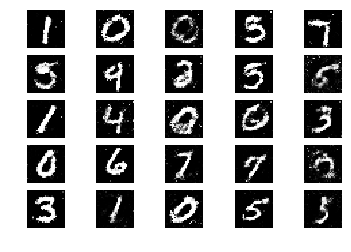

(32, 1) float64
(32, 1) float640.589315, acc.: 67.19%] [G loss: 0.904915]
(32, 1) float640.582004, acc.: 68.75%] [G loss: 1.027011]
(32, 1) float640.625703, acc.: 65.62%] [G loss: 1.048267]
(32, 1) float640.644744, acc.: 70.31%] [G loss: 0.894547]
(32, 1) float640.748899, acc.: 46.88%] [G loss: 1.036938]
(32, 1) float640.573528, acc.: 68.75%] [G loss: 0.966453]
(32, 1) float640.648444, acc.: 68.75%] [G loss: 1.038279]
(32, 1) float640.674190, acc.: 57.81%] [G loss: 0.954503]
(32, 1) float640.603195, acc.: 67.19%] [G loss: 0.996395]
(32, 1) float640.549993, acc.: 76.56%] [G loss: 1.017815]
(32, 1) float640.686341, acc.: 53.12%] [G loss: 0.982405]
(32, 1) float640.617485, acc.: 67.19%] [G loss: 0.945519]
(32, 1) float640.620135, acc.: 56.25%] [G loss: 0.927916]
(32, 1) float640.610320, acc.: 70.31%] [G loss: 1.036975]
(32, 1) float640.642039, acc.: 60.94%] [G loss: 0.953649]
(32, 1) float640.665984, acc.: 60.94%] [G loss: 0.873124]
(32, 1) float640.613467, acc.: 68.75%] [G loss: 1.110114

(32, 1) float640.663604, acc.: 60.94%] [G loss: 1.013746]
(32, 1) float640.575545, acc.: 67.19%] [G loss: 1.020698]
(32, 1) float640.640899, acc.: 64.06%] [G loss: 0.946047]
(32, 1) float640.679097, acc.: 59.38%] [G loss: 0.928645]
(32, 1) float640.599127, acc.: 68.75%] [G loss: 0.961996]
(32, 1) float640.702129, acc.: 54.69%] [G loss: 0.995529]
(32, 1) float640.619452, acc.: 68.75%] [G loss: 0.844529]
(32, 1) float640.582083, acc.: 71.88%] [G loss: 0.967273]
(32, 1) float640.638060, acc.: 62.50%] [G loss: 0.980789]
(32, 1) float640.641365, acc.: 60.94%] [G loss: 0.992497]
(32, 1) float640.617016, acc.: 67.19%] [G loss: 1.081069]
(32, 1) float640.616641, acc.: 71.88%] [G loss: 0.993663]
(32, 1) float640.632117, acc.: 59.38%] [G loss: 0.977008]
(32, 1) float640.674190, acc.: 59.38%] [G loss: 0.998314]
(32, 1) float640.600972, acc.: 67.19%] [G loss: 0.938441]
(32, 1) float640.651356, acc.: 57.81%] [G loss: 0.952941]
(32, 1) float640.708564, acc.: 53.12%] [G loss: 1.000722]
(32, 1) float6

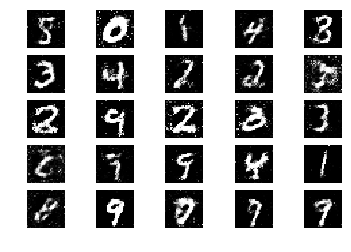

(32, 1) float64
(32, 1) float640.702275, acc.: 59.38%] [G loss: 0.963072]
(32, 1) float640.636741, acc.: 67.19%] [G loss: 0.923133]
(32, 1) float640.730132, acc.: 53.12%] [G loss: 1.099771]
(32, 1) float640.593157, acc.: 68.75%] [G loss: 0.992153]
(32, 1) float640.639564, acc.: 65.62%] [G loss: 1.114308]
(32, 1) float640.590597, acc.: 65.62%] [G loss: 1.044270]
(32, 1) float640.598037, acc.: 67.19%] [G loss: 0.859203]
(32, 1) float640.695750, acc.: 56.25%] [G loss: 0.991028]
(32, 1) float640.678922, acc.: 62.50%] [G loss: 1.050999]
(32, 1) float640.621330, acc.: 67.19%] [G loss: 0.999796]
(32, 1) float640.681668, acc.: 59.38%] [G loss: 0.935160]
(32, 1) float640.630917, acc.: 64.06%] [G loss: 0.999105]
(32, 1) float640.620496, acc.: 68.75%] [G loss: 1.006889]
(32, 1) float640.571687, acc.: 76.56%] [G loss: 1.024741]
(32, 1) float640.629997, acc.: 62.50%] [G loss: 0.937443]
(32, 1) float640.654722, acc.: 54.69%] [G loss: 1.029734]
(32, 1) float640.641412, acc.: 70.31%] [G loss: 0.995573

(32, 1) float640.691519, acc.: 54.69%] [G loss: 0.909678]
(32, 1) float640.671938, acc.: 56.25%] [G loss: 1.103037]
(32, 1) float640.665799, acc.: 60.94%] [G loss: 1.091645]
(32, 1) float640.558094, acc.: 68.75%] [G loss: 0.970636]
(32, 1) float640.624673, acc.: 64.06%] [G loss: 1.019207]
(32, 1) float640.671474, acc.: 57.81%] [G loss: 0.993348]
(32, 1) float640.597712, acc.: 70.31%] [G loss: 0.949362]
(32, 1) float640.537534, acc.: 73.44%] [G loss: 0.926550]
(32, 1) float640.676289, acc.: 60.94%] [G loss: 1.005703]
(32, 1) float640.654152, acc.: 54.69%] [G loss: 0.949878]
(32, 1) float640.700389, acc.: 59.38%] [G loss: 0.811528]
(32, 1) float640.678583, acc.: 62.50%] [G loss: 0.946205]
(32, 1) float640.629939, acc.: 65.62%] [G loss: 0.969415]
(32, 1) float640.572697, acc.: 73.44%] [G loss: 1.052431]
(32, 1) float640.621454, acc.: 71.88%] [G loss: 1.011009]
(32, 1) float640.604334, acc.: 70.31%] [G loss: 1.023711]
(32, 1) float640.701106, acc.: 59.38%] [G loss: 0.948027]
(32, 1) float6

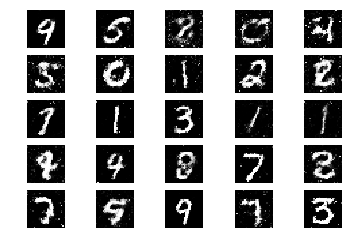

(32, 1) float64
(32, 1) float640.644742, acc.: 59.38%] [G loss: 0.979427]
(32, 1) float640.547570, acc.: 65.62%] [G loss: 0.993555]
(32, 1) float640.525720, acc.: 76.56%] [G loss: 1.042148]
(32, 1) float640.611364, acc.: 70.31%] [G loss: 0.959262]
(32, 1) float640.591210, acc.: 67.19%] [G loss: 1.011210]
(32, 1) float640.748150, acc.: 51.56%] [G loss: 0.915085]
(32, 1) float640.647307, acc.: 62.50%] [G loss: 0.956924]
(32, 1) float640.622934, acc.: 64.06%] [G loss: 1.089177]
(32, 1) float640.646627, acc.: 62.50%] [G loss: 0.893021]
(32, 1) float640.711842, acc.: 56.25%] [G loss: 0.961653]
(32, 1) float640.603337, acc.: 70.31%] [G loss: 0.988122]
(32, 1) float640.615413, acc.: 62.50%] [G loss: 0.977485]
(32, 1) float640.679479, acc.: 70.31%] [G loss: 0.987520]
(32, 1) float640.651165, acc.: 65.62%] [G loss: 1.002017]
(32, 1) float640.607229, acc.: 67.19%] [G loss: 0.933192]
(32, 1) float640.688068, acc.: 54.69%] [G loss: 0.929092]
(32, 1) float640.611217, acc.: 68.75%] [G loss: 1.035571

(32, 1) float640.616945, acc.: 62.50%] [G loss: 0.969764]
(32, 1) float640.550553, acc.: 81.25%] [G loss: 1.066711]
(32, 1) float640.629678, acc.: 60.94%] [G loss: 0.929556]
(32, 1) float640.630034, acc.: 64.06%] [G loss: 0.954505]
(32, 1) float640.552934, acc.: 73.44%] [G loss: 0.985840]
(32, 1) float640.678124, acc.: 54.69%] [G loss: 0.974939]
(32, 1) float640.651371, acc.: 62.50%] [G loss: 1.056366]
(32, 1) float640.627085, acc.: 65.62%] [G loss: 1.117007]
(32, 1) float640.646121, acc.: 64.06%] [G loss: 1.038023]
(32, 1) float640.647196, acc.: 64.06%] [G loss: 1.016135]
(32, 1) float640.696829, acc.: 46.88%] [G loss: 0.968527]
(32, 1) float640.670975, acc.: 65.62%] [G loss: 1.094700]
(32, 1) float640.661256, acc.: 57.81%] [G loss: 0.957206]
(32, 1) float640.633617, acc.: 60.94%] [G loss: 0.956277]
(32, 1) float640.633098, acc.: 67.19%] [G loss: 0.931127]
(32, 1) float640.605374, acc.: 68.75%] [G loss: 0.994098]
(32, 1) float640.695629, acc.: 59.38%] [G loss: 0.960864]
(32, 1) float6

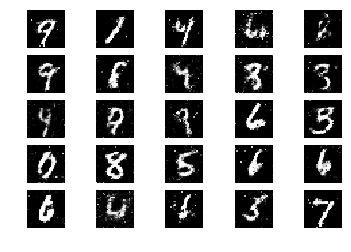

(32, 1) float64
(32, 1) float640.752801, acc.: 54.69%] [G loss: 0.995249]
(32, 1) float640.644672, acc.: 62.50%] [G loss: 1.046078]
(32, 1) float640.696527, acc.: 53.12%] [G loss: 0.905149]
(32, 1) float640.619398, acc.: 65.62%] [G loss: 0.976823]
(32, 1) float640.607899, acc.: 68.75%] [G loss: 0.959170]
(32, 1) float640.646056, acc.: 54.69%] [G loss: 0.845895]
(32, 1) float640.602391, acc.: 67.19%] [G loss: 0.852079]
(32, 1) float640.611736, acc.: 70.31%] [G loss: 0.887471]
(32, 1) float640.625539, acc.: 64.06%] [G loss: 0.972821]
(32, 1) float640.620244, acc.: 68.75%] [G loss: 0.933443]
(32, 1) float640.622583, acc.: 67.19%] [G loss: 0.861729]
(32, 1) float640.686990, acc.: 57.81%] [G loss: 0.881593]
(32, 1) float640.693137, acc.: 53.12%] [G loss: 0.900639]
(32, 1) float640.634688, acc.: 65.62%] [G loss: 0.936801]
(32, 1) float640.783553, acc.: 45.31%] [G loss: 0.913308]
(32, 1) float640.648108, acc.: 65.62%] [G loss: 0.885208]
(32, 1) float640.587196, acc.: 70.31%] [G loss: 0.949523

(32, 1) float640.661402, acc.: 62.50%] [G loss: 1.070764]
(32, 1) float640.567780, acc.: 71.88%] [G loss: 1.055089]
(32, 1) float640.602886, acc.: 62.50%] [G loss: 0.998603]
(32, 1) float640.650865, acc.: 54.69%] [G loss: 1.044277]
(32, 1) float640.586968, acc.: 70.31%] [G loss: 0.978925]
(32, 1) float640.566188, acc.: 73.44%] [G loss: 0.876889]
(32, 1) float640.566906, acc.: 65.62%] [G loss: 0.952371]
(32, 1) float640.666567, acc.: 67.19%] [G loss: 1.075936]
(32, 1) float640.634847, acc.: 68.75%] [G loss: 0.976741]
(32, 1) float640.627460, acc.: 73.44%] [G loss: 1.034499]
(32, 1) float640.590698, acc.: 68.75%] [G loss: 1.012048]
(32, 1) float640.647699, acc.: 59.38%] [G loss: 1.057235]
(32, 1) float640.621432, acc.: 64.06%] [G loss: 0.993853]
(32, 1) float640.636866, acc.: 62.50%] [G loss: 0.979688]
(32, 1) float640.647953, acc.: 60.94%] [G loss: 0.880339]
(32, 1) float640.603556, acc.: 62.50%] [G loss: 1.002012]
(32, 1) float640.627330, acc.: 62.50%] [G loss: 0.963714]
(32, 1) float6

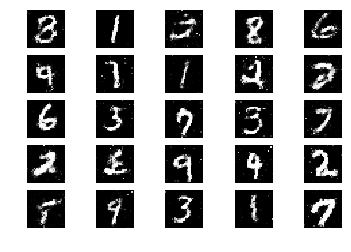

(32, 1) float64
(32, 1) float640.723905, acc.: 53.12%] [G loss: 0.990989]
(32, 1) float640.680472, acc.: 56.25%] [G loss: 0.915628]
(32, 1) float640.667389, acc.: 62.50%] [G loss: 1.000876]
(32, 1) float640.621701, acc.: 70.31%] [G loss: 0.924081]
(32, 1) float640.682412, acc.: 57.81%] [G loss: 0.967293]
(32, 1) float640.637921, acc.: 68.75%] [G loss: 1.064726]
(32, 1) float640.655477, acc.: 62.50%] [G loss: 0.965821]
(32, 1) float640.631729, acc.: 59.38%] [G loss: 1.004336]
(32, 1) float640.625974, acc.: 64.06%] [G loss: 0.904012]
(32, 1) float640.690530, acc.: 51.56%] [G loss: 0.870173]
(32, 1) float640.676265, acc.: 56.25%] [G loss: 0.964182]
(32, 1) float640.668839, acc.: 57.81%] [G loss: 1.015821]
(32, 1) float640.651537, acc.: 60.94%] [G loss: 0.989086]
(32, 1) float640.626186, acc.: 62.50%] [G loss: 1.036327]
(32, 1) float640.637464, acc.: 57.81%] [G loss: 0.970868]
(32, 1) float640.637504, acc.: 59.38%] [G loss: 1.032795]
(32, 1) float640.658218, acc.: 59.38%] [G loss: 1.013363

(32, 1) float640.659743, acc.: 62.50%] [G loss: 0.953152]
(32, 1) float640.604245, acc.: 67.19%] [G loss: 1.070313]
(32, 1) float640.620580, acc.: 67.19%] [G loss: 1.060600]
(32, 1) float640.582619, acc.: 70.31%] [G loss: 1.020908]
(32, 1) float640.736183, acc.: 46.88%] [G loss: 1.043680]
(32, 1) float640.639804, acc.: 62.50%] [G loss: 1.024916]
(32, 1) float640.695754, acc.: 54.69%] [G loss: 1.011408]
(32, 1) float640.644271, acc.: 67.19%] [G loss: 0.941677]
(32, 1) float640.629132, acc.: 65.62%] [G loss: 1.045181]
(32, 1) float640.662898, acc.: 57.81%] [G loss: 0.994915]
(32, 1) float640.659812, acc.: 67.19%] [G loss: 0.947216]
(32, 1) float640.639486, acc.: 60.94%] [G loss: 0.868748]
(32, 1) float640.626546, acc.: 64.06%] [G loss: 0.868892]
(32, 1) float640.606700, acc.: 68.75%] [G loss: 0.960694]
(32, 1) float640.698551, acc.: 56.25%] [G loss: 0.907175]
(32, 1) float640.535144, acc.: 76.56%] [G loss: 1.028909]
(32, 1) float640.577704, acc.: 73.44%] [G loss: 0.972883]
(32, 1) float6

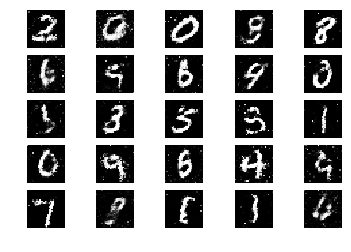

(32, 1) float64
(32, 1) float640.647168, acc.: 60.94%] [G loss: 1.019047]
(32, 1) float640.540296, acc.: 78.12%] [G loss: 0.991612]
(32, 1) float640.581549, acc.: 70.31%] [G loss: 1.102369]
(32, 1) float640.693133, acc.: 64.06%] [G loss: 1.060015]
(32, 1) float640.686014, acc.: 56.25%] [G loss: 1.024980]
(32, 1) float640.637896, acc.: 65.62%] [G loss: 0.944123]
(32, 1) float640.618419, acc.: 59.38%] [G loss: 0.898842]
(32, 1) float640.605218, acc.: 70.31%] [G loss: 0.981470]
(32, 1) float640.679603, acc.: 62.50%] [G loss: 0.911984]
(32, 1) float640.606630, acc.: 68.75%] [G loss: 0.971290]
(32, 1) float640.664968, acc.: 60.94%] [G loss: 0.925132]
(32, 1) float640.614120, acc.: 71.88%] [G loss: 1.049250]
(32, 1) float640.602100, acc.: 67.19%] [G loss: 0.945385]
(32, 1) float640.615873, acc.: 68.75%] [G loss: 1.023757]
(32, 1) float640.619645, acc.: 62.50%] [G loss: 0.966947]
(32, 1) float640.572461, acc.: 70.31%] [G loss: 0.950731]
(32, 1) float640.617258, acc.: 68.75%] [G loss: 0.930426

(32, 1) float640.728084, acc.: 50.00%] [G loss: 0.884776]
(32, 1) float640.556952, acc.: 75.00%] [G loss: 1.115016]
(32, 1) float640.595537, acc.: 71.88%] [G loss: 0.948244]
(32, 1) float640.649898, acc.: 56.25%] [G loss: 0.928668]
(32, 1) float640.602629, acc.: 73.44%] [G loss: 0.906989]
(32, 1) float640.563072, acc.: 70.31%] [G loss: 1.002030]
(32, 1) float640.571052, acc.: 71.88%] [G loss: 0.949010]
(32, 1) float640.668237, acc.: 57.81%] [G loss: 1.038060]
(32, 1) float640.622392, acc.: 62.50%] [G loss: 0.875416]
(32, 1) float640.594440, acc.: 73.44%] [G loss: 0.951764]
(32, 1) float640.620436, acc.: 67.19%] [G loss: 1.007319]
(32, 1) float640.613518, acc.: 60.94%] [G loss: 0.872493]
(32, 1) float640.705063, acc.: 51.56%] [G loss: 0.980791]
(32, 1) float640.667305, acc.: 65.62%] [G loss: 1.019807]
(32, 1) float640.704326, acc.: 56.25%] [G loss: 0.936836]
(32, 1) float640.636573, acc.: 62.50%] [G loss: 0.997577]
(32, 1) float640.681232, acc.: 59.38%] [G loss: 0.998891]
(32, 1) float6

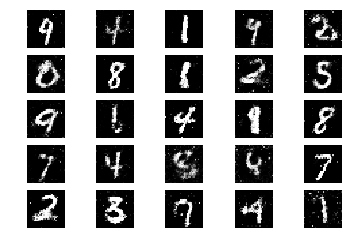

(32, 1) float64
(32, 1) float640.627988, acc.: 59.38%] [G loss: 0.994304]
(32, 1) float640.688011, acc.: 53.12%] [G loss: 0.957671]
(32, 1) float640.653419, acc.: 62.50%] [G loss: 0.938756]
(32, 1) float640.678017, acc.: 57.81%] [G loss: 0.964755]
(32, 1) float640.639814, acc.: 59.38%] [G loss: 0.931828]
(32, 1) float640.643193, acc.: 60.94%] [G loss: 1.045509]
(32, 1) float640.607328, acc.: 67.19%] [G loss: 0.974835]
(32, 1) float640.613085, acc.: 60.94%] [G loss: 1.083819]
(32, 1) float640.741080, acc.: 56.25%] [G loss: 0.957676]
(32, 1) float640.693412, acc.: 56.25%] [G loss: 0.919154]
(32, 1) float640.655156, acc.: 53.12%] [G loss: 0.880271]
(32, 1) float640.677817, acc.: 59.38%] [G loss: 0.912038]
(32, 1) float640.604377, acc.: 71.88%] [G loss: 0.936898]
(32, 1) float640.647496, acc.: 64.06%] [G loss: 0.936684]
(32, 1) float640.613834, acc.: 73.44%] [G loss: 1.037844]
(32, 1) float640.661151, acc.: 64.06%] [G loss: 0.855456]
(32, 1) float640.597984, acc.: 67.19%] [G loss: 1.010052

(32, 1) float640.601491, acc.: 65.62%] [G loss: 1.129280]
(32, 1) float640.657329, acc.: 65.62%] [G loss: 0.974057]
(32, 1) float640.689249, acc.: 56.25%] [G loss: 0.945780]
(32, 1) float640.630143, acc.: 64.06%] [G loss: 0.988018]
(32, 1) float640.605166, acc.: 60.94%] [G loss: 1.085912]
(32, 1) float640.687397, acc.: 51.56%] [G loss: 1.039021]
(32, 1) float640.612657, acc.: 64.06%] [G loss: 0.998847]
(32, 1) float640.621271, acc.: 64.06%] [G loss: 0.860897]
(32, 1) float640.697879, acc.: 50.00%] [G loss: 1.027101]
(32, 1) float640.635455, acc.: 62.50%] [G loss: 0.889191]
(32, 1) float640.705806, acc.: 50.00%] [G loss: 0.920334]
(32, 1) float640.663880, acc.: 65.62%] [G loss: 1.032865]
(32, 1) float640.563375, acc.: 71.88%] [G loss: 1.046669]
(32, 1) float640.658893, acc.: 56.25%] [G loss: 0.932769]
(32, 1) float640.525294, acc.: 75.00%] [G loss: 0.965587]
(32, 1) float640.578714, acc.: 70.31%] [G loss: 0.942569]
(32, 1) float640.645941, acc.: 62.50%] [G loss: 1.036252]
(32, 1) float6

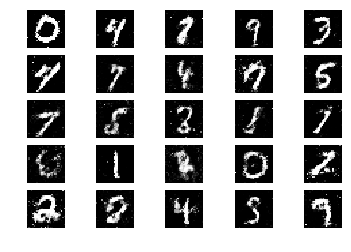

(32, 1) float64
(32, 1) float640.548471, acc.: 70.31%] [G loss: 0.897099]
(32, 1) float640.697894, acc.: 50.00%] [G loss: 0.971962]
(32, 1) float640.655852, acc.: 62.50%] [G loss: 1.013591]
(32, 1) float640.649057, acc.: 60.94%] [G loss: 0.964159]
(32, 1) float640.599284, acc.: 73.44%] [G loss: 1.015069]
(32, 1) float640.637286, acc.: 65.62%] [G loss: 0.936021]
(32, 1) float640.679238, acc.: 57.81%] [G loss: 0.967094]
(32, 1) float640.610145, acc.: 73.44%] [G loss: 1.080067]
(32, 1) float640.628259, acc.: 64.06%] [G loss: 0.899139]
(32, 1) float640.626302, acc.: 62.50%] [G loss: 0.990696]
(32, 1) float640.607351, acc.: 73.44%] [G loss: 0.986241]
(32, 1) float640.656131, acc.: 64.06%] [G loss: 1.038041]
(32, 1) float640.602812, acc.: 67.19%] [G loss: 1.065710]
(32, 1) float640.559225, acc.: 73.44%] [G loss: 1.094370]
(32, 1) float640.606974, acc.: 60.94%] [G loss: 1.043096]
(32, 1) float640.690886, acc.: 57.81%] [G loss: 0.953960]
(32, 1) float640.608730, acc.: 65.62%] [G loss: 0.957886

(32, 1) float640.628675, acc.: 62.50%] [G loss: 1.022072]
(32, 1) float640.671311, acc.: 57.81%] [G loss: 0.891624]
(32, 1) float640.636448, acc.: 62.50%] [G loss: 0.976762]
(32, 1) float640.682270, acc.: 57.81%] [G loss: 0.853037]
(32, 1) float640.629219, acc.: 64.06%] [G loss: 0.920369]
(32, 1) float640.571929, acc.: 81.25%] [G loss: 1.109101]
(32, 1) float640.661541, acc.: 56.25%] [G loss: 0.982956]
(32, 1) float640.633461, acc.: 62.50%] [G loss: 0.977524]
(32, 1) float640.655435, acc.: 59.38%] [G loss: 0.969326]
(32, 1) float640.602782, acc.: 65.62%] [G loss: 0.991518]
(32, 1) float640.581709, acc.: 65.62%] [G loss: 0.977267]
(32, 1) float640.693272, acc.: 54.69%] [G loss: 0.927809]
(32, 1) float640.663787, acc.: 59.38%] [G loss: 1.025918]
(32, 1) float640.683318, acc.: 54.69%] [G loss: 1.001185]
(32, 1) float640.692161, acc.: 46.88%] [G loss: 0.970790]
(32, 1) float640.634920, acc.: 65.62%] [G loss: 0.891743]
(32, 1) float640.628789, acc.: 62.50%] [G loss: 0.899316]
(32, 1) float6

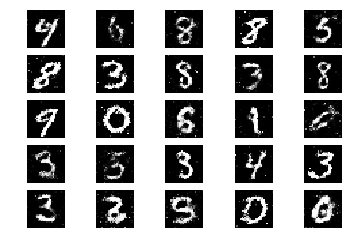

(32, 1) float64
(32, 1) float640.652004, acc.: 60.94%] [G loss: 1.043906]
(32, 1) float640.654694, acc.: 65.62%] [G loss: 0.948328]
(32, 1) float640.630579, acc.: 67.19%] [G loss: 0.956198]
(32, 1) float640.643448, acc.: 67.19%] [G loss: 1.032924]
(32, 1) float640.582878, acc.: 73.44%] [G loss: 0.913782]
(32, 1) float640.643789, acc.: 57.81%] [G loss: 0.943058]
(32, 1) float640.638048, acc.: 67.19%] [G loss: 0.870150]
(32, 1) float640.627860, acc.: 60.94%] [G loss: 0.851179]
(32, 1) float640.574269, acc.: 70.31%] [G loss: 0.878274]
(32, 1) float640.703120, acc.: 56.25%] [G loss: 1.008171]
(32, 1) float640.626580, acc.: 67.19%] [G loss: 0.904208]
(32, 1) float640.688604, acc.: 60.94%] [G loss: 0.956526]
(32, 1) float640.699761, acc.: 53.12%] [G loss: 1.006553]
(32, 1) float640.641263, acc.: 60.94%] [G loss: 1.068934]
(32, 1) float640.649447, acc.: 60.94%] [G loss: 0.938857]
(32, 1) float640.578689, acc.: 73.44%] [G loss: 0.904300]
(32, 1) float640.595953, acc.: 64.06%] [G loss: 0.894925

(32, 1) float640.582330, acc.: 70.31%] [G loss: 1.014482]
(32, 1) float640.681974, acc.: 60.94%] [G loss: 1.053607]
(32, 1) float640.595182, acc.: 71.88%] [G loss: 0.941987]
(32, 1) float640.648456, acc.: 68.75%] [G loss: 0.960336]
(32, 1) float640.621933, acc.: 68.75%] [G loss: 0.928416]
(32, 1) float640.637843, acc.: 57.81%] [G loss: 1.024306]
(32, 1) float640.628707, acc.: 62.50%] [G loss: 0.965285]
(32, 1) float640.581732, acc.: 62.50%] [G loss: 1.037154]
(32, 1) float640.616647, acc.: 59.38%] [G loss: 1.002128]
(32, 1) float640.729991, acc.: 51.56%] [G loss: 0.976926]
(32, 1) float640.597313, acc.: 67.19%] [G loss: 0.998472]
(32, 1) float640.636795, acc.: 60.94%] [G loss: 1.083272]
(32, 1) float640.737360, acc.: 48.44%] [G loss: 1.109148]
(32, 1) float640.633422, acc.: 57.81%] [G loss: 0.965308]
(32, 1) float640.684052, acc.: 59.38%] [G loss: 0.955108]
(32, 1) float640.626209, acc.: 64.06%] [G loss: 1.004283]
(32, 1) float640.571997, acc.: 70.31%] [G loss: 1.012648]
(32, 1) float6

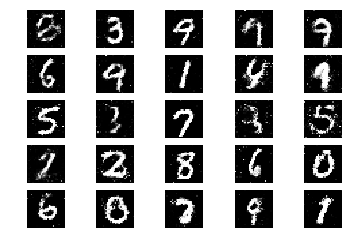

(32, 1) float64
(32, 1) float640.639416, acc.: 60.94%] [G loss: 1.126083]
(32, 1) float640.629280, acc.: 60.94%] [G loss: 0.917586]
(32, 1) float640.679506, acc.: 56.25%] [G loss: 0.903967]
(32, 1) float640.673065, acc.: 62.50%] [G loss: 0.938505]
(32, 1) float640.644634, acc.: 62.50%] [G loss: 0.950848]
(32, 1) float640.636780, acc.: 57.81%] [G loss: 1.041367]
(32, 1) float640.619757, acc.: 62.50%] [G loss: 0.925108]
(32, 1) float640.636735, acc.: 60.94%] [G loss: 1.049421]
(32, 1) float640.614829, acc.: 64.06%] [G loss: 0.999919]
(32, 1) float640.635038, acc.: 64.06%] [G loss: 0.973825]
(32, 1) float640.584636, acc.: 70.31%] [G loss: 1.006579]
(32, 1) float640.647380, acc.: 67.19%] [G loss: 0.883509]
(32, 1) float640.670303, acc.: 59.38%] [G loss: 1.089885]
(32, 1) float640.661219, acc.: 59.38%] [G loss: 0.933266]
(32, 1) float640.609199, acc.: 65.62%] [G loss: 1.103081]
(32, 1) float640.644169, acc.: 64.06%] [G loss: 1.035289]
(32, 1) float640.666338, acc.: 57.81%] [G loss: 0.940719

(32, 1) float640.560207, acc.: 71.88%] [G loss: 1.045529]
(32, 1) float640.657799, acc.: 62.50%] [G loss: 0.977532]
(32, 1) float640.641052, acc.: 64.06%] [G loss: 0.950920]
(32, 1) float640.666853, acc.: 60.94%] [G loss: 1.026192]
(32, 1) float640.694801, acc.: 53.12%] [G loss: 0.944430]
(32, 1) float640.621052, acc.: 65.62%] [G loss: 0.929475]
(32, 1) float640.562517, acc.: 68.75%] [G loss: 0.976067]
(32, 1) float640.581448, acc.: 65.62%] [G loss: 1.044303]
(32, 1) float640.627352, acc.: 62.50%] [G loss: 0.973608]
(32, 1) float640.612765, acc.: 68.75%] [G loss: 1.058883]
(32, 1) float640.663014, acc.: 65.62%] [G loss: 0.925966]
(32, 1) float640.668612, acc.: 62.50%] [G loss: 1.029262]
(32, 1) float640.626773, acc.: 70.31%] [G loss: 1.067203]
(32, 1) float640.605860, acc.: 68.75%] [G loss: 1.020415]
(32, 1) float640.664671, acc.: 57.81%] [G loss: 1.076397]
(32, 1) float640.597184, acc.: 68.75%] [G loss: 1.095070]
(32, 1) float640.629630, acc.: 62.50%] [G loss: 0.943148]
(32, 1) float6

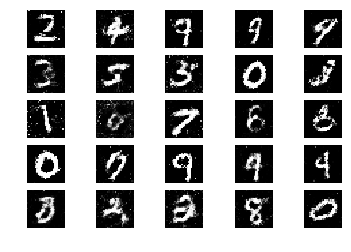

(32, 1) float64
(32, 1) float640.729682, acc.: 53.12%] [G loss: 0.928508]
(32, 1) float640.654792, acc.: 59.38%] [G loss: 1.073450]
(32, 1) float640.715302, acc.: 48.44%] [G loss: 0.963721]
(32, 1) float640.642284, acc.: 65.62%] [G loss: 1.006661]
(32, 1) float640.669631, acc.: 54.69%] [G loss: 0.998895]
(32, 1) float640.688942, acc.: 56.25%] [G loss: 1.025636]
(32, 1) float640.778963, acc.: 42.19%] [G loss: 0.928303]
(32, 1) float640.609603, acc.: 67.19%] [G loss: 1.010164]
(32, 1) float640.619270, acc.: 67.19%] [G loss: 0.968865]
(32, 1) float640.638122, acc.: 62.50%] [G loss: 1.038505]
(32, 1) float640.651875, acc.: 65.62%] [G loss: 0.998804]
(32, 1) float640.595713, acc.: 73.44%] [G loss: 1.033658]
(32, 1) float640.698279, acc.: 54.69%] [G loss: 1.043438]
(32, 1) float640.597350, acc.: 70.31%] [G loss: 1.009703]
(32, 1) float640.691942, acc.: 51.56%] [G loss: 1.000359]
(32, 1) float640.604180, acc.: 67.19%] [G loss: 0.988207]
(32, 1) float640.673763, acc.: 62.50%] [G loss: 1.057622

(32, 1) float640.585120, acc.: 70.31%] [G loss: 1.006978]
(32, 1) float640.612537, acc.: 68.75%] [G loss: 0.911333]
(32, 1) float640.614185, acc.: 67.19%] [G loss: 0.899880]
(32, 1) float640.773707, acc.: 40.62%] [G loss: 1.007810]
(32, 1) float640.589371, acc.: 70.31%] [G loss: 0.985324]
(32, 1) float640.658261, acc.: 59.38%] [G loss: 1.043265]
(32, 1) float640.700159, acc.: 45.31%] [G loss: 0.960127]
(32, 1) float640.643210, acc.: 59.38%] [G loss: 1.092483]
(32, 1) float640.612485, acc.: 68.75%] [G loss: 1.026453]
(32, 1) float640.632097, acc.: 54.69%] [G loss: 1.066051]
(32, 1) float640.751981, acc.: 50.00%] [G loss: 0.978159]
(32, 1) float640.694553, acc.: 57.81%] [G loss: 1.242417]
(32, 1) float640.687221, acc.: 62.50%] [G loss: 0.964908]
(32, 1) float640.585571, acc.: 70.31%] [G loss: 1.008370]
(32, 1) float640.529262, acc.: 79.69%] [G loss: 0.974426]
(32, 1) float640.680250, acc.: 59.38%] [G loss: 0.971750]
(32, 1) float640.673384, acc.: 57.81%] [G loss: 0.892824]
(32, 1) float6

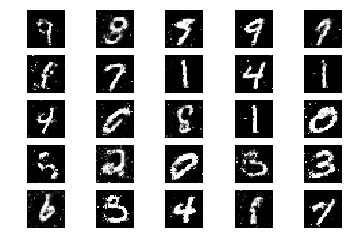

(32, 1) float64
(32, 1) float640.595263, acc.: 67.19%] [G loss: 1.005018]
(32, 1) float640.692009, acc.: 59.38%] [G loss: 0.941617]
(32, 1) float640.636503, acc.: 64.06%] [G loss: 1.029667]
(32, 1) float640.571847, acc.: 70.31%] [G loss: 1.039999]
(32, 1) float640.629183, acc.: 65.62%] [G loss: 1.091069]
(32, 1) float640.593727, acc.: 67.19%] [G loss: 1.071759]
(32, 1) float640.657481, acc.: 64.06%] [G loss: 1.010585]
(32, 1) float640.650603, acc.: 62.50%] [G loss: 1.052204]
(32, 1) float640.633268, acc.: 62.50%] [G loss: 0.976066]
(32, 1) float640.660374, acc.: 56.25%] [G loss: 1.148338]
(32, 1) float640.664691, acc.: 56.25%] [G loss: 0.961309]
(32, 1) float640.687377, acc.: 56.25%] [G loss: 0.934683]
(32, 1) float640.574835, acc.: 73.44%] [G loss: 0.962302]
(32, 1) float640.682334, acc.: 54.69%] [G loss: 0.999984]
(32, 1) float640.638573, acc.: 62.50%] [G loss: 1.073381]
(32, 1) float640.575530, acc.: 70.31%] [G loss: 0.944003]
(32, 1) float640.589106, acc.: 76.56%] [G loss: 1.012123

(32, 1) float640.568504, acc.: 73.44%] [G loss: 0.945022]
(32, 1) float640.592869, acc.: 68.75%] [G loss: 0.924996]
(32, 1) float640.676876, acc.: 56.25%] [G loss: 0.884948]
(32, 1) float640.647177, acc.: 65.62%] [G loss: 0.980400]
(32, 1) float640.542111, acc.: 78.12%] [G loss: 1.065716]
(32, 1) float640.611059, acc.: 67.19%] [G loss: 1.051348]
(32, 1) float640.671209, acc.: 67.19%] [G loss: 1.050551]
(32, 1) float640.622093, acc.: 70.31%] [G loss: 1.007425]
(32, 1) float640.720743, acc.: 54.69%] [G loss: 0.985482]
(32, 1) float640.632380, acc.: 64.06%] [G loss: 0.924739]
(32, 1) float640.631326, acc.: 65.62%] [G loss: 0.923374]
(32, 1) float640.630625, acc.: 67.19%] [G loss: 0.993567]
(32, 1) float640.630634, acc.: 64.06%] [G loss: 0.961180]
(32, 1) float640.648955, acc.: 62.50%] [G loss: 0.916354]
(32, 1) float640.572879, acc.: 67.19%] [G loss: 0.962598]
(32, 1) float640.641435, acc.: 60.94%] [G loss: 0.977819]
(32, 1) float640.664744, acc.: 67.19%] [G loss: 0.907577]
(32, 1) float6

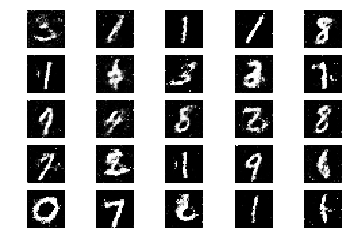

(32, 1) float64
(32, 1) float640.666157, acc.: 60.94%] [G loss: 0.994225]
(32, 1) float640.632815, acc.: 68.75%] [G loss: 0.867469]
(32, 1) float640.550578, acc.: 73.44%] [G loss: 0.950731]
(32, 1) float640.676162, acc.: 57.81%] [G loss: 1.008543]
(32, 1) float640.634560, acc.: 57.81%] [G loss: 1.023378]
(32, 1) float640.623075, acc.: 67.19%] [G loss: 1.016643]
(32, 1) float640.598355, acc.: 70.31%] [G loss: 1.047788]
(32, 1) float640.665376, acc.: 59.38%] [G loss: 0.994301]
(32, 1) float640.633729, acc.: 65.62%] [G loss: 0.951042]
(32, 1) float640.647538, acc.: 62.50%] [G loss: 1.040670]
(32, 1) float640.600513, acc.: 67.19%] [G loss: 1.126923]
(32, 1) float640.613970, acc.: 62.50%] [G loss: 1.043761]
(32, 1) float640.660746, acc.: 62.50%] [G loss: 1.015543]
(32, 1) float640.635239, acc.: 60.94%] [G loss: 1.020107]
(32, 1) float640.575997, acc.: 70.31%] [G loss: 0.982572]
(32, 1) float640.599114, acc.: 64.06%] [G loss: 1.008627]
(32, 1) float640.602063, acc.: 73.44%] [G loss: 0.999530

(32, 1) float640.638927, acc.: 65.62%] [G loss: 0.869813]
(32, 1) float640.669852, acc.: 62.50%] [G loss: 1.016461]
(32, 1) float640.643177, acc.: 68.75%] [G loss: 0.873499]
(32, 1) float640.707627, acc.: 53.12%] [G loss: 0.960370]
(32, 1) float640.723072, acc.: 50.00%] [G loss: 1.020305]
(32, 1) float640.607051, acc.: 64.06%] [G loss: 1.091486]
(32, 1) float640.626427, acc.: 57.81%] [G loss: 1.061304]
(32, 1) float640.578563, acc.: 62.50%] [G loss: 1.059971]
(32, 1) float640.648921, acc.: 62.50%] [G loss: 1.007379]
(32, 1) float640.601245, acc.: 71.88%] [G loss: 0.925095]
(32, 1) float640.553211, acc.: 73.44%] [G loss: 0.964978]
(32, 1) float640.681468, acc.: 57.81%] [G loss: 0.911417]
(32, 1) float640.668649, acc.: 56.25%] [G loss: 0.974680]
(32, 1) float640.586000, acc.: 73.44%] [G loss: 0.951616]
(32, 1) float640.640209, acc.: 59.38%] [G loss: 0.876072]
(32, 1) float640.638649, acc.: 62.50%] [G loss: 1.041447]
(32, 1) float640.563945, acc.: 67.19%] [G loss: 1.033256]
(32, 1) float6

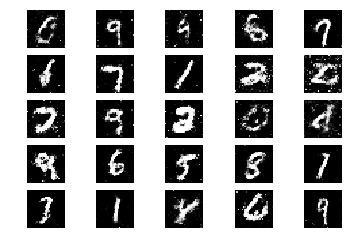

(32, 1) float64
(32, 1) float640.618170, acc.: 71.88%] [G loss: 0.926981]
(32, 1) float640.624591, acc.: 67.19%] [G loss: 0.966017]
(32, 1) float640.658254, acc.: 64.06%] [G loss: 0.992410]
(32, 1) float640.648336, acc.: 65.62%] [G loss: 1.019802]
(32, 1) float640.674448, acc.: 56.25%] [G loss: 1.005747]
(32, 1) float640.647467, acc.: 65.62%] [G loss: 1.044356]
(32, 1) float640.597972, acc.: 64.06%] [G loss: 1.002896]
(32, 1) float640.653420, acc.: 67.19%] [G loss: 1.005038]
(32, 1) float640.575581, acc.: 67.19%] [G loss: 0.950087]
(32, 1) float640.655104, acc.: 62.50%] [G loss: 0.939118]
(32, 1) float640.647350, acc.: 60.94%] [G loss: 0.977329]
(32, 1) float640.587146, acc.: 65.62%] [G loss: 0.922040]
(32, 1) float640.666954, acc.: 50.00%] [G loss: 1.017897]
(32, 1) float640.687082, acc.: 57.81%] [G loss: 0.985658]
(32, 1) float640.668605, acc.: 64.06%] [G loss: 0.943555]
(32, 1) float640.644334, acc.: 56.25%] [G loss: 0.941105]
(32, 1) float640.596221, acc.: 73.44%] [G loss: 0.973518

(32, 1) float640.641985, acc.: 65.62%] [G loss: 0.904153]
(32, 1) float640.655946, acc.: 57.81%] [G loss: 0.949871]
(32, 1) float640.588601, acc.: 70.31%] [G loss: 1.031960]
(32, 1) float640.656774, acc.: 60.94%] [G loss: 0.975988]
(32, 1) float640.695652, acc.: 54.69%] [G loss: 0.938672]
(32, 1) float640.623127, acc.: 64.06%] [G loss: 0.993696]
(32, 1) float640.653980, acc.: 64.06%] [G loss: 0.961630]
(32, 1) float640.649367, acc.: 57.81%] [G loss: 1.126496]
(32, 1) float640.614734, acc.: 68.75%] [G loss: 0.940488]
(32, 1) float640.639174, acc.: 57.81%] [G loss: 0.944365]
(32, 1) float640.654733, acc.: 57.81%] [G loss: 1.007421]
(32, 1) float640.688230, acc.: 48.44%] [G loss: 1.027714]
(32, 1) float640.570959, acc.: 75.00%] [G loss: 0.971724]
(32, 1) float640.658978, acc.: 57.81%] [G loss: 0.968464]
(32, 1) float640.632870, acc.: 64.06%] [G loss: 0.967110]
(32, 1) float640.599295, acc.: 65.62%] [G loss: 0.953744]
(32, 1) float640.590639, acc.: 70.31%] [G loss: 1.089314]
(32, 1) float6

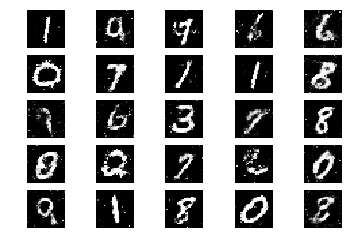

(32, 1) float64
(32, 1) float640.733211, acc.: 54.69%] [G loss: 1.093581]
(32, 1) float640.634289, acc.: 64.06%] [G loss: 0.991338]
(32, 1) float640.590129, acc.: 68.75%] [G loss: 0.985952]
(32, 1) float640.604088, acc.: 64.06%] [G loss: 1.045809]
(32, 1) float640.614266, acc.: 64.06%] [G loss: 0.901658]
(32, 1) float640.703715, acc.: 57.81%] [G loss: 0.912955]
(32, 1) float640.602286, acc.: 70.31%] [G loss: 1.025640]
(32, 1) float640.636856, acc.: 65.62%] [G loss: 0.958255]
(32, 1) float640.574367, acc.: 73.44%] [G loss: 1.050234]
(32, 1) float640.687305, acc.: 54.69%] [G loss: 1.057917]
(32, 1) float640.609639, acc.: 67.19%] [G loss: 1.008853]
(32, 1) float640.653903, acc.: 70.31%] [G loss: 1.015058]
(32, 1) float640.753194, acc.: 53.12%] [G loss: 0.928906]
(32, 1) float640.576035, acc.: 70.31%] [G loss: 0.939453]
(32, 1) float640.624558, acc.: 65.62%] [G loss: 0.887973]
(32, 1) float640.629824, acc.: 65.62%] [G loss: 0.943812]
(32, 1) float640.620506, acc.: 65.62%] [G loss: 0.955796

(32, 1) float640.607969, acc.: 67.19%] [G loss: 0.951354]
(32, 1) float640.643274, acc.: 71.88%] [G loss: 0.992681]
(32, 1) float640.593850, acc.: 60.94%] [G loss: 0.870636]
(32, 1) float640.716373, acc.: 53.12%] [G loss: 0.867290]
(32, 1) float640.667292, acc.: 57.81%] [G loss: 0.936370]
(32, 1) float640.689351, acc.: 59.38%] [G loss: 1.007911]
(32, 1) float640.597773, acc.: 62.50%] [G loss: 0.995122]
(32, 1) float640.692396, acc.: 54.69%] [G loss: 0.941837]
(32, 1) float640.611682, acc.: 65.62%] [G loss: 0.978666]
(32, 1) float640.554481, acc.: 79.69%] [G loss: 0.995465]
(32, 1) float640.591386, acc.: 71.88%] [G loss: 0.967700]
(32, 1) float640.667977, acc.: 62.50%] [G loss: 0.979490]
(32, 1) float640.607417, acc.: 71.88%] [G loss: 0.910473]
(32, 1) float640.569120, acc.: 70.31%] [G loss: 0.903961]
(32, 1) float640.710903, acc.: 60.94%] [G loss: 1.035648]
(32, 1) float640.621747, acc.: 62.50%] [G loss: 0.998877]
(32, 1) float640.689089, acc.: 62.50%] [G loss: 1.044915]
(32, 1) float6

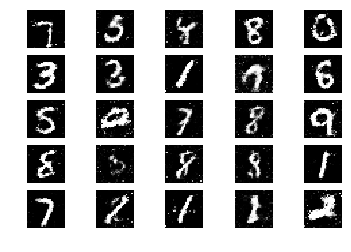

(32, 1) float64
(32, 1) float640.620026, acc.: 62.50%] [G loss: 0.987260]
(32, 1) float640.612719, acc.: 67.19%] [G loss: 0.972689]
(32, 1) float640.673436, acc.: 56.25%] [G loss: 1.068164]
(32, 1) float640.575697, acc.: 67.19%] [G loss: 1.098683]
(32, 1) float640.631230, acc.: 62.50%] [G loss: 0.915887]
(32, 1) float640.689158, acc.: 51.56%] [G loss: 0.941933]
(32, 1) float640.583679, acc.: 71.88%] [G loss: 1.007477]
(32, 1) float640.643802, acc.: 64.06%] [G loss: 1.011383]
(32, 1) float640.650858, acc.: 65.62%] [G loss: 0.899948]
(32, 1) float640.606837, acc.: 64.06%] [G loss: 1.001081]
(32, 1) float640.604521, acc.: 67.19%] [G loss: 0.959834]
(32, 1) float640.632721, acc.: 59.38%] [G loss: 0.952454]
(32, 1) float640.622462, acc.: 70.31%] [G loss: 1.000352]
(32, 1) float640.598345, acc.: 73.44%] [G loss: 1.032912]
(32, 1) float640.612753, acc.: 64.06%] [G loss: 0.950379]
(32, 1) float640.605002, acc.: 64.06%] [G loss: 0.908785]
(32, 1) float640.682806, acc.: 57.81%] [G loss: 0.871902

(32, 1) float640.618580, acc.: 60.94%] [G loss: 0.896373]
(32, 1) float640.629374, acc.: 64.06%] [G loss: 0.986279]
(32, 1) float640.587565, acc.: 70.31%] [G loss: 1.066190]
(32, 1) float640.751973, acc.: 51.56%] [G loss: 0.956934]
(32, 1) float640.586198, acc.: 70.31%] [G loss: 1.028843]
(32, 1) float640.611520, acc.: 65.62%] [G loss: 0.982237]
(32, 1) float640.597913, acc.: 70.31%] [G loss: 1.099555]
(32, 1) float640.768251, acc.: 53.12%] [G loss: 0.999439]
(32, 1) float640.574594, acc.: 71.88%] [G loss: 1.047866]
(32, 1) float640.695500, acc.: 54.69%] [G loss: 0.977517]
(32, 1) float640.613436, acc.: 67.19%] [G loss: 1.016898]
(32, 1) float640.711018, acc.: 59.38%] [G loss: 0.897112]
(32, 1) float640.583527, acc.: 75.00%] [G loss: 1.035770]
(32, 1) float640.646328, acc.: 65.62%] [G loss: 1.028813]
(32, 1) float640.670775, acc.: 60.94%] [G loss: 1.004679]
(32, 1) float640.604680, acc.: 68.75%] [G loss: 1.024963]
(32, 1) float640.703276, acc.: 53.12%] [G loss: 1.110143]
(32, 1) float6

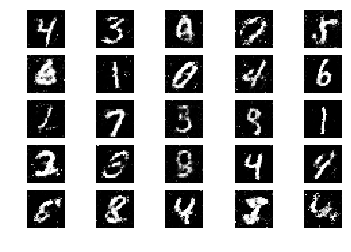

(32, 1) float64
(32, 1) float640.672851, acc.: 56.25%] [G loss: 0.897058]
(32, 1) float640.631146, acc.: 64.06%] [G loss: 0.926908]
(32, 1) float640.622920, acc.: 64.06%] [G loss: 1.075814]
(32, 1) float640.690390, acc.: 57.81%] [G loss: 1.133908]
(32, 1) float640.671482, acc.: 65.62%] [G loss: 0.984228]
(32, 1) float640.644957, acc.: 65.62%] [G loss: 1.010948]
(32, 1) float640.785375, acc.: 50.00%] [G loss: 1.011205]
(32, 1) float640.649584, acc.: 57.81%] [G loss: 1.016605]
(32, 1) float640.672989, acc.: 62.50%] [G loss: 0.988837]
(32, 1) float640.652044, acc.: 59.38%] [G loss: 0.915088]
(32, 1) float640.593928, acc.: 68.75%] [G loss: 1.022448]
(32, 1) float640.700330, acc.: 48.44%] [G loss: 1.037138]
(32, 1) float640.628621, acc.: 60.94%] [G loss: 1.045515]
(32, 1) float640.645025, acc.: 56.25%] [G loss: 0.958799]
(32, 1) float640.619370, acc.: 67.19%] [G loss: 1.184995]
(32, 1) float640.685787, acc.: 57.81%] [G loss: 0.993783]
(32, 1) float640.611581, acc.: 68.75%] [G loss: 0.981346

(32, 1) float640.680252, acc.: 54.69%] [G loss: 0.961164]
(32, 1) float640.674749, acc.: 68.75%] [G loss: 0.978776]
(32, 1) float640.547174, acc.: 75.00%] [G loss: 0.965006]
(32, 1) float640.625016, acc.: 64.06%] [G loss: 1.094294]
(32, 1) float640.632545, acc.: 70.31%] [G loss: 1.109403]
(32, 1) float640.655433, acc.: 59.38%] [G loss: 1.061914]
(32, 1) float640.684669, acc.: 57.81%] [G loss: 0.945783]
(32, 1) float640.641150, acc.: 62.50%] [G loss: 1.034002]
(32, 1) float640.677149, acc.: 51.56%] [G loss: 0.988366]
(32, 1) float640.642053, acc.: 59.38%] [G loss: 1.019852]
(32, 1) float640.676496, acc.: 62.50%] [G loss: 0.913117]
(32, 1) float640.617269, acc.: 62.50%] [G loss: 0.877684]
(32, 1) float640.633116, acc.: 56.25%] [G loss: 0.986455]
(32, 1) float640.625276, acc.: 67.19%] [G loss: 0.931692]
(32, 1) float640.670305, acc.: 57.81%] [G loss: 0.904894]
(32, 1) float640.586133, acc.: 70.31%] [G loss: 0.964772]
(32, 1) float640.646585, acc.: 59.38%] [G loss: 1.062058]
(32, 1) float6

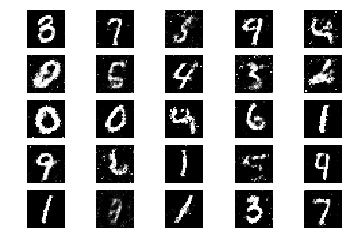

(32, 1) float64
(32, 1) float640.638707, acc.: 64.06%] [G loss: 0.987222]
(32, 1) float640.650966, acc.: 62.50%] [G loss: 0.865212]
(32, 1) float640.664589, acc.: 60.94%] [G loss: 0.979176]
(32, 1) float640.647145, acc.: 60.94%] [G loss: 1.047917]
(32, 1) float640.680390, acc.: 60.94%] [G loss: 1.016094]
(32, 1) float640.683772, acc.: 57.81%] [G loss: 0.972092]
(32, 1) float640.699058, acc.: 50.00%] [G loss: 0.929443]
(32, 1) float640.585259, acc.: 71.88%] [G loss: 1.058373]
(32, 1) float640.591172, acc.: 70.31%] [G loss: 0.910947]
(32, 1) float640.712717, acc.: 51.56%] [G loss: 0.999231]
(32, 1) float640.604399, acc.: 64.06%] [G loss: 0.854502]
(32, 1) float640.695980, acc.: 59.38%] [G loss: 1.037351]
(32, 1) float640.666222, acc.: 59.38%] [G loss: 1.017568]
(32, 1) float640.699915, acc.: 53.12%] [G loss: 0.964037]
(32, 1) float640.615572, acc.: 65.62%] [G loss: 0.885442]
(32, 1) float640.603966, acc.: 70.31%] [G loss: 0.943286]
(32, 1) float640.667815, acc.: 57.81%] [G loss: 0.992221

(32, 1) float640.661380, acc.: 60.94%] [G loss: 0.937251]
(32, 1) float640.574829, acc.: 71.88%] [G loss: 1.043337]
(32, 1) float640.689317, acc.: 56.25%] [G loss: 1.026614]
(32, 1) float640.645647, acc.: 59.38%] [G loss: 1.044664]
(32, 1) float640.567585, acc.: 76.56%] [G loss: 1.101837]
(32, 1) float640.613414, acc.: 68.75%] [G loss: 0.934798]
(32, 1) float640.683369, acc.: 65.62%] [G loss: 0.989537]
(32, 1) float640.679819, acc.: 64.06%] [G loss: 1.099194]
(32, 1) float640.593351, acc.: 70.31%] [G loss: 0.883728]
(32, 1) float640.662944, acc.: 62.50%] [G loss: 1.052153]
(32, 1) float640.621896, acc.: 67.19%] [G loss: 0.999110]
(32, 1) float640.597335, acc.: 71.88%] [G loss: 0.973574]
(32, 1) float640.646709, acc.: 70.31%] [G loss: 1.005414]
(32, 1) float640.629120, acc.: 65.62%] [G loss: 1.014099]
(32, 1) float640.626411, acc.: 71.88%] [G loss: 0.986309]
(32, 1) float640.590724, acc.: 71.88%] [G loss: 1.032105]
(32, 1) float640.608336, acc.: 65.62%] [G loss: 1.116190]
(32, 1) float6

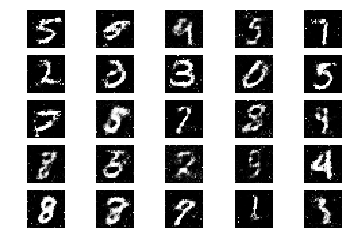

(32, 1) float64
(32, 1) float640.611378, acc.: 64.06%] [G loss: 1.030426]
(32, 1) float640.626667, acc.: 65.62%] [G loss: 0.957556]
(32, 1) float640.715153, acc.: 56.25%] [G loss: 1.161294]
(32, 1) float640.646388, acc.: 67.19%] [G loss: 1.022069]
(32, 1) float640.635073, acc.: 67.19%] [G loss: 0.916469]
(32, 1) float640.715209, acc.: 54.69%] [G loss: 1.003186]
(32, 1) float640.646042, acc.: 65.62%] [G loss: 0.952138]
(32, 1) float640.686716, acc.: 57.81%] [G loss: 1.044801]
(32, 1) float640.670875, acc.: 59.38%] [G loss: 1.023918]
(32, 1) float640.655120, acc.: 62.50%] [G loss: 0.991301]
(32, 1) float640.635798, acc.: 65.62%] [G loss: 1.033314]
(32, 1) float640.550517, acc.: 71.88%] [G loss: 1.032762]
(32, 1) float640.602880, acc.: 67.19%] [G loss: 0.910064]
(32, 1) float640.610547, acc.: 65.62%] [G loss: 0.958085]
(32, 1) float640.713106, acc.: 56.25%] [G loss: 0.920884]
(32, 1) float640.616239, acc.: 67.19%] [G loss: 1.040413]
(32, 1) float640.544405, acc.: 76.56%] [G loss: 1.038384

(32, 1) float640.563803, acc.: 71.88%] [G loss: 0.953725]
(32, 1) float640.693075, acc.: 59.38%] [G loss: 0.934566]
(32, 1) float640.673585, acc.: 54.69%] [G loss: 0.946852]
(32, 1) float640.647938, acc.: 67.19%] [G loss: 1.061274]
(32, 1) float640.667370, acc.: 62.50%] [G loss: 1.005944]
(32, 1) float640.641359, acc.: 64.06%] [G loss: 1.031429]
(32, 1) float640.680565, acc.: 60.94%] [G loss: 0.925604]
(32, 1) float640.651945, acc.: 60.94%] [G loss: 0.993108]
(32, 1) float640.676977, acc.: 48.44%] [G loss: 0.939951]
(32, 1) float640.585720, acc.: 64.06%] [G loss: 0.959957]
(32, 1) float640.659147, acc.: 62.50%] [G loss: 1.019209]
(32, 1) float640.646664, acc.: 60.94%] [G loss: 0.954690]
(32, 1) float640.603424, acc.: 71.88%] [G loss: 1.068693]
(32, 1) float640.579381, acc.: 68.75%] [G loss: 1.049210]
(32, 1) float640.604658, acc.: 67.19%] [G loss: 1.018186]
(32, 1) float640.692065, acc.: 60.94%] [G loss: 1.052701]
(32, 1) float640.606432, acc.: 65.62%] [G loss: 0.941437]
(32, 1) float6

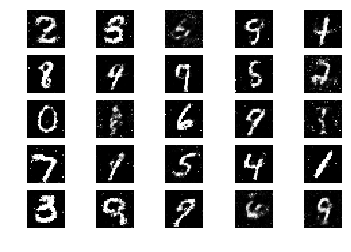

(32, 1) float64
(32, 1) float640.629009, acc.: 62.50%] [G loss: 1.036748]
(32, 1) float640.669986, acc.: 59.38%] [G loss: 1.070398]
(32, 1) float640.660321, acc.: 60.94%] [G loss: 0.970898]
(32, 1) float640.633146, acc.: 64.06%] [G loss: 0.928057]
(32, 1) float640.657354, acc.: 65.62%] [G loss: 0.874998]
(32, 1) float640.611617, acc.: 64.06%] [G loss: 0.780161]
(32, 1) float640.649813, acc.: 56.25%] [G loss: 0.840632]
(32, 1) float640.568140, acc.: 60.94%] [G loss: 1.014120]
(32, 1) float640.641245, acc.: 54.69%] [G loss: 0.929737]
(32, 1) float640.627904, acc.: 59.38%] [G loss: 0.961565]
(32, 1) float640.649374, acc.: 62.50%] [G loss: 1.016814]
(32, 1) float640.630942, acc.: 60.94%] [G loss: 0.995284]
(32, 1) float640.603297, acc.: 67.19%] [G loss: 0.947784]
(32, 1) float640.700555, acc.: 59.38%] [G loss: 0.996437]
(32, 1) float640.622176, acc.: 68.75%] [G loss: 1.018545]
(32, 1) float640.597359, acc.: 68.75%] [G loss: 1.143791]
(32, 1) float640.599918, acc.: 62.50%] [G loss: 0.913560

(32, 1) float640.608293, acc.: 57.81%] [G loss: 1.036356]
(32, 1) float640.615703, acc.: 71.88%] [G loss: 1.080546]
(32, 1) float640.639240, acc.: 70.31%] [G loss: 1.101924]
(32, 1) float640.664411, acc.: 60.94%] [G loss: 1.041776]
(32, 1) float640.636389, acc.: 62.50%] [G loss: 0.952764]
(32, 1) float640.723209, acc.: 48.44%] [G loss: 1.011057]
(32, 1) float640.687438, acc.: 45.31%] [G loss: 1.067203]
(32, 1) float640.607838, acc.: 64.06%] [G loss: 0.892545]
(32, 1) float640.638946, acc.: 62.50%] [G loss: 0.993753]
(32, 1) float640.586877, acc.: 65.62%] [G loss: 1.087751]
(32, 1) float640.641854, acc.: 62.50%] [G loss: 0.992674]
(32, 1) float640.657368, acc.: 57.81%] [G loss: 0.985145]
(32, 1) float640.645539, acc.: 62.50%] [G loss: 1.135169]
(32, 1) float640.576013, acc.: 67.19%] [G loss: 1.000676]
(32, 1) float640.671004, acc.: 64.06%] [G loss: 0.935923]
(32, 1) float640.572016, acc.: 65.62%] [G loss: 0.950871]
(32, 1) float640.612629, acc.: 65.62%] [G loss: 1.007756]
(32, 1) float6

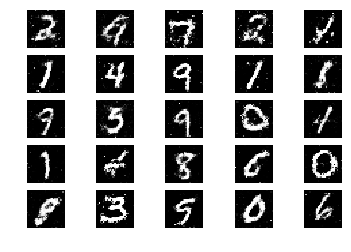

(32, 1) float64
(32, 1) float640.646608, acc.: 57.81%] [G loss: 0.962759]
(32, 1) float640.655025, acc.: 60.94%] [G loss: 0.858632]
(32, 1) float640.580701, acc.: 75.00%] [G loss: 0.964197]
(32, 1) float640.646626, acc.: 62.50%] [G loss: 1.003366]
(32, 1) float640.651309, acc.: 65.62%] [G loss: 0.932469]
(32, 1) float640.679536, acc.: 57.81%] [G loss: 0.917814]
(32, 1) float640.562621, acc.: 78.12%] [G loss: 0.934925]
(32, 1) float640.562251, acc.: 70.31%] [G loss: 0.912828]
(32, 1) float640.616123, acc.: 60.94%] [G loss: 0.841453]
(32, 1) float640.621581, acc.: 68.75%] [G loss: 0.981800]
(32, 1) float640.616207, acc.: 65.62%] [G loss: 1.083504]
(32, 1) float640.609671, acc.: 67.19%] [G loss: 1.040247]
(32, 1) float640.628672, acc.: 59.38%] [G loss: 1.002088]
(32, 1) float640.635193, acc.: 67.19%] [G loss: 0.896050]
(32, 1) float640.679301, acc.: 56.25%] [G loss: 0.993407]
(32, 1) float640.658331, acc.: 68.75%] [G loss: 1.009013]
(32, 1) float640.701172, acc.: 60.94%] [G loss: 0.872929

(32, 1) float640.657444, acc.: 54.69%] [G loss: 0.930839]
(32, 1) float640.625419, acc.: 65.62%] [G loss: 0.947514]
(32, 1) float640.600257, acc.: 64.06%] [G loss: 0.915786]
(32, 1) float640.619364, acc.: 64.06%] [G loss: 1.079138]
(32, 1) float640.584274, acc.: 70.31%] [G loss: 1.044434]
(32, 1) float640.650040, acc.: 65.62%] [G loss: 0.907969]
(32, 1) float640.678146, acc.: 64.06%] [G loss: 0.979032]
(32, 1) float640.714392, acc.: 59.38%] [G loss: 1.019492]
(32, 1) float640.645690, acc.: 57.81%] [G loss: 0.919087]
(32, 1) float640.658679, acc.: 62.50%] [G loss: 0.942207]
(32, 1) float640.734689, acc.: 54.69%] [G loss: 0.903152]
(32, 1) float640.631958, acc.: 60.94%] [G loss: 1.057628]
(32, 1) float640.572286, acc.: 76.56%] [G loss: 1.025884]
(32, 1) float640.583191, acc.: 68.75%] [G loss: 1.000061]
(32, 1) float640.655334, acc.: 60.94%] [G loss: 1.087387]
(32, 1) float640.671429, acc.: 56.25%] [G loss: 0.999014]
(32, 1) float640.677845, acc.: 59.38%] [G loss: 1.033828]
(32, 1) float6

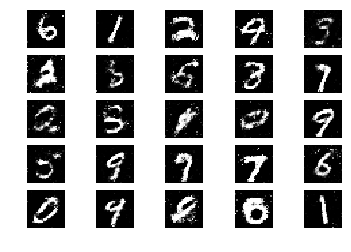

(32, 1) float64
(32, 1) float640.632676, acc.: 62.50%] [G loss: 0.954397]
(32, 1) float640.694443, acc.: 53.12%] [G loss: 0.936587]
(32, 1) float640.694959, acc.: 54.69%] [G loss: 0.886549]
(32, 1) float640.601209, acc.: 70.31%] [G loss: 1.047478]
(32, 1) float640.596352, acc.: 70.31%] [G loss: 1.051719]
(32, 1) float640.565660, acc.: 73.44%] [G loss: 1.015739]
(32, 1) float640.693309, acc.: 62.50%] [G loss: 1.009061]
(32, 1) float640.626984, acc.: 65.62%] [G loss: 1.072844]
(32, 1) float640.615711, acc.: 65.62%] [G loss: 1.082981]
(32, 1) float640.696344, acc.: 54.69%] [G loss: 1.024915]
(32, 1) float640.662455, acc.: 57.81%] [G loss: 1.004717]
(32, 1) float640.566321, acc.: 71.88%] [G loss: 1.013994]
(32, 1) float640.651291, acc.: 64.06%] [G loss: 0.999299]
(32, 1) float640.604351, acc.: 67.19%] [G loss: 0.978487]
(32, 1) float640.662543, acc.: 60.94%] [G loss: 0.885543]
(32, 1) float640.665795, acc.: 56.25%] [G loss: 0.990641]
(32, 1) float640.629750, acc.: 62.50%] [G loss: 0.964991

(32, 1) float640.605999, acc.: 68.75%] [G loss: 0.918639]
(32, 1) float640.610858, acc.: 65.62%] [G loss: 0.929160]
(32, 1) float640.617918, acc.: 71.88%] [G loss: 0.881817]
(32, 1) float640.634884, acc.: 68.75%] [G loss: 0.951822]
(32, 1) float640.591999, acc.: 65.62%] [G loss: 1.024651]
(32, 1) float640.588617, acc.: 68.75%] [G loss: 0.991213]
(32, 1) float640.628183, acc.: 67.19%] [G loss: 1.008365]
(32, 1) float640.639937, acc.: 65.62%] [G loss: 1.010372]
(32, 1) float640.595525, acc.: 70.31%] [G loss: 0.974677]
(32, 1) float640.603482, acc.: 64.06%] [G loss: 1.040135]
(32, 1) float640.613649, acc.: 64.06%] [G loss: 0.965493]
(32, 1) float640.639610, acc.: 68.75%] [G loss: 0.911908]
(32, 1) float640.572315, acc.: 73.44%] [G loss: 0.964519]
(32, 1) float640.570590, acc.: 71.88%] [G loss: 1.034047]
(32, 1) float640.643906, acc.: 62.50%] [G loss: 0.920020]
(32, 1) float640.657768, acc.: 57.81%] [G loss: 0.876161]
(32, 1) float640.583840, acc.: 78.12%] [G loss: 0.918978]
(32, 1) float6

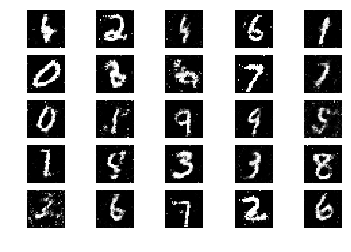

(32, 1) float64
(32, 1) float640.653543, acc.: 62.50%] [G loss: 0.954471]
(32, 1) float640.638015, acc.: 62.50%] [G loss: 1.005084]
(32, 1) float640.668023, acc.: 53.12%] [G loss: 1.132548]
(32, 1) float640.674213, acc.: 60.94%] [G loss: 0.937675]
(32, 1) float640.627833, acc.: 65.62%] [G loss: 0.984658]
(32, 1) float640.656580, acc.: 57.81%] [G loss: 0.904601]
(32, 1) float640.667609, acc.: 59.38%] [G loss: 0.983366]
(32, 1) float640.579730, acc.: 71.88%] [G loss: 1.006482]
(32, 1) float640.552516, acc.: 71.88%] [G loss: 1.011388]
(32, 1) float640.551922, acc.: 73.44%] [G loss: 1.061732]
(32, 1) float640.720432, acc.: 54.69%] [G loss: 0.982188]
(32, 1) float640.667275, acc.: 54.69%] [G loss: 0.941683]
(32, 1) float640.685322, acc.: 53.12%] [G loss: 1.070094]
(32, 1) float640.630986, acc.: 65.62%] [G loss: 0.975053]
(32, 1) float640.638881, acc.: 57.81%] [G loss: 1.017434]
(32, 1) float640.687380, acc.: 54.69%] [G loss: 0.938794]
(32, 1) float640.686356, acc.: 59.38%] [G loss: 0.960204

(32, 1) float640.591370, acc.: 65.62%] [G loss: 1.053426]
(32, 1) float640.629108, acc.: 71.88%] [G loss: 1.054981]
(32, 1) float640.606705, acc.: 62.50%] [G loss: 0.989227]
(32, 1) float640.624434, acc.: 70.31%] [G loss: 1.002790]
(32, 1) float640.644676, acc.: 62.50%] [G loss: 1.057822]
(32, 1) float640.677430, acc.: 54.69%] [G loss: 1.033518]
(32, 1) float640.611116, acc.: 62.50%] [G loss: 1.039572]
(32, 1) float640.624761, acc.: 67.19%] [G loss: 0.924212]
(32, 1) float640.574000, acc.: 73.44%] [G loss: 0.946279]
(32, 1) float640.642837, acc.: 62.50%] [G loss: 0.926273]
(32, 1) float640.606437, acc.: 70.31%] [G loss: 0.904706]
(32, 1) float640.610075, acc.: 68.75%] [G loss: 0.929521]
(32, 1) float640.705624, acc.: 56.25%] [G loss: 0.937047]
(32, 1) float640.709789, acc.: 64.06%] [G loss: 0.873641]
(32, 1) float640.651399, acc.: 64.06%] [G loss: 1.011600]
(32, 1) float640.569719, acc.: 75.00%] [G loss: 1.014801]
(32, 1) float640.692679, acc.: 53.12%] [G loss: 0.922473]
(32, 1) float6

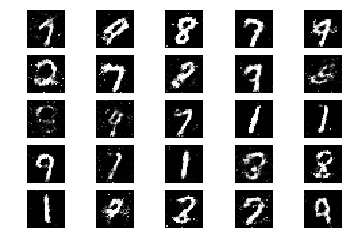

(32, 1) float64
(32, 1) float640.647465, acc.: 57.81%] [G loss: 0.984854]
(32, 1) float640.659985, acc.: 59.38%] [G loss: 0.931880]
(32, 1) float640.671247, acc.: 60.94%] [G loss: 0.867577]
(32, 1) float640.596770, acc.: 67.19%] [G loss: 1.135126]
(32, 1) float640.600861, acc.: 68.75%] [G loss: 1.069609]
(32, 1) float640.622390, acc.: 67.19%] [G loss: 0.979062]
(32, 1) float640.670283, acc.: 56.25%] [G loss: 0.939816]
(32, 1) float640.716324, acc.: 50.00%] [G loss: 0.868347]
(32, 1) float640.704871, acc.: 53.12%] [G loss: 1.046584]
(32, 1) float640.654232, acc.: 64.06%] [G loss: 0.980090]
(32, 1) float640.595815, acc.: 68.75%] [G loss: 1.020388]
(32, 1) float640.603103, acc.: 71.88%] [G loss: 0.975085]
(32, 1) float640.715673, acc.: 54.69%] [G loss: 0.874679]
(32, 1) float640.686329, acc.: 54.69%] [G loss: 0.866797]
(32, 1) float640.625169, acc.: 64.06%] [G loss: 0.965009]
(32, 1) float640.608673, acc.: 62.50%] [G loss: 1.003802]
(32, 1) float640.641839, acc.: 64.06%] [G loss: 0.959620

(32, 1) float640.609595, acc.: 64.06%] [G loss: 0.953253]
(32, 1) float640.632125, acc.: 67.19%] [G loss: 1.027697]
(32, 1) float640.668633, acc.: 54.69%] [G loss: 1.017144]
(32, 1) float640.656979, acc.: 67.19%] [G loss: 0.920909]
(32, 1) float640.675517, acc.: 54.69%] [G loss: 0.869990]
(32, 1) float640.686777, acc.: 59.38%] [G loss: 0.944828]
(32, 1) float640.644346, acc.: 57.81%] [G loss: 0.995173]
(32, 1) float640.550968, acc.: 76.56%] [G loss: 1.041006]
(32, 1) float640.716198, acc.: 51.56%] [G loss: 0.898512]
(32, 1) float640.691408, acc.: 60.94%] [G loss: 1.018271]
(32, 1) float640.624638, acc.: 60.94%] [G loss: 1.044990]
(32, 1) float640.620122, acc.: 64.06%] [G loss: 0.942644]
(32, 1) float640.617792, acc.: 60.94%] [G loss: 1.023797]
(32, 1) float640.635488, acc.: 59.38%] [G loss: 1.111559]
(32, 1) float640.634325, acc.: 59.38%] [G loss: 1.057290]
(32, 1) float640.653223, acc.: 51.56%] [G loss: 1.108769]
(32, 1) float640.608926, acc.: 68.75%] [G loss: 1.109971]
(32, 1) float6

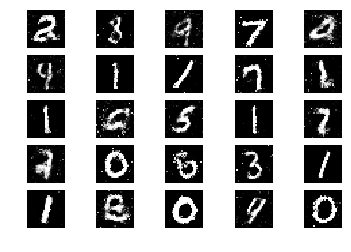

(32, 1) float64
(32, 1) float640.654882, acc.: 54.69%] [G loss: 1.026523]
(32, 1) float640.653825, acc.: 54.69%] [G loss: 0.979888]
(32, 1) float640.674102, acc.: 59.38%] [G loss: 0.907863]
(32, 1) float640.619572, acc.: 68.75%] [G loss: 1.006240]
(32, 1) float640.607823, acc.: 67.19%] [G loss: 1.037726]
(32, 1) float640.596471, acc.: 67.19%] [G loss: 0.981646]
(32, 1) float640.674750, acc.: 60.94%] [G loss: 0.929824]
(32, 1) float640.653028, acc.: 65.62%] [G loss: 1.003556]
(32, 1) float640.669617, acc.: 62.50%] [G loss: 1.000077]
(32, 1) float640.621170, acc.: 68.75%] [G loss: 1.092998]
(32, 1) float640.548660, acc.: 73.44%] [G loss: 1.003370]
(32, 1) float640.682143, acc.: 60.94%] [G loss: 0.955529]
(32, 1) float640.572084, acc.: 70.31%] [G loss: 0.973043]
(32, 1) float640.741716, acc.: 54.69%] [G loss: 0.998839]
(32, 1) float640.634074, acc.: 67.19%] [G loss: 1.080651]
(32, 1) float640.722604, acc.: 45.31%] [G loss: 1.032471]
(32, 1) float640.646002, acc.: 60.94%] [G loss: 0.998214

(32, 1) float640.647972, acc.: 60.94%] [G loss: 1.068098]
(32, 1) float640.715992, acc.: 60.94%] [G loss: 1.027676]
(32, 1) float640.597123, acc.: 64.06%] [G loss: 1.027319]
(32, 1) float640.668552, acc.: 59.38%] [G loss: 1.059888]
(32, 1) float640.673325, acc.: 65.62%] [G loss: 1.025210]
(32, 1) float640.655358, acc.: 64.06%] [G loss: 0.892873]
(32, 1) float640.592749, acc.: 68.75%] [G loss: 1.011170]
(32, 1) float640.634305, acc.: 64.06%] [G loss: 0.917464]
(32, 1) float640.651473, acc.: 67.19%] [G loss: 1.041135]
(32, 1) float640.717313, acc.: 42.19%] [G loss: 1.070455]
(32, 1) float640.633703, acc.: 62.50%] [G loss: 0.928173]
(32, 1) float640.735549, acc.: 56.25%] [G loss: 1.084780]
(32, 1) float640.656903, acc.: 62.50%] [G loss: 0.996950]
(32, 1) float640.664868, acc.: 60.94%] [G loss: 1.060879]
(32, 1) float640.637858, acc.: 68.75%] [G loss: 0.940813]
(32, 1) float640.603811, acc.: 68.75%] [G loss: 1.104760]
(32, 1) float640.663578, acc.: 60.94%] [G loss: 0.933096]
(32, 1) float6

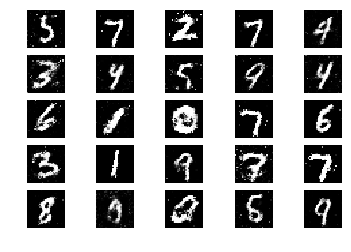

(32, 1) float64
(32, 1) float640.645955, acc.: 65.62%] [G loss: 0.927534]
(32, 1) float640.658934, acc.: 59.38%] [G loss: 0.917913]
(32, 1) float640.561534, acc.: 75.00%] [G loss: 0.945300]
(32, 1) float640.643427, acc.: 62.50%] [G loss: 0.991349]
(32, 1) float640.647686, acc.: 62.50%] [G loss: 1.005601]
(32, 1) float640.651813, acc.: 60.94%] [G loss: 0.915444]
(32, 1) float640.648366, acc.: 54.69%] [G loss: 0.947962]
(32, 1) float640.663577, acc.: 62.50%] [G loss: 0.875604]
(32, 1) float640.623373, acc.: 60.94%] [G loss: 1.039405]
(32, 1) float640.641726, acc.: 59.38%] [G loss: 1.130905]
(32, 1) float640.626708, acc.: 68.75%] [G loss: 1.015287]
(32, 1) float640.675016, acc.: 62.50%] [G loss: 1.039752]
(32, 1) float640.645320, acc.: 60.94%] [G loss: 0.977610]
(32, 1) float640.788004, acc.: 53.12%] [G loss: 0.975947]
(32, 1) float640.559965, acc.: 68.75%] [G loss: 0.993881]
(32, 1) float640.569811, acc.: 73.44%] [G loss: 1.017107]
(32, 1) float640.645182, acc.: 59.38%] [G loss: 1.042555

(32, 1) float640.670326, acc.: 60.94%] [G loss: 0.971443]
(32, 1) float640.692292, acc.: 54.69%] [G loss: 0.877918]
(32, 1) float640.598379, acc.: 67.19%] [G loss: 0.967652]
(32, 1) float640.616261, acc.: 62.50%] [G loss: 1.002024]
(32, 1) float640.590309, acc.: 78.12%] [G loss: 0.986952]
(32, 1) float640.610073, acc.: 62.50%] [G loss: 1.152679]
(32, 1) float640.650658, acc.: 65.62%] [G loss: 0.957204]
(32, 1) float640.685481, acc.: 56.25%] [G loss: 0.953322]
(32, 1) float640.638421, acc.: 60.94%] [G loss: 0.977238]
(32, 1) float640.635883, acc.: 62.50%] [G loss: 0.944524]
(32, 1) float640.604741, acc.: 68.75%] [G loss: 0.988228]
(32, 1) float640.670395, acc.: 62.50%] [G loss: 0.898648]
(32, 1) float640.677782, acc.: 57.81%] [G loss: 0.922117]
(32, 1) float640.575661, acc.: 64.06%] [G loss: 1.014791]
(32, 1) float640.671454, acc.: 51.56%] [G loss: 0.848423]
(32, 1) float640.583636, acc.: 70.31%] [G loss: 0.956408]
(32, 1) float640.657510, acc.: 59.38%] [G loss: 0.895000]
(32, 1) float6

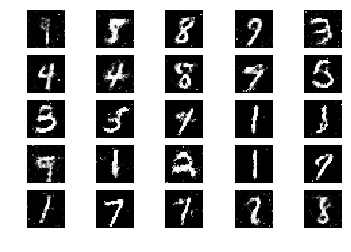

(32, 1) float64
(32, 1) float640.640576, acc.: 64.06%] [G loss: 0.910498]
(32, 1) float640.580235, acc.: 75.00%] [G loss: 0.867666]
(32, 1) float640.674288, acc.: 51.56%] [G loss: 0.963025]
(32, 1) float640.628362, acc.: 67.19%] [G loss: 0.944539]
(32, 1) float640.628074, acc.: 67.19%] [G loss: 1.078136]
(32, 1) float640.620626, acc.: 56.25%] [G loss: 0.998197]
(32, 1) float640.672757, acc.: 54.69%] [G loss: 0.981229]
(32, 1) float640.624510, acc.: 68.75%] [G loss: 0.973583]
(32, 1) float640.605977, acc.: 60.94%] [G loss: 1.016192]
(32, 1) float640.593465, acc.: 67.19%] [G loss: 0.884942]
(32, 1) float640.631982, acc.: 65.62%] [G loss: 0.870728]
(32, 1) float640.699957, acc.: 56.25%] [G loss: 1.086865]
(32, 1) float640.657873, acc.: 56.25%] [G loss: 0.994016]
(32, 1) float640.652046, acc.: 62.50%] [G loss: 1.021701]
(32, 1) float640.643656, acc.: 64.06%] [G loss: 0.961388]
(32, 1) float640.682117, acc.: 53.12%] [G loss: 1.062753]
(32, 1) float640.594459, acc.: 68.75%] [G loss: 1.057303

(32, 1) float640.750817, acc.: 50.00%] [G loss: 0.999531]
(32, 1) float640.650082, acc.: 59.38%] [G loss: 1.031590]
(32, 1) float640.615931, acc.: 67.19%] [G loss: 1.051382]
(32, 1) float640.690083, acc.: 56.25%] [G loss: 0.883243]
(32, 1) float640.658412, acc.: 65.62%] [G loss: 0.936439]
(32, 1) float640.592467, acc.: 70.31%] [G loss: 0.905743]
(32, 1) float640.628279, acc.: 60.94%] [G loss: 0.948724]
(32, 1) float640.704286, acc.: 53.12%] [G loss: 0.917851]
(32, 1) float640.581702, acc.: 65.62%] [G loss: 0.927932]
(32, 1) float640.662333, acc.: 60.94%] [G loss: 1.024672]
(32, 1) float640.571077, acc.: 71.88%] [G loss: 0.895759]
(32, 1) float640.680905, acc.: 57.81%] [G loss: 0.984501]
(32, 1) float640.647194, acc.: 65.62%] [G loss: 0.921706]
(32, 1) float640.595686, acc.: 68.75%] [G loss: 1.038681]
(32, 1) float640.633435, acc.: 64.06%] [G loss: 0.996028]
(32, 1) float640.663091, acc.: 57.81%] [G loss: 1.059367]
(32, 1) float640.630746, acc.: 62.50%] [G loss: 0.959848]
(32, 1) float6

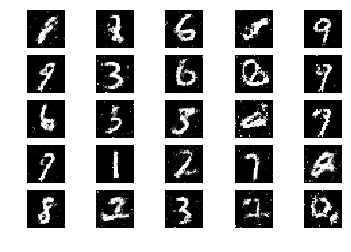

(32, 1) float64
(32, 1) float640.654480, acc.: 60.94%] [G loss: 0.997841]
(32, 1) float640.655070, acc.: 64.06%] [G loss: 0.981242]
(32, 1) float640.625866, acc.: 57.81%] [G loss: 0.987375]
(32, 1) float640.608660, acc.: 60.94%] [G loss: 1.061666]
(32, 1) float640.537335, acc.: 71.88%] [G loss: 0.908493]
(32, 1) float640.623747, acc.: 65.62%] [G loss: 1.019777]
(32, 1) float640.686692, acc.: 62.50%] [G loss: 0.911570]
(32, 1) float640.659403, acc.: 64.06%] [G loss: 1.025038]
(32, 1) float640.627077, acc.: 67.19%] [G loss: 1.049338]
(32, 1) float640.632200, acc.: 71.88%] [G loss: 0.934210]
(32, 1) float640.599062, acc.: 71.88%] [G loss: 1.001133]
(32, 1) float640.676123, acc.: 53.12%] [G loss: 0.973155]
(32, 1) float640.670164, acc.: 59.38%] [G loss: 0.958959]
(32, 1) float640.616467, acc.: 73.44%] [G loss: 1.168636]
(32, 1) float640.514415, acc.: 76.56%] [G loss: 1.108983]
(32, 1) float640.596034, acc.: 70.31%] [G loss: 0.982819]
(32, 1) float640.570462, acc.: 75.00%] [G loss: 0.943487

(32, 1) float640.649535, acc.: 64.06%] [G loss: 1.010211]
(32, 1) float640.597409, acc.: 64.06%] [G loss: 1.042595]
(32, 1) float640.617569, acc.: 59.38%] [G loss: 1.094913]
(32, 1) float640.691242, acc.: 51.56%] [G loss: 0.901514]
(32, 1) float640.627018, acc.: 60.94%] [G loss: 1.013762]
(32, 1) float640.606816, acc.: 65.62%] [G loss: 1.002783]
(32, 1) float640.652988, acc.: 60.94%] [G loss: 1.071836]
(32, 1) float640.625660, acc.: 64.06%] [G loss: 1.009956]
(32, 1) float640.640682, acc.: 64.06%] [G loss: 1.032959]
(32, 1) float640.573516, acc.: 73.44%] [G loss: 1.043249]
(32, 1) float640.624328, acc.: 68.75%] [G loss: 1.054804]
(32, 1) float640.649506, acc.: 64.06%] [G loss: 0.924882]
(32, 1) float640.546262, acc.: 68.75%] [G loss: 1.025473]
(32, 1) float640.565235, acc.: 75.00%] [G loss: 0.953246]
(32, 1) float640.555963, acc.: 68.75%] [G loss: 1.023277]
(32, 1) float640.683967, acc.: 57.81%] [G loss: 0.949314]
(32, 1) float640.709860, acc.: 51.56%] [G loss: 1.039726]
(32, 1) float6

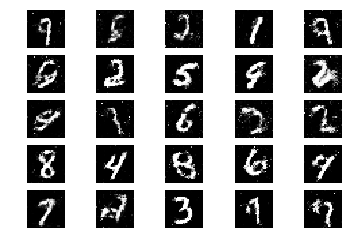

(32, 1) float64
(32, 1) float640.688370, acc.: 56.25%] [G loss: 0.878624]
(32, 1) float640.594040, acc.: 68.75%] [G loss: 0.904711]
(32, 1) float640.648755, acc.: 60.94%] [G loss: 1.014520]
(32, 1) float640.641941, acc.: 59.38%] [G loss: 0.981389]
(32, 1) float640.618867, acc.: 64.06%] [G loss: 0.971780]
(32, 1) float640.576947, acc.: 65.62%] [G loss: 1.013306]
(32, 1) float640.694375, acc.: 54.69%] [G loss: 1.004552]
(32, 1) float640.658910, acc.: 62.50%] [G loss: 1.041956]
(32, 1) float640.676603, acc.: 60.94%] [G loss: 1.064414]
(32, 1) float640.693418, acc.: 57.81%] [G loss: 1.064602]
(32, 1) float640.581004, acc.: 70.31%] [G loss: 1.100726]
(32, 1) float640.558698, acc.: 68.75%] [G loss: 1.078189]
(32, 1) float640.671641, acc.: 54.69%] [G loss: 1.041785]
(32, 1) float640.562349, acc.: 73.44%] [G loss: 0.882459]
(32, 1) float640.650199, acc.: 67.19%] [G loss: 0.883172]
(32, 1) float640.709867, acc.: 59.38%] [G loss: 0.964173]
(32, 1) float640.609448, acc.: 59.38%] [G loss: 1.012493

(32, 1) float640.631097, acc.: 60.94%] [G loss: 1.010941]
(32, 1) float640.607865, acc.: 65.62%] [G loss: 0.987571]
(32, 1) float640.591853, acc.: 64.06%] [G loss: 1.021522]
(32, 1) float640.569371, acc.: 73.44%] [G loss: 1.074149]
(32, 1) float640.614381, acc.: 65.62%] [G loss: 1.007386]
(32, 1) float640.664550, acc.: 56.25%] [G loss: 0.992264]
(32, 1) float640.563087, acc.: 76.56%] [G loss: 0.983146]
(32, 1) float640.675368, acc.: 56.25%] [G loss: 0.962744]
(32, 1) float640.660380, acc.: 59.38%] [G loss: 1.004091]
(32, 1) float640.623233, acc.: 64.06%] [G loss: 0.976441]
(32, 1) float640.710571, acc.: 57.81%] [G loss: 0.983245]
(32, 1) float640.570919, acc.: 71.88%] [G loss: 0.931167]
(32, 1) float640.704916, acc.: 54.69%] [G loss: 0.997046]
(32, 1) float640.687631, acc.: 51.56%] [G loss: 0.963677]
(32, 1) float640.673178, acc.: 59.38%] [G loss: 0.835385]
(32, 1) float640.633117, acc.: 67.19%] [G loss: 0.982822]
(32, 1) float640.625465, acc.: 64.06%] [G loss: 0.801902]
(32, 1) float6

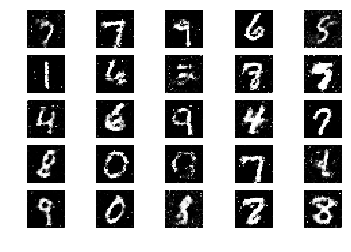

(32, 1) float64
(32, 1) float640.576670, acc.: 68.75%] [G loss: 1.014879]
(32, 1) float640.629919, acc.: 70.31%] [G loss: 0.982926]
(32, 1) float640.662143, acc.: 64.06%] [G loss: 1.027914]
(32, 1) float640.623561, acc.: 67.19%] [G loss: 1.054945]
(32, 1) float640.623888, acc.: 65.62%] [G loss: 0.980002]
(32, 1) float640.656582, acc.: 62.50%] [G loss: 1.066070]
(32, 1) float640.665240, acc.: 62.50%] [G loss: 1.041288]
(32, 1) float640.638408, acc.: 64.06%] [G loss: 0.960597]
(32, 1) float640.576286, acc.: 70.31%] [G loss: 1.040126]
(32, 1) float640.674996, acc.: 59.38%] [G loss: 1.002364]
(32, 1) float640.649675, acc.: 56.25%] [G loss: 1.023333]
(32, 1) float640.663315, acc.: 54.69%] [G loss: 0.956055]
(32, 1) float640.691527, acc.: 57.81%] [G loss: 0.949562]
(32, 1) float640.602540, acc.: 62.50%] [G loss: 0.975648]
(32, 1) float640.591346, acc.: 68.75%] [G loss: 1.018133]
(32, 1) float640.721561, acc.: 50.00%] [G loss: 0.998843]
(32, 1) float640.572042, acc.: 73.44%] [G loss: 0.958885

(32, 1) float640.587802, acc.: 65.62%] [G loss: 1.050833]
(32, 1) float640.581009, acc.: 71.88%] [G loss: 1.110189]
(32, 1) float640.527541, acc.: 79.69%] [G loss: 0.915902]
(32, 1) float640.661040, acc.: 56.25%] [G loss: 1.040129]
(32, 1) float640.609475, acc.: 68.75%] [G loss: 1.036103]
(32, 1) float640.597749, acc.: 71.88%] [G loss: 0.912255]
(32, 1) float640.699446, acc.: 60.94%] [G loss: 0.951777]
(32, 1) float640.688908, acc.: 57.81%] [G loss: 1.034577]
(32, 1) float640.610058, acc.: 65.62%] [G loss: 1.037341]
(32, 1) float640.643841, acc.: 64.06%] [G loss: 1.025943]
(32, 1) float640.641038, acc.: 64.06%] [G loss: 1.079521]
(32, 1) float640.636331, acc.: 65.62%] [G loss: 1.037608]
(32, 1) float640.638836, acc.: 59.38%] [G loss: 1.051142]
(32, 1) float640.600507, acc.: 60.94%] [G loss: 1.037064]
(32, 1) float640.643335, acc.: 60.94%] [G loss: 0.972794]
(32, 1) float640.532570, acc.: 76.56%] [G loss: 1.113874]
(32, 1) float640.586476, acc.: 68.75%] [G loss: 1.001978]
(32, 1) float6

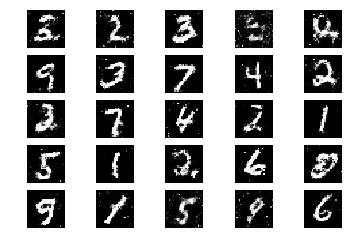

(32, 1) float64
(32, 1) float640.627265, acc.: 67.19%] [G loss: 0.957470]
(32, 1) float640.652872, acc.: 57.81%] [G loss: 0.978260]
(32, 1) float640.599425, acc.: 67.19%] [G loss: 1.032690]
(32, 1) float640.612545, acc.: 68.75%] [G loss: 0.978903]
(32, 1) float640.580852, acc.: 70.31%] [G loss: 1.020636]
(32, 1) float640.717004, acc.: 59.38%] [G loss: 1.003104]
(32, 1) float640.613122, acc.: 57.81%] [G loss: 0.910197]
(32, 1) float640.599402, acc.: 67.19%] [G loss: 1.055999]
(32, 1) float640.601263, acc.: 62.50%] [G loss: 1.048924]
(32, 1) float640.644103, acc.: 62.50%] [G loss: 0.982885]
(32, 1) float640.676525, acc.: 60.94%] [G loss: 0.925109]
(32, 1) float640.621816, acc.: 71.88%] [G loss: 1.005872]
(32, 1) float640.529709, acc.: 78.12%] [G loss: 0.983866]
(32, 1) float640.644563, acc.: 62.50%] [G loss: 0.951576]
(32, 1) float640.624573, acc.: 60.94%] [G loss: 0.924206]
(32, 1) float640.650792, acc.: 57.81%] [G loss: 0.910880]
(32, 1) float640.612944, acc.: 68.75%] [G loss: 0.966712

(32, 1) float640.717534, acc.: 51.56%] [G loss: 0.954436]
(32, 1) float640.693823, acc.: 62.50%] [G loss: 1.076444]
(32, 1) float640.600856, acc.: 70.31%] [G loss: 1.007875]
(32, 1) float640.624121, acc.: 62.50%] [G loss: 0.967660]
(32, 1) float640.627763, acc.: 68.75%] [G loss: 0.969193]
(32, 1) float640.666784, acc.: 60.94%] [G loss: 1.018032]
(32, 1) float640.702712, acc.: 50.00%] [G loss: 0.902445]
(32, 1) float640.580405, acc.: 64.06%] [G loss: 0.988088]
(32, 1) float640.623046, acc.: 67.19%] [G loss: 0.971514]
(32, 1) float640.609972, acc.: 68.75%] [G loss: 1.051849]
(32, 1) float640.607101, acc.: 67.19%] [G loss: 0.945339]
(32, 1) float640.612246, acc.: 68.75%] [G loss: 0.966877]
(32, 1) float640.654635, acc.: 59.38%] [G loss: 1.156918]
(32, 1) float640.541480, acc.: 75.00%] [G loss: 1.063728]
(32, 1) float640.660513, acc.: 60.94%] [G loss: 0.898529]
(32, 1) float640.583317, acc.: 73.44%] [G loss: 0.936107]
(32, 1) float640.619517, acc.: 62.50%] [G loss: 1.063378]
(32, 1) float6

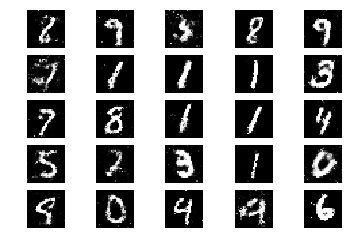

(32, 1) float64
(32, 1) float640.678529, acc.: 62.50%] [G loss: 0.947652]
(32, 1) float640.725635, acc.: 60.94%] [G loss: 1.072385]
(32, 1) float640.637072, acc.: 67.19%] [G loss: 0.953030]
(32, 1) float640.636441, acc.: 65.62%] [G loss: 1.006183]
(32, 1) float640.584153, acc.: 75.00%] [G loss: 1.036365]
(32, 1) float640.687894, acc.: 60.94%] [G loss: 0.967898]
(32, 1) float640.664916, acc.: 62.50%] [G loss: 1.014285]
(32, 1) float640.566356, acc.: 75.00%] [G loss: 1.048244]
(32, 1) float640.656053, acc.: 60.94%] [G loss: 0.977916]
(32, 1) float640.752462, acc.: 54.69%] [G loss: 0.894687]
(32, 1) float640.677232, acc.: 53.12%] [G loss: 1.021197]
(32, 1) float640.688769, acc.: 57.81%] [G loss: 1.056526]
(32, 1) float640.623951, acc.: 67.19%] [G loss: 1.045299]
(32, 1) float640.684878, acc.: 59.38%] [G loss: 1.073053]
(32, 1) float640.659930, acc.: 60.94%] [G loss: 0.983894]
(32, 1) float640.696568, acc.: 57.81%] [G loss: 1.014769]
(32, 1) float640.596516, acc.: 68.75%] [G loss: 0.880176

(32, 1) float640.599993, acc.: 68.75%] [G loss: 1.001438]
(32, 1) float640.651195, acc.: 59.38%] [G loss: 0.938059]
(32, 1) float640.586174, acc.: 64.06%] [G loss: 0.965985]
(32, 1) float640.648901, acc.: 59.38%] [G loss: 0.998270]
(32, 1) float640.632031, acc.: 65.62%] [G loss: 0.962417]
(32, 1) float640.559498, acc.: 71.88%] [G loss: 1.060074]
(32, 1) float640.582662, acc.: 70.31%] [G loss: 1.102180]
(32, 1) float640.637129, acc.: 67.19%] [G loss: 1.040120]
(32, 1) float640.545783, acc.: 70.31%] [G loss: 1.003499]
(32, 1) float640.589689, acc.: 70.31%] [G loss: 1.085548]
(32, 1) float640.668887, acc.: 57.81%] [G loss: 0.881506]
(32, 1) float640.630317, acc.: 62.50%] [G loss: 0.992628]
(32, 1) float640.648827, acc.: 60.94%] [G loss: 1.024733]
(32, 1) float640.694409, acc.: 60.94%] [G loss: 0.829950]
(32, 1) float640.694230, acc.: 54.69%] [G loss: 0.906754]
(32, 1) float640.713923, acc.: 51.56%] [G loss: 1.066629]
(32, 1) float640.610437, acc.: 59.38%] [G loss: 1.088042]
(32, 1) float6

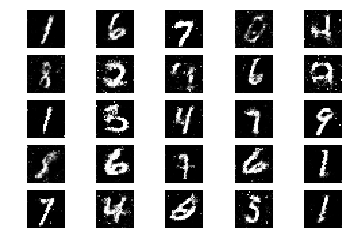

(32, 1) float64
(32, 1) float640.677299, acc.: 57.81%] [G loss: 1.014551]
(32, 1) float640.670470, acc.: 57.81%] [G loss: 0.925301]
(32, 1) float640.596316, acc.: 64.06%] [G loss: 0.953162]
(32, 1) float640.612921, acc.: 70.31%] [G loss: 1.029019]
(32, 1) float640.641132, acc.: 65.62%] [G loss: 1.052250]
(32, 1) float640.652170, acc.: 60.94%] [G loss: 0.939916]
(32, 1) float640.723407, acc.: 51.56%] [G loss: 0.965858]
(32, 1) float640.622034, acc.: 60.94%] [G loss: 1.046243]
(32, 1) float640.659263, acc.: 60.94%] [G loss: 1.062651]
(32, 1) float640.603989, acc.: 68.75%] [G loss: 1.085453]
(32, 1) float640.686806, acc.: 53.12%] [G loss: 0.986051]
(32, 1) float640.610314, acc.: 67.19%] [G loss: 0.883822]
(32, 1) float640.666057, acc.: 62.50%] [G loss: 1.003047]
(32, 1) float640.683423, acc.: 51.56%] [G loss: 1.023797]
(32, 1) float640.542093, acc.: 73.44%] [G loss: 1.025665]
(32, 1) float640.675750, acc.: 53.12%] [G loss: 1.150733]
(32, 1) float640.689251, acc.: 59.38%] [G loss: 1.070867

(32, 1) float640.622714, acc.: 59.38%] [G loss: 0.934902]
(32, 1) float640.699481, acc.: 64.06%] [G loss: 0.967449]
(32, 1) float640.659208, acc.: 60.94%] [G loss: 0.952409]
(32, 1) float640.628694, acc.: 67.19%] [G loss: 0.911637]
(32, 1) float640.625102, acc.: 67.19%] [G loss: 1.077713]
(32, 1) float640.610027, acc.: 65.62%] [G loss: 0.857065]
(32, 1) float640.590155, acc.: 73.44%] [G loss: 0.942437]
(32, 1) float640.592287, acc.: 68.75%] [G loss: 0.895789]
(32, 1) float640.636099, acc.: 64.06%] [G loss: 1.021739]
(32, 1) float640.592491, acc.: 57.81%] [G loss: 0.867771]
(32, 1) float640.691143, acc.: 53.12%] [G loss: 0.958209]
(32, 1) float640.588066, acc.: 65.62%] [G loss: 0.960166]
(32, 1) float640.635592, acc.: 65.62%] [G loss: 0.983135]
(32, 1) float640.664641, acc.: 62.50%] [G loss: 0.837663]
(32, 1) float640.632952, acc.: 62.50%] [G loss: 0.864969]
(32, 1) float640.642548, acc.: 70.31%] [G loss: 0.931414]
(32, 1) float640.618960, acc.: 68.75%] [G loss: 0.962452]
(32, 1) float6

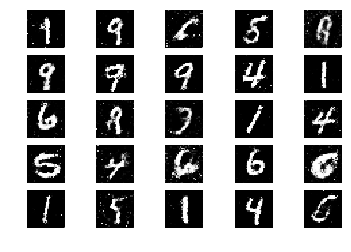

(32, 1) float64
(32, 1) float640.655454, acc.: 54.69%] [G loss: 0.990101]
(32, 1) float640.587498, acc.: 67.19%] [G loss: 1.089553]
(32, 1) float640.593951, acc.: 60.94%] [G loss: 1.086838]
(32, 1) float640.602603, acc.: 68.75%] [G loss: 0.974992]
(32, 1) float640.810403, acc.: 53.12%] [G loss: 0.974797]
(32, 1) float640.650423, acc.: 60.94%] [G loss: 0.889381]
(32, 1) float640.601894, acc.: 68.75%] [G loss: 1.040053]
(32, 1) float640.638163, acc.: 64.06%] [G loss: 0.977238]
(32, 1) float640.624332, acc.: 62.50%] [G loss: 0.930003]
(32, 1) float640.553131, acc.: 71.88%] [G loss: 1.020770]
(32, 1) float640.628734, acc.: 65.62%] [G loss: 1.044569]
(32, 1) float640.608621, acc.: 62.50%] [G loss: 1.156073]
(32, 1) float640.681192, acc.: 48.44%] [G loss: 1.028495]
(32, 1) float640.690259, acc.: 57.81%] [G loss: 0.992198]
(32, 1) float640.699506, acc.: 54.69%] [G loss: 0.961153]
(32, 1) float640.706997, acc.: 51.56%] [G loss: 1.024226]
(32, 1) float640.691462, acc.: 57.81%] [G loss: 1.009857

(32, 1) float640.573860, acc.: 65.62%] [G loss: 0.965401]
(32, 1) float640.687428, acc.: 60.94%] [G loss: 0.946212]
(32, 1) float640.587166, acc.: 78.12%] [G loss: 0.850672]
(32, 1) float640.745228, acc.: 56.25%] [G loss: 0.871006]
(32, 1) float640.643212, acc.: 65.62%] [G loss: 0.897865]
(32, 1) float640.658648, acc.: 64.06%] [G loss: 1.106714]
(32, 1) float640.632727, acc.: 59.38%] [G loss: 0.942443]
(32, 1) float640.620158, acc.: 65.62%] [G loss: 0.978648]
(32, 1) float640.633759, acc.: 65.62%] [G loss: 1.008468]
(32, 1) float640.696543, acc.: 57.81%] [G loss: 1.048451]
(32, 1) float640.608079, acc.: 62.50%] [G loss: 1.097129]
(32, 1) float640.743109, acc.: 51.56%] [G loss: 0.902758]
(32, 1) float640.581469, acc.: 65.62%] [G loss: 1.054812]
(32, 1) float640.660441, acc.: 62.50%] [G loss: 1.054617]
(32, 1) float640.605775, acc.: 68.75%] [G loss: 1.033981]
(32, 1) float640.607655, acc.: 60.94%] [G loss: 0.954692]
(32, 1) float640.584844, acc.: 68.75%] [G loss: 0.989185]
(32, 1) float6

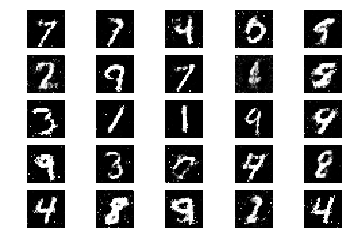

(32, 1) float64
(32, 1) float640.633376, acc.: 65.62%] [G loss: 0.985746]
(32, 1) float640.677820, acc.: 59.38%] [G loss: 0.894096]
(32, 1) float640.648505, acc.: 60.94%] [G loss: 0.977418]
(32, 1) float640.707711, acc.: 59.38%] [G loss: 0.887338]
(32, 1) float640.640229, acc.: 65.62%] [G loss: 0.973596]
(32, 1) float640.573401, acc.: 56.25%] [G loss: 0.964931]
(32, 1) float640.542136, acc.: 79.69%] [G loss: 0.943902]
(32, 1) float640.662202, acc.: 62.50%] [G loss: 1.008475]
(32, 1) float640.727268, acc.: 50.00%] [G loss: 0.933746]
(32, 1) float640.683393, acc.: 53.12%] [G loss: 1.032949]
(32, 1) float640.552886, acc.: 79.69%] [G loss: 1.005696]
(32, 1) float640.668357, acc.: 57.81%] [G loss: 1.122630]
(32, 1) float640.647958, acc.: 62.50%] [G loss: 1.050029]
(32, 1) float640.553677, acc.: 64.06%] [G loss: 1.150121]
(32, 1) float640.643189, acc.: 64.06%] [G loss: 1.012771]
(32, 1) float640.850165, acc.: 46.88%] [G loss: 0.968487]
(32, 1) float640.548660, acc.: 70.31%] [G loss: 1.003127

(32, 1) float640.652550, acc.: 60.94%] [G loss: 0.871782]
(32, 1) float640.667898, acc.: 60.94%] [G loss: 0.975523]
(32, 1) float640.666291, acc.: 59.38%] [G loss: 1.009381]
(32, 1) float640.597154, acc.: 64.06%] [G loss: 0.993876]
(32, 1) float640.662720, acc.: 64.06%] [G loss: 1.085773]
(32, 1) float640.716806, acc.: 56.25%] [G loss: 0.950671]
(32, 1) float640.593724, acc.: 65.62%] [G loss: 1.002237]
(32, 1) float640.646403, acc.: 60.94%] [G loss: 1.000364]
(32, 1) float640.617863, acc.: 62.50%] [G loss: 1.134547]
(32, 1) float640.669781, acc.: 68.75%] [G loss: 0.914810]
(32, 1) float640.721114, acc.: 50.00%] [G loss: 0.973498]
(32, 1) float640.646250, acc.: 64.06%] [G loss: 0.991837]
(32, 1) float640.697738, acc.: 57.81%] [G loss: 1.021098]
(32, 1) float640.594728, acc.: 65.62%] [G loss: 0.962548]
(32, 1) float640.637271, acc.: 62.50%] [G loss: 0.912758]
(32, 1) float640.660181, acc.: 59.38%] [G loss: 0.979016]
(32, 1) float640.649340, acc.: 59.38%] [G loss: 0.899789]
(32, 1) float6

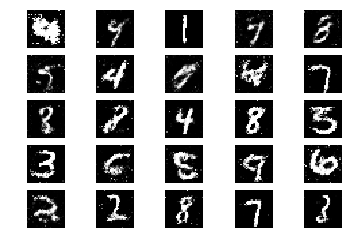

(32, 1) float64
(32, 1) float640.640222, acc.: 65.62%] [G loss: 1.086745]
(32, 1) float640.577964, acc.: 68.75%] [G loss: 0.978211]
(32, 1) float640.642220, acc.: 57.81%] [G loss: 0.949592]
(32, 1) float640.680743, acc.: 54.69%] [G loss: 0.936717]
(32, 1) float640.625929, acc.: 65.62%] [G loss: 0.937744]
(32, 1) float640.653670, acc.: 62.50%] [G loss: 0.952436]
(32, 1) float640.613184, acc.: 62.50%] [G loss: 0.956141]
(32, 1) float640.655276, acc.: 60.94%] [G loss: 0.983273]
(32, 1) float640.632002, acc.: 60.94%] [G loss: 1.015032]
(32, 1) float640.616736, acc.: 67.19%] [G loss: 1.000309]
(32, 1) float640.651066, acc.: 60.94%] [G loss: 1.078762]
(32, 1) float640.652851, acc.: 59.38%] [G loss: 0.875883]
(32, 1) float640.573604, acc.: 65.62%] [G loss: 1.037884]
(32, 1) float640.615070, acc.: 71.88%] [G loss: 0.979646]
(32, 1) float640.616603, acc.: 67.19%] [G loss: 0.932534]
(32, 1) float640.578040, acc.: 60.94%] [G loss: 0.977373]
(32, 1) float640.677838, acc.: 59.38%] [G loss: 0.966812

(32, 1) float640.722815, acc.: 50.00%] [G loss: 0.997245]
(32, 1) float640.671650, acc.: 57.81%] [G loss: 1.063920]
(32, 1) float640.566585, acc.: 73.44%] [G loss: 1.015532]
(32, 1) float640.681661, acc.: 57.81%] [G loss: 1.045932]
(32, 1) float640.651351, acc.: 56.25%] [G loss: 1.067686]
(32, 1) float640.573072, acc.: 68.75%] [G loss: 1.014051]
(32, 1) float640.568713, acc.: 76.56%] [G loss: 1.063280]
(32, 1) float640.664351, acc.: 59.38%] [G loss: 0.963393]
(32, 1) float640.611608, acc.: 70.31%] [G loss: 0.998446]
(32, 1) float640.633407, acc.: 65.62%] [G loss: 1.027412]
(32, 1) float640.637771, acc.: 59.38%] [G loss: 0.952309]
(32, 1) float640.664308, acc.: 60.94%] [G loss: 0.964647]
(32, 1) float640.590546, acc.: 70.31%] [G loss: 1.103345]
(32, 1) float640.617245, acc.: 71.88%] [G loss: 1.057891]
(32, 1) float640.560899, acc.: 75.00%] [G loss: 0.967773]
(32, 1) float640.681169, acc.: 60.94%] [G loss: 1.045436]
(32, 1) float640.608438, acc.: 70.31%] [G loss: 0.952962]
(32, 1) float6

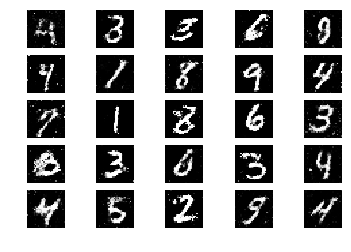

(32, 1) float64
(32, 1) float640.652556, acc.: 60.94%] [G loss: 1.110206]
(32, 1) float640.701513, acc.: 57.81%] [G loss: 1.013849]
(32, 1) float640.678564, acc.: 59.38%] [G loss: 0.995776]
(32, 1) float640.570531, acc.: 76.56%] [G loss: 0.863023]
(32, 1) float640.670682, acc.: 59.38%] [G loss: 0.966897]
(32, 1) float640.572657, acc.: 73.44%] [G loss: 0.936185]
(32, 1) float640.625196, acc.: 68.75%] [G loss: 1.127243]
(32, 1) float640.630831, acc.: 65.62%] [G loss: 1.091859]
(32, 1) float640.628411, acc.: 57.81%] [G loss: 1.005841]
(32, 1) float640.647996, acc.: 67.19%] [G loss: 1.056874]
(32, 1) float640.644897, acc.: 62.50%] [G loss: 0.933838]
(32, 1) float640.639623, acc.: 62.50%] [G loss: 0.978277]
(32, 1) float640.591131, acc.: 70.31%] [G loss: 0.948893]
(32, 1) float640.573528, acc.: 75.00%] [G loss: 0.935781]
(32, 1) float640.716265, acc.: 57.81%] [G loss: 0.914526]
(32, 1) float640.589289, acc.: 73.44%] [G loss: 0.852597]
(32, 1) float640.686893, acc.: 59.38%] [G loss: 0.945915

(32, 1) float640.581125, acc.: 70.31%] [G loss: 0.947928]
(32, 1) float640.631012, acc.: 62.50%] [G loss: 1.084195]
(32, 1) float640.606815, acc.: 70.31%] [G loss: 1.008109]
(32, 1) float640.623315, acc.: 68.75%] [G loss: 0.947303]
(32, 1) float640.643982, acc.: 56.25%] [G loss: 0.926976]
(32, 1) float640.617035, acc.: 62.50%] [G loss: 1.185521]
(32, 1) float640.598846, acc.: 67.19%] [G loss: 1.030284]
(32, 1) float640.677646, acc.: 65.62%] [G loss: 0.977991]
(32, 1) float640.670096, acc.: 67.19%] [G loss: 1.051347]
(32, 1) float640.550698, acc.: 73.44%] [G loss: 0.916398]
(32, 1) float640.605232, acc.: 65.62%] [G loss: 1.210534]
(32, 1) float640.645135, acc.: 62.50%] [G loss: 1.088103]
(32, 1) float640.665038, acc.: 53.12%] [G loss: 1.125270]
(32, 1) float640.654282, acc.: 51.56%] [G loss: 1.020287]
(32, 1) float640.633104, acc.: 62.50%] [G loss: 1.045634]
(32, 1) float640.605716, acc.: 68.75%] [G loss: 0.872886]
(32, 1) float640.661243, acc.: 62.50%] [G loss: 0.894290]
(32, 1) float6

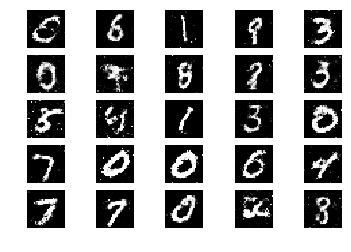

(32, 1) float64
(32, 1) float640.739614, acc.: 62.50%] [G loss: 1.043479]
(32, 1) float640.672949, acc.: 54.69%] [G loss: 0.965670]
(32, 1) float640.606076, acc.: 71.88%] [G loss: 1.008666]
(32, 1) float640.620199, acc.: 67.19%] [G loss: 0.862130]
(32, 1) float640.649917, acc.: 57.81%] [G loss: 0.875206]
(32, 1) float640.607431, acc.: 68.75%] [G loss: 0.963859]
(32, 1) float640.619468, acc.: 65.62%] [G loss: 1.023681]
(32, 1) float640.603857, acc.: 67.19%] [G loss: 1.128969]
(32, 1) float640.608696, acc.: 65.62%] [G loss: 0.981709]
(32, 1) float640.623062, acc.: 70.31%] [G loss: 1.039580]
(32, 1) float640.630389, acc.: 62.50%] [G loss: 0.984704]
(32, 1) float640.714037, acc.: 59.38%] [G loss: 0.979238]
(32, 1) float640.637855, acc.: 57.81%] [G loss: 0.909712]
(32, 1) float640.689604, acc.: 56.25%] [G loss: 0.971067]
(32, 1) float640.633577, acc.: 56.25%] [G loss: 1.030897]
(32, 1) float640.645231, acc.: 57.81%] [G loss: 1.072237]
(32, 1) float640.600416, acc.: 64.06%] [G loss: 1.038837

(32, 1) float640.612299, acc.: 67.19%] [G loss: 1.139096]
(32, 1) float640.642582, acc.: 60.94%] [G loss: 1.074038]
(32, 1) float640.618766, acc.: 65.62%] [G loss: 0.963990]
(32, 1) float640.640634, acc.: 68.75%] [G loss: 1.013960]
(32, 1) float640.654491, acc.: 59.38%] [G loss: 0.952393]
(32, 1) float640.600766, acc.: 75.00%] [G loss: 1.064679]
(32, 1) float640.694742, acc.: 62.50%] [G loss: 0.917520]
(32, 1) float640.652692, acc.: 60.94%] [G loss: 1.077391]
(32, 1) float640.618163, acc.: 62.50%] [G loss: 1.100529]
(32, 1) float640.681720, acc.: 50.00%] [G loss: 0.868203]
(32, 1) float640.657424, acc.: 62.50%] [G loss: 0.886826]
(32, 1) float640.655739, acc.: 64.06%] [G loss: 1.128177]
(32, 1) float640.649864, acc.: 64.06%] [G loss: 1.048574]
(32, 1) float640.631159, acc.: 64.06%] [G loss: 0.976449]
(32, 1) float640.574594, acc.: 68.75%] [G loss: 1.011151]
(32, 1) float640.595054, acc.: 78.12%] [G loss: 0.980181]
(32, 1) float640.604688, acc.: 68.75%] [G loss: 1.032938]
(32, 1) float6

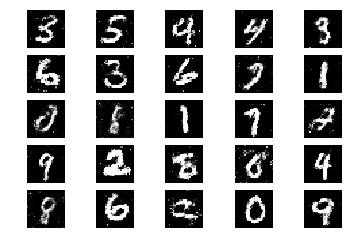

(32, 1) float64
(32, 1) float640.609499, acc.: 67.19%] [G loss: 1.007344]
(32, 1) float640.653054, acc.: 60.94%] [G loss: 1.111430]
(32, 1) float640.597557, acc.: 67.19%] [G loss: 1.050967]
(32, 1) float640.617323, acc.: 65.62%] [G loss: 0.985153]
(32, 1) float640.641097, acc.: 60.94%] [G loss: 1.153829]
(32, 1) float640.607867, acc.: 73.44%] [G loss: 1.025124]
(32, 1) float640.592545, acc.: 60.94%] [G loss: 0.970180]
(32, 1) float640.673702, acc.: 56.25%] [G loss: 1.032196]
(32, 1) float640.644685, acc.: 65.62%] [G loss: 0.985596]
(32, 1) float640.645911, acc.: 57.81%] [G loss: 0.912228]
(32, 1) float640.630974, acc.: 65.62%] [G loss: 1.024030]
(32, 1) float640.625127, acc.: 64.06%] [G loss: 1.077430]
(32, 1) float640.643872, acc.: 59.38%] [G loss: 1.030009]
(32, 1) float640.707991, acc.: 56.25%] [G loss: 1.036210]
(32, 1) float640.720290, acc.: 54.69%] [G loss: 1.068264]
(32, 1) float640.641137, acc.: 57.81%] [G loss: 1.005551]
(32, 1) float640.590393, acc.: 67.19%] [G loss: 1.020509

(32, 1) float640.562447, acc.: 68.75%] [G loss: 1.064897]
(32, 1) float640.665617, acc.: 57.81%] [G loss: 1.075428]
(32, 1) float640.643461, acc.: 65.62%] [G loss: 0.985168]
(32, 1) float640.603233, acc.: 70.31%] [G loss: 0.966885]
(32, 1) float640.612265, acc.: 62.50%] [G loss: 0.988586]
(32, 1) float640.621654, acc.: 64.06%] [G loss: 1.026964]
(32, 1) float640.654658, acc.: 62.50%] [G loss: 0.950890]
(32, 1) float640.622423, acc.: 67.19%] [G loss: 1.004773]
(32, 1) float640.641326, acc.: 60.94%] [G loss: 1.066808]
(32, 1) float640.707466, acc.: 53.12%] [G loss: 0.938998]
(32, 1) float640.537753, acc.: 73.44%] [G loss: 1.041408]
(32, 1) float640.596622, acc.: 68.75%] [G loss: 1.061348]
(32, 1) float640.610650, acc.: 65.62%] [G loss: 1.055281]
(32, 1) float640.715977, acc.: 59.38%] [G loss: 0.929812]
(32, 1) float640.671879, acc.: 59.38%] [G loss: 0.939372]
(32, 1) float640.628477, acc.: 59.38%] [G loss: 0.890341]
(32, 1) float640.623833, acc.: 70.31%] [G loss: 1.101274]
(32, 1) float6

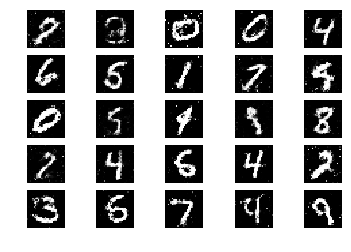

(32, 1) float64
(32, 1) float640.569437, acc.: 67.19%] [G loss: 0.973813]
(32, 1) float640.665809, acc.: 64.06%] [G loss: 0.978494]
(32, 1) float640.635939, acc.: 59.38%] [G loss: 0.951712]
(32, 1) float640.667870, acc.: 64.06%] [G loss: 0.987153]
(32, 1) float640.580719, acc.: 71.88%] [G loss: 1.084547]
(32, 1) float640.563710, acc.: 68.75%] [G loss: 1.068280]
(32, 1) float640.672826, acc.: 59.38%] [G loss: 0.989411]
(32, 1) float640.650338, acc.: 57.81%] [G loss: 0.945228]
(32, 1) float640.583705, acc.: 75.00%] [G loss: 0.941855]
(32, 1) float640.618456, acc.: 67.19%] [G loss: 1.057321]
(32, 1) float640.643517, acc.: 54.69%] [G loss: 1.119742]
(32, 1) float640.615585, acc.: 71.88%] [G loss: 0.929955]
(32, 1) float640.671843, acc.: 62.50%] [G loss: 1.076632]
(32, 1) float640.645474, acc.: 62.50%] [G loss: 1.053370]
(32, 1) float640.651704, acc.: 56.25%] [G loss: 0.989339]
(32, 1) float640.623800, acc.: 59.38%] [G loss: 1.038621]
(32, 1) float640.643200, acc.: 60.94%] [G loss: 1.079339

(32, 1) float640.597641, acc.: 70.31%] [G loss: 0.984255]
(32, 1) float640.637848, acc.: 57.81%] [G loss: 1.068503]
(32, 1) float640.612482, acc.: 65.62%] [G loss: 1.110790]
(32, 1) float640.685229, acc.: 51.56%] [G loss: 1.065662]
(32, 1) float640.717312, acc.: 57.81%] [G loss: 1.053633]
(32, 1) float640.601839, acc.: 65.62%] [G loss: 0.991407]
(32, 1) float640.660917, acc.: 60.94%] [G loss: 0.959460]
(32, 1) float640.657808, acc.: 64.06%] [G loss: 1.007412]
(32, 1) float640.663721, acc.: 64.06%] [G loss: 0.925438]
(32, 1) float640.687961, acc.: 53.12%] [G loss: 0.944788]
(32, 1) float640.647076, acc.: 65.62%] [G loss: 0.904399]
(32, 1) float640.644176, acc.: 62.50%] [G loss: 0.929683]
(32, 1) float640.674967, acc.: 53.12%] [G loss: 0.982055]
(32, 1) float640.589099, acc.: 73.44%] [G loss: 1.006061]
(32, 1) float640.696951, acc.: 56.25%] [G loss: 1.042639]
(32, 1) float640.715079, acc.: 54.69%] [G loss: 0.992793]
(32, 1) float640.597559, acc.: 73.44%] [G loss: 1.042832]
(32, 1) float6

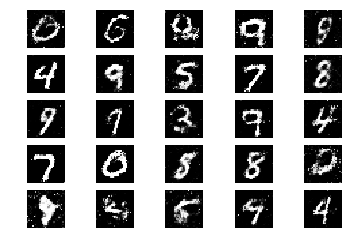

(32, 1) float64
(32, 1) float640.669890, acc.: 51.56%] [G loss: 1.093101]
(32, 1) float640.638025, acc.: 60.94%] [G loss: 1.005370]
(32, 1) float640.544565, acc.: 75.00%] [G loss: 1.041707]
(32, 1) float640.614329, acc.: 62.50%] [G loss: 1.010640]
(32, 1) float640.711593, acc.: 54.69%] [G loss: 1.071019]
(32, 1) float640.598061, acc.: 67.19%] [G loss: 0.948103]
(32, 1) float640.596783, acc.: 64.06%] [G loss: 0.975787]
(32, 1) float640.625498, acc.: 67.19%] [G loss: 0.933880]
(32, 1) float640.661193, acc.: 56.25%] [G loss: 0.896947]
(32, 1) float640.642722, acc.: 62.50%] [G loss: 1.002806]
(32, 1) float640.604030, acc.: 65.62%] [G loss: 0.978371]
(32, 1) float640.661336, acc.: 60.94%] [G loss: 0.953981]
(32, 1) float640.671266, acc.: 65.62%] [G loss: 0.926596]
(32, 1) float640.644304, acc.: 64.06%] [G loss: 0.984422]
(32, 1) float640.588123, acc.: 65.62%] [G loss: 1.026062]
(32, 1) float640.604568, acc.: 71.88%] [G loss: 1.009704]
(32, 1) float640.652471, acc.: 62.50%] [G loss: 0.962260

(32, 1) float640.588874, acc.: 67.19%] [G loss: 1.017193]
(32, 1) float640.652198, acc.: 56.25%] [G loss: 0.970940]
(32, 1) float640.594284, acc.: 67.19%] [G loss: 0.884645]
(32, 1) float640.627128, acc.: 60.94%] [G loss: 1.007188]
(32, 1) float640.646420, acc.: 60.94%] [G loss: 0.861439]
(32, 1) float640.610771, acc.: 64.06%] [G loss: 0.911233]
(32, 1) float640.657617, acc.: 59.38%] [G loss: 0.997953]
(32, 1) float640.534521, acc.: 76.56%] [G loss: 0.924595]
(32, 1) float640.619565, acc.: 64.06%] [G loss: 1.019094]
(32, 1) float640.636120, acc.: 56.25%] [G loss: 0.983628]
(32, 1) float640.568217, acc.: 67.19%] [G loss: 1.044796]
(32, 1) float640.622923, acc.: 65.62%] [G loss: 0.986363]
(32, 1) float640.612123, acc.: 65.62%] [G loss: 0.992243]
(32, 1) float640.802413, acc.: 50.00%] [G loss: 1.024335]
(32, 1) float640.570158, acc.: 75.00%] [G loss: 0.998422]
(32, 1) float640.613856, acc.: 64.06%] [G loss: 0.957567]
(32, 1) float640.578908, acc.: 71.88%] [G loss: 1.106940]
(32, 1) float6

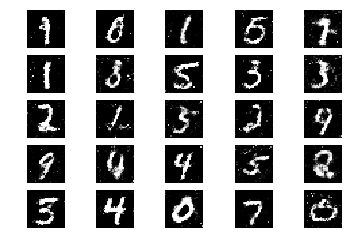

(32, 1) float64
(32, 1) float640.635474, acc.: 59.38%] [G loss: 1.003877]
(32, 1) float640.660542, acc.: 62.50%] [G loss: 0.870699]
(32, 1) float640.623891, acc.: 67.19%] [G loss: 0.925865]
(32, 1) float640.646564, acc.: 65.62%] [G loss: 0.920444]
(32, 1) float640.614044, acc.: 67.19%] [G loss: 0.961158]
(32, 1) float640.608113, acc.: 60.94%] [G loss: 0.946595]
(32, 1) float640.664402, acc.: 64.06%] [G loss: 0.852559]
(32, 1) float640.601611, acc.: 68.75%] [G loss: 0.901735]
(32, 1) float640.681039, acc.: 56.25%] [G loss: 0.961905]
(32, 1) float640.590703, acc.: 64.06%] [G loss: 1.071701]
(32, 1) float640.651350, acc.: 64.06%] [G loss: 1.010851]
(32, 1) float640.630830, acc.: 65.62%] [G loss: 0.996344]
(32, 1) float640.669580, acc.: 62.50%] [G loss: 0.995044]
(32, 1) float640.639979, acc.: 59.38%] [G loss: 1.041699]
(32, 1) float640.666340, acc.: 60.94%] [G loss: 0.945910]
(32, 1) float640.630894, acc.: 67.19%] [G loss: 0.974859]
(32, 1) float640.662642, acc.: 60.94%] [G loss: 0.917063

(32, 1) float640.635051, acc.: 65.62%] [G loss: 1.138013]
(32, 1) float640.679852, acc.: 51.56%] [G loss: 1.068389]
(32, 1) float640.604852, acc.: 67.19%] [G loss: 1.029561]
(32, 1) float640.670398, acc.: 59.38%] [G loss: 0.903440]
(32, 1) float640.576879, acc.: 71.88%] [G loss: 1.067697]
(32, 1) float640.663466, acc.: 65.62%] [G loss: 0.994464]
(32, 1) float640.534453, acc.: 78.12%] [G loss: 1.072115]
(32, 1) float640.570188, acc.: 68.75%] [G loss: 0.943472]
(32, 1) float640.597799, acc.: 68.75%] [G loss: 1.073166]
(32, 1) float640.624927, acc.: 65.62%] [G loss: 1.047230]
(32, 1) float640.664540, acc.: 62.50%] [G loss: 0.991708]
(32, 1) float640.605070, acc.: 67.19%] [G loss: 1.021049]
(32, 1) float640.596518, acc.: 71.88%] [G loss: 0.932438]
(32, 1) float640.522467, acc.: 79.69%] [G loss: 0.931895]
(32, 1) float640.598817, acc.: 68.75%] [G loss: 0.972022]
(32, 1) float640.607848, acc.: 71.88%] [G loss: 0.945499]
(32, 1) float640.695189, acc.: 64.06%] [G loss: 1.038487]
(32, 1) float6

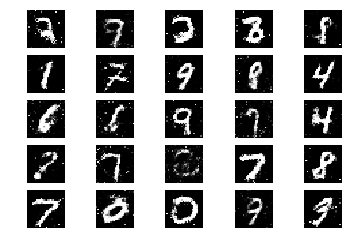

(32, 1) float64
(32, 1) float640.680056, acc.: 64.06%] [G loss: 0.993624]
(32, 1) float640.635276, acc.: 59.38%] [G loss: 1.025613]
(32, 1) float640.646739, acc.: 68.75%] [G loss: 1.027467]
(32, 1) float640.603094, acc.: 70.31%] [G loss: 0.953403]
(32, 1) float640.588859, acc.: 65.62%] [G loss: 1.062272]
(32, 1) float640.656191, acc.: 54.69%] [G loss: 0.968198]
(32, 1) float640.633391, acc.: 64.06%] [G loss: 1.023545]
(32, 1) float640.727751, acc.: 50.00%] [G loss: 1.029014]
(32, 1) float640.654732, acc.: 62.50%] [G loss: 0.899149]
(32, 1) float640.662942, acc.: 54.69%] [G loss: 0.909072]
(32, 1) float640.648480, acc.: 62.50%] [G loss: 1.005875]
(32, 1) float640.687758, acc.: 59.38%] [G loss: 0.981161]
(32, 1) float640.556881, acc.: 75.00%] [G loss: 0.975913]
(32, 1) float640.547748, acc.: 79.69%] [G loss: 0.969014]
(32, 1) float640.633234, acc.: 57.81%] [G loss: 1.043550]
(32, 1) float640.698940, acc.: 57.81%] [G loss: 1.220016]
(32, 1) float640.655944, acc.: 68.75%] [G loss: 0.986296

(32, 1) float640.612613, acc.: 70.31%] [G loss: 0.968919]
(32, 1) float640.616901, acc.: 70.31%] [G loss: 1.081219]
(32, 1) float640.625081, acc.: 67.19%] [G loss: 0.984737]
(32, 1) float640.584103, acc.: 71.88%] [G loss: 1.052985]
(32, 1) float640.610159, acc.: 60.94%] [G loss: 1.164221]
(32, 1) float640.623223, acc.: 65.62%] [G loss: 1.137860]
(32, 1) float640.689195, acc.: 59.38%] [G loss: 1.029328]
(32, 1) float640.631328, acc.: 65.62%] [G loss: 0.938014]
(32, 1) float640.604457, acc.: 67.19%] [G loss: 1.007127]
(32, 1) float640.636831, acc.: 68.75%] [G loss: 1.081207]
(32, 1) float640.619852, acc.: 68.75%] [G loss: 1.176473]
(32, 1) float640.620055, acc.: 65.62%] [G loss: 1.013401]
(32, 1) float640.662606, acc.: 67.19%] [G loss: 1.102144]
(32, 1) float640.599578, acc.: 68.75%] [G loss: 0.991088]
(32, 1) float640.629002, acc.: 71.88%] [G loss: 1.075201]
(32, 1) float640.638128, acc.: 62.50%] [G loss: 0.950665]
(32, 1) float640.635245, acc.: 62.50%] [G loss: 0.977719]
(32, 1) float6

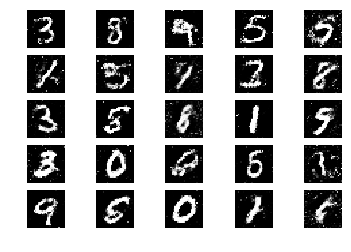

(32, 1) float64
(32, 1) float640.610128, acc.: 71.88%] [G loss: 1.016711]
(32, 1) float640.708432, acc.: 57.81%] [G loss: 0.996183]
(32, 1) float640.682982, acc.: 60.94%] [G loss: 0.945531]
(32, 1) float640.633943, acc.: 67.19%] [G loss: 0.960962]
(32, 1) float640.599173, acc.: 73.44%] [G loss: 1.037663]
(32, 1) float640.537658, acc.: 73.44%] [G loss: 0.949849]
(32, 1) float640.646209, acc.: 64.06%] [G loss: 0.920091]
(32, 1) float640.613016, acc.: 70.31%] [G loss: 0.965769]
(32, 1) float640.624748, acc.: 65.62%] [G loss: 0.908194]
(32, 1) float640.648173, acc.: 64.06%] [G loss: 1.002659]
(32, 1) float640.679553, acc.: 57.81%] [G loss: 0.969449]
(32, 1) float640.599709, acc.: 73.44%] [G loss: 1.078508]
(32, 1) float640.619972, acc.: 65.62%] [G loss: 1.101902]
(32, 1) float640.614335, acc.: 59.38%] [G loss: 1.048013]
(32, 1) float640.598896, acc.: 70.31%] [G loss: 1.043844]
(32, 1) float640.576946, acc.: 73.44%] [G loss: 1.067270]
(32, 1) float640.671040, acc.: 57.81%] [G loss: 1.017971

(32, 1) float640.653043, acc.: 62.50%] [G loss: 0.986667]
(32, 1) float640.661231, acc.: 57.81%] [G loss: 1.137099]
(32, 1) float640.667583, acc.: 53.12%] [G loss: 1.001204]
(32, 1) float640.599802, acc.: 64.06%] [G loss: 1.093622]
(32, 1) float640.567162, acc.: 75.00%] [G loss: 1.121720]
(32, 1) float640.577158, acc.: 71.88%] [G loss: 0.983698]
(32, 1) float640.638008, acc.: 62.50%] [G loss: 1.102366]
(32, 1) float640.741496, acc.: 53.12%] [G loss: 1.092988]
(32, 1) float640.603489, acc.: 68.75%] [G loss: 1.172135]
(32, 1) float640.624326, acc.: 65.62%] [G loss: 0.947488]
(32, 1) float640.717185, acc.: 51.56%] [G loss: 0.931979]
(32, 1) float640.567407, acc.: 68.75%] [G loss: 0.953059]
(32, 1) float640.560354, acc.: 76.56%] [G loss: 1.073484]
(32, 1) float640.682371, acc.: 56.25%] [G loss: 1.154343]
(32, 1) float640.683904, acc.: 56.25%] [G loss: 0.978316]
(32, 1) float640.616281, acc.: 65.62%] [G loss: 1.057126]
(32, 1) float640.585046, acc.: 70.31%] [G loss: 1.138652]
(32, 1) float6

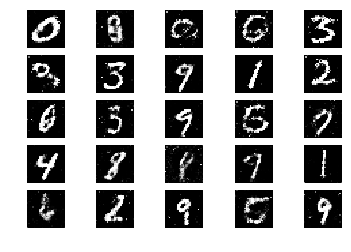

(32, 1) float64
(32, 1) float640.563491, acc.: 68.75%] [G loss: 1.060869]
(32, 1) float640.704049, acc.: 56.25%] [G loss: 1.022689]
(32, 1) float640.594820, acc.: 73.44%] [G loss: 0.938732]
(32, 1) float640.597895, acc.: 64.06%] [G loss: 1.003708]
(32, 1) float640.532945, acc.: 79.69%] [G loss: 0.963041]
(32, 1) float640.608674, acc.: 68.75%] [G loss: 0.984007]
(32, 1) float640.640763, acc.: 59.38%] [G loss: 0.986225]
(32, 1) float640.650556, acc.: 64.06%] [G loss: 0.986696]
(32, 1) float640.599132, acc.: 71.88%] [G loss: 0.932463]
(32, 1) float640.638237, acc.: 56.25%] [G loss: 0.952839]
(32, 1) float640.656889, acc.: 54.69%] [G loss: 1.004719]
(32, 1) float640.717314, acc.: 53.12%] [G loss: 1.090922]
(32, 1) float640.569431, acc.: 71.88%] [G loss: 1.040682]
(32, 1) float640.648015, acc.: 65.62%] [G loss: 0.963760]
(32, 1) float640.673534, acc.: 62.50%] [G loss: 1.029276]
(32, 1) float640.689751, acc.: 51.56%] [G loss: 1.014943]
(32, 1) float640.580049, acc.: 71.88%] [G loss: 1.016251

(32, 1) float640.659392, acc.: 57.81%] [G loss: 1.045855]
(32, 1) float640.688416, acc.: 56.25%] [G loss: 1.102547]
(32, 1) float640.650056, acc.: 62.50%] [G loss: 1.056796]
(32, 1) float640.576283, acc.: 68.75%] [G loss: 1.119233]
(32, 1) float640.615733, acc.: 70.31%] [G loss: 0.982627]
(32, 1) float640.652424, acc.: 64.06%] [G loss: 1.024364]
(32, 1) float640.648966, acc.: 56.25%] [G loss: 0.909166]
(32, 1) float640.631083, acc.: 65.62%] [G loss: 0.942980]
(32, 1) float640.671059, acc.: 56.25%] [G loss: 0.984767]
(32, 1) float640.597465, acc.: 65.62%] [G loss: 0.976197]
(32, 1) float640.604996, acc.: 68.75%] [G loss: 1.007326]
(32, 1) float640.630629, acc.: 57.81%] [G loss: 0.995800]
(32, 1) float640.598942, acc.: 71.88%] [G loss: 1.016289]
(32, 1) float640.572991, acc.: 67.19%] [G loss: 0.897988]
(32, 1) float640.629069, acc.: 65.62%] [G loss: 0.877647]
(32, 1) float640.604946, acc.: 64.06%] [G loss: 1.045645]
(32, 1) float640.609467, acc.: 68.75%] [G loss: 0.952120]
(32, 1) float6

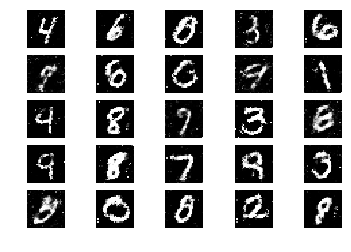

(32, 1) float64
(32, 1) float640.626308, acc.: 64.06%] [G loss: 0.937891]
(32, 1) float640.572407, acc.: 70.31%] [G loss: 1.100578]
(32, 1) float640.623825, acc.: 60.94%] [G loss: 1.092607]
(32, 1) float640.728513, acc.: 53.12%] [G loss: 0.949259]
(32, 1) float640.623193, acc.: 65.62%] [G loss: 0.903351]
(32, 1) float640.573081, acc.: 70.31%] [G loss: 1.026967]
(32, 1) float640.630457, acc.: 60.94%] [G loss: 0.987533]
(32, 1) float640.590637, acc.: 79.69%] [G loss: 0.991252]
(32, 1) float640.648524, acc.: 62.50%] [G loss: 0.997935]
(32, 1) float640.644491, acc.: 60.94%] [G loss: 0.933913]
(32, 1) float640.644509, acc.: 68.75%] [G loss: 1.015983]
(32, 1) float640.688818, acc.: 54.69%] [G loss: 1.054627]
(32, 1) float640.616482, acc.: 65.62%] [G loss: 1.011024]
(32, 1) float640.550516, acc.: 70.31%] [G loss: 1.188810]
(32, 1) float640.648445, acc.: 62.50%] [G loss: 1.012064]
(32, 1) float640.551893, acc.: 75.00%] [G loss: 0.991656]
(32, 1) float640.682853, acc.: 64.06%] [G loss: 1.047971

(32, 1) float640.547172, acc.: 71.88%] [G loss: 1.017554]
(32, 1) float640.671620, acc.: 67.19%] [G loss: 0.968097]
(32, 1) float640.618587, acc.: 57.81%] [G loss: 0.964301]
(32, 1) float640.594729, acc.: 75.00%] [G loss: 0.946102]
(32, 1) float640.646589, acc.: 64.06%] [G loss: 1.025342]
(32, 1) float640.614424, acc.: 62.50%] [G loss: 1.005533]
(32, 1) float640.662927, acc.: 59.38%] [G loss: 1.028577]
(32, 1) float640.605243, acc.: 71.88%] [G loss: 0.984356]
(32, 1) float640.641944, acc.: 53.12%] [G loss: 0.828346]
(32, 1) float640.641392, acc.: 60.94%] [G loss: 0.952447]
(32, 1) float640.726573, acc.: 53.12%] [G loss: 1.034383]
(32, 1) float640.642559, acc.: 60.94%] [G loss: 1.022923]
(32, 1) float640.666198, acc.: 60.94%] [G loss: 1.115048]
(32, 1) float640.604264, acc.: 70.31%] [G loss: 0.997047]
(32, 1) float640.609230, acc.: 68.75%] [G loss: 0.992654]
(32, 1) float640.677742, acc.: 60.94%] [G loss: 0.989634]
(32, 1) float640.769179, acc.: 48.44%] [G loss: 1.006840]
(32, 1) float6

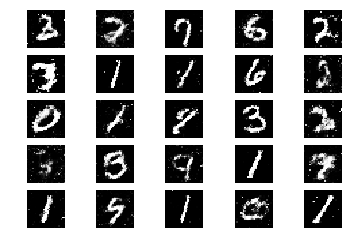

(32, 1) float64
(32, 1) float640.598975, acc.: 71.88%] [G loss: 1.212803]
(32, 1) float640.629457, acc.: 64.06%] [G loss: 0.951809]
(32, 1) float640.605525, acc.: 70.31%] [G loss: 1.033486]
(32, 1) float640.674594, acc.: 56.25%] [G loss: 0.947240]
(32, 1) float640.626272, acc.: 62.50%] [G loss: 0.901692]
(32, 1) float640.654447, acc.: 65.62%] [G loss: 1.023867]
(32, 1) float640.655630, acc.: 59.38%] [G loss: 0.999277]
(32, 1) float640.650820, acc.: 54.69%] [G loss: 1.047270]
(32, 1) float640.619075, acc.: 67.19%] [G loss: 0.998134]
(32, 1) float640.678417, acc.: 60.94%] [G loss: 1.037621]
(32, 1) float640.668293, acc.: 50.00%] [G loss: 1.047168]
(32, 1) float640.686828, acc.: 64.06%] [G loss: 0.893700]
(32, 1) float640.592761, acc.: 73.44%] [G loss: 0.935078]
(32, 1) float640.624676, acc.: 57.81%] [G loss: 1.070873]
(32, 1) float640.628333, acc.: 64.06%] [G loss: 1.026739]
(32, 1) float640.627006, acc.: 65.62%] [G loss: 0.998584]
(32, 1) float640.576931, acc.: 64.06%] [G loss: 0.985157

(32, 1) float640.567488, acc.: 71.88%] [G loss: 0.998597]
(32, 1) float640.605106, acc.: 68.75%] [G loss: 1.086071]
(32, 1) float640.654340, acc.: 67.19%] [G loss: 0.965109]
(32, 1) float640.599381, acc.: 65.62%] [G loss: 1.031383]
(32, 1) float640.614501, acc.: 65.62%] [G loss: 1.054244]
(32, 1) float640.528365, acc.: 75.00%] [G loss: 1.003385]
(32, 1) float640.526170, acc.: 73.44%] [G loss: 1.036460]
(32, 1) float640.481894, acc.: 78.12%] [G loss: 1.000358]
(32, 1) float640.693263, acc.: 56.25%] [G loss: 0.983045]
(32, 1) float640.688950, acc.: 57.81%] [G loss: 1.081216]
(32, 1) float640.652608, acc.: 67.19%] [G loss: 0.956802]
(32, 1) float640.564574, acc.: 70.31%] [G loss: 1.067854]
(32, 1) float640.687937, acc.: 59.38%] [G loss: 0.902443]
(32, 1) float640.694967, acc.: 54.69%] [G loss: 0.886779]
(32, 1) float640.590004, acc.: 75.00%] [G loss: 0.949232]
(32, 1) float640.600708, acc.: 64.06%] [G loss: 0.924531]
(32, 1) float640.647131, acc.: 65.62%] [G loss: 0.937449]
(32, 1) float6

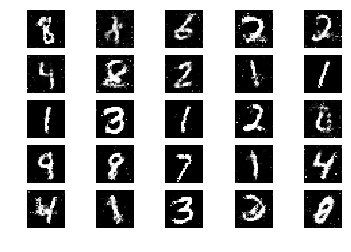

(32, 1) float64
(32, 1) float640.586263, acc.: 65.62%] [G loss: 0.984467]
(32, 1) float640.786977, acc.: 45.31%] [G loss: 0.901678]
(32, 1) float640.582184, acc.: 65.62%] [G loss: 1.050869]
(32, 1) float640.586504, acc.: 73.44%] [G loss: 0.945798]
(32, 1) float640.617800, acc.: 71.88%] [G loss: 0.886034]
(32, 1) float640.660099, acc.: 56.25%] [G loss: 0.995051]
(32, 1) float640.617452, acc.: 65.62%] [G loss: 1.024259]
(32, 1) float640.709044, acc.: 60.94%] [G loss: 0.968238]
(32, 1) float640.619906, acc.: 64.06%] [G loss: 0.979012]
(32, 1) float640.599084, acc.: 70.31%] [G loss: 1.019600]
(32, 1) float640.673984, acc.: 67.19%] [G loss: 1.031991]
(32, 1) float640.618738, acc.: 70.31%] [G loss: 0.977154]
(32, 1) float640.645692, acc.: 56.25%] [G loss: 0.994151]
(32, 1) float640.607739, acc.: 67.19%] [G loss: 1.129052]
(32, 1) float640.663742, acc.: 59.38%] [G loss: 1.040549]
(32, 1) float640.600666, acc.: 65.62%] [G loss: 0.971196]
(32, 1) float640.616461, acc.: 67.19%] [G loss: 1.020841

(32, 1) float640.591099, acc.: 70.31%] [G loss: 0.944343]
(32, 1) float640.632617, acc.: 65.62%] [G loss: 1.111084]
(32, 1) float640.679915, acc.: 57.81%] [G loss: 0.960827]
(32, 1) float640.574518, acc.: 70.31%] [G loss: 0.898709]
(32, 1) float640.639223, acc.: 67.19%] [G loss: 1.118309]
(32, 1) float640.566960, acc.: 68.75%] [G loss: 0.956082]
(32, 1) float640.611086, acc.: 64.06%] [G loss: 0.961871]
(32, 1) float640.660076, acc.: 64.06%] [G loss: 0.922121]
(32, 1) float640.647268, acc.: 64.06%] [G loss: 1.041926]
(32, 1) float640.644502, acc.: 67.19%] [G loss: 0.952380]
(32, 1) float640.732419, acc.: 51.56%] [G loss: 0.953851]
(32, 1) float640.583281, acc.: 73.44%] [G loss: 0.906721]
(32, 1) float640.734165, acc.: 60.94%] [G loss: 0.996059]
(32, 1) float640.684455, acc.: 60.94%] [G loss: 1.082277]
(32, 1) float640.575889, acc.: 67.19%] [G loss: 1.054327]
(32, 1) float640.594852, acc.: 68.75%] [G loss: 1.290274]
(32, 1) float640.647787, acc.: 57.81%] [G loss: 1.001505]
(32, 1) float6

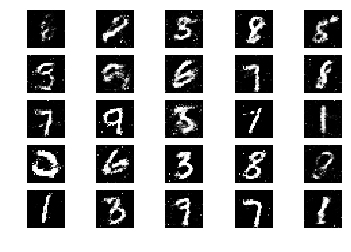

(32, 1) float64
(32, 1) float640.620963, acc.: 57.81%] [G loss: 1.055756]
(32, 1) float640.687659, acc.: 56.25%] [G loss: 0.945732]
(32, 1) float640.630696, acc.: 56.25%] [G loss: 0.946909]
(32, 1) float640.652871, acc.: 57.81%] [G loss: 0.859713]
(32, 1) float640.646682, acc.: 64.06%] [G loss: 1.041896]
(32, 1) float640.625722, acc.: 62.50%] [G loss: 1.042243]
(32, 1) float640.655915, acc.: 60.94%] [G loss: 1.140064]
(32, 1) float640.646398, acc.: 64.06%] [G loss: 1.077354]
(32, 1) float640.672151, acc.: 54.69%] [G loss: 1.040129]
(32, 1) float640.582907, acc.: 71.88%] [G loss: 1.134582]
(32, 1) float640.576462, acc.: 70.31%] [G loss: 0.945085]
(32, 1) float640.656999, acc.: 56.25%] [G loss: 0.989109]
(32, 1) float640.531346, acc.: 75.00%] [G loss: 1.091744]
(32, 1) float640.610436, acc.: 68.75%] [G loss: 1.021772]
(32, 1) float640.611347, acc.: 70.31%] [G loss: 1.062910]
(32, 1) float640.610592, acc.: 68.75%] [G loss: 0.987310]
(32, 1) float640.672092, acc.: 59.38%] [G loss: 0.913718

(32, 1) float640.747323, acc.: 48.44%] [G loss: 1.014017]
(32, 1) float640.656757, acc.: 62.50%] [G loss: 1.076534]
(32, 1) float640.613493, acc.: 64.06%] [G loss: 0.997403]
(32, 1) float640.599102, acc.: 64.06%] [G loss: 0.969708]
(32, 1) float640.622773, acc.: 68.75%] [G loss: 0.989497]
(32, 1) float640.665430, acc.: 62.50%] [G loss: 0.953446]
(32, 1) float640.659281, acc.: 59.38%] [G loss: 1.057430]
(32, 1) float640.597729, acc.: 65.62%] [G loss: 1.016506]
(32, 1) float640.646142, acc.: 59.38%] [G loss: 1.025012]
(32, 1) float640.631140, acc.: 60.94%] [G loss: 1.031442]
(32, 1) float640.686940, acc.: 57.81%] [G loss: 0.964108]
(32, 1) float640.643059, acc.: 60.94%] [G loss: 1.027935]
(32, 1) float640.640988, acc.: 62.50%] [G loss: 1.073768]
(32, 1) float640.563723, acc.: 75.00%] [G loss: 1.117645]
(32, 1) float640.669533, acc.: 57.81%] [G loss: 0.874587]
(32, 1) float640.605037, acc.: 65.62%] [G loss: 1.111169]
(32, 1) float640.634444, acc.: 70.31%] [G loss: 1.019892]
(32, 1) float6

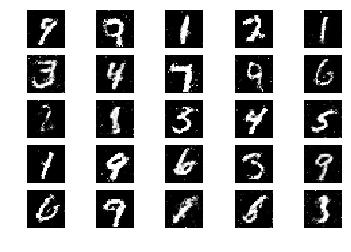

(32, 1) float64
(32, 1) float640.624667, acc.: 67.19%] [G loss: 1.051498]
(32, 1) float640.656580, acc.: 56.25%] [G loss: 0.924035]
(32, 1) float640.620399, acc.: 75.00%] [G loss: 1.048882]
(32, 1) float640.642267, acc.: 56.25%] [G loss: 1.133609]
(32, 1) float640.617461, acc.: 65.62%] [G loss: 0.983959]
(32, 1) float640.644737, acc.: 60.94%] [G loss: 1.001788]
(32, 1) float640.612705, acc.: 64.06%] [G loss: 0.894577]
(32, 1) float640.583053, acc.: 67.19%] [G loss: 0.972358]
(32, 1) float640.586573, acc.: 71.88%] [G loss: 1.081088]
(32, 1) float640.616886, acc.: 59.38%] [G loss: 1.032456]
(32, 1) float640.609225, acc.: 64.06%] [G loss: 1.179030]
(32, 1) float640.644014, acc.: 56.25%] [G loss: 1.001570]
(32, 1) float640.629625, acc.: 67.19%] [G loss: 0.926327]
(32, 1) float640.593732, acc.: 57.81%] [G loss: 1.038077]
(32, 1) float640.600585, acc.: 68.75%] [G loss: 1.099088]
(32, 1) float640.664407, acc.: 56.25%] [G loss: 0.885999]
(32, 1) float640.602899, acc.: 65.62%] [G loss: 1.011085

(32, 1) float640.581653, acc.: 71.88%] [G loss: 0.974946]
(32, 1) float640.630617, acc.: 64.06%] [G loss: 0.859218]
(32, 1) float640.603536, acc.: 68.75%] [G loss: 1.043304]
(32, 1) float640.604340, acc.: 71.88%] [G loss: 0.966584]
(32, 1) float640.569539, acc.: 73.44%] [G loss: 0.937264]
(32, 1) float640.610321, acc.: 60.94%] [G loss: 1.028033]
(32, 1) float640.637298, acc.: 64.06%] [G loss: 1.022064]
(32, 1) float640.691904, acc.: 62.50%] [G loss: 1.138669]
(32, 1) float640.636431, acc.: 60.94%] [G loss: 1.034129]
(32, 1) float640.739383, acc.: 48.44%] [G loss: 1.069293]
(32, 1) float640.661899, acc.: 60.94%] [G loss: 0.967564]
(32, 1) float640.621703, acc.: 67.19%] [G loss: 0.943894]
(32, 1) float640.642218, acc.: 64.06%] [G loss: 1.009120]
(32, 1) float640.658918, acc.: 62.50%] [G loss: 1.012447]
(32, 1) float640.662894, acc.: 53.12%] [G loss: 1.038245]
(32, 1) float640.626803, acc.: 64.06%] [G loss: 1.019307]
(32, 1) float640.725073, acc.: 50.00%] [G loss: 1.023193]
(32, 1) float6

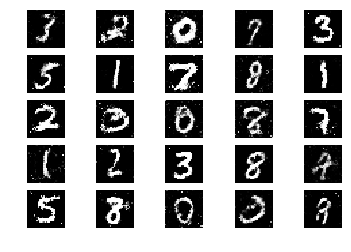

(32, 1) float64
(32, 1) float640.732903, acc.: 56.25%] [G loss: 1.094220]
(32, 1) float640.664139, acc.: 60.94%] [G loss: 1.058642]
(32, 1) float640.662618, acc.: 59.38%] [G loss: 1.052044]
(32, 1) float640.618460, acc.: 64.06%] [G loss: 1.039120]
(32, 1) float640.667893, acc.: 60.94%] [G loss: 1.061195]
(32, 1) float640.576296, acc.: 73.44%] [G loss: 1.051929]
(32, 1) float640.602872, acc.: 68.75%] [G loss: 1.025130]
(32, 1) float640.654406, acc.: 67.19%] [G loss: 0.986547]
(32, 1) float640.566158, acc.: 65.62%] [G loss: 0.888681]
(32, 1) float640.608602, acc.: 62.50%] [G loss: 0.967518]
(32, 1) float640.670646, acc.: 59.38%] [G loss: 1.015944]
(32, 1) float640.589060, acc.: 68.75%] [G loss: 1.072137]
(32, 1) float640.617322, acc.: 65.62%] [G loss: 1.087713]
(32, 1) float640.657770, acc.: 62.50%] [G loss: 1.031559]
(32, 1) float640.649280, acc.: 65.62%] [G loss: 1.058297]
(32, 1) float640.635824, acc.: 62.50%] [G loss: 0.984515]
(32, 1) float640.544777, acc.: 75.00%] [G loss: 1.107489

(32, 1) float640.682393, acc.: 56.25%] [G loss: 0.936260]
(32, 1) float640.608197, acc.: 71.88%] [G loss: 0.972843]
(32, 1) float640.672018, acc.: 60.94%] [G loss: 1.025101]
(32, 1) float640.603811, acc.: 67.19%] [G loss: 1.025517]
(32, 1) float640.630938, acc.: 60.94%] [G loss: 0.985575]
(32, 1) float640.532745, acc.: 75.00%] [G loss: 1.156497]
(32, 1) float640.649671, acc.: 65.62%] [G loss: 1.032016]
(32, 1) float640.699909, acc.: 53.12%] [G loss: 1.068936]
(32, 1) float640.559648, acc.: 70.31%] [G loss: 0.984559]
(32, 1) float640.651880, acc.: 60.94%] [G loss: 0.945167]
(32, 1) float640.591184, acc.: 65.62%] [G loss: 1.044582]
(32, 1) float640.637276, acc.: 56.25%] [G loss: 1.062855]
(32, 1) float640.557784, acc.: 75.00%] [G loss: 1.036770]
(32, 1) float640.597229, acc.: 67.19%] [G loss: 1.031213]
(32, 1) float640.633453, acc.: 68.75%] [G loss: 1.070780]
(32, 1) float640.678759, acc.: 62.50%] [G loss: 0.997679]
(32, 1) float640.520009, acc.: 75.00%] [G loss: 1.123760]
(32, 1) float6

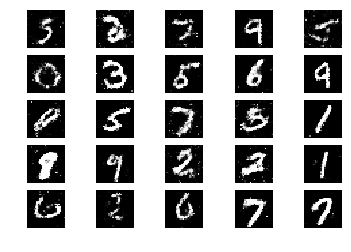

(32, 1) float64
(32, 1) float640.623395, acc.: 62.50%] [G loss: 0.993077]
(32, 1) float640.658287, acc.: 64.06%] [G loss: 0.954469]
(32, 1) float640.661889, acc.: 53.12%] [G loss: 0.974323]
(32, 1) float640.635329, acc.: 60.94%] [G loss: 0.935434]
(32, 1) float640.653120, acc.: 62.50%] [G loss: 1.233378]
(32, 1) float640.643681, acc.: 62.50%] [G loss: 0.912389]
(32, 1) float640.577930, acc.: 67.19%] [G loss: 0.991057]
(32, 1) float640.644636, acc.: 59.38%] [G loss: 0.984330]
(32, 1) float640.567866, acc.: 67.19%] [G loss: 1.111216]
(32, 1) float640.610332, acc.: 64.06%] [G loss: 1.112316]
(32, 1) float640.700278, acc.: 60.94%] [G loss: 0.968225]
(32, 1) float640.690840, acc.: 62.50%] [G loss: 0.975000]
(32, 1) float640.588498, acc.: 65.62%] [G loss: 0.989186]
(32, 1) float640.601783, acc.: 70.31%] [G loss: 0.964541]
(32, 1) float640.672101, acc.: 57.81%] [G loss: 1.122179]
(32, 1) float640.630793, acc.: 67.19%] [G loss: 0.961747]
(32, 1) float640.617613, acc.: 67.19%] [G loss: 0.964115

(32, 1) float640.608939, acc.: 65.62%] [G loss: 0.953985]
(32, 1) float640.576243, acc.: 71.88%] [G loss: 1.044256]
(32, 1) float640.608230, acc.: 65.62%] [G loss: 0.998342]
(32, 1) float640.627622, acc.: 62.50%] [G loss: 1.119180]
(32, 1) float640.615391, acc.: 68.75%] [G loss: 1.044467]
(32, 1) float640.762349, acc.: 53.12%] [G loss: 0.863905]
(32, 1) float640.669267, acc.: 51.56%] [G loss: 0.928820]
(32, 1) float640.615526, acc.: 67.19%] [G loss: 0.992703]
(32, 1) float640.625383, acc.: 68.75%] [G loss: 0.974111]
(32, 1) float640.616038, acc.: 62.50%] [G loss: 1.103529]
(32, 1) float640.585166, acc.: 65.62%] [G loss: 1.081283]
(32, 1) float640.647613, acc.: 56.25%] [G loss: 1.151633]
(32, 1) float640.594227, acc.: 73.44%] [G loss: 1.046613]
(32, 1) float640.627893, acc.: 56.25%] [G loss: 0.964955]
(32, 1) float640.593550, acc.: 70.31%] [G loss: 1.143731]
(32, 1) float640.682764, acc.: 57.81%] [G loss: 1.027989]
(32, 1) float640.724479, acc.: 50.00%] [G loss: 1.037009]
(32, 1) float6

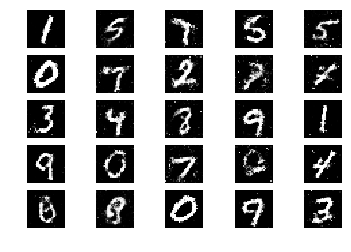

(32, 1) float64
(32, 1) float640.725292, acc.: 51.56%] [G loss: 1.008828]
(32, 1) float640.661169, acc.: 56.25%] [G loss: 0.932228]
(32, 1) float640.603072, acc.: 67.19%] [G loss: 0.953788]
(32, 1) float640.555801, acc.: 71.88%] [G loss: 1.012345]
(32, 1) float640.557367, acc.: 68.75%] [G loss: 1.009911]
(32, 1) float640.628123, acc.: 65.62%] [G loss: 1.032738]
(32, 1) float640.630890, acc.: 62.50%] [G loss: 0.912071]
(32, 1) float640.629790, acc.: 62.50%] [G loss: 1.082028]
(32, 1) float640.670682, acc.: 60.94%] [G loss: 0.972245]
(32, 1) float640.641149, acc.: 60.94%] [G loss: 1.029710]
(32, 1) float640.577740, acc.: 75.00%] [G loss: 0.875122]
(32, 1) float640.572322, acc.: 68.75%] [G loss: 0.951109]
(32, 1) float640.617976, acc.: 70.31%] [G loss: 0.928591]
(32, 1) float640.680268, acc.: 59.38%] [G loss: 1.006374]
(32, 1) float640.705190, acc.: 57.81%] [G loss: 0.919796]
(32, 1) float640.654426, acc.: 64.06%] [G loss: 1.092083]
(32, 1) float640.613410, acc.: 68.75%] [G loss: 1.027693

(32, 1) float640.711330, acc.: 53.12%] [G loss: 1.109475]
(32, 1) float640.742614, acc.: 54.69%] [G loss: 0.999551]
(32, 1) float640.670733, acc.: 60.94%] [G loss: 0.950077]
(32, 1) float640.585859, acc.: 64.06%] [G loss: 0.870099]
(32, 1) float640.601200, acc.: 71.88%] [G loss: 1.015296]
(32, 1) float640.672074, acc.: 53.12%] [G loss: 0.946920]
(32, 1) float640.547882, acc.: 79.69%] [G loss: 1.041307]
(32, 1) float640.618179, acc.: 62.50%] [G loss: 0.888091]
(32, 1) float640.616735, acc.: 60.94%] [G loss: 1.009705]
(32, 1) float640.558168, acc.: 75.00%] [G loss: 1.012406]
(32, 1) float640.646616, acc.: 68.75%] [G loss: 1.089314]
(32, 1) float640.630278, acc.: 60.94%] [G loss: 0.884501]
(32, 1) float640.606335, acc.: 70.31%] [G loss: 0.909170]
(32, 1) float640.690138, acc.: 56.25%] [G loss: 1.035330]
(32, 1) float640.597951, acc.: 70.31%] [G loss: 0.896114]
(32, 1) float640.674406, acc.: 56.25%] [G loss: 1.026909]
(32, 1) float640.609202, acc.: 67.19%] [G loss: 1.010822]
(32, 1) float6

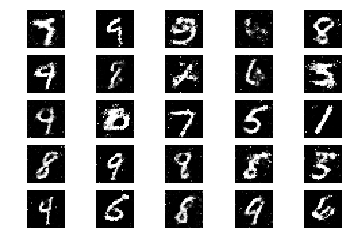

(32, 1) float64
(32, 1) float640.637515, acc.: 73.44%] [G loss: 0.966928]
(32, 1) float640.542798, acc.: 68.75%] [G loss: 0.898273]
(32, 1) float640.711994, acc.: 54.69%] [G loss: 1.032315]
(32, 1) float640.632308, acc.: 68.75%] [G loss: 0.971450]
(32, 1) float640.555512, acc.: 70.31%] [G loss: 1.027311]
(32, 1) float640.609444, acc.: 62.50%] [G loss: 1.105104]
(32, 1) float640.599628, acc.: 67.19%] [G loss: 0.965597]
(32, 1) float640.582605, acc.: 70.31%] [G loss: 0.989001]
(32, 1) float640.634291, acc.: 68.75%] [G loss: 1.067910]
(32, 1) float640.652992, acc.: 62.50%] [G loss: 1.020178]
(32, 1) float640.621922, acc.: 62.50%] [G loss: 1.090410]
(32, 1) float640.607042, acc.: 65.62%] [G loss: 1.013066]
(32, 1) float640.683421, acc.: 59.38%] [G loss: 0.931156]
(32, 1) float640.518366, acc.: 85.94%] [G loss: 1.048802]
(32, 1) float640.697092, acc.: 59.38%] [G loss: 0.982278]
(32, 1) float640.728013, acc.: 59.38%] [G loss: 1.000471]
(32, 1) float640.667366, acc.: 60.94%] [G loss: 1.183186

(32, 1) float640.619766, acc.: 57.81%] [G loss: 0.927347]
(32, 1) float640.595330, acc.: 64.06%] [G loss: 1.030908]
(32, 1) float640.627403, acc.: 59.38%] [G loss: 1.056094]
(32, 1) float640.645055, acc.: 53.12%] [G loss: 0.843966]
(32, 1) float640.652159, acc.: 57.81%] [G loss: 0.988511]
(32, 1) float640.549596, acc.: 73.44%] [G loss: 0.962956]
(32, 1) float640.746241, acc.: 46.88%] [G loss: 1.028344]
(32, 1) float640.605503, acc.: 68.75%] [G loss: 1.153035]
(32, 1) float640.661465, acc.: 56.25%] [G loss: 1.011439]
(32, 1) float640.642940, acc.: 62.50%] [G loss: 0.936628]
(32, 1) float640.606984, acc.: 68.75%] [G loss: 0.889422]
(32, 1) float640.644972, acc.: 65.62%] [G loss: 0.977403]
(32, 1) float640.616558, acc.: 71.88%] [G loss: 0.872685]
(32, 1) float640.581097, acc.: 65.62%] [G loss: 0.961490]
(32, 1) float640.643290, acc.: 62.50%] [G loss: 1.007207]
(32, 1) float640.659002, acc.: 62.50%] [G loss: 1.051653]
(32, 1) float640.633069, acc.: 71.88%] [G loss: 0.939418]
(32, 1) float6

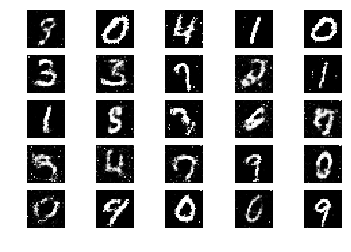

(32, 1) float64
(32, 1) float640.567335, acc.: 68.75%] [G loss: 0.930800]
(32, 1) float640.609059, acc.: 70.31%] [G loss: 1.116692]
(32, 1) float640.640780, acc.: 62.50%] [G loss: 0.993355]
(32, 1) float640.560662, acc.: 71.88%] [G loss: 0.940340]
(32, 1) float640.635270, acc.: 64.06%] [G loss: 0.911220]
(32, 1) float640.697848, acc.: 46.88%] [G loss: 0.997547]
(32, 1) float640.605181, acc.: 68.75%] [G loss: 0.909609]
(32, 1) float640.597934, acc.: 67.19%] [G loss: 1.056567]
(32, 1) float640.625726, acc.: 62.50%] [G loss: 1.109468]
(32, 1) float640.626623, acc.: 62.50%] [G loss: 0.964594]
(32, 1) float640.675525, acc.: 59.38%] [G loss: 1.131861]
(32, 1) float640.685066, acc.: 54.69%] [G loss: 1.052805]
(32, 1) float640.615434, acc.: 75.00%] [G loss: 1.003868]
(32, 1) float640.610100, acc.: 70.31%] [G loss: 1.037858]
(32, 1) float640.636585, acc.: 59.38%] [G loss: 1.088889]
(32, 1) float640.573562, acc.: 70.31%] [G loss: 1.068877]
(32, 1) float640.577392, acc.: 76.56%] [G loss: 1.068234

(32, 1) float640.638648, acc.: 68.75%] [G loss: 1.047256]
(32, 1) float640.497131, acc.: 82.81%] [G loss: 1.064044]
(32, 1) float640.612482, acc.: 71.88%] [G loss: 1.057175]
(32, 1) float640.642644, acc.: 62.50%] [G loss: 1.080257]
(32, 1) float640.570899, acc.: 75.00%] [G loss: 1.116583]
(32, 1) float640.676387, acc.: 60.94%] [G loss: 1.047753]
(32, 1) float640.606936, acc.: 67.19%] [G loss: 0.954604]
(32, 1) float640.583917, acc.: 68.75%] [G loss: 1.014516]
(32, 1) float640.580545, acc.: 67.19%] [G loss: 0.932232]
(32, 1) float640.590061, acc.: 71.88%] [G loss: 1.044846]
(32, 1) float640.646888, acc.: 68.75%] [G loss: 1.068668]
(32, 1) float640.622097, acc.: 65.62%] [G loss: 1.093451]
(32, 1) float640.606343, acc.: 60.94%] [G loss: 0.973204]
(32, 1) float640.702790, acc.: 54.69%] [G loss: 1.008798]
(32, 1) float640.648310, acc.: 62.50%] [G loss: 1.080056]
(32, 1) float640.657459, acc.: 62.50%] [G loss: 0.976295]
(32, 1) float640.631620, acc.: 68.75%] [G loss: 1.025300]
(32, 1) float6

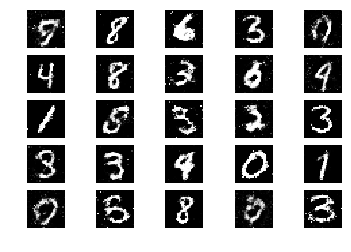

(32, 1) float64
(32, 1) float640.707083, acc.: 57.81%] [G loss: 1.055122]
(32, 1) float640.651642, acc.: 62.50%] [G loss: 1.016919]
(32, 1) float640.670717, acc.: 65.62%] [G loss: 0.922523]
(32, 1) float640.616995, acc.: 65.62%] [G loss: 1.031138]
(32, 1) float640.654720, acc.: 62.50%] [G loss: 1.014808]
(32, 1) float640.538932, acc.: 79.69%] [G loss: 1.000374]
(32, 1) float640.684798, acc.: 51.56%] [G loss: 0.999627]
(32, 1) float640.706284, acc.: 53.12%] [G loss: 0.949178]
(32, 1) float640.591325, acc.: 70.31%] [G loss: 1.137577]
(32, 1) float640.613394, acc.: 62.50%] [G loss: 1.058073]
(32, 1) float640.593377, acc.: 70.31%] [G loss: 1.072461]
(32, 1) float640.578084, acc.: 75.00%] [G loss: 0.900750]
(32, 1) float640.717463, acc.: 56.25%] [G loss: 1.017113]
(32, 1) float640.728023, acc.: 48.44%] [G loss: 0.953164]
(32, 1) float640.596718, acc.: 65.62%] [G loss: 1.082515]
(32, 1) float640.623209, acc.: 64.06%] [G loss: 1.066283]
(32, 1) float640.745812, acc.: 50.00%] [G loss: 0.972958

(32, 1) float640.646574, acc.: 65.62%] [G loss: 1.013433]
(32, 1) float640.627500, acc.: 70.31%] [G loss: 0.915042]
(32, 1) float640.651143, acc.: 64.06%] [G loss: 0.955668]
(32, 1) float640.624078, acc.: 64.06%] [G loss: 0.983416]
(32, 1) float640.612932, acc.: 64.06%] [G loss: 0.951254]
(32, 1) float640.589100, acc.: 71.88%] [G loss: 0.992954]
(32, 1) float640.644135, acc.: 62.50%] [G loss: 1.100631]
(32, 1) float640.617027, acc.: 73.44%] [G loss: 1.002861]
(32, 1) float640.663289, acc.: 62.50%] [G loss: 0.972070]
(32, 1) float640.613805, acc.: 71.88%] [G loss: 1.035891]
(32, 1) float640.600609, acc.: 65.62%] [G loss: 0.992731]
(32, 1) float640.600916, acc.: 64.06%] [G loss: 1.000001]
(32, 1) float640.669873, acc.: 59.38%] [G loss: 0.891951]
(32, 1) float640.721533, acc.: 53.12%] [G loss: 0.922228]
(32, 1) float640.648858, acc.: 60.94%] [G loss: 0.997354]
(32, 1) float640.594215, acc.: 60.94%] [G loss: 1.086375]
(32, 1) float640.566313, acc.: 71.88%] [G loss: 1.071962]
(32, 1) float6

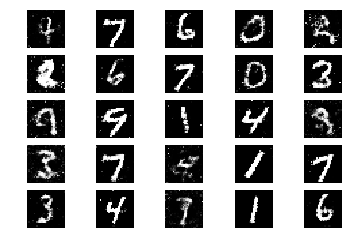

(32, 1) float64
(32, 1) float640.784108, acc.: 48.44%] [G loss: 0.950898]
(32, 1) float640.692593, acc.: 57.81%] [G loss: 1.043202]
(32, 1) float640.588617, acc.: 65.62%] [G loss: 0.946219]
(32, 1) float640.629102, acc.: 62.50%] [G loss: 0.959643]
(32, 1) float640.602190, acc.: 68.75%] [G loss: 0.907207]
(32, 1) float640.647814, acc.: 62.50%] [G loss: 1.067909]
(32, 1) float640.641139, acc.: 62.50%] [G loss: 0.981218]
(32, 1) float640.640577, acc.: 64.06%] [G loss: 0.962957]
(32, 1) float640.676788, acc.: 57.81%] [G loss: 1.098363]
(32, 1) float640.599927, acc.: 65.62%] [G loss: 1.109139]
(32, 1) float640.669701, acc.: 64.06%] [G loss: 0.846900]
(32, 1) float640.680463, acc.: 57.81%] [G loss: 0.882984]
(32, 1) float640.616616, acc.: 64.06%] [G loss: 0.975097]
(32, 1) float640.621109, acc.: 68.75%] [G loss: 0.962371]
(32, 1) float640.698249, acc.: 54.69%] [G loss: 0.951933]
(32, 1) float640.694849, acc.: 56.25%] [G loss: 0.967202]
(32, 1) float640.564593, acc.: 73.44%] [G loss: 1.072775

(32, 1) float640.573947, acc.: 71.88%] [G loss: 0.964321]
(32, 1) float640.598232, acc.: 75.00%] [G loss: 1.052826]
(32, 1) float640.633800, acc.: 68.75%] [G loss: 0.886176]
(32, 1) float640.567596, acc.: 70.31%] [G loss: 0.944878]
(32, 1) float640.577359, acc.: 73.44%] [G loss: 1.043372]
(32, 1) float640.631267, acc.: 68.75%] [G loss: 1.051742]
(32, 1) float640.646313, acc.: 62.50%] [G loss: 1.094224]
(32, 1) float640.686405, acc.: 54.69%] [G loss: 1.154187]
(32, 1) float640.682000, acc.: 59.38%] [G loss: 1.103624]
(32, 1) float640.541883, acc.: 71.88%] [G loss: 1.092308]
(32, 1) float640.657925, acc.: 65.62%] [G loss: 0.949066]
(32, 1) float640.692645, acc.: 54.69%] [G loss: 0.897164]
(32, 1) float640.707032, acc.: 51.56%] [G loss: 0.988230]
(32, 1) float640.712661, acc.: 51.56%] [G loss: 0.957149]
(32, 1) float640.562353, acc.: 64.06%] [G loss: 1.064764]
(32, 1) float640.590627, acc.: 73.44%] [G loss: 0.983540]
(32, 1) float640.654559, acc.: 60.94%] [G loss: 0.950730]
(32, 1) float6

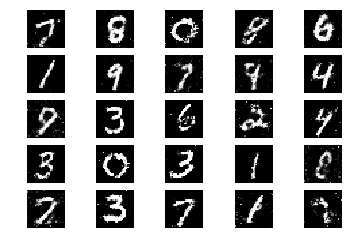

(32, 1) float64
(32, 1) float640.605739, acc.: 64.06%] [G loss: 1.044469]
(32, 1) float640.537942, acc.: 68.75%] [G loss: 1.059144]
(32, 1) float640.670732, acc.: 59.38%] [G loss: 0.973765]
(32, 1) float640.700846, acc.: 56.25%] [G loss: 0.915484]
(32, 1) float640.654472, acc.: 57.81%] [G loss: 0.972499]
(32, 1) float640.590357, acc.: 70.31%] [G loss: 0.968745]
(32, 1) float640.591648, acc.: 62.50%] [G loss: 1.060331]
(32, 1) float640.540222, acc.: 78.12%] [G loss: 1.059015]
(32, 1) float640.654230, acc.: 57.81%] [G loss: 0.944989]
(32, 1) float640.666974, acc.: 60.94%] [G loss: 1.126838]
(32, 1) float640.639140, acc.: 62.50%] [G loss: 1.085081]
(32, 1) float640.594111, acc.: 60.94%] [G loss: 1.071095]
(32, 1) float640.644609, acc.: 62.50%] [G loss: 0.985668]
(32, 1) float640.611655, acc.: 67.19%] [G loss: 1.019335]
(32, 1) float640.668042, acc.: 60.94%] [G loss: 0.931691]
(32, 1) float640.612447, acc.: 65.62%] [G loss: 1.066414]
(32, 1) float640.580965, acc.: 68.75%] [G loss: 1.008582

(32, 1) float640.622567, acc.: 68.75%] [G loss: 1.044374]
(32, 1) float640.583011, acc.: 68.75%] [G loss: 1.063620]
(32, 1) float640.674557, acc.: 56.25%] [G loss: 1.054100]
(32, 1) float640.601717, acc.: 68.75%] [G loss: 0.981864]
(32, 1) float640.619520, acc.: 68.75%] [G loss: 1.045107]
(32, 1) float640.569934, acc.: 67.19%] [G loss: 1.091834]
(32, 1) float640.615949, acc.: 62.50%] [G loss: 0.991568]
(32, 1) float640.644523, acc.: 57.81%] [G loss: 1.033991]
(32, 1) float640.667733, acc.: 57.81%] [G loss: 0.997533]
(32, 1) float640.631138, acc.: 68.75%] [G loss: 1.067106]
(32, 1) float640.670994, acc.: 54.69%] [G loss: 1.072186]
(32, 1) float640.725437, acc.: 53.12%] [G loss: 0.957986]
(32, 1) float640.593938, acc.: 70.31%] [G loss: 0.891561]
(32, 1) float640.622018, acc.: 65.62%] [G loss: 0.939144]
(32, 1) float640.705767, acc.: 62.50%] [G loss: 0.904819]
(32, 1) float640.582505, acc.: 70.31%] [G loss: 0.960523]
(32, 1) float640.706577, acc.: 48.44%] [G loss: 0.966480]
(32, 1) float6

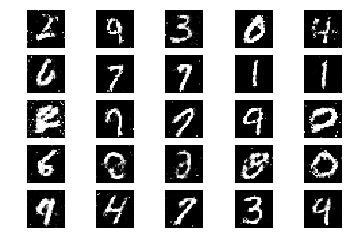

(32, 1) float64
(32, 1) float640.649875, acc.: 65.62%] [G loss: 1.035176]
(32, 1) float640.628498, acc.: 64.06%] [G loss: 1.118823]
(32, 1) float640.633794, acc.: 65.62%] [G loss: 1.049091]
(32, 1) float640.694781, acc.: 56.25%] [G loss: 0.939411]
(32, 1) float640.630971, acc.: 65.62%] [G loss: 1.045034]
(32, 1) float640.630492, acc.: 64.06%] [G loss: 0.849222]
(32, 1) float640.650102, acc.: 60.94%] [G loss: 0.948057]
(32, 1) float640.610491, acc.: 70.31%] [G loss: 1.033565]
(32, 1) float640.637385, acc.: 67.19%] [G loss: 0.933357]
(32, 1) float640.644291, acc.: 60.94%] [G loss: 1.040579]
(32, 1) float640.703702, acc.: 51.56%] [G loss: 1.086863]
(32, 1) float640.636258, acc.: 65.62%] [G loss: 1.099844]
(32, 1) float640.653345, acc.: 62.50%] [G loss: 1.043093]
(32, 1) float640.661854, acc.: 56.25%] [G loss: 1.072131]
(32, 1) float640.587220, acc.: 75.00%] [G loss: 0.904180]
(32, 1) float640.616929, acc.: 67.19%] [G loss: 1.001823]
(32, 1) float640.658399, acc.: 62.50%] [G loss: 1.045374

(32, 1) float640.688817, acc.: 67.19%] [G loss: 1.057031]
(32, 1) float640.575309, acc.: 71.88%] [G loss: 0.934836]
(32, 1) float640.646033, acc.: 73.44%] [G loss: 0.980388]
(32, 1) float640.694102, acc.: 59.38%] [G loss: 0.950785]
(32, 1) float640.593436, acc.: 70.31%] [G loss: 0.965324]
(32, 1) float640.597213, acc.: 67.19%] [G loss: 1.003735]
(32, 1) float640.600687, acc.: 65.62%] [G loss: 0.974068]
(32, 1) float640.560701, acc.: 73.44%] [G loss: 0.899369]
(32, 1) float640.716594, acc.: 59.38%] [G loss: 0.917270]
(32, 1) float640.626827, acc.: 64.06%] [G loss: 1.104851]
(32, 1) float640.577469, acc.: 68.75%] [G loss: 1.034534]
(32, 1) float640.608092, acc.: 67.19%] [G loss: 1.092891]
(32, 1) float640.636530, acc.: 65.62%] [G loss: 1.086488]
(32, 1) float640.625857, acc.: 64.06%] [G loss: 1.105182]
(32, 1) float640.648637, acc.: 59.38%] [G loss: 0.871528]
(32, 1) float640.697349, acc.: 59.38%] [G loss: 0.963724]
(32, 1) float640.658399, acc.: 57.81%] [G loss: 0.994921]
(32, 1) float6

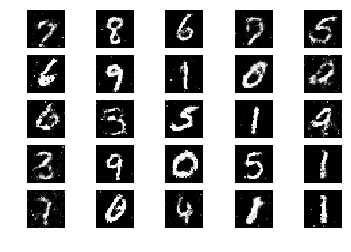

(32, 1) float64
(32, 1) float640.680270, acc.: 57.81%] [G loss: 1.009518]
(32, 1) float640.660477, acc.: 60.94%] [G loss: 0.830498]
(32, 1) float640.539260, acc.: 76.56%] [G loss: 0.970273]
(32, 1) float640.676655, acc.: 59.38%] [G loss: 0.971515]
(32, 1) float640.670502, acc.: 51.56%] [G loss: 0.980859]
(32, 1) float640.658256, acc.: 57.81%] [G loss: 0.928515]
(32, 1) float640.634441, acc.: 68.75%] [G loss: 1.068017]
(32, 1) float640.556590, acc.: 71.88%] [G loss: 1.054184]
(32, 1) float640.621500, acc.: 70.31%] [G loss: 0.992930]
(32, 1) float640.552223, acc.: 78.12%] [G loss: 0.860174]
(32, 1) float640.636602, acc.: 67.19%] [G loss: 0.911640]
(32, 1) float640.569313, acc.: 70.31%] [G loss: 0.903343]
(32, 1) float640.578914, acc.: 68.75%] [G loss: 1.042807]
(32, 1) float640.638512, acc.: 65.62%] [G loss: 1.047523]
(32, 1) float640.619667, acc.: 62.50%] [G loss: 1.075609]
(32, 1) float640.614150, acc.: 57.81%] [G loss: 1.023241]
(32, 1) float640.701497, acc.: 56.25%] [G loss: 1.002736

(32, 1) float640.694962, acc.: 51.56%] [G loss: 0.985778]
(32, 1) float640.667067, acc.: 62.50%] [G loss: 0.984818]
(32, 1) float640.636400, acc.: 64.06%] [G loss: 1.093067]
(32, 1) float640.605555, acc.: 71.88%] [G loss: 0.941989]
(32, 1) float640.662429, acc.: 56.25%] [G loss: 1.032827]
(32, 1) float640.649590, acc.: 65.62%] [G loss: 0.928349]
(32, 1) float640.586982, acc.: 70.31%] [G loss: 0.894946]
(32, 1) float640.664772, acc.: 65.62%] [G loss: 1.006419]
(32, 1) float640.673062, acc.: 53.12%] [G loss: 0.972955]
(32, 1) float640.630963, acc.: 65.62%] [G loss: 0.964932]
(32, 1) float640.646926, acc.: 57.81%] [G loss: 0.931737]
(32, 1) float640.605524, acc.: 67.19%] [G loss: 1.042424]
(32, 1) float640.595553, acc.: 65.62%] [G loss: 0.999422]
(32, 1) float640.633457, acc.: 62.50%] [G loss: 1.021978]
(32, 1) float640.628295, acc.: 59.38%] [G loss: 1.061985]
(32, 1) float640.636116, acc.: 57.81%] [G loss: 1.119167]
(32, 1) float640.616893, acc.: 67.19%] [G loss: 0.954502]
(32, 1) float6

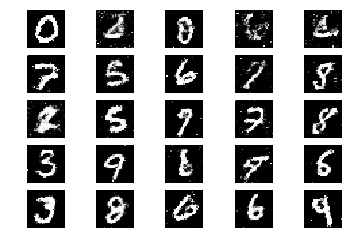

(32, 1) float64
(32, 1) float640.636224, acc.: 57.81%] [G loss: 0.939801]
(32, 1) float640.564936, acc.: 76.56%] [G loss: 1.046143]
(32, 1) float640.630016, acc.: 68.75%] [G loss: 1.063862]
(32, 1) float640.605034, acc.: 65.62%] [G loss: 0.997322]
(32, 1) float640.593202, acc.: 65.62%] [G loss: 1.139511]
(32, 1) float640.689305, acc.: 59.38%] [G loss: 0.985555]
(32, 1) float640.579030, acc.: 70.31%] [G loss: 1.142586]
(32, 1) float640.638523, acc.: 62.50%] [G loss: 1.085619]
(32, 1) float640.581127, acc.: 68.75%] [G loss: 0.969913]
(32, 1) float640.687710, acc.: 56.25%] [G loss: 0.977599]
(32, 1) float640.637008, acc.: 65.62%] [G loss: 0.957710]
(32, 1) float640.627299, acc.: 59.38%] [G loss: 0.946766]
(32, 1) float640.567446, acc.: 65.62%] [G loss: 1.028454]
(32, 1) float640.694074, acc.: 53.12%] [G loss: 1.029539]
(32, 1) float640.609127, acc.: 67.19%] [G loss: 0.940424]
(32, 1) float640.649335, acc.: 64.06%] [G loss: 1.064929]
(32, 1) float640.605759, acc.: 64.06%] [G loss: 1.095222

(32, 1) float640.652708, acc.: 64.06%] [G loss: 0.973219]
(32, 1) float640.720465, acc.: 59.38%] [G loss: 1.108938]
(32, 1) float640.648451, acc.: 56.25%] [G loss: 1.093865]
(32, 1) float640.632893, acc.: 67.19%] [G loss: 1.000881]
(32, 1) float640.604318, acc.: 64.06%] [G loss: 1.021459]
(32, 1) float640.692796, acc.: 54.69%] [G loss: 0.970998]
(32, 1) float640.648749, acc.: 60.94%] [G loss: 1.084558]
(32, 1) float640.706788, acc.: 54.69%] [G loss: 1.038588]
(32, 1) float640.641939, acc.: 60.94%] [G loss: 1.022894]
(32, 1) float640.649080, acc.: 62.50%] [G loss: 1.093195]
(32, 1) float640.574050, acc.: 71.88%] [G loss: 1.027518]
(32, 1) float640.595018, acc.: 71.88%] [G loss: 1.086943]
(32, 1) float640.727596, acc.: 56.25%] [G loss: 0.907912]
(32, 1) float640.557923, acc.: 68.75%] [G loss: 0.999998]
(32, 1) float640.630482, acc.: 60.94%] [G loss: 1.080554]
(32, 1) float640.654556, acc.: 60.94%] [G loss: 1.002632]
(32, 1) float640.639935, acc.: 65.62%] [G loss: 1.122367]
(32, 1) float6

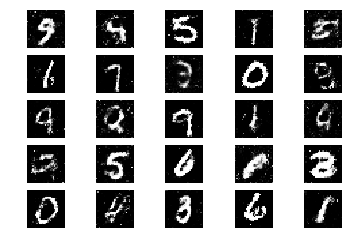

(32, 1) float64
(32, 1) float640.588404, acc.: 68.75%] [G loss: 1.037243]
(32, 1) float640.625997, acc.: 62.50%] [G loss: 0.855312]
(32, 1) float640.570259, acc.: 67.19%] [G loss: 1.187234]
(32, 1) float640.597050, acc.: 64.06%] [G loss: 0.952044]
(32, 1) float640.562458, acc.: 71.88%] [G loss: 1.036534]
(32, 1) float640.606644, acc.: 75.00%] [G loss: 1.054417]
(32, 1) float640.637920, acc.: 64.06%] [G loss: 1.135104]
(32, 1) float640.553424, acc.: 73.44%] [G loss: 1.138560]
(32, 1) float640.654121, acc.: 59.38%] [G loss: 0.877674]
(32, 1) float640.694937, acc.: 53.12%] [G loss: 0.923253]
(32, 1) float640.635558, acc.: 60.94%] [G loss: 0.980830]
(32, 1) float640.620567, acc.: 60.94%] [G loss: 1.012443]
(32, 1) float640.592508, acc.: 70.31%] [G loss: 1.056277]
(32, 1) float640.693226, acc.: 59.38%] [G loss: 0.947951]
(32, 1) float640.570516, acc.: 68.75%] [G loss: 0.829027]
(32, 1) float640.617972, acc.: 67.19%] [G loss: 0.910794]
(32, 1) float640.610683, acc.: 70.31%] [G loss: 0.890151

(32, 1) float640.567410, acc.: 68.75%] [G loss: 1.057803]
(32, 1) float640.613029, acc.: 65.62%] [G loss: 0.992709]
(32, 1) float640.623444, acc.: 68.75%] [G loss: 0.873979]
(32, 1) float640.607240, acc.: 65.62%] [G loss: 0.935502]
(32, 1) float640.665614, acc.: 65.62%] [G loss: 1.066724]
(32, 1) float640.604748, acc.: 62.50%] [G loss: 1.031358]
(32, 1) float640.629136, acc.: 68.75%] [G loss: 0.999939]
(32, 1) float640.661764, acc.: 60.94%] [G loss: 0.937622]
(32, 1) float640.695763, acc.: 60.94%] [G loss: 0.952807]
(32, 1) float640.633185, acc.: 67.19%] [G loss: 1.043407]
(32, 1) float640.725436, acc.: 56.25%] [G loss: 0.972413]
(32, 1) float640.583280, acc.: 73.44%] [G loss: 1.049078]
(32, 1) float640.729665, acc.: 54.69%] [G loss: 0.987979]
(32, 1) float640.697214, acc.: 56.25%] [G loss: 1.062182]
(32, 1) float640.730149, acc.: 54.69%] [G loss: 0.994227]
(32, 1) float640.577287, acc.: 73.44%] [G loss: 0.885288]
(32, 1) float640.582986, acc.: 68.75%] [G loss: 0.992959]
(32, 1) float6

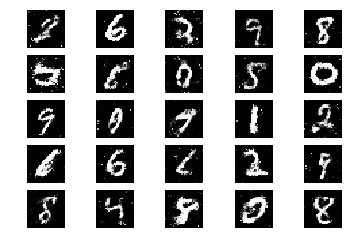

(32, 1) float64
(32, 1) float640.595654, acc.: 71.88%] [G loss: 0.975648]
(32, 1) float640.633698, acc.: 57.81%] [G loss: 0.946669]
(32, 1) float640.721480, acc.: 57.81%] [G loss: 0.925758]
(32, 1) float640.603294, acc.: 70.31%] [G loss: 1.012225]
(32, 1) float640.604458, acc.: 67.19%] [G loss: 0.980004]
(32, 1) float640.706896, acc.: 53.12%] [G loss: 1.010440]
(32, 1) float640.629836, acc.: 75.00%] [G loss: 1.134928]
(32, 1) float640.674538, acc.: 57.81%] [G loss: 1.038333]
(32, 1) float640.701700, acc.: 56.25%] [G loss: 1.027987]
(32, 1) float640.626710, acc.: 60.94%] [G loss: 0.914936]
(32, 1) float640.539532, acc.: 75.00%] [G loss: 0.954598]
(32, 1) float640.642411, acc.: 59.38%] [G loss: 0.874589]
(32, 1) float640.556896, acc.: 70.31%] [G loss: 0.944496]
(32, 1) float640.552409, acc.: 70.31%] [G loss: 0.987051]
(32, 1) float640.597990, acc.: 73.44%] [G loss: 0.974493]
(32, 1) float640.589783, acc.: 67.19%] [G loss: 1.105205]
(32, 1) float640.585465, acc.: 71.88%] [G loss: 0.998663

(32, 1) float640.653701, acc.: 64.06%] [G loss: 0.980735]
(32, 1) float640.645806, acc.: 62.50%] [G loss: 0.908857]
(32, 1) float640.608802, acc.: 68.75%] [G loss: 0.930675]
(32, 1) float640.590314, acc.: 67.19%] [G loss: 0.984591]
(32, 1) float640.581209, acc.: 70.31%] [G loss: 1.083164]
(32, 1) float640.605295, acc.: 67.19%] [G loss: 1.029185]
(32, 1) float640.637567, acc.: 62.50%] [G loss: 1.012041]
(32, 1) float640.623553, acc.: 59.38%] [G loss: 1.072743]
(32, 1) float640.626396, acc.: 60.94%] [G loss: 1.098244]
(32, 1) float640.585354, acc.: 68.75%] [G loss: 1.029417]
(32, 1) float640.629131, acc.: 65.62%] [G loss: 1.015791]
(32, 1) float640.696549, acc.: 50.00%] [G loss: 1.056986]
(32, 1) float640.567470, acc.: 62.50%] [G loss: 1.020851]
(32, 1) float640.680216, acc.: 60.94%] [G loss: 1.069346]
(32, 1) float640.636812, acc.: 62.50%] [G loss: 1.127854]
(32, 1) float640.625464, acc.: 68.75%] [G loss: 1.049089]
(32, 1) float640.642756, acc.: 57.81%] [G loss: 0.915809]
(32, 1) float6

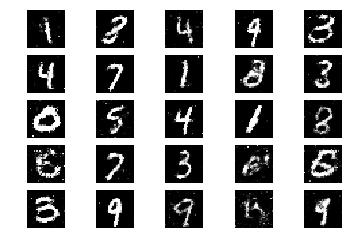

(32, 1) float64
(32, 1) float640.623668, acc.: 70.31%] [G loss: 0.994045]
(32, 1) float640.697284, acc.: 57.81%] [G loss: 0.892287]
(32, 1) float640.571637, acc.: 65.62%] [G loss: 0.933675]
(32, 1) float640.661855, acc.: 60.94%] [G loss: 0.944585]
(32, 1) float640.706190, acc.: 54.69%] [G loss: 1.210152]
(32, 1) float640.690843, acc.: 54.69%] [G loss: 0.962641]
(32, 1) float640.593607, acc.: 67.19%] [G loss: 1.159884]
(32, 1) float640.600179, acc.: 68.75%] [G loss: 0.946516]
(32, 1) float640.627768, acc.: 64.06%] [G loss: 1.004168]
(32, 1) float640.618318, acc.: 65.62%] [G loss: 1.044200]
(32, 1) float640.544511, acc.: 71.88%] [G loss: 0.888328]
(32, 1) float640.694559, acc.: 56.25%] [G loss: 0.985909]
(32, 1) float640.593786, acc.: 62.50%] [G loss: 1.141000]
(32, 1) float640.612054, acc.: 68.75%] [G loss: 1.288727]
(32, 1) float640.558770, acc.: 68.75%] [G loss: 0.999950]
(32, 1) float640.745155, acc.: 57.81%] [G loss: 0.984106]
(32, 1) float640.534251, acc.: 75.00%] [G loss: 0.998703

(32, 1) float640.566682, acc.: 70.31%] [G loss: 0.908370]
(32, 1) float640.597778, acc.: 71.88%] [G loss: 1.046293]
(32, 1) float640.657802, acc.: 57.81%] [G loss: 0.974273]
(32, 1) float640.615300, acc.: 62.50%] [G loss: 1.104852]
(32, 1) float640.630587, acc.: 64.06%] [G loss: 1.123938]
(32, 1) float640.599861, acc.: 65.62%] [G loss: 0.989004]
(32, 1) float640.577276, acc.: 75.00%] [G loss: 0.994929]
(32, 1) float640.660278, acc.: 62.50%] [G loss: 1.040519]
(32, 1) float640.663946, acc.: 60.94%] [G loss: 1.083964]
(32, 1) float640.589909, acc.: 76.56%] [G loss: 1.028111]
(32, 1) float640.723894, acc.: 53.12%] [G loss: 0.978703]
(32, 1) float640.537742, acc.: 76.56%] [G loss: 1.032678]
(32, 1) float640.644120, acc.: 59.38%] [G loss: 0.850021]
(32, 1) float640.657596, acc.: 62.50%] [G loss: 0.943167]
(32, 1) float640.640323, acc.: 59.38%] [G loss: 0.854242]
(32, 1) float640.598772, acc.: 73.44%] [G loss: 0.938623]
(32, 1) float640.703503, acc.: 60.94%] [G loss: 0.851583]
(32, 1) float6

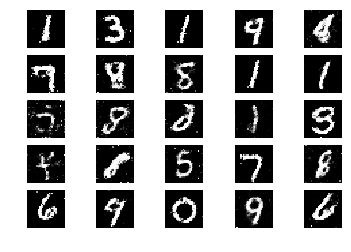

(32, 1) float64
(32, 1) float640.632027, acc.: 67.19%] [G loss: 0.998314]
(32, 1) float640.718599, acc.: 60.94%] [G loss: 1.037964]
(32, 1) float640.574879, acc.: 68.75%] [G loss: 1.149162]
(32, 1) float640.651717, acc.: 64.06%] [G loss: 1.066366]
(32, 1) float640.647594, acc.: 60.94%] [G loss: 1.038882]
(32, 1) float640.629252, acc.: 62.50%] [G loss: 1.135317]
(32, 1) float640.667136, acc.: 64.06%] [G loss: 0.954487]
(32, 1) float640.668388, acc.: 60.94%] [G loss: 1.095644]
(32, 1) float640.608473, acc.: 64.06%] [G loss: 1.080269]
(32, 1) float640.729652, acc.: 51.56%] [G loss: 0.947319]
(32, 1) float640.554615, acc.: 85.94%] [G loss: 0.922974]
(32, 1) float640.672272, acc.: 65.62%] [G loss: 0.973103]
(32, 1) float640.625670, acc.: 64.06%] [G loss: 1.031190]
(32, 1) float640.608717, acc.: 62.50%] [G loss: 1.031014]
(32, 1) float640.630438, acc.: 64.06%] [G loss: 1.106618]
(32, 1) float640.698040, acc.: 57.81%] [G loss: 0.889619]
(32, 1) float640.641218, acc.: 60.94%] [G loss: 0.931592

(32, 1) float640.640607, acc.: 62.50%] [G loss: 1.000442]
(32, 1) float640.580358, acc.: 65.62%] [G loss: 1.023626]
(32, 1) float640.644241, acc.: 65.62%] [G loss: 1.018752]
(32, 1) float640.635235, acc.: 64.06%] [G loss: 1.073505]
(32, 1) float640.541352, acc.: 76.56%] [G loss: 0.957457]
(32, 1) float640.580076, acc.: 65.62%] [G loss: 0.999124]
(32, 1) float640.552085, acc.: 76.56%] [G loss: 1.043257]
(32, 1) float640.600050, acc.: 64.06%] [G loss: 1.105348]
(32, 1) float640.595731, acc.: 73.44%] [G loss: 1.059191]
(32, 1) float640.630013, acc.: 62.50%] [G loss: 1.049295]
(32, 1) float640.715749, acc.: 53.12%] [G loss: 0.980457]
(32, 1) float640.586521, acc.: 60.94%] [G loss: 1.125569]
(32, 1) float640.640254, acc.: 57.81%] [G loss: 1.076704]
(32, 1) float640.605979, acc.: 65.62%] [G loss: 0.941061]
(32, 1) float640.535756, acc.: 73.44%] [G loss: 1.018334]
(32, 1) float640.594736, acc.: 68.75%] [G loss: 1.055418]
(32, 1) float640.679043, acc.: 54.69%] [G loss: 0.999131]
(32, 1) float6

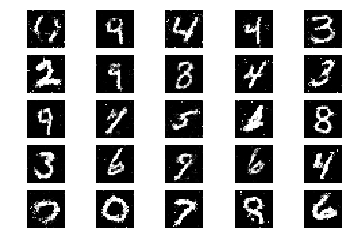

(32, 1) float64
(32, 1) float640.566639, acc.: 68.75%] [G loss: 1.082596]
(32, 1) float640.658523, acc.: 57.81%] [G loss: 1.000279]
(32, 1) float640.536785, acc.: 76.56%] [G loss: 1.172094]
(32, 1) float640.620589, acc.: 62.50%] [G loss: 1.070517]
(32, 1) float640.627867, acc.: 64.06%] [G loss: 0.944582]
(32, 1) float640.655374, acc.: 65.62%] [G loss: 0.842908]
(32, 1) float640.607874, acc.: 60.94%] [G loss: 0.952635]
(32, 1) float640.706406, acc.: 46.88%] [G loss: 0.821006]
(32, 1) float640.624476, acc.: 57.81%] [G loss: 1.131382]
(32, 1) float640.669271, acc.: 53.12%] [G loss: 1.033742]
(32, 1) float640.631983, acc.: 57.81%] [G loss: 0.972716]
(32, 1) float640.712278, acc.: 54.69%] [G loss: 1.076641]
(32, 1) float640.726978, acc.: 56.25%] [G loss: 1.070382]
(32, 1) float640.656216, acc.: 60.94%] [G loss: 1.106323]
(32, 1) float640.585299, acc.: 71.88%] [G loss: 0.904749]
(32, 1) float640.741493, acc.: 54.69%] [G loss: 0.851981]
(32, 1) float640.716904, acc.: 48.44%] [G loss: 0.923677

(32, 1) float640.742243, acc.: 50.00%] [G loss: 0.950804]
(32, 1) float640.620892, acc.: 67.19%] [G loss: 0.962139]
(32, 1) float640.613873, acc.: 65.62%] [G loss: 1.006815]
(32, 1) float640.650133, acc.: 62.50%] [G loss: 0.954587]
(32, 1) float640.644745, acc.: 57.81%] [G loss: 0.862042]
(32, 1) float640.661817, acc.: 62.50%] [G loss: 0.972702]
(32, 1) float640.557885, acc.: 68.75%] [G loss: 0.923180]
(32, 1) float640.675943, acc.: 59.38%] [G loss: 1.091452]
(32, 1) float640.630141, acc.: 67.19%] [G loss: 1.027255]
(32, 1) float640.619839, acc.: 65.62%] [G loss: 0.998820]
(32, 1) float640.668453, acc.: 64.06%] [G loss: 1.064416]
(32, 1) float640.658443, acc.: 57.81%] [G loss: 0.912177]
(32, 1) float640.632832, acc.: 64.06%] [G loss: 0.891532]
(32, 1) float640.688461, acc.: 51.56%] [G loss: 1.054916]
(32, 1) float640.558482, acc.: 67.19%] [G loss: 0.939848]
(32, 1) float640.625624, acc.: 57.81%] [G loss: 1.058696]
(32, 1) float640.569893, acc.: 68.75%] [G loss: 1.049137]
(32, 1) float6

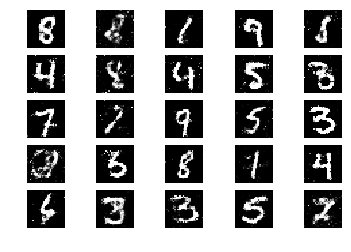

(32, 1) float64
(32, 1) float640.632707, acc.: 67.19%] [G loss: 0.991572]
(32, 1) float640.635673, acc.: 68.75%] [G loss: 0.880144]
(32, 1) float640.677002, acc.: 57.81%] [G loss: 0.936114]
(32, 1) float640.671941, acc.: 64.06%] [G loss: 0.885699]
(32, 1) float640.681502, acc.: 64.06%] [G loss: 0.933491]
(32, 1) float640.631320, acc.: 57.81%] [G loss: 0.985446]
(32, 1) float640.628344, acc.: 62.50%] [G loss: 0.893702]
(32, 1) float640.681742, acc.: 57.81%] [G loss: 1.123610]
(32, 1) float640.681290, acc.: 59.38%] [G loss: 1.025873]
(32, 1) float640.587861, acc.: 73.44%] [G loss: 0.875981]
(32, 1) float640.688550, acc.: 56.25%] [G loss: 0.936754]
(32, 1) float640.676757, acc.: 56.25%] [G loss: 1.020957]
(32, 1) float640.649032, acc.: 56.25%] [G loss: 1.107994]
(32, 1) float640.594596, acc.: 62.50%] [G loss: 1.198228]
(32, 1) float640.609019, acc.: 64.06%] [G loss: 1.059388]
(32, 1) float640.704583, acc.: 65.62%] [G loss: 1.031822]
(32, 1) float640.637071, acc.: 70.31%] [G loss: 0.991069

(32, 1) float640.646542, acc.: 64.06%] [G loss: 1.023085]
(32, 1) float640.625290, acc.: 64.06%] [G loss: 1.082890]
(32, 1) float640.520109, acc.: 73.44%] [G loss: 1.052528]
(32, 1) float640.629144, acc.: 67.19%] [G loss: 1.147767]
(32, 1) float640.571157, acc.: 71.88%] [G loss: 0.981198]
(32, 1) float640.633831, acc.: 60.94%] [G loss: 1.005509]
(32, 1) float640.747720, acc.: 57.81%] [G loss: 1.015693]
(32, 1) float640.562765, acc.: 73.44%] [G loss: 1.125155]
(32, 1) float640.612945, acc.: 70.31%] [G loss: 1.140680]
(32, 1) float640.575972, acc.: 67.19%] [G loss: 0.961301]
(32, 1) float640.668623, acc.: 59.38%] [G loss: 0.955803]
(32, 1) float640.606291, acc.: 67.19%] [G loss: 0.948043]
(32, 1) float640.718365, acc.: 50.00%] [G loss: 0.959808]
(32, 1) float640.690492, acc.: 64.06%] [G loss: 0.975802]
(32, 1) float640.760078, acc.: 53.12%] [G loss: 1.016260]
(32, 1) float640.625589, acc.: 59.38%] [G loss: 1.023907]
(32, 1) float640.594918, acc.: 67.19%] [G loss: 1.108572]
(32, 1) float6

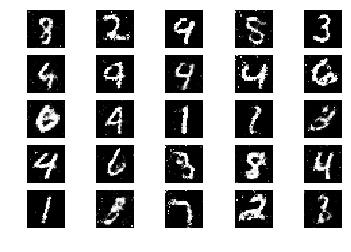

(32, 1) float64
(32, 1) float640.657964, acc.: 57.81%] [G loss: 0.949105]
(32, 1) float640.609504, acc.: 70.31%] [G loss: 1.092891]
(32, 1) float640.645945, acc.: 64.06%] [G loss: 1.109544]
(32, 1) float640.598036, acc.: 70.31%] [G loss: 1.099308]
(32, 1) float640.601737, acc.: 75.00%] [G loss: 1.078959]
(32, 1) float640.631845, acc.: 62.50%] [G loss: 0.977449]
(32, 1) float640.637448, acc.: 67.19%] [G loss: 1.091608]
(32, 1) float640.631035, acc.: 62.50%] [G loss: 1.012389]
(32, 1) float640.665440, acc.: 64.06%] [G loss: 1.017681]
(32, 1) float640.647576, acc.: 65.62%] [G loss: 0.965888]
(32, 1) float640.642537, acc.: 60.94%] [G loss: 1.016384]
(32, 1) float640.573510, acc.: 73.44%] [G loss: 0.954831]
(32, 1) float640.606930, acc.: 64.06%] [G loss: 0.936981]
(32, 1) float640.655676, acc.: 57.81%] [G loss: 1.212815]
(32, 1) float640.563571, acc.: 68.75%] [G loss: 0.936556]
(32, 1) float640.678499, acc.: 62.50%] [G loss: 0.983088]
(32, 1) float640.626377, acc.: 62.50%] [G loss: 1.009931

(32, 1) float640.531646, acc.: 71.88%] [G loss: 1.098749]
(32, 1) float640.574754, acc.: 70.31%] [G loss: 0.964667]
(32, 1) float640.591172, acc.: 64.06%] [G loss: 0.983432]
(32, 1) float640.705071, acc.: 64.06%] [G loss: 0.944209]
(32, 1) float640.631473, acc.: 68.75%] [G loss: 1.044836]
(32, 1) float640.673140, acc.: 59.38%] [G loss: 1.023859]
(32, 1) float640.749865, acc.: 46.88%] [G loss: 0.851585]
(32, 1) float640.655858, acc.: 60.94%] [G loss: 0.957512]
(32, 1) float640.691191, acc.: 56.25%] [G loss: 0.930482]
(32, 1) float640.593389, acc.: 65.62%] [G loss: 1.058680]
(32, 1) float640.692870, acc.: 57.81%] [G loss: 0.997268]
(32, 1) float640.565545, acc.: 73.44%] [G loss: 0.961588]
(32, 1) float640.697838, acc.: 54.69%] [G loss: 1.018902]
(32, 1) float640.613129, acc.: 62.50%] [G loss: 0.988438]
(32, 1) float640.629689, acc.: 65.62%] [G loss: 1.093992]
(32, 1) float640.615108, acc.: 70.31%] [G loss: 1.013823]
(32, 1) float640.735790, acc.: 53.12%] [G loss: 1.055468]
(32, 1) float6

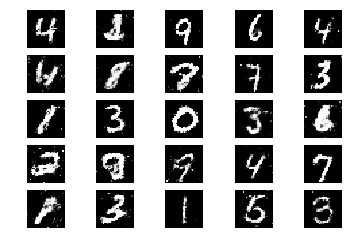

(32, 1) float64
(32, 1) float640.704100, acc.: 59.38%] [G loss: 0.950221]
(32, 1) float640.608604, acc.: 62.50%] [G loss: 0.875679]
(32, 1) float640.705759, acc.: 56.25%] [G loss: 0.869721]
(32, 1) float640.576649, acc.: 71.88%] [G loss: 1.053521]
(32, 1) float640.626182, acc.: 64.06%] [G loss: 1.064304]
(32, 1) float640.631725, acc.: 54.69%] [G loss: 0.953253]
(32, 1) float640.572556, acc.: 73.44%] [G loss: 0.880229]
(32, 1) float640.629389, acc.: 64.06%] [G loss: 0.944084]
(32, 1) float640.654829, acc.: 59.38%] [G loss: 0.996483]
(32, 1) float640.652918, acc.: 60.94%] [G loss: 1.044192]
(32, 1) float640.738995, acc.: 56.25%] [G loss: 1.037324]
(32, 1) float640.660804, acc.: 67.19%] [G loss: 1.009402]
(32, 1) float640.647646, acc.: 57.81%] [G loss: 0.963721]
(32, 1) float640.635255, acc.: 56.25%] [G loss: 1.006696]
(32, 1) float640.617733, acc.: 67.19%] [G loss: 0.971223]
(32, 1) float640.689532, acc.: 62.50%] [G loss: 0.936592]
(32, 1) float640.691082, acc.: 62.50%] [G loss: 0.998325

(32, 1) float640.624580, acc.: 64.06%] [G loss: 0.948986]
(32, 1) float640.579832, acc.: 78.12%] [G loss: 1.040392]
(32, 1) float640.640088, acc.: 54.69%] [G loss: 1.107731]
(32, 1) float640.600362, acc.: 65.62%] [G loss: 0.887203]
(32, 1) float640.558181, acc.: 70.31%] [G loss: 1.091747]
(32, 1) float640.574396, acc.: 75.00%] [G loss: 0.979347]
(32, 1) float640.634602, acc.: 64.06%] [G loss: 1.037456]
(32, 1) float640.571662, acc.: 75.00%] [G loss: 0.989683]
(32, 1) float640.684844, acc.: 62.50%] [G loss: 1.006989]
(32, 1) float640.651418, acc.: 54.69%] [G loss: 1.171762]
(32, 1) float640.692729, acc.: 56.25%] [G loss: 1.032180]
(32, 1) float640.567285, acc.: 71.88%] [G loss: 1.120134]
(32, 1) float640.635173, acc.: 62.50%] [G loss: 0.986587]
(32, 1) float640.679263, acc.: 60.94%] [G loss: 0.922511]
(32, 1) float640.619307, acc.: 65.62%] [G loss: 0.813614]
(32, 1) float640.645209, acc.: 64.06%] [G loss: 0.879815]
(32, 1) float640.607422, acc.: 59.38%] [G loss: 0.917928]
(32, 1) float6

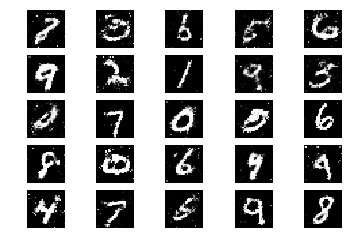

(32, 1) float64
(32, 1) float640.618902, acc.: 65.62%] [G loss: 0.988510]
(32, 1) float640.647702, acc.: 57.81%] [G loss: 1.007377]
(32, 1) float640.643848, acc.: 62.50%] [G loss: 1.062723]
(32, 1) float640.552721, acc.: 71.88%] [G loss: 1.007717]
(32, 1) float640.582056, acc.: 64.06%] [G loss: 1.082197]
(32, 1) float640.630861, acc.: 68.75%] [G loss: 1.126200]
(32, 1) float640.627423, acc.: 65.62%] [G loss: 0.946744]
(32, 1) float640.546605, acc.: 73.44%] [G loss: 1.000935]
(32, 1) float640.544324, acc.: 70.31%] [G loss: 0.983047]
(32, 1) float640.637422, acc.: 59.38%] [G loss: 1.091760]
(32, 1) float640.657675, acc.: 68.75%] [G loss: 1.231149]
(32, 1) float640.685688, acc.: 68.75%] [G loss: 1.135916]
(32, 1) float640.668015, acc.: 57.81%] [G loss: 1.041711]
(32, 1) float640.638770, acc.: 62.50%] [G loss: 0.921268]
(32, 1) float640.620417, acc.: 62.50%] [G loss: 1.021555]
(32, 1) float640.614223, acc.: 65.62%] [G loss: 1.009337]
(32, 1) float640.627884, acc.: 65.62%] [G loss: 0.957413

(32, 1) float640.718253, acc.: 57.81%] [G loss: 1.019979]
(32, 1) float640.633497, acc.: 59.38%] [G loss: 1.104125]
(32, 1) float640.636263, acc.: 68.75%] [G loss: 0.967739]
(32, 1) float640.674428, acc.: 57.81%] [G loss: 1.129571]
(32, 1) float640.634331, acc.: 67.19%] [G loss: 1.001920]
(32, 1) float640.595877, acc.: 65.62%] [G loss: 1.066266]
(32, 1) float640.658366, acc.: 57.81%] [G loss: 1.054529]
(32, 1) float640.677478, acc.: 60.94%] [G loss: 0.957242]
(32, 1) float640.636477, acc.: 64.06%] [G loss: 0.927628]
(32, 1) float640.678010, acc.: 60.94%] [G loss: 1.074504]
(32, 1) float640.622753, acc.: 59.38%] [G loss: 1.052284]
(32, 1) float640.632810, acc.: 60.94%] [G loss: 1.059074]
(32, 1) float640.712038, acc.: 54.69%] [G loss: 1.124182]
(32, 1) float640.588900, acc.: 68.75%] [G loss: 0.968093]
(32, 1) float640.613670, acc.: 67.19%] [G loss: 1.037676]
(32, 1) float640.606867, acc.: 68.75%] [G loss: 1.054359]
(32, 1) float640.655669, acc.: 60.94%] [G loss: 0.999939]
(32, 1) float6

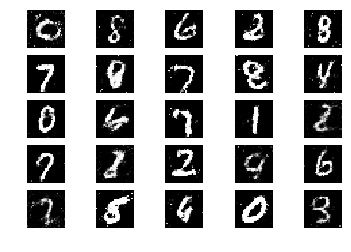

(32, 1) float64
(32, 1) float640.637858, acc.: 65.62%] [G loss: 0.859928]
(32, 1) float640.591950, acc.: 67.19%] [G loss: 0.974568]
(32, 1) float640.620132, acc.: 64.06%] [G loss: 0.885431]
(32, 1) float640.536080, acc.: 76.56%] [G loss: 1.014676]
(32, 1) float640.638666, acc.: 68.75%] [G loss: 1.015318]
(32, 1) float640.655021, acc.: 57.81%] [G loss: 0.897652]
(32, 1) float640.640848, acc.: 53.12%] [G loss: 0.989187]
(32, 1) float640.622785, acc.: 62.50%] [G loss: 0.972205]
(32, 1) float640.605547, acc.: 64.06%] [G loss: 0.951555]
(32, 1) float640.611423, acc.: 62.50%] [G loss: 1.050526]
(32, 1) float640.678223, acc.: 56.25%] [G loss: 0.996657]
(32, 1) float640.613266, acc.: 70.31%] [G loss: 1.099861]
(32, 1) float640.639020, acc.: 62.50%] [G loss: 0.908331]
(32, 1) float640.621863, acc.: 64.06%] [G loss: 0.975142]
(32, 1) float640.603696, acc.: 64.06%] [G loss: 0.981761]
(32, 1) float640.661416, acc.: 51.56%] [G loss: 1.017712]
(32, 1) float640.613158, acc.: 64.06%] [G loss: 0.998181

(32, 1) float640.557608, acc.: 75.00%] [G loss: 1.069655]
(32, 1) float640.635573, acc.: 60.94%] [G loss: 0.979899]
(32, 1) float640.679080, acc.: 60.94%] [G loss: 1.009865]
(32, 1) float640.691290, acc.: 59.38%] [G loss: 0.966579]
(32, 1) float640.681270, acc.: 62.50%] [G loss: 0.964197]
(32, 1) float640.589651, acc.: 67.19%] [G loss: 1.070338]
(32, 1) float640.645579, acc.: 59.38%] [G loss: 0.898715]
(32, 1) float640.677272, acc.: 57.81%] [G loss: 1.029746]
(32, 1) float640.653308, acc.: 57.81%] [G loss: 0.996071]
(32, 1) float640.657833, acc.: 65.62%] [G loss: 0.940593]
(32, 1) float640.615824, acc.: 57.81%] [G loss: 0.961227]
(32, 1) float640.618931, acc.: 65.62%] [G loss: 0.901441]
(32, 1) float640.663578, acc.: 59.38%] [G loss: 1.047389]
(32, 1) float640.670892, acc.: 64.06%] [G loss: 0.925346]
(32, 1) float640.601860, acc.: 71.88%] [G loss: 0.912623]
(32, 1) float640.637735, acc.: 64.06%] [G loss: 0.919369]
(32, 1) float640.557133, acc.: 68.75%] [G loss: 0.910954]
(32, 1) float6

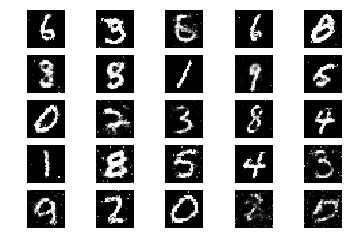

(32, 1) float64
(32, 1) float640.627535, acc.: 62.50%] [G loss: 1.021996]
(32, 1) float640.669442, acc.: 65.62%] [G loss: 0.999259]
(32, 1) float640.662999, acc.: 65.62%] [G loss: 1.077295]
(32, 1) float640.621700, acc.: 73.44%] [G loss: 1.075635]
(32, 1) float640.583093, acc.: 71.88%] [G loss: 1.129863]
(32, 1) float640.639041, acc.: 62.50%] [G loss: 1.013907]
(32, 1) float640.552080, acc.: 76.56%] [G loss: 1.065456]
(32, 1) float640.598418, acc.: 65.62%] [G loss: 1.042855]
(32, 1) float640.653587, acc.: 54.69%] [G loss: 1.130326]
(32, 1) float640.652140, acc.: 57.81%] [G loss: 1.090882]
(32, 1) float640.642961, acc.: 62.50%] [G loss: 1.047188]
(32, 1) float640.691666, acc.: 62.50%] [G loss: 0.913932]
(32, 1) float640.641166, acc.: 65.62%] [G loss: 1.003708]
(32, 1) float640.604349, acc.: 65.62%] [G loss: 0.980929]
(32, 1) float640.640032, acc.: 62.50%] [G loss: 1.090739]
(32, 1) float640.616690, acc.: 64.06%] [G loss: 1.069905]
(32, 1) float640.660568, acc.: 56.25%] [G loss: 0.978827

(32, 1) float640.712254, acc.: 54.69%] [G loss: 1.011791]
(32, 1) float640.592766, acc.: 68.75%] [G loss: 1.175744]
(32, 1) float640.544595, acc.: 73.44%] [G loss: 1.101493]
(32, 1) float640.600411, acc.: 60.94%] [G loss: 0.938754]
(32, 1) float640.710038, acc.: 59.38%] [G loss: 1.136073]
(32, 1) float640.720497, acc.: 54.69%] [G loss: 1.018448]
(32, 1) float640.583694, acc.: 67.19%] [G loss: 1.085353]
(32, 1) float640.592548, acc.: 67.19%] [G loss: 1.064826]
(32, 1) float640.558780, acc.: 73.44%] [G loss: 1.125521]
(32, 1) float640.723916, acc.: 59.38%] [G loss: 0.955762]
(32, 1) float640.670935, acc.: 60.94%] [G loss: 1.019917]
(32, 1) float640.588358, acc.: 71.88%] [G loss: 0.967352]
(32, 1) float640.687788, acc.: 57.81%] [G loss: 0.996389]
(32, 1) float640.600367, acc.: 68.75%] [G loss: 1.150941]
(32, 1) float640.639860, acc.: 68.75%] [G loss: 0.920829]
(32, 1) float640.616096, acc.: 59.38%] [G loss: 1.037301]
(32, 1) float640.639524, acc.: 64.06%] [G loss: 0.955053]
(32, 1) float6

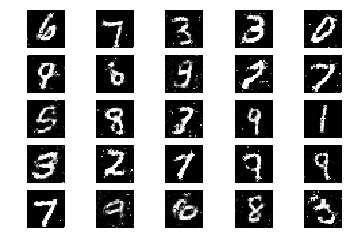

(32, 1) float64
(32, 1) float640.567625, acc.: 70.31%] [G loss: 1.038992]
(32, 1) float640.570051, acc.: 71.88%] [G loss: 1.013054]
(32, 1) float640.500289, acc.: 78.12%] [G loss: 1.016746]
(32, 1) float640.657647, acc.: 65.62%] [G loss: 0.981385]
(32, 1) float640.645466, acc.: 60.94%] [G loss: 1.031355]
(32, 1) float640.568786, acc.: 76.56%] [G loss: 1.061630]
(32, 1) float640.735485, acc.: 51.56%] [G loss: 1.019250]
(32, 1) float640.619754, acc.: 65.62%] [G loss: 1.159225]
(32, 1) float640.673688, acc.: 54.69%] [G loss: 0.895571]
(32, 1) float640.599113, acc.: 71.88%] [G loss: 0.891012]
(32, 1) float640.667827, acc.: 59.38%] [G loss: 1.053275]
(32, 1) float640.723953, acc.: 46.88%] [G loss: 0.930391]
(32, 1) float640.670267, acc.: 56.25%] [G loss: 0.966615]
(32, 1) float640.633799, acc.: 56.25%] [G loss: 1.085108]
(32, 1) float640.607512, acc.: 65.62%] [G loss: 1.277260]
(32, 1) float640.597113, acc.: 71.88%] [G loss: 1.022635]
(32, 1) float640.654328, acc.: 59.38%] [G loss: 1.003602

(32, 1) float640.610676, acc.: 64.06%] [G loss: 1.086406]
(32, 1) float640.687720, acc.: 59.38%] [G loss: 1.015125]
(32, 1) float640.657730, acc.: 53.12%] [G loss: 1.075536]
(32, 1) float640.596546, acc.: 65.62%] [G loss: 1.098057]
(32, 1) float640.589658, acc.: 65.62%] [G loss: 0.999005]
(32, 1) float640.691216, acc.: 53.12%] [G loss: 1.074185]
(32, 1) float640.605225, acc.: 67.19%] [G loss: 1.116516]
(32, 1) float640.660271, acc.: 56.25%] [G loss: 0.940577]
(32, 1) float640.637531, acc.: 64.06%] [G loss: 1.077357]
(32, 1) float640.646607, acc.: 62.50%] [G loss: 1.058445]
(32, 1) float640.637821, acc.: 62.50%] [G loss: 1.010770]
(32, 1) float640.598977, acc.: 70.31%] [G loss: 1.116035]
(32, 1) float640.686585, acc.: 59.38%] [G loss: 1.127685]
(32, 1) float640.598704, acc.: 70.31%] [G loss: 0.951532]
(32, 1) float640.624654, acc.: 62.50%] [G loss: 0.941777]
(32, 1) float640.663269, acc.: 57.81%] [G loss: 0.992994]
(32, 1) float640.640537, acc.: 59.38%] [G loss: 1.123544]
(32, 1) float6

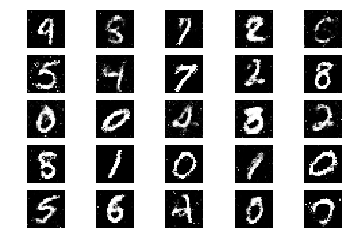

(32, 1) float64
(32, 1) float640.627922, acc.: 60.94%] [G loss: 0.976078]
(32, 1) float640.645146, acc.: 64.06%] [G loss: 0.987908]
(32, 1) float640.611987, acc.: 70.31%] [G loss: 1.091233]
(32, 1) float640.619593, acc.: 68.75%] [G loss: 0.908555]
(32, 1) float640.650816, acc.: 60.94%] [G loss: 1.123422]
(32, 1) float640.589370, acc.: 68.75%] [G loss: 1.086830]
(32, 1) float640.638088, acc.: 65.62%] [G loss: 1.088852]
(32, 1) float640.613744, acc.: 68.75%] [G loss: 1.009709]
(32, 1) float640.614380, acc.: 68.75%] [G loss: 0.932616]
(32, 1) float640.576589, acc.: 68.75%] [G loss: 1.069868]
(32, 1) float640.579941, acc.: 68.75%] [G loss: 1.004373]
(32, 1) float640.636166, acc.: 65.62%] [G loss: 1.079342]
(32, 1) float640.567522, acc.: 73.44%] [G loss: 1.136616]
(32, 1) float640.605287, acc.: 67.19%] [G loss: 0.945066]
(32, 1) float640.582290, acc.: 71.88%] [G loss: 0.974934]
(32, 1) float640.612629, acc.: 64.06%] [G loss: 0.915186]
(32, 1) float640.701677, acc.: 60.94%] [G loss: 0.972210

(32, 1) float640.597369, acc.: 65.62%] [G loss: 0.948938]
(32, 1) float640.620942, acc.: 57.81%] [G loss: 1.072215]
(32, 1) float640.643606, acc.: 64.06%] [G loss: 0.993645]
(32, 1) float640.629550, acc.: 64.06%] [G loss: 1.080631]
(32, 1) float640.625634, acc.: 64.06%] [G loss: 0.906619]
(32, 1) float640.651924, acc.: 56.25%] [G loss: 1.077829]
(32, 1) float640.599462, acc.: 67.19%] [G loss: 1.022289]
(32, 1) float640.658946, acc.: 59.38%] [G loss: 0.974623]
(32, 1) float640.601950, acc.: 64.06%] [G loss: 1.156370]
(32, 1) float640.657081, acc.: 64.06%] [G loss: 1.163126]
(32, 1) float640.581485, acc.: 67.19%] [G loss: 0.997238]
(32, 1) float640.741315, acc.: 51.56%] [G loss: 0.966438]
(32, 1) float640.655348, acc.: 57.81%] [G loss: 1.012481]
(32, 1) float640.684272, acc.: 53.12%] [G loss: 0.984532]
(32, 1) float640.527263, acc.: 73.44%] [G loss: 0.930931]
(32, 1) float640.597919, acc.: 68.75%] [G loss: 0.950004]
(32, 1) float640.624178, acc.: 67.19%] [G loss: 1.029188]
(32, 1) float6

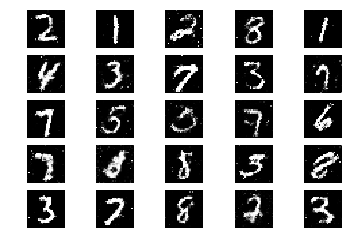

(32, 1) float64
(32, 1) float640.640417, acc.: 68.75%] [G loss: 1.059330]
(32, 1) float640.592047, acc.: 67.19%] [G loss: 0.992633]
(32, 1) float640.639902, acc.: 68.75%] [G loss: 1.036937]
(32, 1) float640.700548, acc.: 56.25%] [G loss: 0.951058]
(32, 1) float640.657588, acc.: 67.19%] [G loss: 0.900562]
(32, 1) float640.593075, acc.: 75.00%] [G loss: 0.989694]
(32, 1) float640.590349, acc.: 68.75%] [G loss: 1.138362]
(32, 1) float640.666683, acc.: 60.94%] [G loss: 1.062436]
(32, 1) float640.617143, acc.: 60.94%] [G loss: 1.151597]
(32, 1) float640.553952, acc.: 65.62%] [G loss: 1.120795]
(32, 1) float640.676677, acc.: 59.38%] [G loss: 1.019663]
(32, 1) float640.665841, acc.: 50.00%] [G loss: 0.948148]
(32, 1) float640.595325, acc.: 68.75%] [G loss: 1.102601]
(32, 1) float640.617957, acc.: 64.06%] [G loss: 1.055324]
(32, 1) float640.690971, acc.: 64.06%] [G loss: 1.115468]
(32, 1) float640.586425, acc.: 64.06%] [G loss: 0.959309]
(32, 1) float640.613412, acc.: 67.19%] [G loss: 1.003991

(32, 1) float640.614340, acc.: 64.06%] [G loss: 0.966175]
(32, 1) float640.682207, acc.: 59.38%] [G loss: 0.962208]
(32, 1) float640.569758, acc.: 67.19%] [G loss: 1.095149]
(32, 1) float640.642731, acc.: 59.38%] [G loss: 1.041467]
(32, 1) float640.626405, acc.: 70.31%] [G loss: 1.059737]
(32, 1) float640.654224, acc.: 68.75%] [G loss: 0.971345]
(32, 1) float640.684757, acc.: 56.25%] [G loss: 0.939104]
(32, 1) float640.666334, acc.: 67.19%] [G loss: 0.977906]
(32, 1) float640.584837, acc.: 68.75%] [G loss: 1.003154]
(32, 1) float640.641543, acc.: 65.62%] [G loss: 0.978478]
(32, 1) float640.546613, acc.: 70.31%] [G loss: 0.974534]
(32, 1) float640.637368, acc.: 57.81%] [G loss: 1.053506]
(32, 1) float640.728737, acc.: 50.00%] [G loss: 1.181806]
(32, 1) float640.619252, acc.: 64.06%] [G loss: 1.115843]
(32, 1) float640.639117, acc.: 56.25%] [G loss: 0.979462]
(32, 1) float640.675383, acc.: 60.94%] [G loss: 1.132106]
(32, 1) float640.651863, acc.: 60.94%] [G loss: 0.998302]
(32, 1) float6

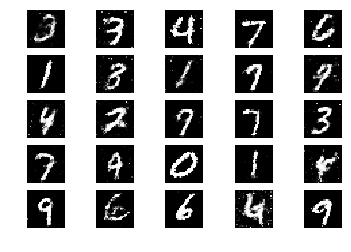

(32, 1) float64
(32, 1) float640.650807, acc.: 62.50%] [G loss: 1.002649]
(32, 1) float640.645241, acc.: 64.06%] [G loss: 0.984094]
(32, 1) float640.624101, acc.: 62.50%] [G loss: 0.928162]
(32, 1) float640.596034, acc.: 67.19%] [G loss: 1.105282]
(32, 1) float640.592762, acc.: 67.19%] [G loss: 1.033144]
(32, 1) float640.630243, acc.: 65.62%] [G loss: 0.992259]
(32, 1) float640.637336, acc.: 68.75%] [G loss: 1.081867]
(32, 1) float640.680769, acc.: 62.50%] [G loss: 0.986488]
(32, 1) float640.638834, acc.: 60.94%] [G loss: 0.981509]
(32, 1) float640.670725, acc.: 54.69%] [G loss: 1.086580]
(32, 1) float640.643412, acc.: 62.50%] [G loss: 1.138486]
(32, 1) float640.601367, acc.: 65.62%] [G loss: 1.162388]
(32, 1) float640.625023, acc.: 65.62%] [G loss: 1.040488]
(32, 1) float640.596057, acc.: 71.88%] [G loss: 1.024670]
(32, 1) float640.574773, acc.: 68.75%] [G loss: 0.980518]
(32, 1) float640.629626, acc.: 68.75%] [G loss: 1.058828]
(32, 1) float640.615139, acc.: 62.50%] [G loss: 0.920595

(32, 1) float640.739242, acc.: 50.00%] [G loss: 0.987242]
(32, 1) float640.640996, acc.: 65.62%] [G loss: 0.985309]
(32, 1) float640.568068, acc.: 70.31%] [G loss: 0.986901]
(32, 1) float640.613208, acc.: 64.06%] [G loss: 1.141475]
(32, 1) float640.634826, acc.: 60.94%] [G loss: 1.012038]
(32, 1) float640.543947, acc.: 73.44%] [G loss: 1.002863]
(32, 1) float640.648706, acc.: 59.38%] [G loss: 1.010160]
(32, 1) float640.532470, acc.: 71.88%] [G loss: 0.980544]
(32, 1) float640.639069, acc.: 65.62%] [G loss: 1.062696]
(32, 1) float640.620691, acc.: 67.19%] [G loss: 0.926380]
(32, 1) float640.561954, acc.: 68.75%] [G loss: 1.019954]
(32, 1) float640.548825, acc.: 71.88%] [G loss: 1.054596]
(32, 1) float640.588818, acc.: 70.31%] [G loss: 1.093918]
(32, 1) float640.674615, acc.: 53.12%] [G loss: 1.125599]
(32, 1) float640.642379, acc.: 60.94%] [G loss: 1.172625]
(32, 1) float640.598981, acc.: 62.50%] [G loss: 1.077193]
(32, 1) float640.689293, acc.: 62.50%] [G loss: 1.101834]
(32, 1) float6

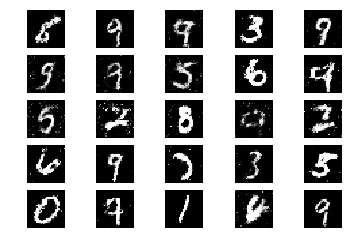

(32, 1) float64
(32, 1) float640.585327, acc.: 70.31%] [G loss: 1.087377]
(32, 1) float640.674500, acc.: 57.81%] [G loss: 1.008795]
(32, 1) float640.671383, acc.: 73.44%] [G loss: 0.956215]
(32, 1) float640.650288, acc.: 60.94%] [G loss: 0.918540]
(32, 1) float640.578566, acc.: 68.75%] [G loss: 0.969071]
(32, 1) float640.579747, acc.: 73.44%] [G loss: 1.031546]
(32, 1) float640.583511, acc.: 67.19%] [G loss: 0.968657]
(32, 1) float640.695889, acc.: 60.94%] [G loss: 1.100358]
(32, 1) float640.530659, acc.: 75.00%] [G loss: 1.087496]
(32, 1) float640.559030, acc.: 70.31%] [G loss: 1.038722]
(32, 1) float640.772590, acc.: 50.00%] [G loss: 0.842960]
(32, 1) float640.674632, acc.: 57.81%] [G loss: 1.040051]
(32, 1) float640.652575, acc.: 64.06%] [G loss: 1.091015]
(32, 1) float640.591644, acc.: 65.62%] [G loss: 0.990751]
(32, 1) float640.669224, acc.: 57.81%] [G loss: 0.948445]
(32, 1) float640.578446, acc.: 70.31%] [G loss: 0.979991]
(32, 1) float640.587217, acc.: 65.62%] [G loss: 1.037753

(32, 1) float640.651486, acc.: 56.25%] [G loss: 0.993390]
(32, 1) float640.633394, acc.: 68.75%] [G loss: 1.088084]
(32, 1) float640.567711, acc.: 70.31%] [G loss: 1.123756]
(32, 1) float640.615014, acc.: 67.19%] [G loss: 1.115201]
(32, 1) float640.573652, acc.: 68.75%] [G loss: 1.090695]
(32, 1) float640.581500, acc.: 65.62%] [G loss: 1.019799]
(32, 1) float640.694759, acc.: 57.81%] [G loss: 1.026538]
(32, 1) float640.621505, acc.: 68.75%] [G loss: 1.134149]
(32, 1) float640.649863, acc.: 60.94%] [G loss: 1.065461]
(32, 1) float640.611220, acc.: 60.94%] [G loss: 0.970668]
(32, 1) float640.623860, acc.: 64.06%] [G loss: 0.924368]
(32, 1) float640.582806, acc.: 67.19%] [G loss: 0.915090]
(32, 1) float640.639979, acc.: 60.94%] [G loss: 0.955883]
(32, 1) float640.617525, acc.: 59.38%] [G loss: 1.113776]
(32, 1) float640.614808, acc.: 71.88%] [G loss: 1.064539]
(32, 1) float640.589362, acc.: 73.44%] [G loss: 1.196454]
(32, 1) float640.616175, acc.: 65.62%] [G loss: 1.071460]
(32, 1) float6

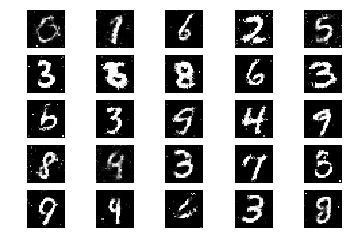

(32, 1) float64
(32, 1) float640.600005, acc.: 70.31%] [G loss: 1.097125]
(32, 1) float640.645309, acc.: 62.50%] [G loss: 1.141330]
(32, 1) float640.665118, acc.: 59.38%] [G loss: 1.109434]
(32, 1) float640.588216, acc.: 68.75%] [G loss: 1.122816]
(32, 1) float640.587873, acc.: 70.31%] [G loss: 1.127605]
(32, 1) float640.547374, acc.: 78.12%] [G loss: 0.911692]
(32, 1) float640.652861, acc.: 62.50%] [G loss: 0.938556]
(32, 1) float640.577549, acc.: 71.88%] [G loss: 0.998888]
(32, 1) float640.712785, acc.: 51.56%] [G loss: 1.003835]
(32, 1) float640.557282, acc.: 71.88%] [G loss: 0.975675]
(32, 1) float640.633064, acc.: 59.38%] [G loss: 0.986522]
(32, 1) float640.627530, acc.: 64.06%] [G loss: 1.087116]
(32, 1) float640.660682, acc.: 60.94%] [G loss: 1.012972]
(32, 1) float640.694058, acc.: 64.06%] [G loss: 1.088498]
(32, 1) float640.614597, acc.: 67.19%] [G loss: 0.956574]
(32, 1) float640.663398, acc.: 64.06%] [G loss: 1.047844]
(32, 1) float640.682747, acc.: 62.50%] [G loss: 1.109491

(32, 1) float640.657853, acc.: 64.06%] [G loss: 1.097088]
(32, 1) float640.646737, acc.: 60.94%] [G loss: 1.068986]
(32, 1) float640.640828, acc.: 59.38%] [G loss: 1.063197]
(32, 1) float640.605557, acc.: 67.19%] [G loss: 1.037488]
(32, 1) float640.585456, acc.: 70.31%] [G loss: 1.021607]
(32, 1) float640.655061, acc.: 60.94%] [G loss: 1.095361]
(32, 1) float640.578672, acc.: 73.44%] [G loss: 1.130025]
(32, 1) float640.615226, acc.: 60.94%] [G loss: 1.080088]
(32, 1) float640.601795, acc.: 62.50%] [G loss: 1.113189]
(32, 1) float640.600101, acc.: 71.88%] [G loss: 0.983241]
(32, 1) float640.574789, acc.: 73.44%] [G loss: 1.183955]
(32, 1) float640.591335, acc.: 76.56%] [G loss: 1.090453]
(32, 1) float640.644006, acc.: 62.50%] [G loss: 0.980964]
(32, 1) float640.677647, acc.: 64.06%] [G loss: 1.027038]
(32, 1) float640.735909, acc.: 54.69%] [G loss: 0.910037]
(32, 1) float640.672301, acc.: 57.81%] [G loss: 0.946123]
(32, 1) float640.647769, acc.: 67.19%] [G loss: 1.085892]
(32, 1) float6

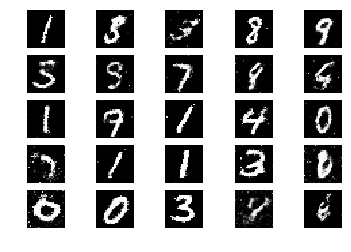

(32, 1) float64
(32, 1) float640.681361, acc.: 59.38%] [G loss: 0.950347]
(32, 1) float640.671396, acc.: 64.06%] [G loss: 0.927063]
(32, 1) float640.631147, acc.: 60.94%] [G loss: 0.955603]
(32, 1) float640.607347, acc.: 65.62%] [G loss: 1.109402]
(32, 1) float640.679316, acc.: 50.00%] [G loss: 0.981863]
(32, 1) float640.613119, acc.: 65.62%] [G loss: 0.986147]
(32, 1) float640.603565, acc.: 71.88%] [G loss: 0.986503]
(32, 1) float640.453048, acc.: 82.81%] [G loss: 1.076800]
(32, 1) float640.620110, acc.: 70.31%] [G loss: 1.031939]
(32, 1) float640.602781, acc.: 64.06%] [G loss: 0.957785]
(32, 1) float640.560402, acc.: 71.88%] [G loss: 1.072227]
(32, 1) float640.622436, acc.: 64.06%] [G loss: 0.893802]
(32, 1) float640.680757, acc.: 57.81%] [G loss: 1.191587]
(32, 1) float640.575438, acc.: 73.44%] [G loss: 1.011010]
(32, 1) float640.736454, acc.: 53.12%] [G loss: 0.977154]
(32, 1) float640.602287, acc.: 65.62%] [G loss: 0.977276]
(32, 1) float640.625732, acc.: 57.81%] [G loss: 0.933198

(32, 1) float640.674876, acc.: 65.62%] [G loss: 1.096357]
(32, 1) float640.639941, acc.: 64.06%] [G loss: 0.960971]
(32, 1) float640.622301, acc.: 64.06%] [G loss: 1.021801]
(32, 1) float640.582842, acc.: 68.75%] [G loss: 1.053919]
(32, 1) float640.552692, acc.: 79.69%] [G loss: 1.097448]
(32, 1) float640.569226, acc.: 73.44%] [G loss: 0.936534]
(32, 1) float640.727245, acc.: 53.12%] [G loss: 1.002063]
(32, 1) float640.588562, acc.: 60.94%] [G loss: 0.984102]
(32, 1) float640.639434, acc.: 56.25%] [G loss: 1.032210]
(32, 1) float640.619690, acc.: 68.75%] [G loss: 1.086971]
(32, 1) float640.612059, acc.: 76.56%] [G loss: 1.026928]
(32, 1) float640.609242, acc.: 65.62%] [G loss: 1.031804]
(32, 1) float640.616763, acc.: 71.88%] [G loss: 1.029277]
(32, 1) float640.633648, acc.: 59.38%] [G loss: 0.946552]
(32, 1) float640.612178, acc.: 67.19%] [G loss: 0.944049]
(32, 1) float640.570729, acc.: 68.75%] [G loss: 0.996396]
(32, 1) float640.604867, acc.: 65.62%] [G loss: 0.986657]
(32, 1) float6

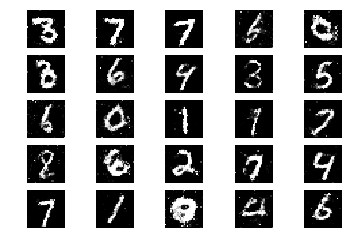

(32, 1) float64
(32, 1) float640.717568, acc.: 53.12%] [G loss: 1.205504]
(32, 1) float640.682012, acc.: 53.12%] [G loss: 1.088762]
(32, 1) float640.536801, acc.: 79.69%] [G loss: 0.961987]
(32, 1) float640.564118, acc.: 71.88%] [G loss: 0.991388]
(32, 1) float640.597453, acc.: 70.31%] [G loss: 1.077175]
(32, 1) float640.671128, acc.: 64.06%] [G loss: 1.003392]
(32, 1) float640.609946, acc.: 59.38%] [G loss: 1.050572]
(32, 1) float640.556955, acc.: 68.75%] [G loss: 1.092062]
(32, 1) float640.594279, acc.: 65.62%] [G loss: 1.183490]
(32, 1) float640.632184, acc.: 67.19%] [G loss: 1.152121]
(32, 1) float640.638695, acc.: 64.06%] [G loss: 1.075726]
(32, 1) float640.618750, acc.: 64.06%] [G loss: 1.121085]
(32, 1) float640.641050, acc.: 64.06%] [G loss: 1.105643]
(32, 1) float640.580172, acc.: 71.88%] [G loss: 1.025067]
(32, 1) float640.624401, acc.: 62.50%] [G loss: 0.965742]
(32, 1) float640.608005, acc.: 68.75%] [G loss: 1.054780]
(32, 1) float640.689322, acc.: 54.69%] [G loss: 1.084004

(32, 1) float640.741180, acc.: 50.00%] [G loss: 1.111663]
(32, 1) float640.649332, acc.: 64.06%] [G loss: 0.995267]
(32, 1) float640.688380, acc.: 57.81%] [G loss: 1.081699]
(32, 1) float640.648326, acc.: 62.50%] [G loss: 0.980787]
(32, 1) float640.596816, acc.: 68.75%] [G loss: 1.178879]
(32, 1) float640.600742, acc.: 65.62%] [G loss: 1.023627]
(32, 1) float640.604393, acc.: 68.75%] [G loss: 0.948745]
(32, 1) float640.539114, acc.: 75.00%] [G loss: 0.930402]
(32, 1) float640.592668, acc.: 68.75%] [G loss: 1.040469]
(32, 1) float640.618313, acc.: 65.62%] [G loss: 0.935719]
(32, 1) float640.676003, acc.: 51.56%] [G loss: 0.925992]
(32, 1) float640.662221, acc.: 57.81%] [G loss: 1.057029]
(32, 1) float640.723045, acc.: 60.94%] [G loss: 1.078901]
(32, 1) float640.649921, acc.: 60.94%] [G loss: 0.898641]
(32, 1) float640.660840, acc.: 59.38%] [G loss: 0.904673]
(32, 1) float640.654743, acc.: 64.06%] [G loss: 0.988445]
(32, 1) float640.619870, acc.: 67.19%] [G loss: 1.008242]
(32, 1) float6

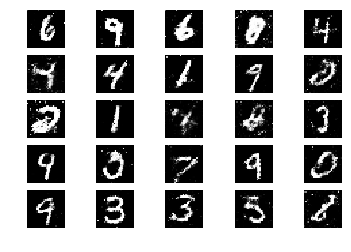

(32, 1) float64
(32, 1) float640.593231, acc.: 67.19%] [G loss: 0.968800]
(32, 1) float640.647832, acc.: 62.50%] [G loss: 1.040271]
(32, 1) float640.641172, acc.: 60.94%] [G loss: 0.879984]
(32, 1) float640.631319, acc.: 62.50%] [G loss: 1.063832]
(32, 1) float640.650824, acc.: 62.50%] [G loss: 0.951882]
(32, 1) float640.655645, acc.: 57.81%] [G loss: 0.960277]
(32, 1) float640.621558, acc.: 62.50%] [G loss: 1.021025]
(32, 1) float640.622166, acc.: 64.06%] [G loss: 1.021505]
(32, 1) float640.710526, acc.: 54.69%] [G loss: 0.986282]
(32, 1) float640.669352, acc.: 50.00%] [G loss: 1.041072]
(32, 1) float640.648279, acc.: 62.50%] [G loss: 1.046405]
(32, 1) float640.691719, acc.: 64.06%] [G loss: 1.120434]
(32, 1) float640.664740, acc.: 57.81%] [G loss: 0.967597]
(32, 1) float640.618391, acc.: 62.50%] [G loss: 0.937673]
(32, 1) float640.714392, acc.: 54.69%] [G loss: 1.068326]
(32, 1) float640.595754, acc.: 67.19%] [G loss: 1.000181]
(32, 1) float640.622208, acc.: 65.62%] [G loss: 1.058128

(32, 1) float640.601736, acc.: 67.19%] [G loss: 1.059500]
(32, 1) float640.643801, acc.: 65.62%] [G loss: 1.132588]
(32, 1) float640.570018, acc.: 71.88%] [G loss: 1.038606]
(32, 1) float640.679884, acc.: 67.19%] [G loss: 1.045303]
(32, 1) float640.564851, acc.: 73.44%] [G loss: 1.017225]
(32, 1) float640.611072, acc.: 60.94%] [G loss: 1.012620]
(32, 1) float640.621990, acc.: 65.62%] [G loss: 1.057178]
(32, 1) float640.646066, acc.: 62.50%] [G loss: 1.125012]
(32, 1) float640.602287, acc.: 71.88%] [G loss: 1.084060]
(32, 1) float640.659221, acc.: 65.62%] [G loss: 0.946124]
(32, 1) float640.606827, acc.: 65.62%] [G loss: 1.048414]
(32, 1) float640.659362, acc.: 64.06%] [G loss: 1.057765]
(32, 1) float640.641375, acc.: 60.94%] [G loss: 1.103138]
(32, 1) float640.620548, acc.: 68.75%] [G loss: 1.071020]
(32, 1) float640.758207, acc.: 54.69%] [G loss: 0.987880]
(32, 1) float640.652845, acc.: 65.62%] [G loss: 1.087203]
(32, 1) float640.557758, acc.: 71.88%] [G loss: 1.162750]
(32, 1) float6

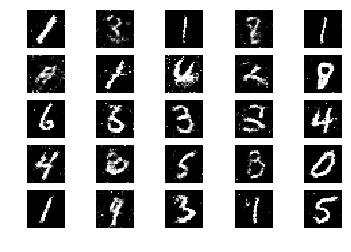

(32, 1) float64
(32, 1) float640.600674, acc.: 68.75%] [G loss: 1.040169]
(32, 1) float640.595119, acc.: 73.44%] [G loss: 0.967470]
(32, 1) float640.620086, acc.: 68.75%] [G loss: 1.069094]
(32, 1) float640.663149, acc.: 60.94%] [G loss: 1.183125]
(32, 1) float640.649492, acc.: 60.94%] [G loss: 1.063696]
(32, 1) float640.548874, acc.: 73.44%] [G loss: 1.035647]
(32, 1) float640.697599, acc.: 60.94%] [G loss: 0.944803]
(32, 1) float640.623437, acc.: 60.94%] [G loss: 1.010983]
(32, 1) float640.643079, acc.: 68.75%] [G loss: 1.076078]
(32, 1) float640.614853, acc.: 62.50%] [G loss: 1.137132]
(32, 1) float640.637770, acc.: 65.62%] [G loss: 1.078497]
(32, 1) float640.681570, acc.: 57.81%] [G loss: 0.922555]
(32, 1) float640.646550, acc.: 65.62%] [G loss: 1.116410]
(32, 1) float640.624907, acc.: 64.06%] [G loss: 0.985651]
(32, 1) float640.668308, acc.: 64.06%] [G loss: 1.081060]
(32, 1) float640.666181, acc.: 54.69%] [G loss: 1.005484]
(32, 1) float640.624703, acc.: 67.19%] [G loss: 0.947153

(32, 1) float640.626263, acc.: 60.94%] [G loss: 1.013175]
(32, 1) float640.635574, acc.: 62.50%] [G loss: 0.988659]
(32, 1) float640.542629, acc.: 71.88%] [G loss: 1.023413]
(32, 1) float640.663245, acc.: 59.38%] [G loss: 1.002760]
(32, 1) float640.615045, acc.: 73.44%] [G loss: 1.017289]
(32, 1) float640.681592, acc.: 54.69%] [G loss: 0.928652]
(32, 1) float640.666633, acc.: 62.50%] [G loss: 1.169593]
(32, 1) float640.562338, acc.: 76.56%] [G loss: 1.240110]
(32, 1) float640.658947, acc.: 57.81%] [G loss: 1.004292]
(32, 1) float640.631658, acc.: 65.62%] [G loss: 1.194918]
(32, 1) float640.658012, acc.: 64.06%] [G loss: 1.204654]
(32, 1) float640.652255, acc.: 59.38%] [G loss: 1.078228]
(32, 1) float640.553307, acc.: 71.88%] [G loss: 1.079607]
(32, 1) float640.668374, acc.: 64.06%] [G loss: 1.074009]
(32, 1) float640.552104, acc.: 79.69%] [G loss: 1.103210]
(32, 1) float640.666874, acc.: 59.38%] [G loss: 0.924801]
(32, 1) float640.725114, acc.: 54.69%] [G loss: 1.014056]
(32, 1) float6

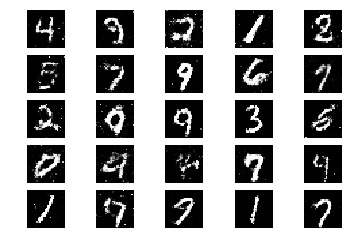

(32, 1) float64
(32, 1) float640.658885, acc.: 64.06%] [G loss: 1.022690]
(32, 1) float640.607578, acc.: 60.94%] [G loss: 0.969960]
(32, 1) float640.674993, acc.: 57.81%] [G loss: 0.902721]
(32, 1) float640.619090, acc.: 68.75%] [G loss: 1.103680]
(32, 1) float640.541085, acc.: 79.69%] [G loss: 1.131070]
(32, 1) float640.589221, acc.: 65.62%] [G loss: 0.920668]
(32, 1) float640.613275, acc.: 64.06%] [G loss: 1.036270]
(32, 1) float640.662040, acc.: 62.50%] [G loss: 1.070504]
(32, 1) float640.583089, acc.: 75.00%] [G loss: 0.935706]
(32, 1) float640.669169, acc.: 57.81%] [G loss: 0.911766]
(32, 1) float640.631266, acc.: 70.31%] [G loss: 0.992297]
(32, 1) float640.556396, acc.: 75.00%] [G loss: 1.063308]
(32, 1) float640.668306, acc.: 59.38%] [G loss: 1.037735]
(32, 1) float640.547144, acc.: 71.88%] [G loss: 1.127293]
(32, 1) float640.665021, acc.: 60.94%] [G loss: 1.035921]
(32, 1) float640.638101, acc.: 64.06%] [G loss: 1.045689]
(32, 1) float640.670153, acc.: 64.06%] [G loss: 1.029259

(32, 1) float640.618011, acc.: 65.62%] [G loss: 1.058910]
(32, 1) float640.562536, acc.: 67.19%] [G loss: 1.024961]
(32, 1) float640.578661, acc.: 70.31%] [G loss: 0.977706]
(32, 1) float640.671422, acc.: 65.62%] [G loss: 1.024210]
(32, 1) float640.663574, acc.: 64.06%] [G loss: 1.003111]
(32, 1) float640.686343, acc.: 59.38%] [G loss: 0.941442]
(32, 1) float640.673200, acc.: 57.81%] [G loss: 1.061624]
(32, 1) float640.572820, acc.: 67.19%] [G loss: 0.992873]
(32, 1) float640.701982, acc.: 51.56%] [G loss: 1.048548]
(32, 1) float640.637678, acc.: 64.06%] [G loss: 1.019295]
(32, 1) float640.600905, acc.: 62.50%] [G loss: 1.055267]
(32, 1) float640.654287, acc.: 64.06%] [G loss: 1.074889]
(32, 1) float640.582466, acc.: 70.31%] [G loss: 0.965699]
(32, 1) float640.656886, acc.: 64.06%] [G loss: 0.914170]
(32, 1) float640.600173, acc.: 64.06%] [G loss: 0.900120]
(32, 1) float640.632348, acc.: 64.06%] [G loss: 1.094105]
(32, 1) float640.643886, acc.: 56.25%] [G loss: 1.134223]
(32, 1) float6

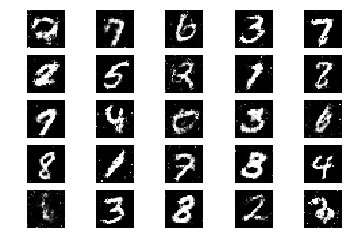

(32, 1) float64
(32, 1) float640.576229, acc.: 75.00%] [G loss: 0.943159]
(32, 1) float640.514502, acc.: 71.88%] [G loss: 0.993244]
(32, 1) float640.634971, acc.: 67.19%] [G loss: 1.063970]
(32, 1) float640.587936, acc.: 70.31%] [G loss: 1.020916]
(32, 1) float640.647540, acc.: 57.81%] [G loss: 1.065140]
(32, 1) float640.745593, acc.: 53.12%] [G loss: 0.976015]
(32, 1) float640.615846, acc.: 71.88%] [G loss: 0.999558]
(32, 1) float640.529232, acc.: 73.44%] [G loss: 1.009848]
(32, 1) float640.624384, acc.: 71.88%] [G loss: 1.075095]
(32, 1) float640.643481, acc.: 60.94%] [G loss: 1.009067]
(32, 1) float640.622921, acc.: 64.06%] [G loss: 0.898207]
(32, 1) float640.585883, acc.: 70.31%] [G loss: 0.927704]
(32, 1) float640.670030, acc.: 56.25%] [G loss: 0.846460]
(32, 1) float640.625586, acc.: 65.62%] [G loss: 1.006891]
(32, 1) float640.640972, acc.: 64.06%] [G loss: 1.095424]
(32, 1) float640.711022, acc.: 56.25%] [G loss: 1.066196]
(32, 1) float640.683241, acc.: 56.25%] [G loss: 1.130782

(32, 1) float640.686105, acc.: 57.81%] [G loss: 1.041599]
(32, 1) float640.655283, acc.: 56.25%] [G loss: 1.102702]
(32, 1) float640.579931, acc.: 76.56%] [G loss: 1.040158]
(32, 1) float640.617473, acc.: 64.06%] [G loss: 1.004838]
(32, 1) float640.621739, acc.: 57.81%] [G loss: 1.108952]
(32, 1) float640.653991, acc.: 60.94%] [G loss: 1.174207]
(32, 1) float640.647130, acc.: 70.31%] [G loss: 1.098260]
(32, 1) float640.644143, acc.: 60.94%] [G loss: 1.121490]
(32, 1) float640.603815, acc.: 65.62%] [G loss: 1.114188]
(32, 1) float640.639868, acc.: 70.31%] [G loss: 0.993808]
(32, 1) float640.688515, acc.: 59.38%] [G loss: 1.109426]
(32, 1) float640.614877, acc.: 67.19%] [G loss: 1.111497]
(32, 1) float640.619671, acc.: 65.62%] [G loss: 1.017570]
(32, 1) float640.662142, acc.: 53.12%] [G loss: 0.958105]
(32, 1) float640.558314, acc.: 70.31%] [G loss: 1.112162]
(32, 1) float640.595443, acc.: 67.19%] [G loss: 1.044177]
(32, 1) float640.690376, acc.: 57.81%] [G loss: 0.956121]
(32, 1) float6

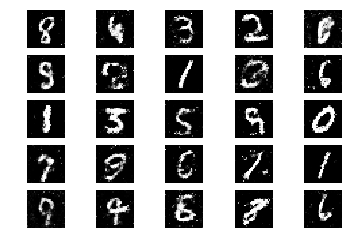

(32, 1) float64
(32, 1) float640.666032, acc.: 57.81%] [G loss: 1.035846]
(32, 1) float640.562363, acc.: 76.56%] [G loss: 0.911816]
(32, 1) float640.669694, acc.: 62.50%] [G loss: 1.029571]
(32, 1) float640.665987, acc.: 67.19%] [G loss: 1.079315]
(32, 1) float640.611115, acc.: 73.44%] [G loss: 1.111410]
(32, 1) float640.614978, acc.: 64.06%] [G loss: 1.012630]
(32, 1) float640.602091, acc.: 65.62%] [G loss: 1.010772]
(32, 1) float640.674325, acc.: 59.38%] [G loss: 1.104476]
(32, 1) float640.616769, acc.: 70.31%] [G loss: 0.987964]
(32, 1) float640.585463, acc.: 70.31%] [G loss: 1.057827]
(32, 1) float640.539103, acc.: 79.69%] [G loss: 1.000908]
(32, 1) float640.658884, acc.: 64.06%] [G loss: 1.108469]
(32, 1) float640.672174, acc.: 59.38%] [G loss: 0.958907]
(32, 1) float640.519914, acc.: 81.25%] [G loss: 0.950670]
(32, 1) float640.590337, acc.: 67.19%] [G loss: 1.017192]
(32, 1) float640.531432, acc.: 75.00%] [G loss: 0.970947]
(32, 1) float640.687126, acc.: 56.25%] [G loss: 0.942960

(32, 1) float640.614068, acc.: 67.19%] [G loss: 0.900535]
(32, 1) float640.689004, acc.: 46.88%] [G loss: 1.144591]
(32, 1) float640.683367, acc.: 53.12%] [G loss: 1.070427]
(32, 1) float640.651443, acc.: 59.38%] [G loss: 1.030127]
(32, 1) float640.645275, acc.: 59.38%] [G loss: 0.964417]
(32, 1) float640.612165, acc.: 60.94%] [G loss: 0.973985]
(32, 1) float640.649235, acc.: 59.38%] [G loss: 1.058122]
(32, 1) float640.650185, acc.: 59.38%] [G loss: 1.154984]
(32, 1) float640.582137, acc.: 71.88%] [G loss: 1.078722]
(32, 1) float640.594651, acc.: 62.50%] [G loss: 1.149456]
(32, 1) float640.618713, acc.: 62.50%] [G loss: 0.908901]
(32, 1) float640.675160, acc.: 60.94%] [G loss: 1.016283]
(32, 1) float640.713450, acc.: 53.12%] [G loss: 1.061285]
(32, 1) float640.612849, acc.: 65.62%] [G loss: 1.017092]
(32, 1) float640.614670, acc.: 64.06%] [G loss: 0.995693]
(32, 1) float640.598752, acc.: 67.19%] [G loss: 1.139053]
(32, 1) float640.647050, acc.: 64.06%] [G loss: 1.012948]
(32, 1) float6

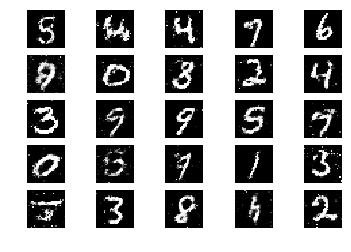

(32, 1) float64
(32, 1) float640.655277, acc.: 60.94%] [G loss: 0.915958]
(32, 1) float640.672942, acc.: 54.69%] [G loss: 1.004123]
(32, 1) float640.615926, acc.: 70.31%] [G loss: 1.076415]
(32, 1) float640.727087, acc.: 56.25%] [G loss: 1.085342]
(32, 1) float640.663844, acc.: 65.62%] [G loss: 0.940030]
(32, 1) float640.693866, acc.: 56.25%] [G loss: 1.043651]
(32, 1) float640.610577, acc.: 64.06%] [G loss: 0.955748]
(32, 1) float640.613281, acc.: 68.75%] [G loss: 1.121734]
(32, 1) float640.681188, acc.: 57.81%] [G loss: 1.045408]
(32, 1) float640.595469, acc.: 65.62%] [G loss: 1.138813]
(32, 1) float640.652487, acc.: 60.94%] [G loss: 0.987309]
(32, 1) float640.690560, acc.: 64.06%] [G loss: 1.171636]
(32, 1) float640.752001, acc.: 48.44%] [G loss: 1.074221]
(32, 1) float640.610130, acc.: 67.19%] [G loss: 1.027948]
(32, 1) float640.694656, acc.: 50.00%] [G loss: 0.931196]
(32, 1) float640.589260, acc.: 70.31%] [G loss: 1.048666]
(32, 1) float640.584035, acc.: 75.00%] [G loss: 0.902082

(32, 1) float640.651324, acc.: 59.38%] [G loss: 1.203506]
(32, 1) float640.611492, acc.: 64.06%] [G loss: 1.135216]
(32, 1) float640.591226, acc.: 71.88%] [G loss: 1.082747]
(32, 1) float640.653624, acc.: 56.25%] [G loss: 1.073775]
(32, 1) float640.609204, acc.: 62.50%] [G loss: 1.213332]
(32, 1) float640.616553, acc.: 62.50%] [G loss: 1.082302]
(32, 1) float640.646549, acc.: 60.94%] [G loss: 1.007737]
(32, 1) float640.660147, acc.: 59.38%] [G loss: 1.071830]
(32, 1) float640.620094, acc.: 68.75%] [G loss: 1.108089]
(32, 1) float640.620235, acc.: 57.81%] [G loss: 1.049094]
(32, 1) float640.620513, acc.: 60.94%] [G loss: 0.997397]
(32, 1) float640.681421, acc.: 57.81%] [G loss: 1.016363]
(32, 1) float640.615239, acc.: 71.88%] [G loss: 0.911640]
(32, 1) float640.612607, acc.: 65.62%] [G loss: 1.044870]
(32, 1) float640.712152, acc.: 53.12%] [G loss: 1.029189]
(32, 1) float640.615808, acc.: 64.06%] [G loss: 0.934984]
(32, 1) float640.584777, acc.: 68.75%] [G loss: 1.001395]
(32, 1) float6

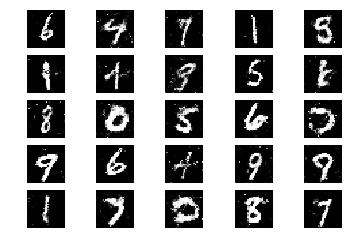

(32, 1) float64
(32, 1) float640.577947, acc.: 64.06%] [G loss: 1.133409]
(32, 1) float640.576162, acc.: 67.19%] [G loss: 0.987752]
(32, 1) float640.656388, acc.: 51.56%] [G loss: 1.050525]
(32, 1) float640.651123, acc.: 60.94%] [G loss: 1.039547]
(32, 1) float640.662783, acc.: 60.94%] [G loss: 0.985835]
(32, 1) float640.602528, acc.: 64.06%] [G loss: 0.993561]
(32, 1) float640.596298, acc.: 70.31%] [G loss: 1.209930]
(32, 1) float640.677188, acc.: 60.94%] [G loss: 0.916083]
(32, 1) float640.710846, acc.: 53.12%] [G loss: 0.935988]
(32, 1) float640.650327, acc.: 59.38%] [G loss: 0.918424]
(32, 1) float640.634482, acc.: 65.62%] [G loss: 1.028783]
(32, 1) float640.628452, acc.: 64.06%] [G loss: 1.068807]
(32, 1) float640.622447, acc.: 57.81%] [G loss: 0.957433]
(32, 1) float640.681186, acc.: 54.69%] [G loss: 1.018475]
(32, 1) float640.649681, acc.: 56.25%] [G loss: 0.990979]
(32, 1) float640.653006, acc.: 56.25%] [G loss: 1.021068]
(32, 1) float640.627075, acc.: 57.81%] [G loss: 1.038369

(32, 1) float640.689859, acc.: 64.06%] [G loss: 1.143457]
(32, 1) float640.648948, acc.: 56.25%] [G loss: 1.193028]
(32, 1) float640.683681, acc.: 60.94%] [G loss: 1.126821]
(32, 1) float640.609660, acc.: 67.19%] [G loss: 0.980221]
(32, 1) float640.626788, acc.: 59.38%] [G loss: 1.119843]
(32, 1) float640.675263, acc.: 60.94%] [G loss: 0.944481]
(32, 1) float640.556435, acc.: 65.62%] [G loss: 1.022967]
(32, 1) float640.582016, acc.: 68.75%] [G loss: 1.052206]
(32, 1) float640.603179, acc.: 71.88%] [G loss: 1.119581]
(32, 1) float640.685332, acc.: 51.56%] [G loss: 0.939228]
(32, 1) float640.702846, acc.: 56.25%] [G loss: 0.941839]
(32, 1) float640.657301, acc.: 59.38%] [G loss: 1.147333]
(32, 1) float640.662179, acc.: 64.06%] [G loss: 1.118876]
(32, 1) float640.563853, acc.: 70.31%] [G loss: 1.160070]
(32, 1) float640.661100, acc.: 62.50%] [G loss: 1.065001]
(32, 1) float640.729809, acc.: 50.00%] [G loss: 1.162559]
(32, 1) float640.586195, acc.: 68.75%] [G loss: 1.021374]
(32, 1) float6

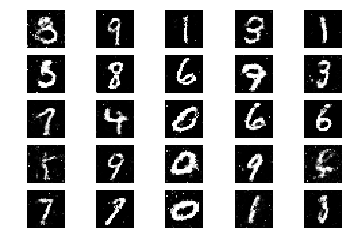

(32, 1) float64
(32, 1) float640.707319, acc.: 50.00%] [G loss: 1.084775]
(32, 1) float640.607601, acc.: 73.44%] [G loss: 1.112328]
(32, 1) float640.642397, acc.: 68.75%] [G loss: 1.051178]
(32, 1) float640.665527, acc.: 59.38%] [G loss: 1.185398]
(32, 1) float640.652267, acc.: 62.50%] [G loss: 0.974690]
(32, 1) float640.586597, acc.: 68.75%] [G loss: 1.036465]
(32, 1) float640.672728, acc.: 59.38%] [G loss: 0.885208]
(32, 1) float640.642870, acc.: 60.94%] [G loss: 1.070355]
(32, 1) float640.620254, acc.: 68.75%] [G loss: 1.018069]
(32, 1) float640.611266, acc.: 67.19%] [G loss: 1.053031]
(32, 1) float640.636443, acc.: 64.06%] [G loss: 1.034316]
(32, 1) float640.669368, acc.: 56.25%] [G loss: 1.038161]
(32, 1) float640.668006, acc.: 59.38%] [G loss: 1.030485]
(32, 1) float640.650050, acc.: 60.94%] [G loss: 1.041251]
(32, 1) float640.615812, acc.: 65.62%] [G loss: 0.809296]
(32, 1) float640.563886, acc.: 78.12%] [G loss: 0.980303]
(32, 1) float640.705271, acc.: 50.00%] [G loss: 0.908823

(32, 1) float640.622279, acc.: 62.50%] [G loss: 1.069482]
(32, 1) float640.600052, acc.: 68.75%] [G loss: 1.119191]
(32, 1) float640.620137, acc.: 68.75%] [G loss: 0.977327]
(32, 1) float640.715093, acc.: 60.94%] [G loss: 1.346929]
(32, 1) float640.583571, acc.: 70.31%] [G loss: 1.100940]
(32, 1) float640.688617, acc.: 65.62%] [G loss: 1.066909]
(32, 1) float640.620716, acc.: 68.75%] [G loss: 0.966280]
(32, 1) float640.652016, acc.: 60.94%] [G loss: 1.031874]
(32, 1) float640.586630, acc.: 68.75%] [G loss: 1.042853]
(32, 1) float640.609406, acc.: 68.75%] [G loss: 1.028594]
(32, 1) float640.633521, acc.: 62.50%] [G loss: 1.002646]
(32, 1) float640.593201, acc.: 70.31%] [G loss: 0.998118]
(32, 1) float640.698055, acc.: 53.12%] [G loss: 0.957723]
(32, 1) float640.640790, acc.: 62.50%] [G loss: 0.979500]
(32, 1) float640.628233, acc.: 64.06%] [G loss: 0.965652]
(32, 1) float640.600715, acc.: 68.75%] [G loss: 0.936354]
(32, 1) float640.602212, acc.: 70.31%] [G loss: 1.086778]
(32, 1) float6

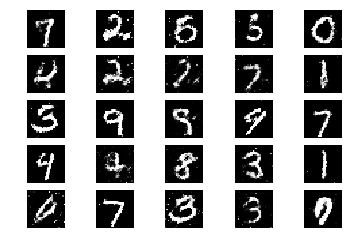

(32, 1) float64
(32, 1) float640.653838, acc.: 57.81%] [G loss: 1.122593]
(32, 1) float640.632151, acc.: 60.94%] [G loss: 0.979850]
(32, 1) float640.671116, acc.: 54.69%] [G loss: 1.050144]
(32, 1) float640.654763, acc.: 56.25%] [G loss: 1.007749]
(32, 1) float640.583592, acc.: 70.31%] [G loss: 1.060747]
(32, 1) float640.579939, acc.: 71.88%] [G loss: 0.963547]
(32, 1) float640.658954, acc.: 60.94%] [G loss: 1.047765]
(32, 1) float640.598346, acc.: 73.44%] [G loss: 1.030905]
(32, 1) float640.677534, acc.: 51.56%] [G loss: 0.878979]
(32, 1) float640.602215, acc.: 71.88%] [G loss: 1.104736]
(32, 1) float640.647259, acc.: 62.50%] [G loss: 0.988186]
(32, 1) float640.669599, acc.: 57.81%] [G loss: 0.928731]
(32, 1) float640.603189, acc.: 67.19%] [G loss: 1.019636]
(32, 1) float640.552623, acc.: 76.56%] [G loss: 1.061522]
(32, 1) float640.672542, acc.: 62.50%] [G loss: 1.035583]
(32, 1) float640.705343, acc.: 64.06%] [G loss: 0.973916]
(32, 1) float640.647737, acc.: 54.69%] [G loss: 1.007527

(32, 1) float640.676903, acc.: 64.06%] [G loss: 1.017287]
(32, 1) float640.611968, acc.: 67.19%] [G loss: 0.921811]
(32, 1) float640.578526, acc.: 68.75%] [G loss: 1.072610]
(32, 1) float640.660321, acc.: 57.81%] [G loss: 1.035581]
(32, 1) float640.581462, acc.: 70.31%] [G loss: 0.915494]
(32, 1) float640.619172, acc.: 65.62%] [G loss: 0.901538]
(32, 1) float640.649620, acc.: 62.50%] [G loss: 1.076222]
(32, 1) float640.607291, acc.: 62.50%] [G loss: 0.979671]
(32, 1) float640.693994, acc.: 53.12%] [G loss: 0.954160]
(32, 1) float640.622293, acc.: 65.62%] [G loss: 0.979518]
(32, 1) float640.563784, acc.: 67.19%] [G loss: 1.144873]
(32, 1) float640.627654, acc.: 68.75%] [G loss: 1.060120]
(32, 1) float640.702538, acc.: 60.94%] [G loss: 1.028927]
(32, 1) float640.565100, acc.: 68.75%] [G loss: 1.097195]
(32, 1) float640.739787, acc.: 60.94%] [G loss: 0.911588]
(32, 1) float640.654577, acc.: 62.50%] [G loss: 0.994729]
(32, 1) float640.617348, acc.: 60.94%] [G loss: 1.058623]
(32, 1) float6

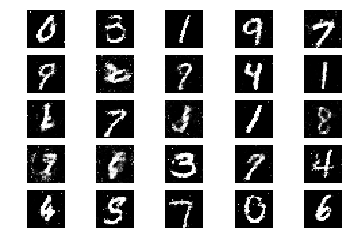

(32, 1) float64
(32, 1) float640.645307, acc.: 65.62%] [G loss: 1.170270]
(32, 1) float640.631598, acc.: 64.06%] [G loss: 1.031800]
(32, 1) float640.669936, acc.: 59.38%] [G loss: 1.039198]
(32, 1) float640.597551, acc.: 67.19%] [G loss: 0.975940]
(32, 1) float640.571792, acc.: 65.62%] [G loss: 1.055567]
(32, 1) float640.611814, acc.: 67.19%] [G loss: 1.005781]
(32, 1) float640.611442, acc.: 64.06%] [G loss: 0.974713]
(32, 1) float640.601381, acc.: 64.06%] [G loss: 1.054455]
(32, 1) float640.574478, acc.: 70.31%] [G loss: 1.019226]
(32, 1) float640.750035, acc.: 46.88%] [G loss: 0.897684]
(32, 1) float640.631787, acc.: 57.81%] [G loss: 0.863784]
(32, 1) float640.535423, acc.: 75.00%] [G loss: 1.100892]
(32, 1) float640.625971, acc.: 68.75%] [G loss: 1.071930]
(32, 1) float640.644164, acc.: 65.62%] [G loss: 1.062293]
(32, 1) float640.613454, acc.: 67.19%] [G loss: 1.023270]
(32, 1) float640.612209, acc.: 65.62%] [G loss: 1.017092]
(32, 1) float640.600313, acc.: 65.62%] [G loss: 0.990496

(32, 1) float640.535256, acc.: 73.44%] [G loss: 1.118859]
(32, 1) float640.573862, acc.: 71.88%] [G loss: 1.061363]
(32, 1) float640.677855, acc.: 60.94%] [G loss: 1.169266]
(32, 1) float640.643253, acc.: 60.94%] [G loss: 0.996712]
(32, 1) float640.644888, acc.: 67.19%] [G loss: 1.065259]
(32, 1) float640.555692, acc.: 71.88%] [G loss: 0.929375]
(32, 1) float640.600836, acc.: 65.62%] [G loss: 0.985252]
(32, 1) float640.607365, acc.: 67.19%] [G loss: 0.951258]
(32, 1) float640.602781, acc.: 67.19%] [G loss: 1.034918]
(32, 1) float640.763795, acc.: 53.12%] [G loss: 1.001041]
(32, 1) float640.594982, acc.: 65.62%] [G loss: 1.048707]
(32, 1) float640.644904, acc.: 59.38%] [G loss: 0.940200]
(32, 1) float640.651918, acc.: 54.69%] [G loss: 1.019689]
(32, 1) float640.634087, acc.: 62.50%] [G loss: 0.949563]
(32, 1) float640.650438, acc.: 56.25%] [G loss: 1.044836]
(32, 1) float640.620780, acc.: 64.06%] [G loss: 0.989559]
(32, 1) float640.647882, acc.: 57.81%] [G loss: 1.147248]
(32, 1) float6

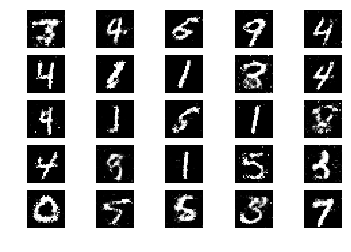

(32, 1) float64
(32, 1) float640.638657, acc.: 64.06%] [G loss: 1.022150]
(32, 1) float640.606204, acc.: 67.19%] [G loss: 1.083220]
(32, 1) float640.612881, acc.: 62.50%] [G loss: 1.005369]
(32, 1) float640.619854, acc.: 65.62%] [G loss: 0.945752]
(32, 1) float640.626009, acc.: 59.38%] [G loss: 0.926902]
(32, 1) float640.736768, acc.: 53.12%] [G loss: 1.110986]
(32, 1) float640.636700, acc.: 57.81%] [G loss: 1.010068]
(32, 1) float640.672140, acc.: 57.81%] [G loss: 1.009889]
(32, 1) float640.719724, acc.: 46.88%] [G loss: 1.059689]
(32, 1) float640.572879, acc.: 67.19%] [G loss: 1.131809]
(32, 1) float640.629864, acc.: 65.62%] [G loss: 0.898084]
(32, 1) float640.695320, acc.: 48.44%] [G loss: 1.025427]
(32, 1) float640.622085, acc.: 64.06%] [G loss: 1.012059]
(32, 1) float640.702108, acc.: 57.81%] [G loss: 0.966036]
(32, 1) float640.626914, acc.: 62.50%] [G loss: 1.008834]
(32, 1) float640.656673, acc.: 60.94%] [G loss: 1.075058]
(32, 1) float640.669426, acc.: 59.38%] [G loss: 1.142059

(32, 1) float640.613428, acc.: 67.19%] [G loss: 0.907423]
(32, 1) float640.614840, acc.: 57.81%] [G loss: 1.018567]
(32, 1) float640.615967, acc.: 62.50%] [G loss: 0.997276]
(32, 1) float640.594935, acc.: 71.88%] [G loss: 0.945017]
(32, 1) float640.683430, acc.: 51.56%] [G loss: 1.066770]
(32, 1) float640.660704, acc.: 62.50%] [G loss: 0.981005]
(32, 1) float640.606587, acc.: 57.81%] [G loss: 0.969078]
(32, 1) float640.697314, acc.: 59.38%] [G loss: 0.980901]
(32, 1) float640.681552, acc.: 59.38%] [G loss: 0.979024]
(32, 1) float640.630099, acc.: 64.06%] [G loss: 0.964421]
(32, 1) float640.647609, acc.: 64.06%] [G loss: 0.985183]
(32, 1) float640.733659, acc.: 50.00%] [G loss: 0.933606]
(32, 1) float640.600595, acc.: 65.62%] [G loss: 1.020477]
(32, 1) float640.619743, acc.: 67.19%] [G loss: 0.973937]
(32, 1) float640.619735, acc.: 62.50%] [G loss: 0.958815]
(32, 1) float640.672399, acc.: 57.81%] [G loss: 0.973481]
(32, 1) float640.668140, acc.: 68.75%] [G loss: 0.969666]
(32, 1) float6

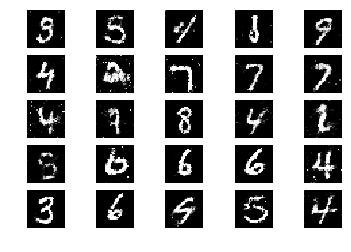

(32, 1) float64
(32, 1) float640.668958, acc.: 70.31%] [G loss: 0.895700]
(32, 1) float640.711737, acc.: 54.69%] [G loss: 1.043496]
(32, 1) float640.646054, acc.: 65.62%] [G loss: 0.878756]
(32, 1) float640.624505, acc.: 59.38%] [G loss: 0.951259]
(32, 1) float640.642789, acc.: 65.62%] [G loss: 1.009008]
(32, 1) float640.620837, acc.: 65.62%] [G loss: 0.952615]
(32, 1) float640.701893, acc.: 56.25%] [G loss: 0.945492]
(32, 1) float640.638092, acc.: 67.19%] [G loss: 1.060050]
(32, 1) float640.650160, acc.: 64.06%] [G loss: 1.079450]
(32, 1) float640.555548, acc.: 78.12%] [G loss: 1.067175]
(32, 1) float640.608442, acc.: 67.19%] [G loss: 1.113568]
(32, 1) float640.742096, acc.: 56.25%] [G loss: 1.213936]
(32, 1) float640.603557, acc.: 64.06%] [G loss: 1.054822]
(32, 1) float640.674240, acc.: 60.94%] [G loss: 1.145503]
(32, 1) float640.629249, acc.: 62.50%] [G loss: 1.050036]
(32, 1) float640.631488, acc.: 62.50%] [G loss: 0.980464]
(32, 1) float640.622886, acc.: 70.31%] [G loss: 0.965034

(32, 1) float640.600144, acc.: 70.31%] [G loss: 0.952008]
(32, 1) float640.607382, acc.: 70.31%] [G loss: 1.171382]
(32, 1) float640.608480, acc.: 68.75%] [G loss: 1.060589]
(32, 1) float640.578852, acc.: 71.88%] [G loss: 1.024284]
(32, 1) float640.604343, acc.: 62.50%] [G loss: 1.029142]
(32, 1) float640.572750, acc.: 70.31%] [G loss: 1.136419]
(32, 1) float640.615338, acc.: 65.62%] [G loss: 1.023021]
(32, 1) float640.664266, acc.: 53.12%] [G loss: 0.976375]
(32, 1) float640.591306, acc.: 73.44%] [G loss: 0.930758]
(32, 1) float640.591895, acc.: 70.31%] [G loss: 0.899772]
(32, 1) float640.623342, acc.: 62.50%] [G loss: 1.013613]
(32, 1) float640.652408, acc.: 62.50%] [G loss: 0.954404]
(32, 1) float640.589331, acc.: 68.75%] [G loss: 0.983662]
(32, 1) float640.615117, acc.: 62.50%] [G loss: 1.062419]
(32, 1) float640.702825, acc.: 53.12%] [G loss: 1.045659]
(32, 1) float640.651649, acc.: 60.94%] [G loss: 1.040111]
(32, 1) float640.652917, acc.: 62.50%] [G loss: 1.013395]
(32, 1) float6

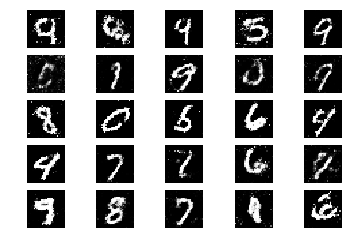

(32, 1) float64
(32, 1) float640.631396, acc.: 59.38%] [G loss: 1.027105]
(32, 1) float640.662930, acc.: 57.81%] [G loss: 0.884652]
(32, 1) float640.652857, acc.: 60.94%] [G loss: 0.885186]
(32, 1) float640.591346, acc.: 70.31%] [G loss: 0.898902]
(32, 1) float640.675700, acc.: 57.81%] [G loss: 0.970502]
(32, 1) float640.575967, acc.: 65.62%] [G loss: 1.130012]
(32, 1) float640.602219, acc.: 67.19%] [G loss: 1.115023]
(32, 1) float640.679234, acc.: 57.81%] [G loss: 0.925963]
(32, 1) float640.661651, acc.: 59.38%] [G loss: 1.057038]
(32, 1) float640.650786, acc.: 62.50%] [G loss: 1.121002]
(32, 1) float640.574199, acc.: 62.50%] [G loss: 0.987993]
(32, 1) float640.627571, acc.: 64.06%] [G loss: 0.964829]
(32, 1) float640.667023, acc.: 60.94%] [G loss: 1.005198]
(32, 1) float640.653129, acc.: 60.94%] [G loss: 0.878352]
(32, 1) float640.626528, acc.: 60.94%] [G loss: 0.974492]
(32, 1) float640.608773, acc.: 75.00%] [G loss: 1.102805]
(32, 1) float640.575161, acc.: 71.88%] [G loss: 0.931348

(32, 1) float640.582357, acc.: 64.06%] [G loss: 1.063079]
(32, 1) float640.662555, acc.: 62.50%] [G loss: 0.950765]
(32, 1) float640.578465, acc.: 68.75%] [G loss: 0.965997]
(32, 1) float640.689227, acc.: 60.94%] [G loss: 0.967347]
(32, 1) float640.603466, acc.: 71.88%] [G loss: 0.930158]
(32, 1) float640.654434, acc.: 53.12%] [G loss: 1.058018]
(32, 1) float640.596974, acc.: 71.88%] [G loss: 1.009261]
(32, 1) float640.587541, acc.: 71.88%] [G loss: 1.043972]
(32, 1) float640.555880, acc.: 71.88%] [G loss: 1.002806]
(32, 1) float640.719999, acc.: 54.69%] [G loss: 1.026014]
(32, 1) float640.598696, acc.: 73.44%] [G loss: 0.981291]
(32, 1) float640.620291, acc.: 64.06%] [G loss: 0.909791]
(32, 1) float640.670809, acc.: 62.50%] [G loss: 1.042560]
(32, 1) float640.580231, acc.: 67.19%] [G loss: 0.990863]
(32, 1) float640.540844, acc.: 67.19%] [G loss: 1.045442]
(32, 1) float640.568679, acc.: 76.56%] [G loss: 0.948986]
(32, 1) float640.604778, acc.: 65.62%] [G loss: 0.979943]
(32, 1) float6

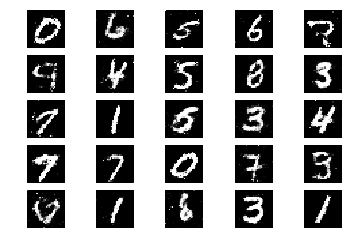

(32, 1) float64
(32, 1) float640.632393, acc.: 67.19%] [G loss: 1.075774]
(32, 1) float640.555556, acc.: 78.12%] [G loss: 0.996831]
(32, 1) float640.606629, acc.: 60.94%] [G loss: 1.118548]
(32, 1) float640.605907, acc.: 71.88%] [G loss: 0.965668]
(32, 1) float640.676561, acc.: 67.19%] [G loss: 0.993460]
(32, 1) float640.606060, acc.: 70.31%] [G loss: 0.982924]
(32, 1) float640.676351, acc.: 59.38%] [G loss: 1.043493]
(32, 1) float640.595796, acc.: 70.31%] [G loss: 1.012709]
(32, 1) float640.645602, acc.: 57.81%] [G loss: 1.073596]
(32, 1) float640.650975, acc.: 64.06%] [G loss: 1.093264]
(32, 1) float640.597319, acc.: 60.94%] [G loss: 1.075063]
(32, 1) float640.625433, acc.: 67.19%] [G loss: 0.854134]
(32, 1) float640.508369, acc.: 76.56%] [G loss: 1.113362]
(32, 1) float640.591210, acc.: 73.44%] [G loss: 1.093448]
(32, 1) float640.658275, acc.: 64.06%] [G loss: 0.988285]
(32, 1) float640.664133, acc.: 60.94%] [G loss: 1.045741]
(32, 1) float640.710078, acc.: 56.25%] [G loss: 0.941892

(32, 1) float640.593314, acc.: 64.06%] [G loss: 1.035302]
(32, 1) float640.637430, acc.: 57.81%] [G loss: 1.034679]
(32, 1) float640.600330, acc.: 68.75%] [G loss: 1.033590]
(32, 1) float640.677205, acc.: 53.12%] [G loss: 1.029705]
(32, 1) float640.589873, acc.: 65.62%] [G loss: 1.164057]
(32, 1) float640.634500, acc.: 60.94%] [G loss: 1.166090]
(32, 1) float640.560145, acc.: 78.12%] [G loss: 1.094527]
(32, 1) float640.600199, acc.: 62.50%] [G loss: 1.082623]
(32, 1) float640.628806, acc.: 64.06%] [G loss: 1.018669]
(32, 1) float640.607042, acc.: 71.88%] [G loss: 1.124604]
(32, 1) float640.545946, acc.: 67.19%] [G loss: 1.147647]
(32, 1) float640.618222, acc.: 67.19%] [G loss: 1.076717]
(32, 1) float640.590091, acc.: 65.62%] [G loss: 0.973736]
(32, 1) float640.577535, acc.: 64.06%] [G loss: 0.941595]
(32, 1) float640.606195, acc.: 65.62%] [G loss: 0.953291]
(32, 1) float640.684500, acc.: 56.25%] [G loss: 0.904761]
(32, 1) float640.698475, acc.: 54.69%] [G loss: 1.007582]
(32, 1) float6

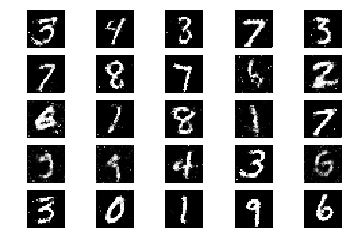

(32, 1) float64
(32, 1) float640.583435, acc.: 68.75%] [G loss: 0.988655]
(32, 1) float640.616186, acc.: 68.75%] [G loss: 0.904475]
(32, 1) float640.572701, acc.: 70.31%] [G loss: 0.973024]
(32, 1) float640.656360, acc.: 62.50%] [G loss: 0.970637]
(32, 1) float640.669957, acc.: 60.94%] [G loss: 1.047346]
(32, 1) float640.631476, acc.: 65.62%] [G loss: 0.980993]
(32, 1) float640.704237, acc.: 54.69%] [G loss: 1.088651]
(32, 1) float640.568375, acc.: 71.88%] [G loss: 0.909585]
(32, 1) float640.599433, acc.: 68.75%] [G loss: 1.069447]
(32, 1) float640.581950, acc.: 70.31%] [G loss: 1.179890]
(32, 1) float640.583209, acc.: 67.19%] [G loss: 1.139816]
(32, 1) float640.677555, acc.: 57.81%] [G loss: 0.986645]
(32, 1) float640.549195, acc.: 76.56%] [G loss: 0.921324]
(32, 1) float640.611779, acc.: 65.62%] [G loss: 1.123103]
(32, 1) float640.617340, acc.: 60.94%] [G loss: 1.122547]
(32, 1) float640.687128, acc.: 59.38%] [G loss: 1.147374]
(32, 1) float640.621720, acc.: 64.06%] [G loss: 1.120444

(32, 1) float640.717674, acc.: 53.12%] [G loss: 1.046964]
(32, 1) float640.516848, acc.: 76.56%] [G loss: 1.098603]
(32, 1) float640.601229, acc.: 59.38%] [G loss: 1.026345]
(32, 1) float640.644184, acc.: 62.50%] [G loss: 0.958492]
(32, 1) float640.668742, acc.: 64.06%] [G loss: 1.088850]
(32, 1) float640.617041, acc.: 65.62%] [G loss: 1.111504]
(32, 1) float640.627665, acc.: 71.88%] [G loss: 1.058315]
(32, 1) float640.617171, acc.: 64.06%] [G loss: 1.011974]
(32, 1) float640.574097, acc.: 76.56%] [G loss: 1.040762]
(32, 1) float640.627737, acc.: 67.19%] [G loss: 1.124241]
(32, 1) float640.599076, acc.: 70.31%] [G loss: 1.058158]
(32, 1) float640.569666, acc.: 65.62%] [G loss: 0.960500]
(32, 1) float640.680079, acc.: 54.69%] [G loss: 1.071026]
(32, 1) float640.626715, acc.: 67.19%] [G loss: 1.109836]
(32, 1) float640.685471, acc.: 62.50%] [G loss: 1.098813]
(32, 1) float640.676624, acc.: 57.81%] [G loss: 0.999097]
(32, 1) float640.635710, acc.: 64.06%] [G loss: 0.996186]
(32, 1) float6

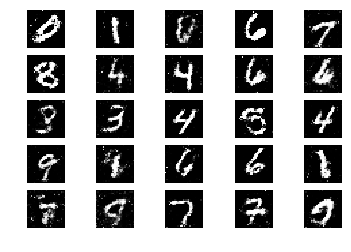

(32, 1) float64
(32, 1) float640.588579, acc.: 68.75%] [G loss: 1.018286]
(32, 1) float640.597384, acc.: 70.31%] [G loss: 1.047007]
(32, 1) float640.562367, acc.: 62.50%] [G loss: 1.129154]
(32, 1) float640.709488, acc.: 56.25%] [G loss: 1.035524]
(32, 1) float640.593476, acc.: 68.75%] [G loss: 1.019551]
(32, 1) float640.668579, acc.: 60.94%] [G loss: 1.009283]
(32, 1) float640.680420, acc.: 53.12%] [G loss: 1.040306]
(32, 1) float640.638647, acc.: 56.25%] [G loss: 1.020602]
(32, 1) float640.718893, acc.: 59.38%] [G loss: 1.066186]
(32, 1) float640.699383, acc.: 64.06%] [G loss: 1.061943]
(32, 1) float640.603766, acc.: 64.06%] [G loss: 0.961152]
(32, 1) float640.664189, acc.: 65.62%] [G loss: 1.004749]
(32, 1) float640.677138, acc.: 57.81%] [G loss: 1.031275]
(32, 1) float640.682406, acc.: 65.62%] [G loss: 1.013422]
(32, 1) float640.587313, acc.: 71.88%] [G loss: 1.063411]
(32, 1) float640.624430, acc.: 60.94%] [G loss: 1.030998]
(32, 1) float640.734489, acc.: 50.00%] [G loss: 0.916789

(32, 1) float640.774565, acc.: 45.31%] [G loss: 1.030179]
(32, 1) float640.670538, acc.: 57.81%] [G loss: 1.057241]
(32, 1) float640.539907, acc.: 78.12%] [G loss: 1.035224]
(32, 1) float640.622053, acc.: 62.50%] [G loss: 1.053355]
(32, 1) float640.640867, acc.: 60.94%] [G loss: 1.025266]
(32, 1) float640.630965, acc.: 67.19%] [G loss: 1.087724]
(32, 1) float640.652328, acc.: 64.06%] [G loss: 1.141928]
(32, 1) float640.673445, acc.: 60.94%] [G loss: 1.124899]
(32, 1) float640.571364, acc.: 70.31%] [G loss: 1.001177]
(32, 1) float640.495282, acc.: 85.94%] [G loss: 1.017101]
(32, 1) float640.613396, acc.: 70.31%] [G loss: 1.018592]
(32, 1) float640.663357, acc.: 60.94%] [G loss: 1.122693]
(32, 1) float640.659038, acc.: 60.94%] [G loss: 1.073484]
(32, 1) float640.655778, acc.: 62.50%] [G loss: 1.011186]
(32, 1) float640.574946, acc.: 70.31%] [G loss: 1.161029]
(32, 1) float640.650744, acc.: 54.69%] [G loss: 1.040792]
(32, 1) float640.640501, acc.: 67.19%] [G loss: 0.930034]
(32, 1) float6

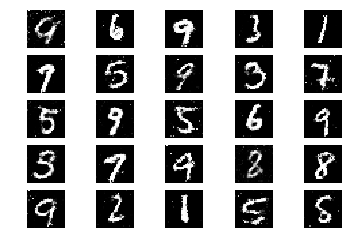

(32, 1) float64
(32, 1) float640.602352, acc.: 70.31%] [G loss: 1.002819]
(32, 1) float640.608103, acc.: 71.88%] [G loss: 1.104631]
(32, 1) float640.632218, acc.: 65.62%] [G loss: 1.037826]
(32, 1) float640.609516, acc.: 68.75%] [G loss: 0.965059]
(32, 1) float640.586473, acc.: 68.75%] [G loss: 1.034067]
(32, 1) float640.626630, acc.: 60.94%] [G loss: 1.141076]
(32, 1) float640.559050, acc.: 75.00%] [G loss: 1.087217]
(32, 1) float640.621702, acc.: 60.94%] [G loss: 0.946697]
(32, 1) float640.585149, acc.: 68.75%] [G loss: 1.060800]
(32, 1) float640.649969, acc.: 57.81%] [G loss: 1.041434]
(32, 1) float640.590164, acc.: 67.19%] [G loss: 1.007922]
(32, 1) float640.598399, acc.: 73.44%] [G loss: 0.969196]
(32, 1) float640.557574, acc.: 65.62%] [G loss: 1.087158]
(32, 1) float640.651572, acc.: 57.81%] [G loss: 1.154949]
(32, 1) float640.647864, acc.: 56.25%] [G loss: 0.947015]
(32, 1) float640.682543, acc.: 59.38%] [G loss: 0.948356]
(32, 1) float640.575949, acc.: 75.00%] [G loss: 1.059650

(32, 1) float640.552014, acc.: 75.00%] [G loss: 1.012147]
(32, 1) float640.636388, acc.: 60.94%] [G loss: 0.930995]
(32, 1) float640.591231, acc.: 68.75%] [G loss: 0.960990]
(32, 1) float640.702052, acc.: 51.56%] [G loss: 1.019160]
(32, 1) float640.637769, acc.: 62.50%] [G loss: 0.919366]
(32, 1) float640.585734, acc.: 71.88%] [G loss: 1.027194]
(32, 1) float640.621660, acc.: 64.06%] [G loss: 1.013070]
(32, 1) float640.570764, acc.: 75.00%] [G loss: 1.137328]
(32, 1) float640.579227, acc.: 75.00%] [G loss: 1.096738]
(32, 1) float640.682735, acc.: 59.38%] [G loss: 1.052804]
(32, 1) float640.544925, acc.: 71.88%] [G loss: 1.048455]
(32, 1) float640.713556, acc.: 53.12%] [G loss: 1.039486]
(32, 1) float640.623905, acc.: 70.31%] [G loss: 0.994292]
(32, 1) float640.697026, acc.: 57.81%] [G loss: 0.921858]
(32, 1) float640.595447, acc.: 65.62%] [G loss: 0.960739]
(32, 1) float640.740793, acc.: 54.69%] [G loss: 0.888411]
(32, 1) float640.685221, acc.: 56.25%] [G loss: 1.118757]
(32, 1) float6

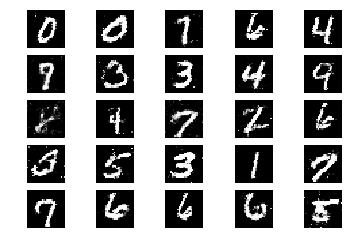

(32, 1) float64
(32, 1) float640.579798, acc.: 75.00%] [G loss: 1.025492]
(32, 1) float640.553315, acc.: 71.88%] [G loss: 1.074895]
(32, 1) float640.619678, acc.: 62.50%] [G loss: 1.113943]
(32, 1) float640.705373, acc.: 50.00%] [G loss: 1.050644]
(32, 1) float640.628557, acc.: 65.62%] [G loss: 0.979645]
(32, 1) float640.659760, acc.: 60.94%] [G loss: 0.915206]
(32, 1) float640.657323, acc.: 59.38%] [G loss: 1.066202]
(32, 1) float640.636281, acc.: 65.62%] [G loss: 1.110627]
(32, 1) float640.639559, acc.: 65.62%] [G loss: 1.011938]
(32, 1) float640.646780, acc.: 57.81%] [G loss: 1.077136]
(32, 1) float640.661153, acc.: 57.81%] [G loss: 1.035704]
(32, 1) float640.629443, acc.: 65.62%] [G loss: 1.062438]
(32, 1) float640.628453, acc.: 64.06%] [G loss: 1.078137]
(32, 1) float640.516210, acc.: 81.25%] [G loss: 1.059760]
(32, 1) float640.669996, acc.: 57.81%] [G loss: 1.119025]
(32, 1) float640.592615, acc.: 65.62%] [G loss: 1.132909]
(32, 1) float640.678793, acc.: 60.94%] [G loss: 0.966125

(32, 1) float640.623466, acc.: 64.06%] [G loss: 1.169883]
(32, 1) float640.604240, acc.: 67.19%] [G loss: 1.136870]
(32, 1) float640.671958, acc.: 57.81%] [G loss: 1.049151]
(32, 1) float640.690331, acc.: 56.25%] [G loss: 1.020997]
(32, 1) float640.593417, acc.: 65.62%] [G loss: 1.064253]
(32, 1) float640.622414, acc.: 67.19%] [G loss: 0.975188]
(32, 1) float640.559970, acc.: 78.12%] [G loss: 1.070180]
(32, 1) float640.590834, acc.: 68.75%] [G loss: 1.067116]
(32, 1) float640.599427, acc.: 70.31%] [G loss: 1.054436]
(32, 1) float640.603770, acc.: 70.31%] [G loss: 1.090753]
(32, 1) float640.575592, acc.: 76.56%] [G loss: 0.937784]
(32, 1) float640.561819, acc.: 73.44%] [G loss: 1.186770]
(32, 1) float640.657581, acc.: 62.50%] [G loss: 1.099844]
(32, 1) float640.661628, acc.: 60.94%] [G loss: 1.017633]
(32, 1) float640.509980, acc.: 81.25%] [G loss: 1.018995]
(32, 1) float640.615772, acc.: 67.19%] [G loss: 1.149785]
(32, 1) float640.671390, acc.: 60.94%] [G loss: 0.980654]
(32, 1) float6

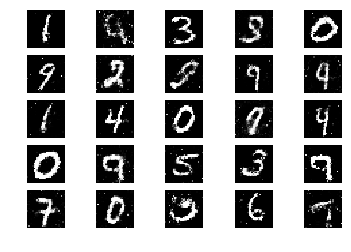

(32, 1) float64
(32, 1) float640.557091, acc.: 70.31%] [G loss: 0.888261]
(32, 1) float640.684684, acc.: 62.50%] [G loss: 1.037313]
(32, 1) float640.718761, acc.: 56.25%] [G loss: 0.918444]
(32, 1) float640.601914, acc.: 68.75%] [G loss: 1.119610]
(32, 1) float640.580455, acc.: 68.75%] [G loss: 1.000831]
(32, 1) float640.642198, acc.: 67.19%] [G loss: 1.070590]
(32, 1) float640.586080, acc.: 70.31%] [G loss: 1.067332]
(32, 1) float640.668988, acc.: 57.81%] [G loss: 1.030941]
(32, 1) float640.546499, acc.: 76.56%] [G loss: 1.066237]
(32, 1) float640.602280, acc.: 71.88%] [G loss: 1.044481]
(32, 1) float640.524065, acc.: 73.44%] [G loss: 0.972856]
(32, 1) float640.668070, acc.: 57.81%] [G loss: 1.009113]
(32, 1) float640.512344, acc.: 78.12%] [G loss: 0.970129]
(32, 1) float640.674775, acc.: 54.69%] [G loss: 0.922830]
(32, 1) float640.553309, acc.: 70.31%] [G loss: 1.027141]
(32, 1) float640.704052, acc.: 57.81%] [G loss: 0.955333]
(32, 1) float640.565588, acc.: 71.88%] [G loss: 1.043301

(32, 1) float640.677792, acc.: 59.38%] [G loss: 1.104623]
(32, 1) float640.598017, acc.: 65.62%] [G loss: 1.090145]
(32, 1) float640.585349, acc.: 68.75%] [G loss: 1.125378]
(32, 1) float640.617570, acc.: 68.75%] [G loss: 0.977742]
(32, 1) float640.777021, acc.: 51.56%] [G loss: 1.047037]
(32, 1) float640.659627, acc.: 60.94%] [G loss: 0.909720]
(32, 1) float640.694247, acc.: 54.69%] [G loss: 0.940747]
(32, 1) float640.659705, acc.: 64.06%] [G loss: 0.907121]
(32, 1) float640.559371, acc.: 78.12%] [G loss: 1.038361]
(32, 1) float640.633091, acc.: 67.19%] [G loss: 0.992291]
(32, 1) float640.591929, acc.: 71.88%] [G loss: 0.988267]
(32, 1) float640.516113, acc.: 81.25%] [G loss: 0.922946]
(32, 1) float640.618258, acc.: 65.62%] [G loss: 0.937428]
(32, 1) float640.644870, acc.: 67.19%] [G loss: 1.021285]
(32, 1) float640.598545, acc.: 71.88%] [G loss: 0.941876]
(32, 1) float640.597846, acc.: 65.62%] [G loss: 1.006657]
(32, 1) float640.686831, acc.: 64.06%] [G loss: 1.113217]
(32, 1) float6

In [5]:
# Create the net and train.
gan = ngdlmodels.GAN(generator=generator, discriminator=discriminator)
gan.compile(
    optimizer=optimizers.Adam(0.0002, 0.5),
    loss="binary_crossentropy",
    metrics=['accuracy'])
gan.summary()
history = gan.fit(x_input_train, epochs=30000, batch_size=32, sample_interval=200)